**About the dataset**

**House Sales in King County, USA**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

- **id** : A notation for a house

- **date**: Date house was sold
 
- **price**: Price is prediction target

- **bedrooms**: Number of bedrooms

- **bathrooms**: Number of bathrooms

- **sqft_living**: Square footage of the home

- **sqft_lot**: Square footage of the lot

- **floors** :Total floors (levels) in house

- **waterfront** :House which has a view to a waterfront

- **view**: Has been viewed

- **condition** :How good the condition is overall

- **grade**: overall grade given to the housing unit, based on King County grading system

- **sqft_above** : Square footage of house apart from basement

- **sqft_basement**: Square footage of the basement

- **yr_built** : Built Year

- **yr_renovated** : Year when house was renovated

- **zipcode**: Zip code

- **lat**: Latitude coordinate

- **long**: Longitude coordinate

- **sqft_living15** : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

- **sqft_lot15** : LotSize area in 2015(implies-- some renovations)



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer, explained_variance_score
from sklearn.metrics import mean_absolute_error

import re

# Load data

In [14]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# EDA

In [15]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045   1971.005136     84.402258   
std        1.175459    828.128162     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
#sns.set(style="white", font_scale=1)

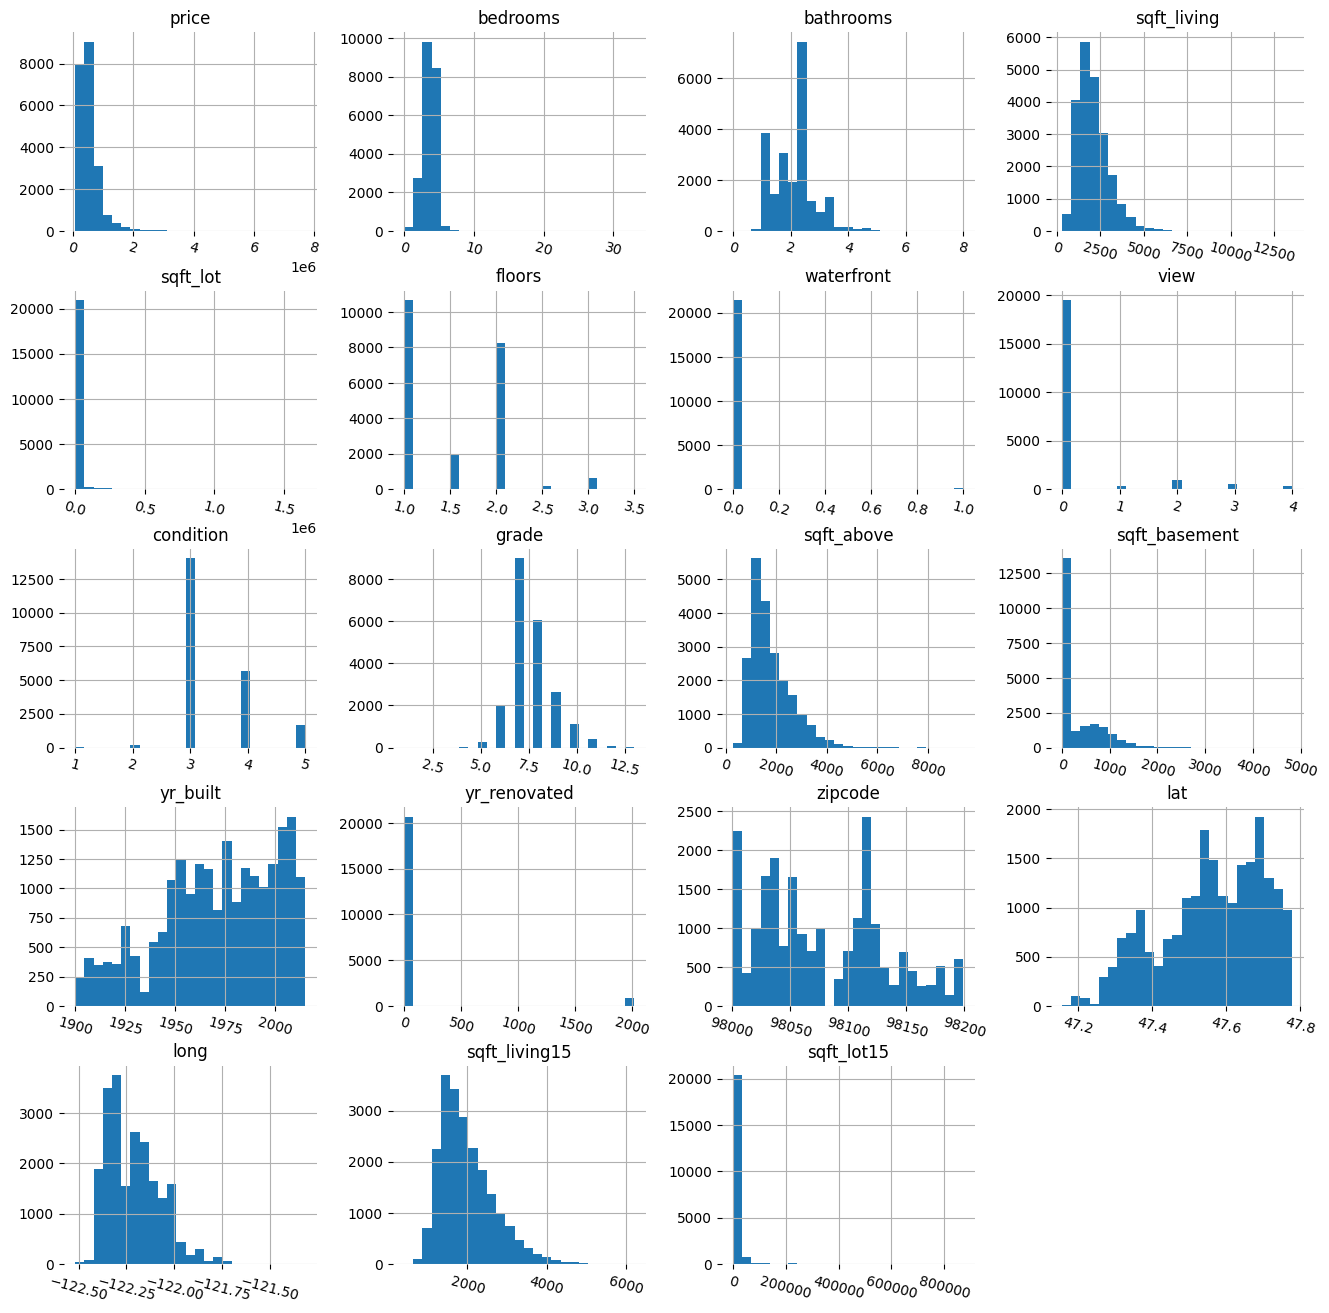

In [19]:
df1=df[df.columns[1:]]

h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

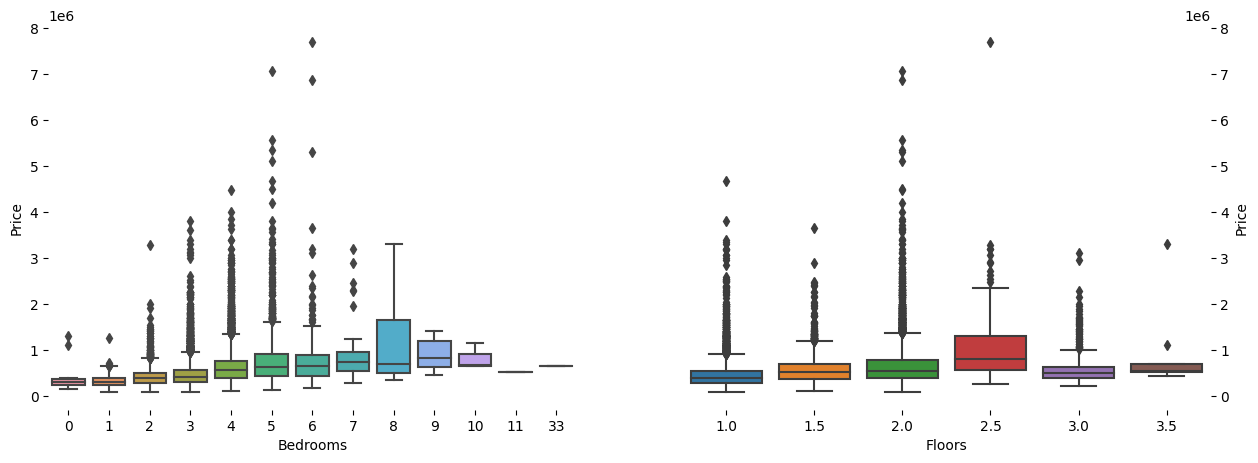

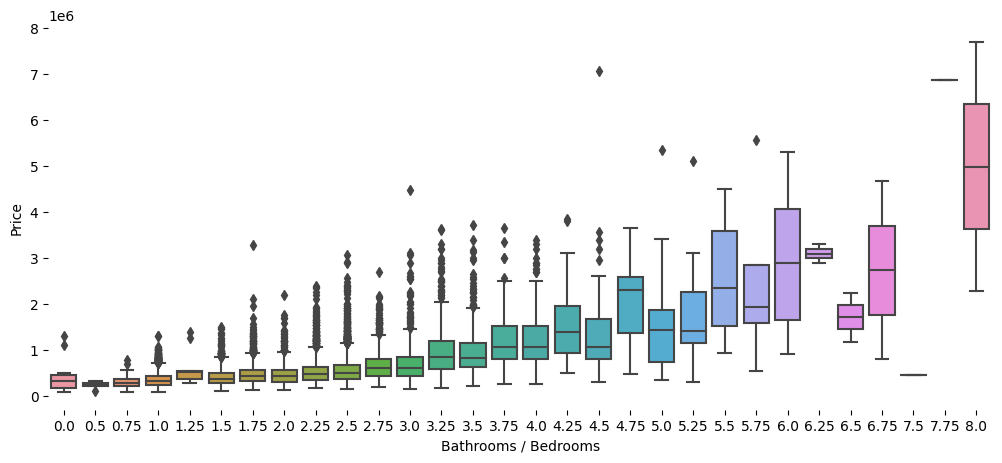

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

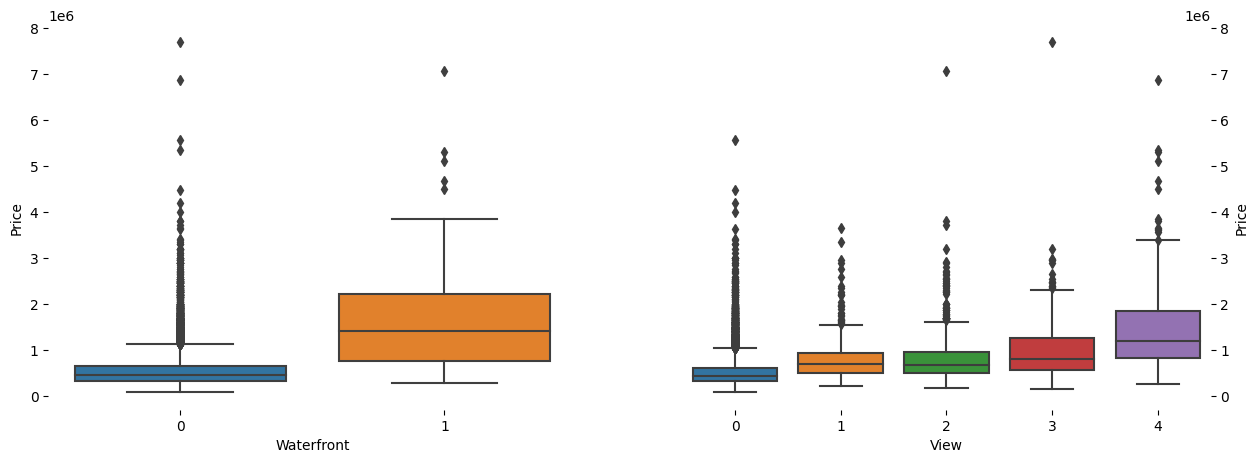

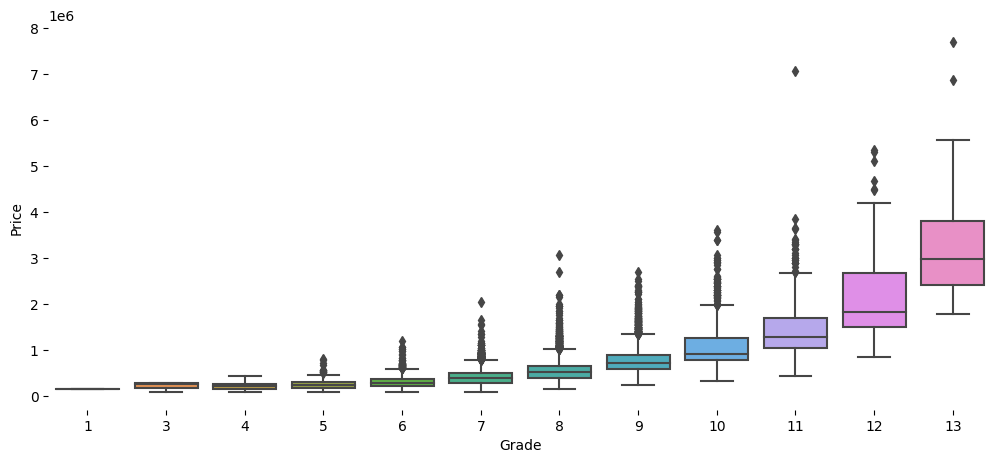

In [21]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

<Axes: >

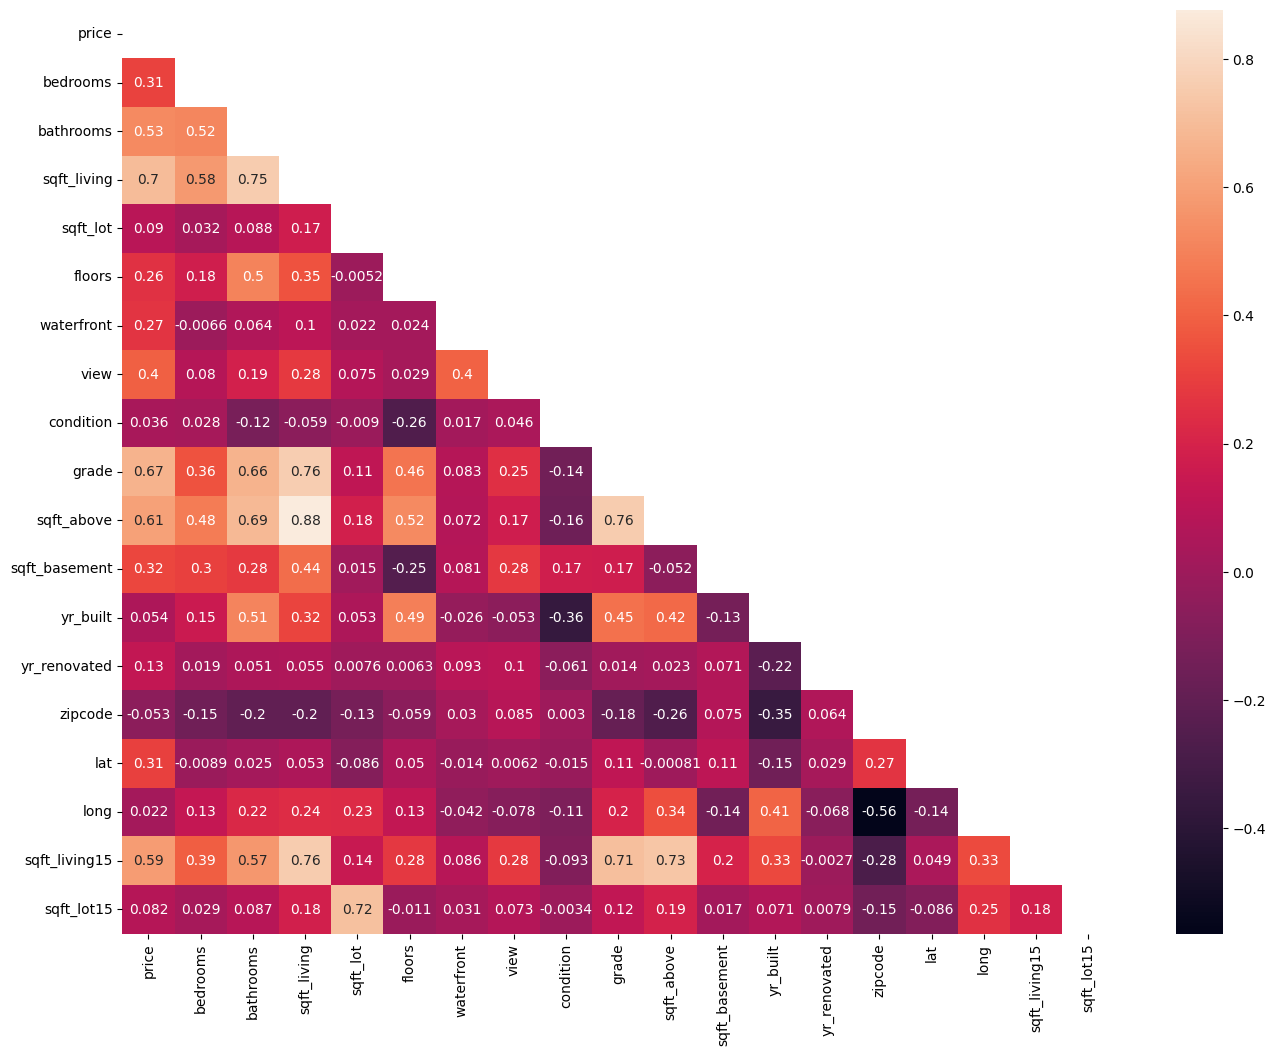

In [22]:
correlation = df[df.columns[1:]].corr()


f, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True)

In [23]:
correlation

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477616   0.685363     0.876644  0.183511  0.523899   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477616   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685363   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876644   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183511   
floors           0.023698  0.029444  -0.263768  0.458183    0.523899   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072074   
view             0.401857  1.000000   0.045990  0.251321    0.167648   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158206   
grade            0.082775  0.251321  -0.144674  1.000000    0.755924   
sqft_above       0.072074  0.167648  -0.158206  0.755924    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051976   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423915   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023283   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261192   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000810   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343800   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731871   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194048   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051976  0.423915      0.023283 -0.261192 -0.000810   
sqft_basement       1.000000 -0.133124      

In [24]:
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
upper

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price            NaN   0.30835   0.525138     0.702035  0.089661  0.256794   
bedrooms         NaN       NaN   0.515884     0.576671  0.031703  0.175429   
bathrooms        NaN       NaN        NaN     0.754665  0.087740  0.500653   
sqft_living      NaN       NaN        NaN          NaN  0.172826  0.353949   
sqft_lot         NaN       NaN        NaN          NaN       NaN -0.005201   
floors           NaN       NaN        NaN          NaN       NaN       NaN   
waterfront       NaN       NaN        NaN          NaN       NaN       NaN   
view             NaN       NaN        NaN          NaN       NaN       NaN   
condition        NaN       NaN        NaN          NaN       NaN       NaN   
grade            NaN       NaN        NaN          NaN       NaN       NaN   
sqft_above       NaN       NaN        NaN          NaN       NaN       NaN   
sqft_basement    NaN       NaN        NaN          NaN       NaN       NaN   
yr_built         NaN       NaN        NaN          NaN       NaN       NaN   
yr_renovated     NaN       NaN        NaN          NaN       NaN       NaN   
zipcode          NaN       NaN        NaN          NaN       NaN       NaN   
lat              NaN       NaN        NaN          NaN       NaN       NaN   
long             NaN       NaN        NaN          NaN       NaN       NaN   
sqft_living15    NaN       NaN        NaN          NaN       NaN       NaN   
sqft_lot15       NaN       NaN        NaN          NaN       NaN       NaN   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477616   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685363   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876644   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183511   
floors           0.023698  0.029444  -0.263768  0.458183    0.523899   
waterfront            NaN  0.401857   0.016653  0.082775    0.072074   
view                  NaN       NaN   0.045990  0.251321    0.167648   
condition             NaN       NaN        NaN -0.144674   -0.158206   
grade                 NaN       NaN        NaN       NaN    0.755924   
sqft_above            NaN       NaN        NaN       NaN         NaN   
sqft_basement         NaN       NaN        NaN       NaN         NaN   
yr_built              NaN       NaN        NaN       NaN         NaN   
yr_renovated          NaN       NaN        NaN       NaN         NaN   
zipcode               NaN       NaN        NaN       NaN         NaN   
lat                   NaN       NaN        NaN       NaN         NaN   
long                  NaN       NaN        NaN       NaN         NaN   
sqft_living15         NaN       NaN        NaN       NaN         NaN   
sqft_lot15            NaN       NaN        NaN       NaN         NaN   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051976  0.423915      0.023283 -0.261192 -0.000810   
sqft_basement            NaN -0.133124      0.071323  0.074845  0.110538   
yr_built                 

In [25]:
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
upper

C:\Windows\Temp\ipykernel_3332\2563566296.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price            NaN   0.30835   0.525138     0.702035  0.089661  0.256794   
bedrooms         NaN       NaN   0.515884     0.576671  0.031703  0.175429   
bathrooms        NaN       NaN        NaN     0.754665  0.087740  0.500653   
sqft_living      NaN       NaN        NaN          NaN  0.172826  0.353949   
sqft_lot         NaN       NaN        NaN          NaN       NaN -0.005201   
floors           NaN       NaN        NaN          NaN       NaN       NaN   
waterfront       NaN       NaN        NaN          NaN       NaN       NaN   
view             NaN       NaN        NaN          NaN       NaN       NaN   
condition        NaN       NaN        NaN          NaN       NaN       NaN   
grade            NaN       NaN        NaN          NaN       NaN       NaN   
sqft_above       NaN       NaN        NaN          NaN       NaN       NaN   
sqft_basement    NaN       NaN        NaN          NaN       NaN       NaN   
yr_built         NaN       NaN        NaN          NaN       NaN       NaN   
yr_renovated     NaN       NaN        NaN          NaN       NaN       NaN   
zipcode          NaN       NaN        NaN          NaN       NaN       NaN   
lat              NaN       NaN        NaN          NaN       NaN       NaN   
long             NaN       NaN        NaN          NaN       NaN       NaN   
sqft_living15    NaN       NaN        NaN          NaN       NaN       NaN   
sqft_lot15       NaN       NaN        NaN          NaN       NaN       NaN   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477616   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685363   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876644   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183511   
floors           0.023698  0.029444  -0.263768  0.458183    0.523899   
waterfront            NaN  0.401857   0.016653  0.082775    0.072074   
view                  NaN       NaN   0.045990  0.251321    0.167648   
condition             NaN       NaN        NaN -0.144674   -0.158206   
grade                 NaN       NaN        NaN       NaN    0.755924   
sqft_above            NaN       NaN        NaN       NaN         NaN   
sqft_basement         NaN       NaN        NaN       NaN         NaN   
yr_built              NaN       NaN        NaN       NaN         NaN   
yr_renovated          NaN       NaN        NaN       NaN         NaN   
zipcode               NaN       NaN        NaN       NaN         NaN   
lat                   NaN       NaN        NaN       NaN         NaN   
long                  NaN       NaN        NaN       NaN         NaN   
sqft_living15         NaN       NaN        NaN       NaN         NaN   
sqft_lot15            NaN       NaN        NaN       NaN         NaN   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051976  0.423915      0.023283 -0.261192 -0.000810   
sqft_basement            NaN -0.133124      0.071323  0.074845  0.110538   
yr_built                 

In [26]:
to_drop = [column for column in upper.columns if any(np.abs(upper[column]) > 0.8)]
print(to_drop)

['sqft_above']


# Data preprocessing

**Set missing sqft_above by 0**

In [27]:
df_dm=df.copy()
df_dm.loc[(df_dm.sqft_above.isnull()),'sqft_above']=0

**Binning**

In [28]:
df_dm.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.230602     291.509045   1971.005136     84.402258   
std        1.175459    828.268520     442.575043     29.373411    401.679240   
min        1.000000      0.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [29]:
# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age_built_sale']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv_sale']=0
df_dm['age_rnv_sale']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm.loc[df_dm['age_rnv_sale'].isnull(), 'age_rnv_sale'] = 0
#add the age of the building when the house renovated
df_dm['age_built_rnv'] = df_dm['yr_renovated'][df_dm['yr_renovated']!=0] - df_dm['yr_built']
df_dm.loc[df_dm['age_built_rnv'].isnull(), 'age_built_rnv'] = 0



# partition the age_built_sale into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_built_sale_binned'] = pd.cut(df_dm['age_built_sale'], bins=bins, labels=labels)
# partition the age_rnv_sale into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_sale_binned'] = pd.cut(df_dm['age_rnv_sale'], bins=bins, labels=labels)
# partition the age_built_rnv into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_built_rnv_binned'] = pd.cut(df_dm['age_built_rnv'], bins=bins, labels=labels)

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_built_sale_binned','age_rnv_sale_binned','age_built_rnv_binned'])

In [30]:
len(df_dm[df_dm['age_rnv_sale'] > 75])

1

In [31]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21613 non-null  int64  
 1   date                          21613 non-null  object 
 2   price                         21613 non-null  float64
 3   bedrooms                      21613 non-null  int64  
 4   bathrooms                     21613 non-null  float64
 5   sqft_living                   21613 non-null  int64  
 6   sqft_lot                      21613 non-null  int64  
 7   floors                        21613 non-null  float64
 8   waterfront                    21613 non-null  int64  
 9   view                          21613 non-null  int64  
 10  condition                     21613 non-null  int64  
 11  grade                         21613 non-null  int64  
 12  sqft_above                    21613 non-null  float64
 13  s

In [32]:
df_dm.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  age_rnv_sale_binned_51-75  \
0      5650     1.0           0     0  ...                          0   
1      7242     2.0           0     0  ...                          0   
2     10000     1.0           0     0  ...                          0   
3      5000     1.0           0     0  ...                          0   
4      8080     1.0           0     0  ...                          0   

   age_rnv_sale_binned_>75  age_built_rnv_binned_<1  age_built_rnv_binned_1-5  \
0                        0                        1                         0   
1                        0                        0                         0   
2                        0                        1                         0   
3                        0                        1                         0   
4                        0                        1                         0   

   age_built_rnv_binned_6-10  age_built_rnv_binned_11-25  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   age_built_rnv_binned_26-50  age_built_rnv_binned_51-75  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   age_built_rnv_binned_76-100  age_built_rnv_binned_>100  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          0  

[5 rows x 48 columns]

**Feature selection with Correlation matrix**

In [33]:
correlation = df_dm[df_dm.columns[1:]].corr()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
upper

price  bedrooms  bathrooms  sqft_living  \
price                           NaN   0.30835   0.525138     0.702035   
bedrooms                        NaN       NaN   0.515884     0.576671   
bathrooms                       NaN       NaN        NaN     0.754665   
sqft_living                     NaN       NaN        NaN          NaN   
sqft_lot                        NaN       NaN        NaN          NaN   
floors                          NaN       NaN        NaN          NaN   
waterfront                      NaN       NaN        NaN          NaN   
view                            NaN       NaN        NaN          NaN   
condition                       NaN       NaN        NaN          NaN   
grade                           NaN       NaN        NaN          NaN   
sqft_above                      NaN       NaN        NaN          NaN   
sqft_basement                   NaN       NaN        NaN          NaN   
yr_built                        NaN       NaN        NaN          NaN   
yr_renovated                    NaN       NaN        NaN          NaN   
zipcode                         NaN       NaN        NaN          NaN   
lat                             NaN       NaN        NaN          NaN   
long                            NaN       NaN        NaN          NaN   
sqft_living15                   NaN       NaN        NaN          NaN   
sqft_lot15                      NaN       NaN        NaN          NaN   
age_built_sale                  NaN       NaN        NaN          NaN   
age_rnv_sale                    NaN       NaN        NaN          NaN   
age_built_rnv                   NaN       NaN        NaN          NaN   
age_built_sale_binned_<1        NaN       NaN        NaN          NaN   
age_built_sale_binned_1-5       NaN       NaN        NaN          NaN   
age_built_sale_binned_6-10      NaN       NaN        NaN          NaN   
age_built_sale_binned_11-25     NaN       NaN        NaN          NaN   
age_built_sale_binned_26-50     NaN       NaN        NaN          NaN   
age_built_sale_binned_51-75     NaN       NaN        NaN          NaN   
age_built_sale_binned_76-100    NaN       NaN        NaN          NaN   
age_built_sale_binned_>100      NaN       NaN        NaN          NaN   
age_rnv_sale_binned_<1          NaN       NaN        NaN          NaN   
age_rnv_sale_binned_1-5         NaN       NaN        NaN          NaN   
age_rnv_sale_binned_6-10        NaN       NaN        NaN          NaN   
age_rnv_sale_binned_11-25       NaN       NaN        NaN          NaN   
age_rnv_sale_binned_26-50       NaN       NaN        NaN          NaN   
age_rnv_sale_binned_51-75       NaN       NaN        NaN          NaN   
age_rnv_sale_binned_>75         NaN       NaN        NaN          NaN   
age_built_rnv_binned_<1         NaN       NaN        NaN          NaN   
age_built_rnv_binned_1-5        NaN       NaN        NaN          NaN   
age_built_rnv_binned_6-10       NaN       NaN        NaN          NaN   
age_built_rnv_binned_11-25      NaN       NaN        NaN          NaN   
age_built_rnv_binned_26-50      NaN       NaN        NaN          NaN   
age_built_rnv_binned_51-75      NaN       NaN        NaN          NaN   
age_built_rnv_binned_76-100     NaN       NaN        NaN          NaN   
age_built_rnv_binned_>100       NaN       NaN        NaN          NaN   

                              sqft_lot    floors  waterfront      view  \
price                         0.089661  0.256794    0.266369  0.397293   
bedrooms                      0.031703  0.175429   -0.006582  0.079532   
bathrooms                     0.087740  0.500653    0.063744  0.187737   
sqft_living                   0.172826  0.353949    0.103818  0.284611   
sqft_lot                           NaN -0.005201    0.021604  0.074710   
floors                             NaN       NaN    0.023698  0.029444   
waterfront                         NaN       NaN         NaN  0.401857   
view                               NaN       NaN         NaN       NaN   
condi

In [34]:
to_drop = [column for column in upper.columns if any(np.abs(upper[column]) > 0.8)]
to_drop

['sqft_above',
 'age_built_sale',
 'age_built_rnv',
 'age_rnv_sale_binned_<1',
 'age_built_rnv_binned_<1']

**Drop id column and extract data column into year, month, day**

In [35]:
data = df_dm.drop(['id'], axis = 1)
target = data['price']

data = data.drop(['price'], axis = 1)

In [36]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop('date', axis = 1)
data = data.drop('sales_yr', axis = 1)

data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  age_built_rnv_binned_1-5  \
0          3      7      1180.0  ...                         0   
1          3      7      2170.0  ...                         0   
2          3      6       770.0  ...                         0   
3          5      7      1050.0  ...                         0   
4          3      8      1680.0  ...                         0   

   age_built_rnv_binned_6-10  age_built_rnv_binned_11-25  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   age_built_rnv_binned_26-50  age_built_rnv_binned_51-75  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   age_built_rnv_binned_76-100  age_built_rnv_binned_>100  year  month  day  
0                            0                          0  2014     10   13  
1                            0                          0  2014     12    9  
2                            0                          0  2015      2   25  
3                            0                          0  2014     12    9  
4                            0                          0  2015      2   18  

[5 rows x 47 columns]

In [37]:
to_drop_indices = [df_dm.columns.get_loc(col_name) for col_name in to_drop]

df_test = df_dm.drop(df_dm.columns[to_drop_indices], axis = 1)
df_test

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  \
0             1180      5650     1.0           0     0  ...   
1             2570      7242     2.0           0     0  ...   
2              770     10000     1.0           0     0  ...   
3             1960      5000     1.0           0     0  ...   
4             1680      8080     1.0           0     0  ...   
...            ...       ...     ...         ...   ...  ...   
21608         1530      1131     3.0           0     0  ...   
21609         2310      5813     2.0           0     0  ...   
21610         1020      1350     2.0           0     0  ...   
21611         1600      2388     2.0           0     0  ...   
21612         1020      1076     2.0           0     0  ...   

       age_rnv_sale_binned_26-50  age_rnv_sale_binned_51-75  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
21608                          0                          0   
21609                          0                          0   
21610                          0                          0   
21611                          0                          0   
21612                          0                          0   

       age_rnv_sale_binned_>75  age_built_rnv_binned_1-5  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
21608                        0                         0   
21609                        0                         0   
21610                        0                         0   
21611                        0                         0   
21612                        0                         0   

       age_built_rnv_binned_6-10  age_built_rnv_binned_11-25  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
21608                          0                           0   
21609                          0                           0   
21610                          0                           0   
21611                          0                           0   
21612                          0                           0   

       age_built_rnv_binned_26-50  age_built_rnv_binned_51-75  \
0                               0                           0   
1                               1                   

**Drop features have highr correlation**

In [28]:
to_drop_indices = [data.columns.get_loc(col_name) for col_name in to_drop]

data_test = data.drop(data.columns[to_drop_indices], axis = 1)
data_test.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_basement  ...  age_built_rnv_binned_1-5  \
0          3      7              0  ...                         0   
1          3      7            400  ...                         0   
2          3      6              0  ...                         0   
3          5      7            910  ...                         0   
4          3      8              0  ...                         0   

   age_built_rnv_binned_6-10  age_built_rnv_binned_11-25  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   age_built_rnv_binned_26-50  age_built_rnv_binned_51-75  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   age_built_rnv_binned_76-100  age_built_rnv_binned_>100  year  month  day  
0                            0                          0  2014     10   13  
1                            0                          0  2014     12    9  
2                            0                          0  2015      2   25  
3                            0                          0  2014     12    9  
4                            0                          0  2015      2   18  

[5 rows x 42 columns]

## **Split train and test data**

In [38]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
                else col for col in data.columns.values]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=12)

print ("Train shape:{}, Test shape: {}, Data shape={}".format(X_train.shape, X_test.shape, data.shape))

Train shape:(17290, 47), Test shape: (4323, 47), Data shape=(21613, 47)


In [31]:
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
20359         4       2.50         2009      4800     2.0           0     0   
10461         2       2.50         1240      1546     2.0           0     0   
20047         3       2.50         2610      7256     2.0           0     0   
10581         2       1.00          790     14200     1.0           0     0   
17749         2       1.00          690      5200     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
3714          4       2.00         1520      6200     1.5           0     0   
7409          4       2.50         2441      7316     2.0           0     0   
19709         6       4.25         4310     10000     2.0           0     0   
5787          2       1.75         1350      4286     1.0           0     0   
14155         3       2.25         2590     15229     2.0           0     3   

       condition  grade  sqft_above  ...  age_built_rnv_binned_1-5  \
20359          3      8      2009.0  ...                         0   
10461          3      7      1240.0  ...                         0   
20047          3      9      2610.0  ...                         0   
10581          3      7       790.0  ...                         0   
17749          3      6       690.0  ...                         0   
...          ...    ...         ...  ...                       ...   
3714           3      7      1520.0  ...                         0   
7409           3      8      2441.0  ...                         0   
19709          3      8      2950.0  ...                         0   
5787           3      8      1350.0  ...                         0   
14155          3      8      2590.0  ...                         0   

       age_built_rnv_binned_6-10  age_built_rnv_binned_11-25  \
20359                          0                           0   
10461                          0                           0   
20047                          0                           0   
10581                          0                           0   
17749                          0                           0   
...                          ...                         ...   
3714                           0                           0   
7409                           0                           0   
19709                          0                           0   
5787                           0                           0   
14155                          0                           0   

       age_built_rnv_binned_26-50  age_built_rnv_binned_51-75  \
20359                           0                           0   
10461                           0                           0   
20047                           0                           0   
10581                           0                           0   
17749                           0                           0   
...                           ...                         ...   
3714                            0                           0   
7409                            0                           0   
19709                           0                           0   
5787                            0                           0   
14155                           0                           0   

       age_built_rnv_binned_76-100  age_built_rnv_binned_>100  year  month  \
20359                            0                          0  2014     12   
10461                            0                          0  2014      5   
20047                            0                          0  2014      5   
10581                            0                          0  2014      8   
17749                            0                          0  2015      2   
...                            ...                        ...   ...    ...   
3714                             0                          0  2014      5   
7409                             0         

## **Feature selection**

[Reference](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection)

Feature selection techniques are categorized into 3 typers. These are as follows:

- **Filter methods**
- **Wrapper methods**
- **Embedded methods**


**Filter methods**

![Filter methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)

**1. Basic methods**



**Remove high correlation features use Correlation matrix**

In [32]:
X_train_corr = X_train.drop(X_train.columns[to_drop_indices], axis = 1)
X_test_corr = X_test.drop(X_test.columns[to_drop_indices], axis = 1)

**1.1. Remove constant and quasi-constant features (features with low variance)**

In [33]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)
sel.fit(X_train)

X_train_vt = sel.transform(X_train)
X_test_vt = sel.transform(X_test)

print(X_train_vt.shape)
print(X_test_vt.shape)

(17290, 24)
(4323, 24)


In [34]:
retain_features = sel.get_feature_names_out()
X_train_vt = pd.DataFrame(X_train_vt, columns=retain_features)
X_train_vt.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  \
0       4.0        2.5       2009.0    4800.0     2.0   0.0        3.0    8.0   
1       2.0        2.5       1240.0    1546.0     2.0   0.0        3.0    7.0   
2       3.0        2.5       2610.0    7256.0     2.0   0.0        3.0    9.0   
3       2.0        1.0        790.0   14200.0     1.0   0.0        3.0    7.0   
4       2.0        1.0        690.0    5200.0     1.0   0.0        3.0    6.0   

   sqft_above  sqft_basement  ...  sqft_lot15  age_built_sale  age_rnv_sale  \
0      2009.0            0.0  ...      4800.0             2.0           0.0   
1      1240.0            0.0  ...      2468.0             7.0           0.0   
2      2610.0            0.0  ...      7206.0             0.0           0.0   
3       790.0            0.0  ...     10000.0            63.0           0.0   
4       690.0            0.0  ...      5700.0            97.0           0.0   

   age_built_rnv  age_built_sale_binned_11-25  age_built_sale_binned_26-50  \
0            0.0                          0.0                          0.0   
1            0.0                          0.0                          0.0   
2            0.0                          0.0                          0.0   
3            0.0                          0.0                          0.0   
4            0.0                          0.0                          0.0   

   age_built_sale_binned_51-75    year  month   day  
0                          0.0  2014.0   12.0   9.0  
1                          0.0  2014.0    5.0  30.0  
2                          0.0  2014.0    5.0  27.0  
3                          1.0  2014.0    8.0   7.0  
4                          0.0  2015.0    2.0  25.0  

[5 rows x 24 columns]

In [35]:
X_test_vt = pd.DataFrame(X_test_vt, columns=retain_features)
X_test_vt.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  \
0       5.0       1.50       1950.0    9000.0     1.0   0.0        3.0    7.0   
1       3.0       1.50       1280.0   16738.0     1.5   0.0        4.0    5.0   
2       3.0       1.75       1260.0    9346.0     1.0   0.0        4.0    7.0   
3       4.0       2.75       2640.0    3750.0     2.0   0.0        5.0    7.0   
4       4.0       2.75       1970.0   37026.0     1.0   0.0        4.0    8.0   

   sqft_above  sqft_basement  ...  sqft_lot15  age_built_sale  age_rnv_sale  \
0      1130.0          820.0  ...      9526.0            50.0           0.0   
1      1280.0            0.0  ...     16317.0            82.0           0.0   
2      1260.0            0.0  ...      9705.0            51.0           0.0   
3      1840.0          800.0  ...      5000.0           103.0           0.0   
4      1970.0            0.0  ...     51836.0            53.0           0.0   

   age_built_rnv  age_built_sale_binned_11-25  age_built_sale_binned_26-50  \
0            0.0                          0.0                          1.0   
1            0.0                          0.0                          0.0   
2            0.0                          0.0                          0.0   
3            0.0                          0.0                          0.0   
4            0.0                          0.0                          0.0   

   age_built_sale_binned_51-75    year  month   day  
0                          0.0  2014.0   12.0  18.0  
1                          0.0  2014.0   10.0  15.0  
2                          1.0  2014.0    6.0  26.0  
3                          0.0  2014.0   11.0  25.0  
4                          1.0  2014.0    7.0   9.0  

[5 rows x 24 columns]

**2. Univariate selection method**

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

freg = SelectKBest(f_regression, k=35)
freg.fit(X_train, y_train)

X_train_freg = freg.transform(X_train)
X_test_freg = freg.transform(X_test)

print(X_train_freg.shape, X_test_freg.shape)

(17290, 35) (4323, 35)


In [37]:
freg.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15', 'age_built_sale', 'age_rnv_sale',
       'age_built_rnv', 'age_built_sale_binned__1',
       'age_built_sale_binned_6-10', 'age_built_sale_binned_11-25',
       'age_built_sale_binned_26-50', 'age_built_sale_binned_51-75',
       'age_built_sale_binned_76-100', 'age_built_sale_binned_>100',
       'age_rnv_sale_binned__1', 'age_rnv_sale_binned_1-5',
       'age_rnv_sale_binned_6-10', 'age_rnv_sale_binned_11-25',
       'age_built_rnv_binned__1', 'age_built_rnv_binned_26-50',
       'age_built_rnv_binned_51-75', 'age_built_rnv_binned_76-100'],
      dtype=object)

In [38]:
X_train_freg = pd.DataFrame(X_train_freg, columns=freg.get_feature_names_out())
X_test_freg = pd.DataFrame(X_test_freg, columns=freg.get_feature_names_out())

In [39]:
X_train_freg

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0           4.0       2.50       2009.0    4800.0     2.0         0.0   0.0   
1           2.0       2.50       1240.0    1546.0     2.0         0.0   0.0   
2           3.0       2.50       2610.0    7256.0     2.0         0.0   0.0   
3           2.0       1.00        790.0   14200.0     1.0         0.0   0.0   
4           2.0       1.00        690.0    5200.0     1.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
17285       4.0       2.00       1520.0    6200.0     1.5         0.0   0.0   
17286       4.0       2.50       2441.0    7316.0     2.0         0.0   0.0   
17287       6.0       4.25       4310.0   10000.0     2.0         0.0   0.0   
17288       2.0       1.75       1350.0    4286.0     1.0         0.0   0.0   
17289       3.0       2.25       2590.0   15229.0     2.0         0.0   3.0   

       condition  grade  sqft_above  ...  age_built_sale_binned_76-100  \
0            3.0    8.0      2009.0  ...                           0.0   
1            3.0    7.0      1240.0  ...                           0.0   
2            3.0    9.0      2610.0  ...                           0.0   
3            3.0    7.0       790.0  ...                           0.0   
4            3.0    6.0       690.0  ...                           1.0   
...          ...    ...         ...  ...                           ...   
17285        3.0    7.0      1520.0  ...                           0.0   
17286        3.0    8.0      2441.0  ...                           0.0   
17287        3.0    8.0      2950.0  ...                           0.0   
17288        3.0    8.0      1350.0  ...                           0.0   
17289        3.0    8.0      2590.0  ...                           0.0   

       age_built_sale_binned_>100  age_rnv_sale_binned__1  \
0                             0.0                     1.0   
1                             0.0                     1.0   
2                             0.0                     1.0   
3                             0.0                     1.0   
4                             0.0                     1.0   
...                           ...                     ...   
17285                         0.0                     1.0   
17286                         0.0                     1.0   
17287                         0.0                     1.0   
17288                         0.0                     1.0   
17289                         0.0                     1.0   

       age_rnv_sale_binned_1-5  age_rnv_sale_binned_6-10  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
17285                      0.0                       0.0   
17286                      0.0                       0.0   
17287                      0.0                       0.0   
17288                      0.0                       0.0   
17289                      0.0                       0.0   

       age_rnv_sale_binned_11-25  age_built_rnv_binned__1  \
0                            0.0                      1.0   
1                            0.0                      1.0   
2                            0.0                      1.0   
3                            0.0                      1.0   
4                            0.0                      1.0   
...                          ...                      ...   
17285                        0.0                      1.0   
17286                        0.0                      1.0   
17287                        0.0                      1.0   
17288                        0.0                      1.0   
17289                        0.0            

In [40]:
X_test_freg

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          5.0       1.50       1950.0    9000.0     1.0         0.0   0.0   
1          3.0       1.50       1280.0   16738.0     1.5         0.0   0.0   
2          3.0       1.75       1260.0    9346.0     1.0         0.0   0.0   
3          4.0       2.75       2640.0    3750.0     2.0         0.0   0.0   
4          4.0       2.75       1970.0   37026.0     1.0         0.0   0.0   
...        ...        ...          ...       ...     ...         ...   ...   
4318       2.0       2.00       1760.0    7200.0     1.0         0.0   0.0   
4319       3.0       2.75       1960.0    2500.0     1.5         0.0   0.0   
4320       3.0       1.75       2090.0   12026.0     1.0         0.0   0.0   
4321       2.0       1.00       1240.0    5000.0     1.0         0.0   0.0   
4322       4.0       2.50       3260.0    5608.0     2.0         0.0   0.0   

      condition  grade  sqft_above  ...  age_built_sale_binned_76-100  \
0           3.0    7.0      1130.0  ...                           0.0   
1           4.0    5.0      1280.0  ...                           1.0   
2           4.0    7.0      1260.0  ...                           0.0   
3           5.0    7.0      1840.0  ...                           0.0   
4           4.0    8.0      1970.0  ...                           0.0   
...         ...    ...         ...  ...                           ...   
4318        5.0    7.0       880.0  ...                           0.0   
4319        5.0    7.0      1410.0  ...                           1.0   
4320        4.0    7.0      2090.0  ...                           0.0   
4321        3.0    7.0      1000.0  ...                           1.0   
4322        3.0    9.0      3260.0  ...                           0.0   

      age_built_sale_binned_>100  age_rnv_sale_binned__1  \
0                            0.0                     1.0   
1                            0.0                     1.0   
2                            0.0                     1.0   
3                            1.0                     1.0   
4                            0.0                     1.0   
...                          ...                     ...   
4318                         0.0                     1.0   
4319                         0.0                     1.0   
4320                         0.0                     1.0   
4321                         0.0                     1.0   
4322                         0.0                     1.0   

      age_rnv_sale_binned_1-5  age_rnv_sale_binned_6-10  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
4318                      0.0                       0.0   
4319                      0.0                       0.0   
4320                      0.0                       0.0   
4321                      0.0                       0.0   
4322                      0.0                       0.0   

      age_rnv_sale_binned_11-25  age_built_rnv_binned__1  \
0                           0.0                      1.0   
1                           0.0                      1.0   
2                           0.0                      1.0   
3                           0.0                      1.0   
4                           0.0                      1.0   
...                         ...                      ...   
4318                        0.0                      1.0   
4319                        0.0                      1.0   
4320                        0.0                      1.0   
4321                        0.0                      1.0   
4322                        0.0                      1.0   

      age_built_rnv_binned_26-50  age_bui

**Wrapper Methods**

![Wrapper Methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)

**Recursive Feature Elimination**

In [41]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5)

rfecv = rfecv.fit(X_train, y_train)

X_train_rfecv = rfecv.transform(X_train)

X_test_rfecv = rfecv.transform(X_test)

In [42]:
selected_features = X_train.columns[rfecv.support_]

feature_ranking = pd.Series(rfecv.ranking_, index=X_train.columns)

print("Optimal number of feature: %d" % rfecv.n_features_)
print("Best features: ")
print(selected_features)

print("\nFeature ranking:")
print(feature_ranking)

Optimal number of feature: 47
Best features: 
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_built_sale', 'age_rnv_sale',
       'age_built_rnv', 'age_built_sale_binned__1',
       'age_built_sale_binned_1-5', 'age_built_sale_binned_6-10',
       'age_built_sale_binned_11-25', 'age_built_sale_binned_26-50',
       'age_built_sale_binned_51-75', 'age_built_sale_binned_76-100',
       'age_built_sale_binned_>100', 'age_rnv_sale_binned__1',
       'age_rnv_sale_binned_1-5', 'age_rnv_sale_binned_6-10',
       'age_rnv_sale_binned_11-25', 'age_rnv_sale_binned_26-50',
       'age_rnv_sale_binned_51-75', 'age_rnv_sale_binned_>75',
       'age_built_rnv_binned__1', 'age_built_rnv_binned_1-5',
       'age_built_rnv_binned_6-10', 'age_built_rnv_binned_11-25',
       'age_built_rnv_binned_26-

## **Scaling**

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_data(scaler, X_train, X_test):
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return X_train_scaled, X_test_scaled

**Standardization**

In [44]:
standardization = StandardScaler()

#StandardScaler
X_train_std, X_test_std = scale_data(standardization, X_train, X_test)

# StandardScaler with Variance threshold
X_train_vt_std, X_test_vt_std = scale_data(standardization, X_train_vt, X_test_vt)

# StandardScaler with Univariate selection (f-regression)
X_train_freg_std, X_test_freg_std = scale_data(standardization, X_train_freg, X_test_freg)

In [45]:
lr_std = LinearRegression()
lr_std.fit(X_train_std, y_train)
pred_std = lr_std.predict(X_test_std)
    
rmsesm_std = np.sqrt(metrics.mean_squared_error(y_test, pred_std))
rtrsm_std = lr_std.score(X_train_std, y_train)
rtesm_std = lr_std.score(X_test_std, y_test)

print(rmsesm_std)

217381.8693655833


**Normalization**

In [46]:
normalization = MinMaxScaler()

# Normalization
X_train_nor, X_test_nor = scale_data(normalization, X_train, X_test)

# Normalization with Variance threshold
X_train_vt_nor, X_test_vt_nor = scale_data(normalization, X_train_vt, X_test_vt)

# Normalization with Univariate selection (f-regression)
X_train_freg_nor, X_test_freg_nor = scale_data(normalization, X_train_freg, X_test_freg)

In [47]:
lr_nor = LinearRegression()
lr_nor.fit(X_train_nor, y_train)
pred_nor = lr_nor.predict(X_test_nor)
    
rmsesm_nor = np.sqrt(metrics.mean_squared_error(y_test, pred_nor))
rtrsm_nor = lr_nor.score(X_train_nor, y_train)
rtesm_nor = lr_nor.score(X_test_nor, y_test)

print(rmsesm_nor)

217361.29071526666


**Robust**

In [48]:
robust = RobustScaler()

#Robust
X_train_rb, X_test_rb = scale_data(robust, X_train, X_test)

# Robust with Variance threshold
X_train_vt_rb, X_test_vt_rb = scale_data(robust, X_train_vt, X_test_vt)

# Robust with Univariate selection (f-regression)
X_train_freg_rb, X_test_freg_rb = scale_data(robust, X_train_freg, X_test_freg)

In [49]:
lr_rb = LinearRegression()
lr_rb.fit(X_train_rb, y_train)
pred_rb = lr_rb.predict(X_test_rb)
    
rmsesm_rb = np.sqrt(metrics.mean_squared_error(y_test, pred_rb))
rtrsm_rb = lr_rb.score(X_train_rb, y_train)
rtesm_rb = lr_rb.score(X_test_rb, y_test)

print(rmsesm_rb)

217380.55928927351


# Simple Linear Regression

In [3]:
base_evaluation_table = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Scaler':[],
                           'Feature selection':[],
                           'No. features': [],
                           'RMSE':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[]})

In [137]:
X_train_simple = np.array(X_train['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train_simple = np.array(y_train, dtype=pd.Series)

X_test_simple = np.array(X_test['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test_simple = np.array(y_test, dtype=pd.Series)

simple_lr = linear_model.LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

pred_simple = simple_lr.predict(X_test_simple)

rmsesm_simple = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_simple)),'.3f'))
rtrsm_simple = float(format(simple_lr.score(X_train_simple, y_train_simple),'.3f'))
rtesm_simple = float(format(simple_lr.score(X_test_simple, y_test_simple),'.3f'))

evaluation_linear_regression = base_evaluation_table.copy()
r = evaluation_linear_regression.shape[0]
evaluation_linear_regression.loc[r] = ['Simple Linear Regression','-','-','-', 1, rmsesm_simple,rtrsm_simple,rtesm_simple]
evaluation_linear_regression

Model Details Scaler Feature selection  No. features  \
0  Simple Linear Regression       -      -                 -             1   

         RMSE  R-squared (training)  R-squared (test)  
0  273191.543                 0.486             0.514

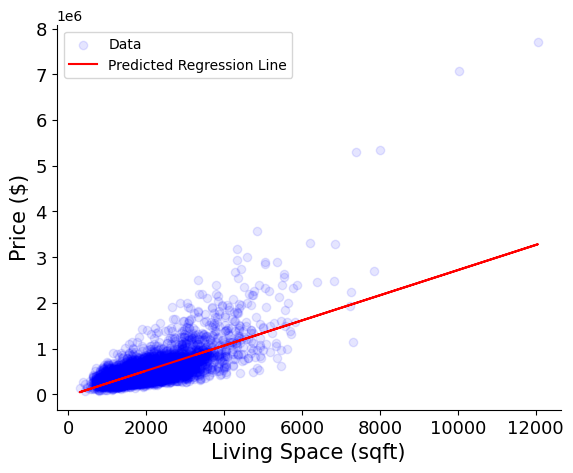

In [138]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test_simple,y_test_simple,color='b',label="Data", alpha=.1)
plt.plot(X_test_simple,simple_lr.predict(X_test_simple),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# **Multiple Linear Regression**

In [139]:
# details = []
        
# X_trains = [X_train, X_train_vt, X_train_freg, X_train_vt_std, X_train_vt_nor, X_train_vt_rb, 
#             X_train_freg_std, X_train_freg_nor, X_train_freg_rb, X_train_rfecv]

# X_tests = [X_test, X_test_vt, X_test_freg, X_test_vt_std, X_test_vt_nor, X_test_vt_rb, 
#            X_test_freg_std, X_test_freg_nor, X_test_freg_rb, X_test_rfecv]

# def evaluate_model(model, X_trains, X_tests, y_train, y_test, evaluation_table):
#     for X_trainn, X_testt in zip(X_trains, X_tests):     
#         model.fit(X_trainn, y_train)
#         pred = model.predict(X_testt)

#         rmsesm = np.sqrt(metrics.mean_squared_error(y_test, pred)).round(3)
#         rtrsm = model.score(X_trainn, y_train).round(3)
#         rtesm = model.score(X_testt, y_test).round(3)
        
#         scaler = ""
#         feature_selection = ""
#         num_features = X_trainn.shape[1]

#         if X_trainn is X_train_vt_std or X_trainn is X_train_freg_std:
#             scaler = "Standardization"
#         elif X_trainn is X_train_vt_nor or X_trainn is X_train_freg_nor:
#             scaler = "Normalization"
#         elif X_trainn is X_train_vt_rb or X_trainn is X_train_freg_rb:
#             scaler = "Robust"

#         if X_trainn is X_train_vt or X_trainn is X_train_vt_std or X_trainn is X_train_vt_nor or X_trainn is X_train_vt_rb:
#             feature_selection = "Variance Threshold"
#         elif X_trainn is X_train_freg or X_trainn is X_train_freg_std or X_trainn is X_train_freg_nor or X_trainn is X_train_freg_rb:
#             feature_selection = "Univariate Feature Selection"
#         elif X_trainn is X_train_rfecv:
#             feature_selection = "RFECV"
        
#         evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,'-',
#                                                             scaler, feature_selection,
#                                                             num_features, rmsesm, rtrsm, rtesm]

# lin_reg = LinearRegression()
# evaluate_model(lin_reg, X_trains, X_tests, y_train, y_test, evaluation_linear_regression)
# evaluation_linear_regression

In [191]:
def model_score(model, X_train, X_test, y_train, y_test):
    #For neural nerwork
    if model.__class__.__name__ == "Sequential":
        model = Sequential()
        model.add(Dense(X_train.shape[1],activation="relu"))
    
        model.add(Dense(X_train.shape[1],activation="relu"))
        model.add(Dense(X_train.shape[1],activation="relu"))
        model.add(Dense(X_train.shape[1],activation="relu"))

        model.add(Dense(1))
        
        model.compile(optimizer="adam",loss="mse")
                
        model.fit(x=X_train,y=y_train,
                  validation_data=(X_test,y_test),
                  batch_size=128,epochs=500,verbose=1)
    else:
        model.fit(X_train, y_train)
        
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    # evaluation metrics
    rmsesm = np.sqrt(metrics.mean_squared_error(y_test, test_pred)).round(3)
    rtrsm = r2_score(y_train, train_pred).round(3)
    rtesm = r2_score(y_test, test_pred).round(3)
    #cv = cross_val_score(model,X_train,y_train,cv=5).mean().round(3)
    
    return rmsesm, rtrsm, rtesm

In [192]:
scaler = [StandardScaler(), MinMaxScaler(), RobustScaler()]
threshold = [0.02, 0.05, 0.1, 0.3, 0.5, 0.7]

def evaluate_vt(model, detail, X_train, X_test, y_train, y_test, evaluation_table):
    for thres in threshold:
        sel = VarianceThreshold(threshold=thres)
        sel.fit(X_train)

        _X_train = sel.transform(X_train)
        _X_test = sel.transform(X_test)
        num_features = _X_train.shape[1]
        
        for sc in scaler:
            _X_train = sc.fit_transform(_X_train)
            _X_test = sc.transform(_X_test)
            
            rmsesm, rtrsm, rtesm = model_score(model, _X_train, _X_test, y_train, y_test)
            
            evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            sc.__class__.__name__, 'Variance threshold',
                                                            num_features, rmsesm, rtrsm, rtesm]

In [193]:
kBest = [10, 15, 20, 25, 30, 35,40]
def evaluate_ufs(model, detail, X_train, X_test, y_train, y_test, evaluation_table):
    for _k in kBest:
        for sc in scaler:
            _X_train = sc.fit_transform(X_train)
            _X_test = sc.transform(X_test)
                  
            freg = SelectKBest(f_regression, k=_k)
            freg.fit(_X_train, y_train)

            _X_train = freg.transform(_X_train)
            _X_test = freg.transform(_X_test)
            num_features = _X_train.shape[1]
            
            rmsesm, rtrsm, rtesm = model_score(model, _X_train, _X_test, y_train, y_test)
            
            evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            sc.__class__.__name__, 'UFS (f-regression)',
                                                            num_features, rmsesm, rtrsm, rtesm]

In [194]:
def evaluate_rm_highcorr(model, detail, X_train, X_test, y_train, y_test, evaluation_table):
    X_train_new = X_train.drop(X_train.columns[to_drop_indices], axis = 1)
    X_test_new = X_test.drop(X_test.columns[to_drop_indices], axis = 1)
    
    for sc in scaler:
        _X_train = sc.fit_transform(X_train_new)
        _X_test = sc.transform(X_test_new)
        
        num_features = _X_train.shape[1]
        rmsesm, rtrsm, rtesm = model_score(model, _X_train, _X_test, y_train, y_test)
            
        evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            sc.__class__.__name__, 'Remove high corr',
                                                            num_features, rmsesm, rtrsm, rtesm]

In [195]:
def evaluate_all(model, detail, X_train, X_test, y_train, y_test, evaluation_table):
    #No preprocessing
    rmsesm, rtrsm, rtesm = model_score(model, X_train, X_test, y_train, y_test)
    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            '-', '-',
                                                            X_train.shape[1], rmsesm, rtrsm, rtesm]
    # Only Standard scaler
    rmsesm_s, rtrsm_s, rtesm_s = model_score(model, X_train_std, X_test_std, y_train, y_test)
    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__, detail,
                                                            'StandardScaler', '-',
                                                            X_train_std.shape[1], rmsesm_s, rtrsm_s, rtesm_s]
    
    # Only Normalization
    rmsesm_n, rtrsm_n, rtesm_n = model_score(model, X_train_nor, X_test_nor, y_train, y_test)
    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            'MinMaxScaler', '-',
                                                            X_train_nor.shape[1], rmsesm_n, rtrsm_n, rtesm_n]
    
    # Only Robust
    rmsesm_r, rtrsm_r, rtesm_r = model_score(model, X_train_rb, X_test_rb, y_train, y_test)
    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            'RobustScaler', '-',
                                                            X_train_rb.shape[1], rmsesm_r, rtrsm_r, rtesm_r]
    
    rmsesm_corr, rtrsm_corr, rtesm_corr = model_score(model, X_train_corr, X_test_corr, y_train, y_test)
    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__,detail,
                                                            '-', 'Remove high corr',
                                                            X_train_corr.shape[1], rmsesm_r, rtrsm_r, rtesm_r]
    # Variacne threshold + scalers
    evaluate_vt(model, detail, X_train, X_test, y_train, y_test, evaluation_table)
    
    # Univariate feature selection + scalers
    evaluate_ufs(model, detail, X_train, X_test, y_train, y_test, evaluation_table)
    
    # Remove high correlation features with correlation matrix + scaler
    evaluate_rm_highcorr(model, detail, X_train, X_test, y_train, y_test, evaluation_table)

In [61]:
lr = LinearRegression()

evaluate_all(lr, '-', X_train, X_test, y_train, y_test, evaluation_linear_regression)

evaluation_linear_regression = evaluation_linear_regression.sort_values(by = 'RMSE')
evaluation_linear_regression

Model Details          Scaler   Feature selection  \
3           LinearRegression       -    MinMaxScaler                   -   
1           LinearRegression       -               -                   -   
4           LinearRegression       -    RobustScaler                   -   
5           LinearRegression       -               -    Remove high corr   
2           LinearRegression       -  StandardScaler                   -   
43          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
42          LinearRegression       -  StandardScaler  UFS (f-regression)   
44          LinearRegression       -    RobustScaler  UFS (f-regression)   
46          LinearRegression       -    MinMaxScaler    Remove high corr   
47          LinearRegression       -    RobustScaler    Remove high corr   
45          LinearRegression       -  StandardScaler    Remove high corr   
41          LinearRegression       -    RobustScaler  UFS (f-regression)   
40          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
39          LinearRegression       -  StandardScaler  UFS (f-regression)   
38          LinearRegression       -    RobustScaler  UFS (f-regression)   
37          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
36          LinearRegression       -  StandardScaler  UFS (f-regression)   
34          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
33          LinearRegression       -  StandardScaler  UFS (f-regression)   
35          LinearRegression       -    RobustScaler  UFS (f-regression)   
32          LinearRegression       -    RobustScaler  UFS (f-regression)   
31          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
30          LinearRegression       -  StandardScaler  UFS (f-regression)   
27          LinearRegression       -  StandardScaler  UFS (f-regression)   
29          LinearRegression       -    RobustScaler  UFS (f-regression)   
28          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
6           LinearRegression       -  StandardScaler  Variance threshold   
8           LinearRegression       -    RobustScaler  Variance threshold   
7           LinearRegression       -    MinMaxScaler  Variance threshold   
26          LinearRegression       -    RobustScaler  UFS (f-regression)   
25          LinearRegression       -    MinMaxScaler  UFS (f-regression)   
24          LinearRegression       -  StandardScaler  UFS (f-regression)   
14          LinearRegression       -    RobustScaler  Variance threshold   
13          LinearRegression       -    MinMaxScaler  Variance threshold   
12          LinearRegression       -  StandardScaler  Variance threshold   
11          LinearRegression       -    RobustScaler  Variance threshold   
9           LinearRegression       -  StandardScaler  Variance threshold   
10          LinearRegression       -    MinMaxScaler  Variance threshold   
17          LinearRegression       -    RobustScaler  Variance threshold   
16          LinearRegression       -    MinMaxScaler  Variance threshold   
15          LinearRegression       -  StandardScaler  Variance threshold   
20          LinearRegression       -    RobustScaler  Variance threshold   
19          LinearRegression       -    MinMaxScaler  Variance threshold   
18          LinearRegression       -  StandardScaler  Variance threshold   
23          LinearRegression       -    RobustScaler  Variance threshold   
21          LinearRegression       -  StandardScaler  Variance threshold   
22          LinearRegression       -    MinMaxScaler  Variance threshold   
0   Simple Linear Regression       -               -                   -   

    No. features        RMSE  R-squared (training)  R-squared (test)  
3             47  217361.291                 0.712             0.693  
1             47  217380.559                 0.712             0.692  
4             47  217380.559                 0.712             0.692  
5             

In [411]:
evaluation_linear_regression.to_csv('evaluation_linear_regression.csv')

# Decision Tree Regression

In [60]:
evaluation_decision_tree = base_evaluation_table.copy()

In [245]:
max_depth = 10
min_samples_split = 20
min_samples_leaf = 15


decision_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf)


detail = "max_depth={}, min_samples_split={}, min_samples_leaf={}".format(max_depth, min_samples_split, min_samples_leaf)



evaluate_all(decision_tree, detail, X_train, X_test, y_train, y_test, evaluation_decision_tree)

evaluation_decision_tree.sort_values(by = 'RMSE')

Model                                            Details  \
1   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
44  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
3   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
4   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
0   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
2   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
45  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
46  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
41  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
42  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
43  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
37  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
36  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
35  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
38  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
40  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
39  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
31  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
29  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
30  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
34  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
32  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
33  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
25  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
24  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
23  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
28  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
27  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
26  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
18  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
19  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
17  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
15  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
16  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
14  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
12  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
10  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
9   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
11  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
5   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
8   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
6   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
13  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
7   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
22  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
20  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
21  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   

            Scaler   Feature selection  No. features        RMSE  \
1   StandardScaler                   -            48  184054.538   
44  StandardScaler    Remove high corr     

**Use Recursive feature elimination**

In [169]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV(estimator=DecisionTreeRegressor(), step=1, cv=5)

rfecv = rfecv.fit(X_train, y_train)

X_train_rfecv = rfecv.transform(X_train)

X_test_rfecv = rfecv.transform(X_test)

In [170]:
def rfe_best_features(rfecv):
    selected_features = X_train.columns[rfecv.support_]

    feature_ranking = pd.Series(rfecv.ranking_, index=X_train.columns)

    print("Optimal number of feature: %d" % rfecv.n_features_)
    print("Best features: ")
    print(selected_features)

    print("\nFeature ranking:")
    print(feature_ranking)
    
rfe_best_features(rfecv)

Optimal number of feature: 8
Best features: 
Index(['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Feature ranking:
bedrooms                        12
bathrooms                        3
sqft_living                      1
sqft_lot                         4
floors                          14
waterfront                       1
view                             6
condition                       11
grade                            1
sqft_above                       2
sqft_basement                    9
yr_built                         1
yr_renovated                    17
zipcode                          5
lat                              1
long                             1
sqft_living15                    1
sqft_lot15                       1
sales_yr                        15
age_built_sale                   8
age_rnv_sale                    16
age_built_rnv                   13
age_built_sale_binned_<1        31

**Tunning hyper parameter with GridSearchCV**

In [145]:
from sklearn.model_selection import GridSearchCV

In [248]:
parameters = {'max_depth' : [5,10,15,20,25,30],
            'min_samples_split': [10,20,30,40,50],
           'min_samples_leaf':[10,15,20,25,30,40]}

tuning_rfe_dt=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_rfe_dt.fit(X_train_rfecv, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-37638853106.265 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-55033044932.375 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-35559585562.203 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-33528069524.535 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-35504499125.002 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=20;, score=-37638853106.265 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=20;, score=-55033044932.375 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=20;, score=-35559585562.203 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_lea

[CV 5/5] END max_depth=5, min_samples_leaf=20, min_samples_split=50;, score=-35505019723.136 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=25, min_samples_split=10;, score=-35277894769.400 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=25, min_samples_split=10;, score=-55120522980.645 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=25, min_samples_split=10;, score=-38225790204.145 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=25, min_samples_split=10;, score=-34637056116.263 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=25, min_samples_split=10;, score=-36278431344.663 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=25, min_samples_split=20;, score=-35277894769.400 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=25, min_samples_split=20;, score=-55120522980.645 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=25, min_samples_split=20;, score=-38225790204.145 total time=

[CV 5/5] END max_depth=5, min_samples_leaf=40, min_samples_split=50;, score=-35426067590.276 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=-24949974416.859 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=-40641030201.913 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=-29050506569.384 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=-25388775268.360 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=-25179090104.577 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=-24949974416.859 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=-40641030201.913 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=-29050506569.384 tot

[CV 5/5] END max_depth=10, min_samples_leaf=20, min_samples_split=50;, score=-25764025565.550 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=25, min_samples_split=10;, score=-25357478639.146 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=25, min_samples_split=10;, score=-43818478396.075 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=25, min_samples_split=10;, score=-32223393595.066 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=25, min_samples_split=10;, score=-26541116957.942 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=25, min_samples_split=10;, score=-26282801219.895 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=25, min_samples_split=20;, score=-25357478639.146 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=25, min_samples_split=20;, score=-43818478396.075 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=25, min_samples_split=20;, score=-32223393595.066 to

[CV 5/5] END max_depth=10, min_samples_leaf=40, min_samples_split=50;, score=-30223630495.502 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=-25271440543.508 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=-39383032978.121 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=-29123225506.266 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=-25577368809.560 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=-24205081851.953 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=10, min_samples_split=20;, score=-25271440543.508 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=10, min_samples_split=20;, score=-39383691585.571 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=10, min_samples_split=20;, score=-29175378396.145 to

[CV 5/5] END max_depth=15, min_samples_leaf=20, min_samples_split=50;, score=-25036932749.596 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=25, min_samples_split=10;, score=-24911371988.816 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=25, min_samples_split=10;, score=-43507159551.798 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=25, min_samples_split=10;, score=-32219108635.812 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=25, min_samples_split=10;, score=-26088477984.431 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=25, min_samples_split=10;, score=-25956760348.581 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=25, min_samples_split=20;, score=-24911371988.816 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=25, min_samples_split=20;, score=-43507159551.798 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=25, min_samples_split=20;, score=-32218969865.646 to

[CV 4/5] END max_depth=15, min_samples_leaf=40, min_samples_split=50;, score=-24854124732.521 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=40, min_samples_split=50;, score=-30102325531.445 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=-25342304618.553 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=-39387407998.392 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=-29223687164.660 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=-25528446563.476 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=-24263191196.866 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=-25339888769.429 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=-39388513077.737 to

[CV 4/5] END max_depth=20, min_samples_leaf=20, min_samples_split=50;, score=-26452314005.694 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=20, min_samples_split=50;, score=-25032831553.345 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=25, min_samples_split=10;, score=-24892930684.852 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=25, min_samples_split=10;, score=-43509585257.077 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=25, min_samples_split=10;, score=-32219108635.812 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=25, min_samples_split=10;, score=-26090404339.648 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=25, min_samples_split=10;, score=-25956208592.401 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=25, min_samples_split=20;, score=-24892930684.852 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=25, min_samples_split=20;, score=-43509585257.077 to

[CV 2/5] END max_depth=20, min_samples_leaf=40, min_samples_split=50;, score=-43449008858.223 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=40, min_samples_split=50;, score=-34442239820.154 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=40, min_samples_split=50;, score=-24854124732.521 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=40, min_samples_split=50;, score=-30102325531.445 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=10;, score=-25348815227.804 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=10;, score=-39388513077.737 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=10;, score=-29278894514.487 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=10;, score=-25532807655.253 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=10;, score=-24262506798.011 to

[CV 5/5] END max_depth=25, min_samples_leaf=20, min_samples_split=40;, score=-25540236870.147 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=20, min_samples_split=50;, score=-25136493751.350 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=20, min_samples_split=50;, score=-41414989355.818 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=20, min_samples_split=50;, score=-32957556649.056 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=20, min_samples_split=50;, score=-26454932348.303 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=20, min_samples_split=50;, score=-25032831553.345 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=25, min_samples_split=10;, score=-24892930684.852 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=25, min_samples_split=10;, score=-43509585257.077 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=25, min_samples_split=10;, score=-32219108635.812 to

[CV 5/5] END max_depth=25, min_samples_leaf=40, min_samples_split=40;, score=-30102325531.445 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=40, min_samples_split=50;, score=-27140071407.335 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=40, min_samples_split=50;, score=-43449008858.223 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=40, min_samples_split=50;, score=-34442239820.154 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=40, min_samples_split=50;, score=-24854124732.521 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=40, min_samples_split=50;, score=-30102325531.445 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10;, score=-25346681802.994 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10;, score=-39386885324.228 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10;, score=-29278435743.676 to

[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=40;, score=-25540236870.147 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=20, min_samples_split=50;, score=-25136493751.350 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=20, min_samples_split=50;, score=-41414989355.818 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=20, min_samples_split=50;, score=-32957376350.916 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=20, min_samples_split=50;, score=-26452314005.694 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=50;, score=-25032831553.345 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=25, min_samples_split=10;, score=-24892930684.852 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=25, min_samples_split=10;, score=-43509585257.077 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=25, min_samples_split=10;, score=-32218969865.646 to

[CV 4/5] END max_depth=30, min_samples_leaf=40, min_samples_split=40;, score=-24854124732.521 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=40, min_samples_split=40;, score=-30102325531.445 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=40, min_samples_split=50;, score=-27140071407.335 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=40, min_samples_split=50;, score=-43449008858.223 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=40, min_samples_split=50;, score=-34442239820.154 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=40, min_samples_split=50;, score=-24850927582.568 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=40, min_samples_split=50;, score=-30102325531.445 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 40],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error', verbose=3)

In [249]:
tuning_rfe_dt.best_params_

{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [250]:
tuning_rfe_dt.best_score_

-28712029937.88152

In [251]:
tuned_rfe_dt_model =  DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=20, splitter='best')

rmsesm_rfe, rtrsm_rfe, rtesm_rfe = model_score(tuned_rfe_dt_model, X_train_rfecv, X_test_rfecv, y_train, y_test)
print(rmsesm_rfe, rtrsm_rfe, rtesm_rfe)

176202.096 0.894 0.798


In [252]:
evaluation_decision_tree.loc[evaluation_decision_tree.shape[0]] = [tuned_rfe_dt_model.__class__.__name__,'max_depth=15, min_leaf=10, min_split=20',
                                                            '-', 'RFECV',
                                                            X_train_rfecv.shape[1], rmsesm_rfe, rtrsm_rfe, rtesm_rfe]
evaluation_decision_tree = evaluation_decision_tree.sort_values(by = 'RMSE')
evaluation_decision_tree

Model                                            Details  \
47  DecisionTreeRegressor            max_depth=15, min_leaf=10, min_split=20   
1   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
44  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
3   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
4   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
0   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
2   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
45  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
46  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
41  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
42  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
43  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
37  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
36  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
35  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
38  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
40  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
39  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
31  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
29  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
30  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
34  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
32  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
33  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
25  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
24  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
23  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
28  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
27  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
26  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
18  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
19  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
17  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
15  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
16  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
14  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
12  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
10  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
9   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
8   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
5   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
11  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
6   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
13  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
7   DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
22  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
20  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   
21  DecisionTreeRegressor  max_depth=10, min_samples_split=20, min_sample...   

            Scaler   Feature selection  No. features        RMSE  \
47               -             

In [253]:
evaluation_decision_tree.to_csv('evaluation_decision_tree.csv')

# Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [288]:
evaluation_random_forest = base_evaluation_table.copy()

In [289]:
n_estimators = 100
max_depth = 10
min_samples_split = 4
min_samples_leaf = 15

rfr =  RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth, 
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

detail = "n_estimators={}, max_depth={}, min_samples_split={}, min_samples_leaf={}".format(n_estimators, 
                                                                                            max_depth, 
                                                                                            min_samples_split, 
                                                                                            min_samples_leaf)

evaluate_all(rfr, detail, X_train, X_test, y_train, y_test, evaluation_random_forest)

evaluation_random_forest.sort_values(by = 'RMSE')

Model                                            Details  \
2   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
41  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
42  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
43  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
1   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
46  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
45  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
3   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
4   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
0   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
44  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
39  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
40  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
38  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
37  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
35  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
36  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
30  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
34  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
29  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
33  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
32  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
31  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
28  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
26  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
27  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
25  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
23  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
24  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
14  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
22  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
6   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
21  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
11  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
8   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
20  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
13  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
7   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
9   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
15  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
17  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
10  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
19  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
5   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
12  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
16  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
18  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   

            Scaler   Feature selection  No. features        RMSE  \
2     MinMaxScaler                   -            47  169193.140   
41  StandardScaler  UFS (f-regression)     

In [291]:
parameters = {'n_estimators': [100, 150],
              'max_depth' : [15,20,30],
            'min_samples_split': [5,10,20],
           'min_samples_leaf':[5,10,20]}

tuning_rfr=GridSearchCV(RandomForestRegressor(random_state=12),param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-14587294051.694 total time=   9.5s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-28881665111.100 total time=   9.3s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-17741434080.694 total time=   9.4s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-15976367140.532 total time=   9.4s
[CV 5/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-14291866546.126 total time=   9.3s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=-14357070965.686 total time=  14.2s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=-28457766320.174 total time=  14.0s
[CV 3/5] END max_depth=15, min_samp

[CV 4/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=100;, score=-18325638161.214 total time=   7.5s
[CV 5/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=100;, score=-17930421831.784 total time=   7.4s
[CV 1/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=150;, score=-18497506490.371 total time=  11.2s
[CV 2/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=150;, score=-37845089992.127 total time=  11.0s
[CV 3/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=150;, score=-24276850592.506 total time=  11.3s
[CV 4/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=150;, score=-18280463214.811 total time=  11.2s
[CV 5/5] END max_depth=15, min_samples_leaf=20, min_samples_split=5, n_estimators=150;, score=-18112953172.642 total time=  11.1s
[CV 1/5] END max_depth=15, min_samples_leaf=20, min_samples_split=10, n_estimators=100;, s

[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=150;, score=-32284807840.108 total time=  12.7s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=150;, score=-19994067780.420 total time=  13.0s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=150;, score=-16556317886.971 total time=  12.9s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=150;, score=-15582302914.603 total time=  12.7s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15733950522.886 total time=   8.6s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-32649823095.512 total time=   8.5s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-20010865245.534 total time=   8.6s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;

[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=-14263811189.621 total time=  14.7s
[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-14522756075.167 total time=   9.8s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-28846624077.370 total time=   9.7s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-17658842732.673 total time=   9.8s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-15903945657.806 total time=   9.8s
[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-14238289984.813 total time=   9.8s
[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=-14288758511.548 total time=  14.8s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, sco

[CV 3/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=100;, score=-24252196708.119 total time=   7.4s
[CV 4/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=100;, score=-18324541442.954 total time=   7.4s
[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=100;, score=-17930644091.431 total time=   7.4s
[CV 1/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=150;, score=-18493434505.165 total time=  11.2s
[CV 2/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=150;, score=-37847110062.062 total time=  11.0s
[CV 3/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=150;, score=-24275190805.079 total time=  11.2s
[CV 4/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=150;, score=-18279110861.431 total time=  11.2s
[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=10, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12),
             param_grid={'max_depth': [15, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [293]:
tuning_rfr.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}

In [294]:
n_estimators = 150
max_depth = 30
min_samples_split = 5
min_samples_leaf = 5

tuned_rfr =  RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth, 
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=12)

detail = "n_estimators={}, max_depth={}, min_samples_split={}, min_samples_leaf={}".format(n_estimators, 
                                                                                            max_depth, 
                                                                                            min_samples_split, 
                                                                                            min_samples_leaf)

evaluate_all(tuned_rfr, detail, X_train, X_test, y_train, y_test, evaluation_random_forest)

evaluation_random_forest = evaluation_random_forest.sort_values(by = 'RMSE')
evaluation_random_forest

Model                                            Details  \
48  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
47  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
51  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
50  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
49  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
..                    ...                                                ...   
19  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
5   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
12  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
16  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
18  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   

            Scaler   Feature selection  No. features        RMSE  \
48  StandardScaler                   -            47  147196.218   
47               -                   -            47  147232.675   
51               -    Remove high corr            42  147234.418   
50    RobustScaler                   -            47  147234.418   
49    MinMaxScaler                   -            47  147253.101   
..             ...                 ...           ...         ...   
19    RobustScaler  Variance threshold            18  205604.893   
5   StandardScaler  Variance threshold            30  205683.321   
12    MinMaxScaler  Variance threshold            24  205766.554   
16    RobustScaler  Variance threshold            19  205913.832   
18    MinMaxScaler  Variance threshold            18  206369.497   

    R-squared (training)  R-squared (test)  
48                 0.945             0.859  
47                 0.945             0.859  
51                 0.945             0.859  
50                 0.945             0.859  
49                 0.945             0.859  
..                   ...               ...  
19                 0.797             0.725  
5                  0.796             0.725  
12                 0.798             0.724  
16                 0.798             0.724  
18                 0.797             0.723  

[141 rows x 8 columns]

In [332]:
evaluation_random_forest

Model                                            Details  \
48  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
47  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
51  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
50  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
49  RandomForestRegressor  n_estimators=100, max_depth=30, min_samples_sp...   
..                    ...                                                ...   
19  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
5   RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
12  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
16  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   
18  RandomForestRegressor  n_estimators=100, max_depth=10, min_samples_sp...   

            Scaler   Feature selection  No. features        RMSE  \
48  StandardScaler                   -            47  147196.218   
47               -                   -            47  147232.675   
51               -    Remove high corr            42  147234.418   
50    RobustScaler                   -            47  147234.418   
49    MinMaxScaler                   -            47  147253.101   
..             ...                 ...           ...         ...   
19    RobustScaler  Variance threshold            18  205604.893   
5   StandardScaler  Variance threshold            30  205683.321   
12    MinMaxScaler  Variance threshold            24  205766.554   
16    RobustScaler  Variance threshold            19  205913.832   
18    MinMaxScaler  Variance threshold            18  206369.497   

    R-squared (training)  R-squared (test)  
48                 0.945             0.859  
47                 0.945             0.859  
51                 0.945             0.859  
50                 0.945             0.859  
49                 0.945             0.859  
..                   ...               ...  
19                 0.797             0.725  
5                  0.796             0.725  
12                 0.798             0.724  
16                 0.798             0.724  
18                 0.797             0.723  

[141 rows x 8 columns]

**Feature importance**

In [299]:
tuned_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=150, random_state=12)

<AxesSubplot: >

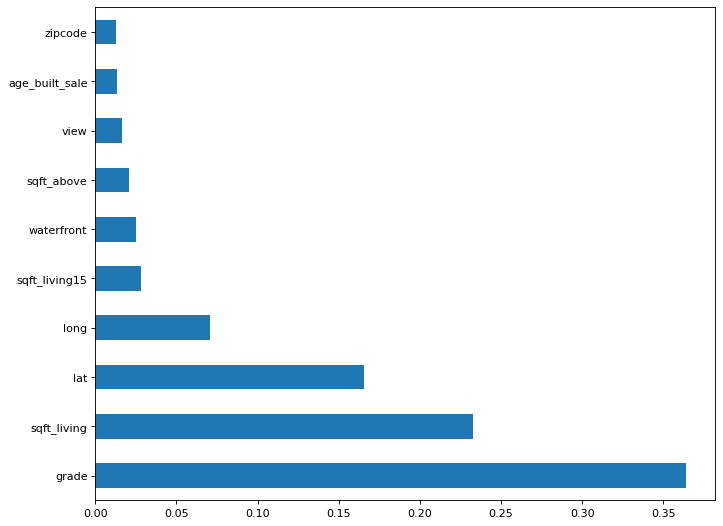

In [305]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(tuned_rfr.feature_importances_, index= X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')

<AxesSubplot: >

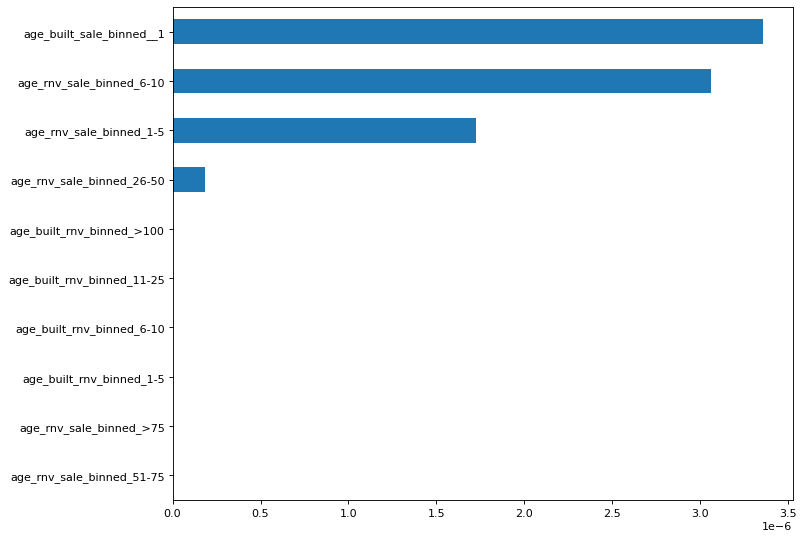

In [306]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(tuned_rfr.feature_importances_, index= X_train.columns)

feat_importances.nsmallest(10).plot(kind='barh')

In [323]:
feat_importances.nsmallest(10)

age_rnv_sale_binned_51-75     0.000000e+00
age_rnv_sale_binned_>75       0.000000e+00
age_built_rnv_binned_1-5      0.000000e+00
age_built_rnv_binned_6-10     0.000000e+00
age_built_rnv_binned_11-25    0.000000e+00
age_built_rnv_binned_>100     0.000000e+00
age_rnv_sale_binned_26-50     1.861433e-07
age_rnv_sale_binned_1-5       1.723956e-06
age_rnv_sale_binned_6-10      3.058811e-06
age_built_sale_binned__1      3.355524e-06
dtype: float64

In [316]:
drop_col = ['age_rnv_sale_binned_51-75',
            'age_rnv_sale_binned_>75', 
            'age_built_rnv_binned_1-5',   
            'age_built_rnv_binned_6-10',  
            'age_built_rnv_binned_11-25',  
            'age_built_rnv_binned_>100',   
            'age_rnv_sale_binned_26-50',   
            'age_rnv_sale_binned_1-5',    
            'age_rnv_sale_binned_6-10',
            'age_built_sale_binned__1']

In [318]:
X_train_fi = X_train.drop(drop_col, axis = 1)
X_test_fi = X_test.drop(drop_col, axis = 1)

In [319]:
tuned_rfr.fit(X_train_fi, y_train)

pred = tuned_rfr.predict(X_test_fi)

rmsesm = np.sqrt(metrics.mean_squared_error(y_test, pred)).round(3)
rtrsm = tuned_rfr.score(X_train_fi, y_train).round(3)
rtesm = r2_score(y_test, pred).round(3)

In [320]:
print(rmsesm, rtrsm, rtesm)

147406.988 0.945 0.859


In [324]:
evaluation_random_forest.to_csv('evaluation_random_forest.csv')

# Support Vector Regression

In [62]:
evaluation_svr = base_evaluation_table.copy()

In [ ]:
C = [10, 100, 1000]

for c in C:
    lsvr = LinearSVR(C = c)
    
    detail = f"C = {c}"
    
    evaluate_all(lsvr, detail, X_train, X_test, y_train, y_test, evaluation_svr)
    
evaluation_svr = evaluation_svr.sort_values(by = 'RMSE')
evaluation_svr

In [ ]:
evaluation_svr.to_csv('evaluation_svr.csv')

# Ada Boost Regressor

In [238]:
evaluation_ada = base_evaluation_table.copy()

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [239]:
n_estimators = 500
learning_rate = 1


ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=n_estimators, 
                        learning_rate=learning_rate,loss='exponential', random_state=12)

detail = "n_estimators={}, learning_rate={}".format(n_estimators, learning_rate)

evaluate_all(ada, detail, X_train, X_test, y_train, y_test, evaluation_ada)

In [240]:
evaluation_ada = evaluation_ada.sort_values(by = 'RMSE')
evaluation_ada

Model                            Details          Scaler  \
41  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
43  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
42  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
1   AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
3   AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
4   AdaBoostRegressor  n_estimators=500, learning_rate=1               -   
0   AdaBoostRegressor  n_estimators=500, learning_rate=1               -   
2   AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
44  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
46  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
45  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
39  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
40  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
38  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
37  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
35  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
36  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
29  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
33  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
32  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
31  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
34  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
30  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
26  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
23  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
25  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
28  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
27  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
12  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
24  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
15  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
17  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
8   AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
11  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
18  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
16  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
19  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
10  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
5   AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
6   AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
14  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
13  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
9   AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
7   AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   
20  AdaBoostRegressor  n_estimators=500, learning_rate=1  StandardScaler   
21  AdaBoostRegressor  n_estimators=500, learning_rate=1    MinMaxScaler   
22  AdaBoostRegressor  n_estimators=500, learning_rate=1    RobustScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
41  UFS (f-regression)            40  137129.960                 0.968   
43  UFS (f-regression)            40  138630.670                 0.968   
42  UFS (f-regression)            40  138890.020                 0.969   
1                    -            48  138998.508                 0.970 

In [241]:
#Tunning parameters for Adaboost with GridSearchCV

parameters = {'n_estimators': [100,300,500],
              'learning_rate' : [0.1,0.2,0.5,1,1.5]}

tuning_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), random_state=12), param_grid=parameters,
                                          scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_ada.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=-15839106772.348 total time=  19.6s
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=-27886773907.346 total time=  19.4s
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=-14880444850.196 total time=  19.4s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=-15854235199.299 total time=  19.5s
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=-14800201875.337 total time=  19.3s
[CV 1/5] END learning_rate=0.1, n_estimators=300;, score=-15251021827.880 total time=  55.8s
[CV 2/5] END learning_rate=0.1, n_estimators=300;, score=-27871741692.944 total time=  55.6s
[CV 3/5] END learning_rate=0.1, n_estimators=300;, score=-15302321322.868 total time=  55.5s
[CV 4/5] END learning_rate=0.1, n_estimators=300;, score=-15242954991.293 total time=  55.7s
[CV 5/5] END learning_rate=0.1, n_estimators=300;, score=-14459931250.015 total time=  55.6s
[CV 1/5] 

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                         random_state=12),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1, 1.5],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [242]:
tuning_ada.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

In [243]:
n_estimators = 500
learning_rate = 0.2


tuned_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=n_estimators, 
                              learning_rate=learning_rate,loss='exponential', random_state=12)

detail = "n_estimators={}, learning_rate={}".format(n_estimators, learning_rate)

evaluate_all(tuned_ada, detail, X_train, X_test, y_train, y_test, evaluation_ada)

In [244]:
evaluation_ada = evaluation_ada.sort_values(by = 'RMSE')
evaluation_ada.head(50)

Model                              Details          Scaler  \
89  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
47  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
88  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
49  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
90  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
48  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
50  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
51  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
41  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
43  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
42  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
1   AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
4   AdaBoostRegressor    n_estimators=500, learning_rate=1               -   
3   AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
0   AdaBoostRegressor    n_estimators=500, learning_rate=1               -   
2   AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
44  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
92  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
91  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
46  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
45  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
93  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
87  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
39  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
40  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
38  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
85  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
82  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
86  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
83  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
37  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
35  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
36  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
84  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
78  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
77  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
76  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
80  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
81  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    RobustScaler   
79  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
29  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
33  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
32  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
31  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
34  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   
30  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
70  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
71  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
73  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
26  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   

     Feature selection  No. features 

**Test feature selection by RFECV with tuned AdaBoost model**

In [245]:
rfecv_ada = RFECV(estimator=tuned_ada, step=1, cv=5)

rfecv_ada = rfecv_ada.fit(X_train, y_train)

In [248]:
X_train_rfecv_ada = rfecv_ada.transform(X_train)
X_test_rfecv_ada = rfecv_ada.transform(X_test)

In [249]:
rfe_best_features(rfecv_ada)

Optimal number of feature: 41
Best features: 
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_yr', 'age_built_sale',
       'age_rnv_sale', 'age_built_rnv', 'age_built_sale_binned_<1',
       'age_built_sale_binned_1-5', 'age_built_sale_binned_6-10',
       'age_built_sale_binned_11-25', 'age_built_sale_binned_26-50',
       'age_built_sale_binned_51-75', 'age_built_sale_binned_76-100',
       'age_rnv_sale_binned_<1', 'age_rnv_sale_binned_1-5',
       'age_rnv_sale_binned_6-10', 'age_rnv_sale_binned_11-25',
       'age_rnv_sale_binned_26-50', 'age_built_rnv_binned_<1',
       'age_built_rnv_binned_26-50', 'age_built_rnv_binned_51-75',
       'age_built_rnv_binned_>100', 'year', 'month', 'day'],
      dtype='object')

Feature ranking:
bedrooms                        1
bathrooms   

In [250]:
X_train_rfecv_ada.shape

(17290, 41)

In [253]:
tuned_rfe_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=n_estimators,
                              learning_rate=learning_rate,loss='exponential', random_state=12)

In [146]:
def evaluate_rfecv(model, details, X_train_rfecv, X_test_rfecv, y_train, y_test, evaluation_table):
    rmsesm_rfe, rtrsm_rfe, rtesm_rfe = model_score(model, X_train_rfecv, X_test_rfecv, y_train, y_test)

    evaluation_table.loc[evaluation_table.shape[0]] = [model.__class__.__name__, details,
                                                                '-', 'RFECV',
                                                                X_train_rfecv.shape[1], rmsesm_rfe, rtrsm_rfe, rtesm_rfe]

In [255]:
evaluate_rfecv(tuned_rfe_ada, detail, X_train_rfecv_ada, X_test_rfecv_ada, y_train, y_test, evaluation_ada)
evaluation_ada = evaluation_ada.sort_values(by = 'RMSE')

In [256]:
evaluation_ada.to_csv('evaluation_ada.csv')
evaluation_ada

Model                              Details          Scaler  \
89  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
47  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
94  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
88  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
49  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
..                ...                                  ...             ...   
20  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
55  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
21  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
56  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
22  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
89  UFS (f-regression)            40  133571.629                 0.971   
47                   -            48  133650.629                 0.973   
94               RFECV            41  134611.613                 0.973   
88  UFS (f-regression)            40  136655.144                 0.972   
49                   -            48  136760.923                 0.972   
..                 ...           ...         ...                   ...   
20  Variance threshold            16  186638.166                 0.932   
55  Variance threshold            27  186773.639                 0.938   
21  Variance threshold            16  187082.739                 0.931   
56  Variance threshold            27  188205.568                 0.937   
22  Variance threshold            16  188601.394                 0.932   

    R-squared (test)  
89             0.884  
47             0.884  
94             0.882  
88             0.878  
49             0.878  
..               ...  
20             0.773  
55             0.773  
21             0.772  
56             0.769  
22             0.769  

[95 rows x 8 columns]

In [258]:
evaluation_ada

Model                              Details          Scaler  \
89  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
47  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
94  AdaBoostRegressor  n_estimators=500, learning_rate=0.2               -   
88  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
49  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
..                ...                                  ...             ...   
20  AdaBoostRegressor    n_estimators=500, learning_rate=1  StandardScaler   
55  AdaBoostRegressor  n_estimators=500, learning_rate=0.2  StandardScaler   
21  AdaBoostRegressor    n_estimators=500, learning_rate=1    MinMaxScaler   
56  AdaBoostRegressor  n_estimators=500, learning_rate=0.2    MinMaxScaler   
22  AdaBoostRegressor    n_estimators=500, learning_rate=1    RobustScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
89  UFS (f-regression)            40  133571.629                 0.971   
47                   -            48  133650.629                 0.973   
94               RFECV            41  134611.613                 0.973   
88  UFS (f-regression)            40  136655.144                 0.972   
49                   -            48  136760.923                 0.972   
..                 ...           ...         ...                   ...   
20  Variance threshold            16  186638.166                 0.932   
55  Variance threshold            27  186773.639                 0.938   
21  Variance threshold            16  187082.739                 0.931   
56  Variance threshold            27  188205.568                 0.937   
22  Variance threshold            16  188601.394                 0.932   

    R-squared (test)  
89             0.884  
47             0.884  
94             0.882  
88             0.878  
49             0.878  
..               ...  
20             0.773  
55             0.773  
21             0.772  
56             0.769  
22             0.769  

[95 rows x 8 columns]

# Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

In [88]:
evaluation_grad = base_evaluation_table.copy()

In [267]:
n_estimators = 500
learning_rate = 0.2
max_depth = 2
min_samples_split = 2

grad = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, 
                                 max_depth=max_depth, min_samples_split=min_samples_split, random_state=12, verbose=1)

detail = "n_estimators={}, learning_rate={}, max_depth={}, min_samples_split={}".format(n_estimators, learning_rate, 
                                                                                        max_depth, min_samples_split)

evaluate_all(grad, detail, X_train, X_test, y_train, y_test, evaluation_grad)

      Iter       Train Loss   Remaining Time 
         1 106350915421.8993           22.77s
         2 89984893191.2523           21.07s
         3 77533010367.4852           20.48s
         4 68068709161.6476           20.17s
         5 61310892828.9341           19.86s
         6 56071539101.1172           19.73s
         7 51835496494.2240           19.62s
         8 47558067579.1996           19.17s
         9 44336018207.2108           18.64s
        10 41329318455.0086           18.16s
        20 28261829366.9615           15.93s
        30 22637434183.4817           14.99s
        40 20033276868.0975           14.37s
        50 18397313291.9505           13.88s
        60 17525979827.1751           13.45s
        70 16683201747.8089           13.07s
        80 16027182698.9013           12.71s
        90 15520025384.0959           12.36s
       100 15007487381.0770           12.03s
       200 12338048818.9658            9.09s
       300 10894227772.7444            6.03s
       4

        50 28384906368.1462           11.36s
        60 26106394135.9740           10.95s
        70 24910176869.8304           10.58s
        80 23676004141.9364           10.26s
        90 22382861801.4636            9.95s
       100 21606239775.9476            9.66s
       200 17036956513.0254            7.06s
       300 14800075544.7530            4.67s
       400 13418391573.9161            2.32s
       500 12343122960.7960            0.00s
      Iter       Train Loss   Remaining Time 
         1 107742278969.5311           10.98s
         2 92086940788.2810           11.20s
         3 80780320573.9698           11.27s
         4 72793686662.6297           11.16s
         5 66827130422.4629           11.19s
         6 62359261469.3944           11.11s
         7 58938094383.8832           11.13s
         8 56267300157.1349           11.07s
         9 54076599499.1133           11.02s
        10 52154084978.1253           11.02s
        20 40346950050.3208           10.78s
        

         6 62359261469.3944           10.37s
         7 58938094383.8832           10.35s
         8 56267300157.1348           10.33s
         9 54076599499.1132           10.31s
        10 52154084978.1253           10.34s
        20 40346950050.3208           10.03s
        30 34048607420.1809            9.84s
        40 30815598221.1258            9.61s
        50 28285757945.6233            9.40s
        60 25706500595.6783            9.19s
        70 24708271997.9141            9.34s
        80 23383061781.2718            9.12s
        90 22591390216.2328            8.87s
       100 21809145400.6279            8.62s
       200 17097748587.3376            6.46s
       300 14685869230.6551            4.28s
       400 13298896110.2917            2.13s
       500 12321696051.5216            0.00s
      Iter       Train Loss   Remaining Time 
         1 107742278969.5311            9.98s
         2 92086940788.2808           10.21s
         3 80780320573.9698           10.27s
        

       200 20274922056.0862            5.93s
       300 18001102522.6221            3.95s
       400 16375842471.2346            1.99s
       500 15172743954.2763            0.00s
      Iter       Train Loss   Remaining Time 
         1 106350915421.8993            7.48s
         2 89984893191.2523            7.47s
         3 77855874233.3653            7.45s
         4 68867004171.5093            7.32s
         5 62132404150.6604            7.03s
         6 56903184121.1882            6.83s
         7 52694665911.4010            6.69s
         8 49053037045.5530            6.52s
         9 46322919133.7948            6.44s
        10 43870454817.2486            6.32s
        20 31469416049.5939            5.88s
        30 26769433666.8664            5.66s
        40 25146574548.3002            5.49s
        50 24255713558.1497            5.32s
        60 23469944396.2339            5.17s
        70 22820417352.3273            5.04s
        80 22402033899.4845            4.91s
        

        20 31396964340.9359           10.06s
        30 26533339363.9095            9.54s
        40 24598318382.4009            9.44s
        50 23486387269.2168            9.20s
        60 22671120553.7361            8.88s
        70 21958691952.3902            8.59s
        80 21406111376.5751            8.33s
        90 20981655907.6156            8.24s
       100 20570094486.5223            8.04s
       200 18042378673.7565            5.82s
       300 16389316136.6170            3.84s
       400 15266946268.1767            1.91s
       500 14386515657.1237            0.00s
      Iter       Train Loss   Remaining Time 
         1 106350915421.8993            8.98s
         2 89984893191.2523            9.46s
         3 77855874233.3651            9.44s
         4 68867004171.5092            9.30s
         5 62132404150.6604            9.31s
         6 56903184121.1881            9.30s
         7 52694665911.4009            9.30s
         8 49053037045.5530            9.29s
        

         4 68867004171.5093           12.15s
         5 62132404150.6604           12.18s
         6 56903184121.1882           12.10s
         7 52694665911.4010           12.11s
         8 49053037045.5531           12.12s
         9 46322919133.7949           12.06s
        10 43870454817.2487           12.00s
        20 30095045247.7011           11.76s
        30 24487751292.8913           11.51s
        40 22002783567.0246           11.27s
        50 19868012467.6094           11.02s
        60 18519236190.4924           10.77s
        70 17623959245.4366           10.52s
        80 17112178917.3490           10.27s
        90 16536933484.4639           10.03s
       100 16029838101.4738            9.79s
       200 13036560886.6725            7.33s
       300 11644834270.6327            4.93s
       400 10622333424.6160            2.49s
       500  9892204910.2791            0.00s
      Iter       Train Loss   Remaining Time 
         1 106350915421.8993           11.98s
        

        90 15559687324.6078           10.99s
       100 14978398440.8594           10.69s
       200 12296597152.6954            7.97s
       300 10974353988.9232            5.33s
       400 10042392286.3760            2.66s
       500  9383392232.6724            0.00s
      Iter       Train Loss   Remaining Time 
         1 106350915421.8993           12.97s
         2 89984893191.2524           12.95s
         3 77533010367.4853           12.92s
         4 68068709161.6477           12.90s
         5 61310892828.9340           12.97s
         6 56071539101.1172           12.93s
         7 51835496494.2239           12.89s
         8 47558067579.1995           12.85s
         9 44336018207.2107           12.82s
        10 41329318455.0085           12.74s
        20 28095402644.2765           13.83s
        30 22507338230.7951           13.25s
        40 19876036716.4561           12.72s
        50 18520275652.1767           12.28s
        60 17523430173.3741           11.92s
        

In [268]:
evaluation_grad = evaluation_grad.sort_values(by='RMSE', ignore_index=True)
evaluation_grad

Model  \
0   GradientBoostingRegressor   
1   GradientBoostingRegressor   
2   GradientBoostingRegressor   
3   GradientBoostingRegressor   
4   GradientBoostingRegressor   
5   GradientBoostingRegressor   
6   GradientBoostingRegressor   
7   GradientBoostingRegressor   
8   GradientBoostingRegressor   
9   GradientBoostingRegressor   
10  GradientBoostingRegressor   
11  GradientBoostingRegressor   
12  GradientBoostingRegressor   
13  GradientBoostingRegressor   
14  GradientBoostingRegressor   
15  GradientBoostingRegressor   
16  GradientBoostingRegressor   
17  GradientBoostingRegressor   
18  GradientBoostingRegressor   
19  GradientBoostingRegressor   
20  GradientBoostingRegressor   
21  GradientBoostingRegressor   
22  GradientBoostingRegressor   
23  GradientBoostingRegressor   
24  GradientBoostingRegressor   
25  GradientBoostingRegressor   
26  GradientBoostingRegressor   
27  GradientBoostingRegressor   
28  GradientBoostingRegressor   
29  GradientBoostingRegressor   
30  GradientBoostingRegressor   
31  GradientBoostingRegressor   
32  GradientBoostingRegressor   
33  GradientBoostingRegressor   
34  GradientBoostingRegressor   
35  GradientBoostingRegressor   
36  GradientBoostingRegressor   
37  GradientBoostingRegressor   
38  GradientBoostingRegressor   
39  GradientBoostingRegressor   
40  GradientBoostingRegressor   
41  GradientBoostingRegressor   
42  GradientBoostingRegressor   
43  GradientBoostingRegressor   
44  GradientBoostingRegressor   
45  GradientBoostingRegressor   
46  GradientBoostingRegressor   

                                              Details          Scaler  \
0   n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
1   n_estimators=500, learning_rate=0.2, max_depth...               -   
2   n_estimators=500, learning_rate=0.2, max_depth...               -   
3   n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
4   n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
5   n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
6   n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
7   n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
8   n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
9   n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
10  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
11  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
12  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
13  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
14  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
15  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
16  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
17  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
18  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
19  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
20  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
21  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
22  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
23  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
24  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
25  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
26  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
27  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
28  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
29  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
30  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
31  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
32  n_estimators=500, learning

**Tuning parameters by GridSearch**

In [275]:
parameters = {'n_estimators': [100,300,500],
              'learning_rate' : [0.1,0.2,0.5,1],
              'max_depth': [1,2,3],
              'min_samples_split': [2,3]}

tuning_grad = GridSearchCV(grad, param_grid=parameters, scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_grad.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
      Iter       Train Loss   Remaining Time 
         1 125914385574.0831            1.58s
         2 118655601566.6813            1.57s
         3 112356905768.6654            1.55s
         4 107013735281.1902            1.54s
         5 102235513181.2829            1.52s
         6 97893075710.0159            1.50s
         7 94291976442.0929            1.49s
         8 90958828670.0060            1.48s
         9 87755271457.2255            1.46s
        10 84823923433.2936            1.45s
        20 65189508196.1208            1.32s
        30 54078688484.4755            1.11s
        40 47206152314.3596            0.98s
        50 42753969284.1184            0.80s
        60 39691178735.1976            0.63s
        70 37389151028.4186            0.46s
        80 35612614028.4239            0.30s
        90 34198742494.2391            0.15s
       100 33036990724.4700            0.00s
[CV 1/5] END learning_rate=0.1, 

        80 36053358187.7069            2.70s
        90 34701774283.9446            2.58s
       100 33577120542.6491            2.46s
       200 27873040879.8696            1.22s
       300 25626301465.6356            0.00s
[CV 3/5] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=300;, score=-23518120815.739 total time=   3.7s
      Iter       Train Loss   Remaining Time 
         1 124637717817.6407            4.78s
         2 117593239148.8040            4.77s
         3 111408438072.6411            4.75s
         4 106117156784.3291            4.74s
         5 101346742403.4300            4.66s
         6 97109192787.0218            4.66s
         7 93555779087.1776            4.65s
         8 90187559570.6449            4.67s
         9 87047943869.2235            4.66s
        10 84226454409.0032            4.64s
        20 64735014613.1444            4.19s
        30 53719547677.2818            3.79s
        40 46876980409.4544            3.66s
        50 4

        80 36142370517.5378            5.16s
        90 34722627792.0745            5.04s
       100 33555673624.2622            4.92s
       200 27801476485.9783            3.67s
       300 25543110644.9042            2.50s
       400 24276630102.1737            1.25s
       500 23447711726.2033            0.00s
[CV 5/5] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=500;, score=-20594503990.626 total time=   6.2s
      Iter       Train Loss   Remaining Time 
         1 125914385574.0831            1.19s
         2 118655601566.6813            1.22s
         3 112356905768.6654            1.20s
         4 107013735281.1902            1.18s
         5 102235513181.2829            1.16s
         6 97893075710.0159            1.16s
         7 94291976442.0929            1.14s
         8 90958828670.0060            1.13s
         9 87755271457.2255            1.12s
        10 84823923433.2936            1.11s
        20 65189508196.1208            0.99s
        30 5

        20 63629192428.8595            3.46s
        30 53226230561.6197            3.33s
        40 46797609405.2138            3.20s
        50 42723906732.0770            3.08s
        60 39887383257.6146            2.95s
        70 37731801450.2100            2.83s
        80 36053358187.7069            2.71s
        90 34701774283.9446            2.58s
       100 33577120542.6491            2.46s
       200 27873040879.8696            1.23s
       300 25626301465.6356            0.00s
[CV 3/5] END learning_rate=0.1, max_depth=1, min_samples_split=3, n_estimators=300;, score=-23518120815.739 total time=   3.6s
      Iter       Train Loss   Remaining Time 
         1 124637717817.6407            3.59s
         2 117593239148.8040            3.58s
         3 111408438072.6411            3.56s
         4 106117156784.3291            3.63s
         5 101346742403.4300            3.60s
         6 97109192787.0218            3.58s
         7 93555779087.1776            3.56s
         8 9

        20 65307356061.1039            5.90s
        30 54391538781.2701            5.77s
        40 47624426884.6896            5.65s
        50 43177395793.7554            5.53s
        60 40177708055.6557            5.40s
        70 37900962568.7033            5.28s
        80 36142370517.5378            5.15s
        90 34722627792.0745            5.03s
       100 33555673624.2622            4.91s
       200 27801476485.9783            3.67s
       300 25543110644.9042            2.44s
       400 24276630102.1737            1.23s
       500 23447711726.2033            0.00s
[CV 5/5] END learning_rate=0.1, max_depth=1, min_samples_split=3, n_estimators=500;, score=-20594503990.626 total time=   6.2s
      Iter       Train Loss   Remaining Time 
         1 121227077896.1312            2.38s
         2 110908174681.7009            2.40s
         3 101927114648.2805            2.36s
         4 93948702048.4420            2.33s
         5 87214753821.7429            2.30s
         6 817

         7 74583497379.7879            6.95s
         8 70369461119.3093            6.97s
         9 66352822060.2980            6.92s
        10 62890484544.6310            6.90s
        20 42547475064.3513            6.65s
        30 33554276796.6973            6.41s
        40 28225063745.9426            6.17s
        50 24587835225.1377            5.93s
        60 22644002474.6246            5.87s
        70 20760851782.6742            5.65s
        80 19677298561.7320            5.44s
        90 18829340152.0987            5.21s
       100 18317069629.1754            4.95s
       200 14935966985.7896            2.42s
       300 13392587130.4179            0.00s
[CV 3/5] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=300;, score=-15085029892.291 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 120085457524.2357            6.88s
         2 109861778378.8819            7.00s
         3 100993070869.2054            6.93s
         4 935

        20 43261503280.7707           11.40s
        30 34155807513.5060           11.14s
        40 28656350104.2410           10.90s
        50 25311646839.1264           10.67s
        60 22862442172.3530           10.44s
        70 21205854075.4702           10.20s
        80 19968847219.0335            9.96s
        90 19145499566.9907            9.72s
       100 18422237656.7650            9.48s
       200 14898943660.9693            7.09s
       300 13439218965.8227            4.75s
       400 12168473286.4636            2.38s
       500 11340474201.1738            0.00s
[CV 5/5] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=500;, score=-13498117520.695 total time=  11.9s
      Iter       Train Loss   Remaining Time 
         1 121227077896.1312            2.38s
         2 110908174681.7009            2.30s
         3 101927114648.2805            2.30s
         4 93948702048.4420            2.28s
         5 87214753821.7429            2.26s
         6 817

         7 74583497379.7879            6.95s
         8 70369461119.3093            6.93s
         9 66352822060.2980            6.92s
        10 62890484544.6310            6.90s
        20 42547475064.3513            6.65s
        30 33554276796.6973            6.41s
        40 28225063745.9426            6.17s
        50 24587835225.1377            5.94s
        60 22644002474.6246            5.70s
        70 20760851782.6742            5.46s
        80 19677298561.7320            5.22s
        90 18829340152.0987            4.98s
       100 18317069629.1754            4.75s
       200 14935966985.7896            2.37s
       300 13392587130.4179            0.00s
[CV 3/5] END learning_rate=0.1, max_depth=2, min_samples_split=3, n_estimators=300;, score=-15085029892.291 total time=   7.1s
      Iter       Train Loss   Remaining Time 
         1 120085457524.2357            7.18s
         2 109861778378.8819            7.15s
         3 100993070869.2054            7.03s
         4 935

         7 76805713285.8183           11.69s
         8 72053434424.6203           11.69s
         9 67978302376.8324           11.68s
        10 64767288475.0914           11.61s
        20 43261503280.7707           11.38s
        30 34155807513.5060           11.14s
        40 28656350104.2410           10.90s
        50 25311646839.1264           10.67s
        60 22862442172.3530           10.43s
        70 21205854075.4702           10.34s
        80 19968847219.0335           10.07s
        90 19145499566.9907            9.82s
       100 18422237656.7650            9.57s
       200 14898943660.9693            7.24s
       300 13439218965.8227            4.82s
       400 12168473286.4636            2.40s
       500 11347507227.6483            0.00s
[CV 5/5] END learning_rate=0.1, max_depth=2, min_samples_split=3, n_estimators=500;, score=-13476886674.466 total time=  11.9s
      Iter       Train Loss   Remaining Time 
         1 118654460966.6449            3.56s
         2 10546

         4 83088542204.3723           10.51s
         5 75369155846.3223           10.50s
         6 68626739526.9779           10.44s
         7 63024868603.8046           10.38s
         8 58088212433.8713           10.37s
         9 53924559854.7466           10.31s
        10 50184505490.3282           10.30s
        20 30461227564.0748           10.23s
        30 22788132119.6484            9.82s
        40 18645446223.7289            9.37s
        50 16591376215.2870            8.96s
        60 15330740332.4288            8.58s
        70 14395991120.7397            8.20s
        80 13667370185.5369            7.83s
        90 13109940199.0226            7.46s
       100 12643341435.7077            7.10s
       200 10110547649.6265            3.54s
       300  8719219760.4357            0.00s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300;, score=-13657306001.473 total time=  10.6s
      Iter       Train Loss   Remaining Time 
         1 117479

         4 85019505543.4966           17.61s
         5 77073825630.4989           17.52s
         6 70129046171.7110           17.54s
         7 64317058668.5552           17.40s
         8 59329119027.5051           17.40s
         9 54988961437.7094           17.35s
        10 51032776820.1603           17.30s
        20 30745927618.6410           16.90s
        30 23094297111.5211           17.75s
        40 19146429109.7062           17.45s
        50 16789907785.1166           16.82s
        60 15320390167.8984           16.28s
        70 14471281956.4731           15.79s
        80 13768676196.0436           15.34s
        90 13239634797.5366           14.91s
       100 12778111559.1187           14.50s
       200 10038097600.3537           10.71s
       300  8496372549.3875            7.15s
       400  7581430982.9608            3.58s
       500  6814827641.1215            0.00s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500;, score=-12266253

       200  9381481648.5293            3.54s
       300  7951223454.1471            0.00s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_split=3, n_estimators=300;, score=-23698217159.920 total time=  10.7s
      Iter       Train Loss   Remaining Time 
         1 116215064661.9099           10.46s
         2 103130842572.1643           10.43s
         3 92264870505.6888           10.49s
         4 83088542204.3723           10.51s
         5 75369155846.3223           10.50s
         6 68626739526.9779           10.49s
         7 63024868603.8046           10.42s
         8 58088212433.8713           10.37s
         9 53924559854.7466           10.31s
        10 50184505490.3282           10.27s
        20 30461227564.0748            9.88s
        30 22788132119.6484            9.51s
        40 18645446223.7289            9.15s
        50 16591376215.2870            8.79s
        60 15330740332.4288            8.44s
        70 14395991120.7397            8.09s
        80 1368

       400  7498261005.4346            3.54s
       500  6800960371.2099            0.00s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_split=3, n_estimators=500;, score=-13539458557.513 total time=  17.7s
      Iter       Train Loss   Remaining Time 
         1 119030989789.7361           17.47s
         2 105485762490.1163           17.68s
         3 94295067210.2192           17.56s
         4 85019505543.4966           17.48s
         5 77073825630.4989           17.52s
         6 70129046171.7110           17.54s
         7 64317058668.5552           17.40s
         8 59329119027.5051           17.40s
         9 54988961437.7094           17.35s
        10 51032776820.1603           17.30s
        20 30745927618.6410           18.82s
        30 23094297111.5211           17.84s
        40 19146429109.7062           17.14s
        50 16789907785.1166           16.58s
        60 15320390167.8984           16.08s
        70 14471281956.4731           15.63s
        80 1376

        20 40697772522.2845            3.44s
        30 34493789324.4674            3.32s
        40 30999135745.6530            3.19s
        50 28789552145.0465            3.07s
        60 27212021990.2391            2.95s
        70 26046389008.1471            2.83s
        80 25152997602.8591            2.70s
        90 24465883921.7175            2.58s
       100 23871812737.4201            2.45s
       200 20910296282.5408            1.22s
       300 19660776079.5669            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=1, min_samples_split=2, n_estimators=300;, score=-45252388829.050 total time=   3.7s
      Iter       Train Loss   Remaining Time 
         1 115919924199.2112            3.59s
         2 104085249183.0904            3.72s
         3 94958861840.8949            3.66s
         4 88206113068.1008            3.70s
         5 82079191027.0191            3.66s
         6 76777192902.7811            3.68s
         7 72614241900.5856            3.64s
         8 6894

        40 35109550863.9487            5.62s
        50 32704125757.6438            5.51s
        60 30937359780.8960            5.55s
        70 29664644434.6350            5.50s
        80 28676456515.9041            5.35s
        90 27927768222.1473            5.22s
       100 27300130039.6984            5.08s
       200 23854785422.8732            3.74s
       300 22334395790.7627            2.57s
       400 21393569185.6626            1.30s
       500 20731533050.5616            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=1, min_samples_split=2, n_estimators=500;, score=-23499551788.300 total time=   6.4s
      Iter       Train Loss   Remaining Time 
         1 118988793635.8003            6.49s
         2 106665538722.2186            6.23s
         3 97383891512.8748            6.30s
         4 90519385438.6953            6.32s
         5 84236011968.1486            6.34s
         6 78655900041.0001            6.34s
         7 74521893882.1503            6.34s
         8 7077

        20 40697772522.2845            3.44s
        30 34493789324.4674            3.32s
        40 30999135745.6530            3.19s
        50 28789552145.0465            3.07s
        60 27212021990.2391            2.94s
        70 26046389008.1471            2.82s
        80 25152997602.8591            2.83s
        90 24465883921.7175            2.73s
       100 23871812737.4201            2.58s
       200 20910296282.5408            1.25s
       300 19660776079.5669            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=1, min_samples_split=3, n_estimators=300;, score=-45252388829.050 total time=   3.7s
      Iter       Train Loss   Remaining Time 
         1 115919924199.2112            3.59s
         2 104085249183.0904            3.58s
         3 94958861840.8949            3.56s
         4 88206113068.1008            3.63s
         5 82079191027.0191            3.60s
         6 76777192902.7811            3.58s
         7 72614241900.5856            3.60s
         8 6894

        40 35109550863.9487            5.81s
        50 32704125757.6438            5.77s
        60 30937359780.8960            5.62s
        70 29664644434.6350            5.47s
        80 28676456515.9041            5.32s
        90 27927768222.1473            5.18s
       100 27300130039.6984            5.04s
       200 23854785422.8732            3.72s
       300 22334395790.7627            2.51s
       400 21393569185.6626            1.25s
       500 20731533050.5616            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=1, min_samples_split=3, n_estimators=500;, score=-23499551788.300 total time=   6.3s
      Iter       Train Loss   Remaining Time 
         1 118988793635.8003            5.99s
         2 106665538722.2186            6.22s
         3 97383891512.8748            6.13s
         4 90519385438.6953            6.20s
         5 84236011968.1486            6.14s
         6 78655900041.0001            6.18s
         7 74521893882.1503            6.13s
         8 7077

         6 50983350541.3844            7.01s
         7 47153148579.6776            6.99s
         8 43931619980.1763            6.93s
         9 41092340467.6656            6.92s
        10 38848107236.1097            6.90s
        20 25456702003.8762            7.32s
        30 20661526125.4201            6.88s
        40 18278301557.2822            6.51s
        50 17175506188.9795            6.20s
        60 16084591101.2666            5.91s
        70 15389215303.5494            5.63s
        80 14798877070.1731            5.36s
        90 14321410699.8963            5.10s
       100 13803630153.4920            4.93s
       200 11354321117.3477            2.42s
       300  9874470263.4860            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=2, min_samples_split=2, n_estimators=300;, score=-27584302902.422 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 107402909865.9095            7.18s
         2 90767215465.4633            7.15s
         3 77779

        20 28333359298.5030           11.76s
        30 22958165764.9062           11.37s
        40 20321859693.2488           11.06s
        50 18906179298.2419           11.03s
        60 17890969424.6286           10.72s
        70 17018441146.4120           10.44s
        80 16371419944.1505           10.16s
        90 15841198646.1794            9.89s
       100 15351415774.8653            9.62s
       200 12298188395.9629            7.14s
       300 10551084330.6494            4.76s
       400  9484895271.4718            2.39s
       500  8759456428.2350            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=2, min_samples_split=2, n_estimators=500;, score=-16690243528.835 total time=  12.0s
      Iter       Train Loss   Remaining Time 
         1 110085643302.4933           11.98s
         2 93062804495.5399           11.95s
         3 80092889092.7259           11.93s
         4 70156574657.1338           11.90s
         5 63058412129.3784           11.98s
         6 57703

         7 47153148579.6776            6.95s
         8 43931619980.1763            6.93s
         9 41092340467.6656            6.92s
        10 38848107236.1097            6.87s
        20 25456702003.8762            6.65s
        30 20661526125.4201            6.41s
        40 18278301557.2822            6.16s
        50 17175506188.9795            5.93s
        60 16084591101.2666            5.69s
        70 15389215303.5494            5.45s
        80 14798877070.1731            5.21s
        90 14321410699.8963            5.06s
       100 13803630153.4920            4.85s
       200 11354321117.3477            2.40s
       300  9876913976.0433            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300;, score=-27760048864.715 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 107402909865.9095            6.88s
         2 90767215465.4633            7.00s
         3 77779385291.8067            7.03s
         4 68466

        20 28333359298.5030           11.45s
        30 22958165764.9062           11.17s
        40 20321859693.2488           10.91s
        50 18906179298.2419           10.67s
        60 17890969424.6286           10.43s
        70 17018441146.4120           10.18s
        80 16371419944.1505            9.94s
        90 15841198646.1794            9.70s
       100 15351415774.8653            9.46s
       200 12244011696.7384            7.08s
       300 10475122605.2750            4.76s
       400  9433863262.6269            2.39s
       500  8776242345.4591            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=500;, score=-16674120964.710 total time=  11.9s
      Iter       Train Loss   Remaining Time 
         1 110085643302.4933           11.98s
         2 93062804495.5399           11.95s
         3 80092889092.7259           11.76s
         4 70156574657.1338           11.78s
         5 63058412129.3784           11.78s
         6 57703

         3 60782889153.3098           14.06s
         4 51364074743.2484           13.99s
         5 44328970037.9916           13.33s
         6 39144607872.7301           12.84s
         7 35296048577.2868           12.47s
         8 31871911493.6346           12.19s
         9 29541791910.5385           11.96s
        10 26943554582.3387           11.77s
        20 17575735960.0858           10.61s
        30 14130686717.8248            9.99s
        40 12708698116.6241            9.49s
        50 11853444082.1546            9.06s
        60 11191470322.3845            8.65s
        70 10629300770.3245            8.25s
        80 10084697778.6927            7.87s
        90  9677592361.4578            7.50s
       100  9347357660.1626            7.13s
       200  7257119988.4345            3.53s
       300  6010922086.7959            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=300;, score=-21968226334.368 total time=  10.6s
      Iter       T

         9 31994944695.5735           18.11s
        10 29765565928.1554           18.03s
        20 19131619565.4851           17.23s
        30 15387815485.8438           16.73s
        40 13656843025.0032           16.30s
        50 12643558616.8284           15.90s
        60 11976757308.8126           15.52s
        70 11281938951.7756           15.15s
        80 10726746820.7179           14.78s
        90 10328042166.4542           14.42s
       100  9952185449.0793           14.06s
       200  7605979119.6190           10.56s
       300  6341874743.6121            7.07s
       400  5513474641.2674            3.53s
       500  4906903752.1212            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=500;, score=-14359487081.253 total time=  17.7s
      Iter       Train Loss   Remaining Time 
         1 105033557381.5975           23.95s
         2 83685838060.1871           20.92s
         3 68844749069.1909           20.05s
         4 57973

         3 60782889153.3098           13.76s
         4 51364074743.2484           13.62s
         5 44328970037.9916           12.92s
         6 39144607872.7301           12.50s
         7 35296048577.2868           12.10s
         8 31871911493.6346           12.30s
         9 29541791910.5385           12.06s
        10 26943554582.3387           11.86s
        20 17575735960.0858           10.64s
        30 14130686717.8248           10.00s
        40 12708698116.6241            9.50s
        50 11853444082.1546            9.05s
        60 11191494981.7492            8.65s
        70 10630473207.5133            8.25s
        80 10029989948.9258            7.87s
        90  9695738637.2768            7.50s
       100  9418109841.2681            7.12s
       200  7285863576.3920            3.53s
       300  6050475004.3860            0.00s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=300;, score=-21948864584.481 total time=  10.6s
      Iter       T

         9 31994944695.5735           18.17s
        10 29765565928.1554           18.08s
        20 19131619565.4851           17.26s
        30 15387815485.8438           16.75s
        40 13656843025.0032           16.32s
        50 12645498746.7165           15.92s
        60 11980244627.0337           15.54s
        70 11287662693.6041           15.16s
        80 10721687155.6144           14.79s
        90 10255468068.7587           14.42s
       100  9849459281.8294           14.06s
       200  7462565554.4717           10.54s
       300  6251785046.3959            7.02s
       400  5438680762.8575            3.52s
       500  4870762390.9810            0.00s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=500;, score=-13839115811.989 total time=  17.6s
      Iter       Train Loss   Remaining Time 
         1 105033557381.5975           22.95s
         2 83685838060.1871           20.92s
         3 68844749069.1909           19.88s
         4 57973

        20 30565159187.1647            4.00s
        30 27796252218.5818            3.83s
        40 26050034535.1675            3.58s
        50 24805464674.6689            3.36s
        60 23876692685.6545            3.18s
        70 23129718267.2662            3.02s
        80 22541765751.2541            2.86s
        90 22043576841.0721            2.71s
       100 21630833965.7904            2.62s
       200 19167852869.2347            1.27s
       300 18057233345.5388            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=300;, score=-46494784660.706 total time=   3.7s
      Iter       Train Loss   Remaining Time 
         1 99042179098.0764            3.59s
         2 81306789756.5944            3.73s
         3 69510068059.4244            3.66s
         4 62259144333.7102            3.63s
         5 57446479667.5219            3.66s
         6 53262738105.7446            3.63s
         7 50286106444.0755            3.60s
         8 478894

        60 27499886432.8704            5.66s
        70 26571469736.0109            5.50s
        80 25821926992.8186            5.33s
        90 25200263092.6315            5.19s
       100 24639900743.3678            5.05s
       200 21620123703.7051            3.81s
       300 20238459203.3110            2.51s
       400 19365040780.1341            1.25s
       500 18721097493.5118            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=500;, score=-24637582368.822 total time=   6.2s
      Iter       Train Loss   Remaining Time 
         1 101995209543.4960            6.49s
         2 83776276559.6242            6.22s
         3 71721197095.0988            6.13s
         4 64554787356.4812            6.20s
         5 58932689694.7459            6.14s
         6 54183176959.2323            6.09s
         7 51413174929.1362            6.06s
         8 48876524339.4100            6.09s
         9 46532385017.1394            6.06s
        10 44819

        20 30565159187.1647            3.43s
        30 27796252218.5818            3.31s
        40 26050034535.1675            3.19s
        50 24805464674.6689            3.06s
        60 23876692685.6545            2.94s
        70 23129718267.2662            2.82s
        80 22541765751.2541            2.69s
        90 22043576841.0721            2.69s
       100 21630833965.7904            2.57s
       200 19167852869.2347            1.26s
       300 18057233345.5388            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=300;, score=-46494784660.706 total time=   3.7s
      Iter       Train Loss   Remaining Time 
         1 99042179098.0764            3.89s
         2 81306789756.5944            3.72s
         3 69510068059.4244            3.66s
         4 62259144333.7102            3.70s
         5 57446479667.5219            3.66s
         6 53262738105.7446            3.63s
         7 50286106444.0755            3.60s
         8 478894

        60 27499886432.8704            5.46s
        70 26571469736.0109            5.56s
        80 25821926992.8186            5.56s
        90 25200263092.6315            5.44s
       100 24639900743.3678            5.26s
       200 21620123703.7051            3.80s
       300 20238459203.3110            2.51s
       400 19365040780.1341            1.26s
       500 18721097493.5118            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=500;, score=-24637582368.822 total time=   6.2s
      Iter       Train Loss   Remaining Time 
         1 101995209543.4960            5.99s
         2 83776276559.6242            5.98s
         3 71721197095.0988            6.13s
         4 64554787356.4812            6.08s
         5 58932689694.7459            6.04s
         6 54183176959.2323            6.01s
         7 51413174929.1362            6.06s
         8 48876524339.4100            6.03s
         9 46532385017.1394            6.00s
        10 44819

         6 31050342882.8327            6.96s
         7 28534908067.7080            6.95s
         8 27231960432.5955            6.90s
         9 24694333238.2566            6.89s
        10 23667352340.1873            6.87s
        20 18853012181.9895            6.64s
        30 16592237529.1689            6.39s
        40 15051729589.0337            6.16s
        50 14032804495.2777            5.92s
        60 13197485933.9999            5.68s
        70 12630772348.1020            5.44s
        80 11980485323.4083            5.21s
        90 11586100143.9307            4.97s
       100 11129721672.5978            4.74s
       200  8771519384.2437            2.36s
       300  7528654829.1867            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=2, min_samples_split=2, n_estimators=300;, score=-26238816585.871 total time=   7.1s
      Iter       Train Loss   Remaining Time 
         1 81298399237.0307            7.18s
         2 61391966658.4151            7.15s
         3 485537

        20 20967624610.0335           11.33s
        30 17441103419.6462           11.09s
        40 16097951913.6070           10.84s
        50 15088938705.3123           10.61s
        60 14247008060.1937           10.37s
        70 13492543432.8588           10.14s
        80 12681723031.6053            9.90s
        90 12207054776.3680            9.66s
       100 11709874412.2396            9.43s
       200  9217208922.6014            7.23s
       300  7890355562.7629            4.79s
       400  7049912278.4721            2.39s
       500  6473516679.3120            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=2, min_samples_split=2, n_estimators=500;, score=-16057219254.578 total time=  11.9s
      Iter       Train Loss   Remaining Time 
         1 83446979682.4399           11.98s
         2 62804669188.5255           11.70s
         3 49757995442.0744           11.76s
         4 43853593464.0813           11.78s
         5 39104657122.4887           11.78s
         6 348194

         5 35021741819.2219            8.08s
         6 31050342882.8327            7.94s
         7 28534908067.7080            7.79s
         8 27231960432.5955            7.66s
         9 24694333238.2566            7.53s
        10 23667352340.1873            7.45s
        20 18853012181.9895            7.91s
        30 16592237529.1689            7.32s
        40 15051729589.0337            6.82s
        50 14032804495.2777            6.44s
        60 13197485933.9999            6.10s
        70 12630772348.1020            5.79s
        80 11980485323.4083            5.54s
        90 11586100143.9307            5.28s
       100 11129721672.5978            5.04s
       200  8771519384.2437            2.44s
       300  7514165348.7024            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=2, min_samples_split=3, n_estimators=300;, score=-26402558893.281 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 81298399237.0307            7.18s
         2 613919

        20 20967624610.0335           11.78s
        30 17441103419.6462           11.41s
        40 16097951913.6070           11.09s
        50 15091308445.5479           10.80s
        60 14248455656.7650           10.53s
        70 13494256246.8795           10.27s
        80 12842732891.2959           10.02s
        90 12325153252.4037            9.77s
       100 11785165251.4408            9.62s
       200  9380089797.7382            7.14s
       300  7879363635.8953            4.79s
       400  6971331636.2044            2.40s
       500  6402309087.2794            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=2, min_samples_split=3, n_estimators=500;, score=-16611350086.336 total time=  12.0s
      Iter       Train Loss   Remaining Time 
         1 83446979682.4399           11.98s
         2 62804669188.5255           11.70s
         3 49757995442.0744           11.76s
         4 43853593464.0813           11.78s
         5 39104657122.4887           11.78s
         6 348194

         4 27457951865.6969           10.58s
         5 24493799435.5424           10.56s
         6 22336677363.3112           10.54s
         7 20870852705.2242           10.51s
         8 19675944059.7672           10.48s
         9 18563717048.2789           10.44s
        10 17697449229.8954           10.41s
        20 14385405437.3013            9.94s
        30 12317347014.8706            9.54s
        40 10919419971.1387            9.18s
        50 10076233128.5580            8.99s
        60  9378961969.7374            8.68s
        70  8821572436.6943            8.29s
        80  8019136285.6023            7.90s
        90  7692498566.6391            7.52s
       100  7303138456.4361            7.15s
       200  5126156249.5147            3.54s
       300  4050813669.1463            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=3, min_samples_split=2, n_estimators=300;, score=-27225842999.160 total time=  10.6s
      Iter       Train Loss   Remaining Time 
         1 711665

         9 20642922758.4693           18.11s
        10 19525984759.5428           18.03s
        20 14838133854.6324           17.23s
        30 12498921302.1495           16.72s
        40 11070701863.4169           16.28s
        50 10040248577.3305           15.88s
        60  9284049145.6129           15.51s
        70  8793243020.0796           15.14s
        80  8353950640.7900           14.88s
        90  7962549701.7460           14.50s
       100  7606917086.8515           14.13s
       200  5455725849.8476           10.64s
       300  4233628518.4225            7.09s
       400  3477634671.6063            3.54s
       500  2957799543.3491            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=3, min_samples_split=2, n_estimators=500;, score=-14635546476.389 total time=  17.7s
      Iter       Train Loss   Remaining Time 
         1 72921800680.5736           17.46s
         2 48235425216.4866           17.43s
         3 36832417788.7178           17.39s
         4 303507

         3 32546002956.2215           13.76s
         4 27457951865.6969           13.62s
         5 24493799435.5424           12.98s
         6 22336677363.3112           12.54s
         7 20870852705.2242           12.14s
         8 19675944059.7672           11.86s
         9 18563717048.2789           11.67s
        10 17697449229.8954           11.48s
        20 14388225914.1876           10.44s
        30 12316315106.6670            9.88s
        40 10917471513.6807            9.42s
        50 10075243795.5867            8.99s
        60  9378774312.1476            8.60s
        70  8748070306.6071            8.21s
        80  8251332541.1110            7.84s
        90  7823543312.5420            7.47s
       100  7479925896.6068            7.10s
       200  5077680247.1600            3.55s
       300  3988762292.0940            0.00s
[CV 2/5] END learning_rate=0.5, max_depth=3, min_samples_split=3, n_estimators=300;, score=-24614913321.494 total time=  10.6s
      Iter       T

        10 19578532069.3354           17.20s
        20 14739526413.5486           16.82s
        30 12854229853.3240           16.45s
        40 11237282492.3592           16.09s
        50 10217080763.1016           15.74s
        60  9564589336.0505           15.39s
        70  8810955827.1996           15.04s
        80  8300632772.7238           14.68s
        90  7936938607.3625           14.33s
       100  7557531501.0019           13.98s
       200  5281290662.2634           10.50s
       300  4158825889.2005            7.08s
       400  3467336476.5115            3.54s
       500  2924338079.1203            0.00s
[CV 4/5] END learning_rate=0.5, max_depth=3, min_samples_split=3, n_estimators=500;, score=-16145101783.151 total time=  17.7s
      Iter       Train Loss   Remaining Time 
         1 72921800680.5736           23.45s
         2 48235425216.4866           23.41s
         3 36832417788.7178           23.19s
         4 30350717208.4844           22.07s
         5 257143

        20 30030813134.1671            3.44s
        30 26911445962.9385            3.32s
        40 24682896293.1495            3.19s
        50 23163840333.0873            3.07s
        60 22187192632.6132            2.94s
        70 21335744161.5142            2.82s
        80 20672892523.9788            2.70s
        90 20098369285.0716            2.58s
       100 19684007566.6482            2.45s
       200 17250559999.7069            1.22s
       300 16190875362.2211            0.00s
[CV 2/5] END learning_rate=1, max_depth=1, min_samples_split=2, n_estimators=300;, score=-45361463933.958 total time=   3.6s
      Iter       Train Loss   Remaining Time 
         1 88223111725.5542            3.59s
         2 74730695437.0905            3.58s
         3 63246947802.7411            3.66s
         4 58147894177.4804            3.63s
         5 54741290864.2521            3.60s
         6 50867646838.9525            3.58s
         7 48620997602.9121            3.60s
         8 46639261

        50 26508041652.8781            5.53s
        60 24977210401.7945            5.40s
        70 24046334944.8532            5.28s
        80 23369807483.7562            5.15s
        90 22809616482.7374            5.02s
       100 22198078969.1918            4.90s
       200 19272886013.8447            3.67s
       300 18013527140.8659            2.45s
       400 17233550758.9987            1.22s
       500 16699204806.6690            0.00s
[CV 4/5] END learning_rate=1, max_depth=1, min_samples_split=2, n_estimators=500;, score=-24662230812.884 total time=   6.1s
      Iter       Train Loss   Remaining Time 
         1 91101886407.4035            6.49s
         2 76885107896.0640            6.22s
         3 65231075115.1110            6.13s
         4 59807334283.7764            6.08s
         5 55998500795.0142            6.04s
         6 52156360787.8362            6.09s
         7 49066459779.5905            6.06s
         8 47176394957.6011            6.09s
         9 45748726

        20 30030813134.1671            3.46s
        30 26911445962.9385            3.32s
        40 24682896293.1495            3.19s
        50 23163840333.0873            3.07s
        60 22187192632.6132            2.95s
        70 21335744161.5142            2.83s
        80 20672892523.9788            2.70s
        90 20098369285.0716            2.58s
       100 19684007566.6482            2.45s
       200 17250559999.7069            1.22s
       300 16190875362.2211            0.00s
[CV 2/5] END learning_rate=1, max_depth=1, min_samples_split=3, n_estimators=300;, score=-45361463933.958 total time=   3.6s
      Iter       Train Loss   Remaining Time 
         1 88223111725.5542            3.89s
         2 74730695437.0905            3.73s
         3 63246947802.7411            3.66s
         4 58147894177.4804            3.63s
         5 54741290864.2521            3.66s
         6 50867646838.9525            3.63s
         7 48620997602.9121            3.60s
         8 46639261

        50 26508041652.8781            5.58s
        60 24977210401.7945            5.45s
        70 24046334944.8532            5.31s
        80 23369807483.7562            5.18s
        90 22809616482.7374            5.06s
       100 22198078969.1918            4.93s
       200 19272886013.8447            3.68s
       300 18013527140.8659            2.45s
       400 17233550758.9987            1.22s
       500 16699204806.6690            0.00s
[CV 4/5] END learning_rate=1, max_depth=1, min_samples_split=3, n_estimators=500;, score=-24662230812.884 total time=   6.1s
      Iter       Train Loss   Remaining Time 
         1 91101886407.4035            6.49s
         2 76885107896.0640            6.23s
         3 65231075115.1110            6.13s
         4 59807334283.7764            6.08s
         5 55998500795.0142            6.14s
         6 52156360787.8362            6.09s
         7 49066459779.5905            6.06s
         8 47176394957.6011            6.03s
         9 45748726

         6 34204852107.0719            7.01s
         7 31550042646.0990            6.99s
         8 29607451081.4048            6.93s
         9 26233915725.1971            6.92s
        10 24601721205.6633            6.87s
        20 19994851637.3251            6.64s
        30 17668339001.9785            6.40s
        40 15830816156.0352            6.16s
        50 14303728755.4473            5.92s
        60 13247173194.9269            5.68s
        70 12407279384.0342            5.44s
        80 11625491934.5502            5.26s
        90 11163034304.8708            5.01s
       100 10773639344.2896            4.89s
       200  7952036438.7102            2.43s
       300  6746964275.9944            0.00s
[CV 2/5] END learning_rate=1, max_depth=2, min_samples_split=2, n_estimators=300;, score=-28674611760.783 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 64564738577.4921            7.18s
         2 53910463644.7058            7.00s
         3 49534372

        20 19568035903.3424           13.87s
        30 16971144858.1748           13.14s
        40 15171563875.0013           12.36s
        50 14030843123.8967           11.81s
        60 13040285422.0504           11.36s
        70 12322126174.0350           10.96s
        80 11807056976.4472           10.61s
        90 11212172364.2975           10.28s
       100 10840901646.3794           10.13s
       200  8149010880.7775            7.50s
       300  6975083601.4550            4.94s
       400  6154661167.8889            2.44s
       500  5486641283.3494            0.00s
[CV 4/5] END learning_rate=1, max_depth=2, min_samples_split=2, n_estimators=500;, score=-19993320714.516 total time=  12.1s
      Iter       Train Loss   Remaining Time 
         1 66370913259.3287           11.98s
         2 55045638748.4328           11.95s
         3 50009195260.7748           11.76s
         4 41460137391.3902           11.78s
         5 38022029291.0133           11.78s
         6 33806100

         5 36427210702.6557            7.67s
         6 34204852107.0719            7.55s
         7 31550042646.0990            7.45s
         8 29607451081.4048            7.34s
         9 26233915725.1971            7.27s
        10 24601721205.6633            7.22s
        20 19994851637.3251            7.07s
        30 17331110297.4875            6.81s
        40 15552890541.0796            6.49s
        50 14294905703.4457            6.18s
        60 13368712620.5208            5.89s
        70 12287970211.3072            5.62s
        80 11757717178.7914            5.35s
        90 11188487763.6569            5.10s
       100 10697971859.6441            4.84s
       200  8100542942.3250            2.41s
       300  6720741483.7958            0.00s
[CV 2/5] END learning_rate=1, max_depth=2, min_samples_split=3, n_estimators=300;, score=-32552546840.849 total time=   7.2s
      Iter       Train Loss   Remaining Time 
         1 64564738577.4921            7.18s
         2 53910463

        20 19568035903.3424           11.35s
        30 16971144858.1748           11.47s
        40 15171563875.0013           11.14s
        50 14030843123.8967           10.85s
        60 13040285422.0504           10.57s
        70 12322126174.0350           10.31s
        80 11816127143.9759           10.04s
        90 11215708887.0753            9.98s
       100 10738406996.9663            9.78s
       200  8271423694.0397            7.26s
       300  6981756901.0096            4.80s
       400  6086402171.5345            2.39s
       500  5469691547.3940            0.00s
[CV 4/5] END learning_rate=1, max_depth=2, min_samples_split=3, n_estimators=500;, score=-19073877387.346 total time=  12.0s
      Iter       Train Loss   Remaining Time 
         1 66370913259.3287           11.97s
         2 55045638748.4328           11.95s
         3 50009195260.7748           11.93s
         4 41460137391.3902           11.90s
         5 38022029291.0133           11.88s
         6 33806100

         3 29412251533.8332           12.47s
         4 26665354001.9786           11.99s
         5 25084406138.7336           11.62s
         6 23996049151.0861           11.37s
         7 22767391013.0454           11.18s
         8 21477975470.2727           11.06s
         9 20442766598.9377           10.90s
        10 19604324317.6331           10.82s
        20 14321437972.9486           10.14s
        30 12277695073.4546            9.67s
        40 10963653513.8426            9.26s
        50  9866325423.0081            8.88s
        60  8947385139.3243            8.70s
        70  8192339757.1971            8.31s
        80  7646432860.3183            7.91s
        90  7168285416.8795            7.53s
       100  6716778654.9862            7.23s
       200  4498680262.3632            3.58s
       300  3428345980.9439            0.00s
[CV 2/5] END learning_rate=1, max_depth=3, min_samples_split=2, n_estimators=300;, score=-32448683776.921 total time=  10.7s
      Iter       Tra

        10 21622176224.0773           17.30s
        20 15225827545.6516           16.90s
        30 13061806380.5586           16.50s
        40 11325556623.0681           16.13s
        50 10369045568.4350           15.77s
        60  9391814280.9237           15.41s
        70  8473942762.8652           15.06s
        80  8020100180.2324           14.69s
        90  7684894433.0257           14.34s
       100  7312219214.7289           13.98s
       200  5022996741.5978           10.53s
       300  3718470344.2285            7.03s
       400  2936148945.1749            3.52s
       500  2393363907.9098            0.00s
[CV 4/5] END learning_rate=1, max_depth=3, min_samples_split=2, n_estimators=500;, score=-24609894181.577 total time=  17.6s
      Iter       Train Loss   Remaining Time 
         1 52337341256.8404           22.95s
         2 39313354587.2994           22.91s
         3 32963621277.0444           21.21s
         4 27369683048.6736           21.08s
         5 26136779

         3 29617869846.4416           14.06s
         4 26622066274.4306           13.32s
         5 25041257564.9684           12.74s
         6 23963786263.6384           12.35s
         7 22776061778.7988           12.05s
         8 21416619355.0607           11.83s
         9 19761768200.8269           11.64s
        10 18976060195.4445           11.48s
        20 14350062795.7866           10.49s
        30 11831828807.8760            9.90s
        40 10342389255.6268            9.43s
        50  9386967195.3854            9.32s
        60  8780740618.7670            8.88s
        70  8031265714.9411            8.45s
        80  7529353493.3217            8.03s
        90  7128471997.0678            7.63s
       100  6694812348.9263            7.24s
       200  4574340057.6073            3.57s
       300  3472090901.3578            0.00s
[CV 2/5] END learning_rate=1, max_depth=3, min_samples_split=3, n_estimators=300;, score=-42588726918.851 total time=  10.7s
      Iter       Tra

        20 15225827545.6516           16.80s
        30 13063446138.5090           16.43s
        40 11345884041.4636           16.44s
        50 10335945577.1208           16.23s
        60  9418871476.2498           15.79s
        70  8639085863.8705           15.38s
        80  8176169738.3204           15.08s
        90  7670142945.1679           14.77s
       100  7160402237.1788           14.37s
       200  4748162262.5479           10.62s
       300  3581995924.6047            7.08s
       400  2850770148.2593            3.53s
       500  2325189244.9443            0.00s
[CV 4/5] END learning_rate=1, max_depth=3, min_samples_split=3, n_estimators=500;, score=-24332742385.080 total time=  17.7s
      Iter       Train Loss   Remaining Time 
         1 52337341256.8404           17.46s
         2 39313354587.2994           17.43s
         3 32963621277.0444           17.39s
         4 27369683048.6736           17.36s
         5 26136779322.9781           17.42s
         6 24732717

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                                 n_estimators=500,
                                                 random_state=12, verbose=1),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [1, 2, 3], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [276]:
tuning_grad.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 500}

In [89]:
learning_rate = 0.2
max_depth = 3
min_samples_split = 3
n_estimators = 500

tuned_grad = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, 
                                 max_depth=max_depth, min_samples_split=min_samples_split, random_state=12, verbose=1)

detail = "n_estimators={}, learning_rate={}, max_depth={}, min_samples_split={}".format(n_estimators, learning_rate, 
                                                                                        max_depth, min_samples_split)

evaluate_all(tuned_grad, detail, X_train, X_test, y_train, y_test, evaluation_grad)

      Iter       Train Loss   Remaining Time 
         1 101568019103.3083           33.43s
         2 81340010458.6408           31.12s
         3 66865530334.7037           30.32s
         4 56505450362.6793           29.76s
         5 48503369819.7041           29.40s
         6 42892002558.1652           28.49s
         7 38481832685.8527           27.54s
         8 35018863979.7766           26.75s
         9 31609293991.5188           26.13s
        10 29437731877.0222           25.63s
        20 18707735626.6633           22.99s
        30 15475248619.8528           21.87s
        40 13907470337.0792           21.07s
        50 13028855721.5939           20.41s
        60 12134664403.3028           19.84s
        70 11593042829.7455           19.29s
        80 11127565451.5459           18.78s
        90 10662507599.5209           18.29s
       100 10291732599.4265           17.80s
       200  7937405345.4758           13.20s
       300  6696649291.9727            8.76s
       4

        50 20908721881.7490           15.44s
        60 19252092487.5551           15.08s
        70 18413264332.2798           14.74s
        80 17547762139.0300           14.40s
        90 16435868833.5822           14.05s
       100 15603363954.0279           13.72s
       200 11265371865.4875           10.26s
       300  9182535093.3992            6.84s
       400  7970095130.2385            3.42s
       500  7122306244.2018            0.00s
      Iter       Train Loss   Remaining Time 
         1 104399699781.2422           16.97s
         2 86096171413.5047           16.68s
         3 73288368750.3869           16.73s
         4 64314612527.7151           16.62s
         5 57933255711.9093           16.63s
         6 53007110118.2132           16.55s
         7 48995174979.3075           16.48s
         8 45736913023.4924           16.42s
         9 43250818983.1394           16.42s
        10 41306747196.7372           16.37s
        20 30100881143.4023           16.03s
        

        10 41306747196.7372           15.09s
        20 30100881143.4023           14.81s
        30 25530437918.2824           14.51s
        40 22954517236.4741           14.20s
        50 20376800469.0127           13.89s
        60 19242519774.4199           13.57s
        70 17951638910.8864           13.26s
        80 16783758583.7139           12.95s
        90 16046745294.1705           12.65s
       100 15536737525.6437           12.33s
       200 11256277381.6678            9.35s
       300  9246102855.5334            6.23s
       400  8110559681.8537            3.10s
       500  7189297976.7037            0.00s
      Iter       Train Loss   Remaining Time 
         1 104399699781.2422           15.47s
         2 86096171413.5049           15.19s
         3 73288368750.3870           15.24s
         4 64314612527.7152           15.25s
         5 57933255711.9094           15.25s
         6 53007110118.2133           15.15s
         7 48995174979.3076           15.14s
        

         4 58725810816.6901            8.68s
         5 51554118868.9075            8.71s
         6 46366784332.3885            8.65s
         7 42203281236.6484            8.59s
         8 38887570026.4742            8.55s
         9 36413347577.5132            8.51s
        10 34311988625.1383            8.48s
        20 24580349760.7442            8.28s
        30 21859885172.0376            8.07s
        40 20648517533.7483            7.88s
        50 19948061416.8397            7.72s
        60 19325325391.8126            7.55s
        70 18844123285.1671            7.36s
        80 18311084899.1676            7.19s
        90 17872712587.6437            7.02s
       100 17385689236.2053            6.84s
       200 14608541188.4930            5.11s
       300 13073504605.3231            3.40s
       400 11941017500.8253            1.70s
       500 11018237476.8046            0.00s
      Iter       Train Loss   Remaining Time 
         1 101989929265.8393            8.48s
        

        90 16010057004.9960           11.95s
       100 15689952271.6633           11.61s
       200 12627145393.1468            8.62s
       300 11006228709.4224            5.69s
       400  9843365943.6382            2.83s
       500  8993617219.7921            0.00s
      Iter       Train Loss   Remaining Time 
         1 101989929265.8393           13.97s
         2 82327361818.0242           13.94s
         3 68451664787.1208           14.08s
         4 58725810816.6901           14.01s
         5 51554118868.9074           13.96s
         6 46366784332.3885           13.91s
         7 42203281236.6485           13.87s
         8 38887570026.4742           13.84s
         9 36413347577.5132           13.80s
        10 34288741541.0745           13.77s
        20 23795208361.3702           13.46s
        30 20964617579.9541           13.21s
        40 19429935891.2372           12.90s
        50 18496306522.8524           12.63s
        60 17682745045.1969           12.34s
        

         8 37766904829.8790           18.02s
         9 35019799826.1982           18.00s
        10 32673417001.7174           17.93s
        20 21125454618.6950           17.57s
        30 17719434034.7580           17.55s
        40 15702841885.3635           17.30s
        50 14384152323.5009           16.82s
        60 13466341946.7032           16.38s
        70 12975253454.1138           15.97s
        80 12330022882.6696           15.56s
        90 11788505619.0856           15.16s
       100 11409895912.2602           14.80s
       200  8769439094.5206           11.00s
       300  7514917340.6990            7.31s
       400  6563103938.8125            3.65s
       500  5920293613.5915            0.00s
      Iter       Train Loss   Remaining Time 
         1 101989929265.8393           18.46s
         2 82327361818.0242           18.18s
         3 68255719795.7143           18.22s
         4 58410780524.6287           18.10s
         5 50672222477.7941           18.12s
        

       400  6072987429.2681            3.87s
       500  5445586894.3548            0.00s
      Iter       Train Loss   Remaining Time 
         1 101568019103.3083           19.46s
         2 81340010458.6407           19.67s
         3 66865530334.7037           19.38s
         4 56505450362.6793           19.47s
         5 48504646997.4423           19.31s
         6 42935285126.8033           19.27s
         7 38522714266.9786           19.16s
         8 35055677589.5543           19.19s
         9 31677699756.2996           19.09s
        10 29515920046.4653           19.06s
        20 18901449167.9997           18.60s
        30 15621197200.9361           18.22s
        40 14302338383.8342           17.84s
        50 13089945120.5674           17.43s
        60 12361068665.7932           17.04s
        70 11793445517.0599           16.65s
        80 11370914113.2681           16.26s
        90 10918570965.8173           15.87s
       100 10547223474.2771           15.48s
       2

In [279]:
evaluation_grad = evaluation_grad.sort_values(by='RMSE', ignore_index=True)
evaluation_grad

Model  \
0    GradientBoostingRegressor   
1    GradientBoostingRegressor   
2    GradientBoostingRegressor   
3    GradientBoostingRegressor   
4    GradientBoostingRegressor   
..                         ...   
116  GradientBoostingRegressor   
117  GradientBoostingRegressor   
118  GradientBoostingRegressor   
119  GradientBoostingRegressor   
120  GradientBoostingRegressor   

                                               Details          Scaler  \
0    n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
1    n_estimators=500, learning_rate=0.2, max_depth...               -   
2    n_estimators=500, learning_rate=0.2, max_depth...               -   
3    n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
4    n_estimators=500, learning_rate=0.2, max_depth...               -   
..                                                 ...             ...   
116  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
117  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
118  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
119  n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
120  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   

      Feature selection  No. features        RMSE  R-squared (training)  \
0                     -            48  127764.535                 0.929   
1      Remove high corr            43  127764.535                 0.929   
2      Remove high corr            43  127764.535                 0.929   
3                     -            48  127764.535                 0.929   
4                     -            48  127770.806                 0.929   
..                  ...           ...         ...                   ...   
116  UFS (f-regression)            15  173308.281                 0.879   
117  UFS (f-regression)            15  173326.043                 0.879   
118  UFS (f-regression)            10  175473.338                 0.874   
119  UFS (f-regression)            10  175500.898                 0.874   
120  UFS (f-regression)            10  175564.523                 0.874   

     R-squared (test)  
0               0.894  
1               0.894  
2               0.894  
3               0.894  
4               0.894  
..                ...  
116             0.805  
117             0.804  
118             0.800  
119             0.800  
120             0.799  

[121 rows x 8 columns]

In [90]:
evaluation_grad.to_csv('evalutation_grad.csv')

## XGBoost

In [54]:
from xgboost import XGBRegressor

In [276]:
evaluation_xgboost = base_evaluation_table.copy()

In [278]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.08, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

detail = "n_estimators=500, learning_rate=0.08, subsample=0.75, colsample_bytree=1, max_depth=5"

evaluate_all(xgb, detail, X_train, X_test, y_train, y_test, evaluation_xgboost)

In [279]:
evaluation_xgboost = evaluation_xgboost.sort_values(by='RMSE', ignore_index=True)
evaluation_xgboost

Model                                            Details  \
0   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
1   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
2   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
3   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
4   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
5   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
6   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
7   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
8   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
9   XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
10  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
11  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
12  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
13  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
14  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
15  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
16  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
17  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
18  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
19  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
20  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
21  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
22  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
23  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
24  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
25  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
26  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
27  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
28  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
29  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
30  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
31  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
32  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
33  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
34  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
35  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
36  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
37  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
38  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
39  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
40  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
41  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
42  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
43  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
44  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
45  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   
46  XGBRegressor  n_estimators=500, learning_rate=0.08, subsampl...   

            Scaler   Feature selection  No. features        RMSE  \
0                -                   -            47  122963.565   
1     RobustScaler                   -            47  123549.545   
2                -    Remove high corr            42  123549.545   
3     MinMaxScaler                   -            47  124678.756   
4     RobustScaler  UFS (f-regression)            40  124723.245   
5   StandardScaler  UFS (f-regression)            40  124802.277   
6     MinMaxScaler  UFS (f-regression)            40  125586.656   
7   StandardScaler                   -            47  1257

In [271]:
evaluation_xgboost.to_csv('evaluation_xgboost.csv')

NameError: name 'evaluation_xgboost' is not defined

## LightGBM

In [212]:
from lightgbm import LGBMRegressor

In [257]:
evaluation_lightgbm = base_evaluation_table.copy()

In [258]:
n_estimators=500
learning_rate=0.2
subsample=0.75
max_depth = 5
num_leaves = 31

lightgbm = LGBMRegressor(n_estimators=n_estimators, 
                         learning_rate=learning_rate, 
                         subsample=subsample,
                         max_depth=max_depth, 
                         num_leaves=num_leaves,
                         random_state=12)

detail = "n_estimators={}, learning_rate={}, max_depth={}, num_leaves={}".format(n_estimators, learning_rate, 
                                                                           max_depth, num_leaves)

evaluate_all(lightgbm, detail, X_train, X_test, y_train, y_test, evaluation_lightgbm)

In [259]:
evaluation_lightgbm = evaluation_lightgbm.sort_values(by='RMSE', ignore_index=True)
evaluation_lightgbm

Model                                            Details  \
0   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
1   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
2   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
3   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
4   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
5   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
6   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
7   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
8   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
9   LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
10  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
11  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
12  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
13  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
14  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
15  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
16  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
17  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
18  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
19  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
20  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
21  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
22  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
23  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
24  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
25  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
26  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
27  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
28  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
29  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
30  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
31  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
32  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
33  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
34  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
35  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
36  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
37  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
38  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
39  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
40  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
41  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
42  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
43  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
44  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
45  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   
46  LGBMRegressor  n_estimators=500, learning_rate=0.2, max_depth...   

            Scaler   Feature selection  No. features        RMSE  \
0     MinMaxScaler  UFS (f-regression)            40  133891.586   
1     RobustScaler                   -            47  136366.990   
2                -    Remove high corr            42  136366.990   
3     RobustScaler  UFS (f-regression)            40  137424.087   
4   StandardScaler  UFS (f-regression)            40  138264.550   
5                -                   -            47  138691.478   
6     MinMaxScaler                   -            47  138819.321   
7   Standar

In [238]:
evaluation_lightgbm.to_csv('evaluation_lightgbm.csv')

In [250]:
parameters = {'subsample_for_bin': [50000, 100000]}

estimator = LGBMRegressor(n_estimators=500,
                         learning_rate=0.2,
                         max_depth=5,
                         subsample=0.75,
                         random_state=12)

tuning_lgbm = GridSearchCV(estimator, param_grid=parameters, scoring='neg_root_mean_squared_error',cv=5,verbose=3)
tuning_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .....subsample_for_bin=50000;, score=-107308.690 total time=   0.6s
[CV 2/5] END .....subsample_for_bin=50000;, score=-139801.778 total time=   0.5s
[CV 3/5] END .....subsample_for_bin=50000;, score=-116654.231 total time=   0.5s
[CV 4/5] END .....subsample_for_bin=50000;, score=-113879.777 total time=   0.6s
[CV 5/5] END .....subsample_for_bin=50000;, score=-111194.438 total time=   0.5s
[CV 1/5] END ....subsample_for_bin=100000;, score=-107308.690 total time=   0.6s
[CV 2/5] END ....subsample_for_bin=100000;, score=-139801.778 total time=   0.5s
[CV 3/5] END ....subsample_for_bin=100000;, score=-116654.231 total time=   0.5s
[CV 4/5] END ....subsample_for_bin=100000;, score=-113879.777 total time=   0.6s
[CV 5/5] END ....subsample_for_bin=100000;, score=-111194.438 total time=   0.5s


GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.2, max_depth=5,
                                     n_estimators=500, random_state=12,
                                     subsample=0.75),
             param_grid={'subsample_for_bin': [50000, 100000]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [255]:
tuning_lgbm.best_params_

{'subsample_for_bin': 50000}

In [253]:
tuning_lgbm.best_score_

-117767.78296063918

## Hist Gradient Boosting

In [184]:
evaluation_hist_grad = base_evaluation_table.copy()

In [210]:
max_iter = 500
learning_rate = 0.2
max_depth = 5
min_samples_leaf = 15
max_leaf_nodes = 15

hist_grad = HistGradientBoostingRegressor(learning_rate=learning_rate,
                                          max_iter=max_iter,
                                          max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf,
                                          max_leaf_nodes=max_leaf_nodes,
                                          max_bins = 150,
                                          random_state=12, 
                                          verbose=1)

detail = "max_iter={}, learning_rate={}, max_depth={}, min_leaf={}, max_leaf_nodes={}".format(max_iter, learning_rate, 
                                                                           max_depth, min_samples_leaf,max_leaf_nodes)

evaluate_all(hist_grad, detail, X_train, X_test, y_train, y_test, evaluation_hist_grad)

Binning 0.006 GB of training data: 0.047 s
Binning 0.001 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 15 leaves, max depth = 5, train loss: 49564769762.95611, val loss: 39946003511.99356, in 0.022s
[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 37944388833.41483, val loss: 29857415882.88904, in 0.017s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 29528122921.57751, val loss: 23282300217.94257, in 0.013s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 23997216146.11806, val loss: 18820372003.51057, in 0.013s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 19837972122.23147, val loss: 15823379852.34498, in 0.012s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 16871690479.52773, val loss: 13453187504.16235, in 0.012s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 14775696918.62459, val loss: 12126105525.14970, in 0.012s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 13264045932.80355, val loss: 10928883233.

[74/500] 1 tree, 15 leaves, max depth = 5, train loss: 4276034231.63397, val loss: 5441074387.17878, in 0.009s
[75/500] 1 tree, 15 leaves, max depth = 5, train loss: 4245895590.79137, val loss: 5437307153.73741, in 0.010s
[76/500] 1 tree, 15 leaves, max depth = 5, train loss: 4224407177.35576, val loss: 5394101845.91091, in 0.009s
[77/500] 1 tree, 15 leaves, max depth = 5, train loss: 4209677475.15433, val loss: 5390115957.34101, in 0.010s
[78/500] 1 tree, 15 leaves, max depth = 5, train loss: 4191821719.18535, val loss: 5385145521.26157, in 0.010s
[79/500] 1 tree, 15 leaves, max depth = 5, train loss: 4159403430.23785, val loss: 5375577280.82137, in 0.010s
[80/500] 1 tree, 15 leaves, max depth = 5, train loss: 4139141500.25055, val loss: 5373890676.65962, in 0.009s
[81/500] 1 tree, 15 leaves, max depth = 5, train loss: 4119617056.21916, val loss: 5373134162.32596, in 0.009s
[82/500] 1 tree, 15 leaves, max depth = 5, train loss: 4100309873.96808, val loss: 5371082602.81676, in 0.009s
[

[97/500] 1 tree, 15 leaves, max depth = 5, train loss: 3810801878.70789, val loss: 5312332219.78364, in 0.009s
[98/500] 1 tree, 15 leaves, max depth = 5, train loss: 3796977987.39089, val loss: 5306535138.01181, in 0.010s
[99/500] 1 tree, 15 leaves, max depth = 5, train loss: 3771765964.15898, val loss: 5283581354.08970, in 0.010s
[100/500] 1 tree, 15 leaves, max depth = 5, train loss: 3758581719.29260, val loss: 5278236484.45513, in 0.009s
[101/500] 1 tree, 15 leaves, max depth = 5, train loss: 3744574913.85578, val loss: 5277840818.87873, in 0.009s
[102/500] 1 tree, 15 leaves, max depth = 5, train loss: 3733711386.60161, val loss: 5279106680.12577, in 0.009s
[103/500] 1 tree, 15 leaves, max depth = 5, train loss: 3716613990.76941, val loss: 5275733966.08486, in 0.009s
[104/500] 1 tree, 15 leaves, max depth = 5, train loss: 3698284644.10180, val loss: 5252014424.24427, in 0.009s
[105/500] 1 tree, 15 leaves, max depth = 5, train loss: 3675587062.21986, val loss: 5241136050.95615, in 0.

Binning 0.006 GB of training data: 0.051 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 15 leaves, max depth = 5, train loss: 49564769762.95611, val loss: 39946003511.99356, in 0.010s
[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 37944388833.41483, val loss: 29857415882.88904, in 0.011s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 29528122921.57751, val loss: 23282300217.94257, in 0.010s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 23997216146.11806, val loss: 18820372003.51057, in 0.010s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 19837972122.23147, val loss: 15823379852.34498, in 0.010s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 16871690479.52773, val loss: 13453187504.16235, in 0.011s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 14775696918.62459, val loss: 12126105525.14970, in 0.010s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 13264045932.80355, val loss: 10928883233.

[23/500] 1 tree, 15 leaves, max depth = 5, train loss: 6760537789.72653, val loss: 6834713462.56055, in 0.009s
[24/500] 1 tree, 15 leaves, max depth = 5, train loss: 6619299834.96071, val loss: 6715729803.95190, in 0.009s
[25/500] 1 tree, 15 leaves, max depth = 5, train loss: 6469944587.97709, val loss: 6628962176.35742, in 0.009s
[26/500] 1 tree, 15 leaves, max depth = 5, train loss: 6375742480.02972, val loss: 6529377349.22590, in 0.008s
[27/500] 1 tree, 15 leaves, max depth = 5, train loss: 6306000784.87169, val loss: 6564866102.04258, in 0.010s
[28/500] 1 tree, 15 leaves, max depth = 5, train loss: 6236465486.01570, val loss: 6548935795.36327, in 0.008s
[29/500] 1 tree, 15 leaves, max depth = 5, train loss: 6162280747.52504, val loss: 6501735137.41571, in 0.010s
[30/500] 1 tree, 15 leaves, max depth = 5, train loss: 6070326170.32278, val loss: 6344136521.59700, in 0.009s
[31/500] 1 tree, 15 leaves, max depth = 5, train loss: 5983061177.07592, val loss: 6276799028.20909, in 0.009s
[

[169/500] 1 tree, 15 leaves, max depth = 5, train loss: 2974994585.06899, val loss: 5188270811.15930, in 0.009s
[170/500] 1 tree, 15 leaves, max depth = 5, train loss: 2962863610.51645, val loss: 5196434714.28519, in 0.009s
[171/500] 1 tree, 15 leaves, max depth = 5, train loss: 2956838896.71112, val loss: 5186330071.09909, in 0.008s
[172/500] 1 tree, 15 leaves, max depth = 5, train loss: 2951169306.35717, val loss: 5182553985.54595, in 0.009s
[173/500] 1 tree, 15 leaves, max depth = 5, train loss: 2937699838.82993, val loss: 5173830162.09107, in 0.008s
[174/500] 1 tree, 15 leaves, max depth = 5, train loss: 2928763116.66772, val loss: 5164808793.53300, in 0.010s
[175/500] 1 tree, 15 leaves, max depth = 5, train loss: 2919382641.78083, val loss: 5161634392.65049, in 0.010s
[176/500] 1 tree, 15 leaves, max depth = 5, train loss: 2908737773.31501, val loss: 5150490682.92153, in 0.008s
[177/500] 1 tree, 15 leaves, max depth = 5, train loss: 2902260480.04956, val loss: 5158863946.81522, in

[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 8383351137.25347, val loss: 9685912188.08005, in 0.008s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 8331328799.59662, val loss: 9629381934.92627, in 0.009s
[41/500] 1 tree, 15 leaves, max depth = 5, train loss: 8247004986.38986, val loss: 9591559168.68563, in 0.008s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 8047551729.51671, val loss: 9410163940.83562, in 0.008s
[43/500] 1 tree, 15 leaves, max depth = 5, train loss: 7952049437.13788, val loss: 9347534855.14361, in 0.008s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 7866709279.68960, val loss: 9277212965.59294, in 0.008s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 7830541906.22830, val loss: 9256633133.07801, in 0.009s
[46/500] 1 tree, 15 leaves, max depth = 5, train loss: 7771108746.61484, val loss: 9208006734.13447, in 0.008s
[47/500] 1 tree, 15 leaves, max depth = 5, train loss: 7709859825.31008, val loss: 9234743046.01188, in 0.008s
[

[14/500] 1 tree, 15 leaves, max depth = 5, train loss: 13974830776.12063, val loss: 14076498768.49485, in 0.009s
[15/500] 1 tree, 15 leaves, max depth = 5, train loss: 13513961017.90029, val loss: 13703888044.92111, in 0.007s
[16/500] 1 tree, 15 leaves, max depth = 5, train loss: 13079417761.69339, val loss: 13268081751.93225, in 0.008s
[17/500] 1 tree, 15 leaves, max depth = 5, train loss: 12557064069.68519, val loss: 12767851537.00438, in 0.007s
[18/500] 1 tree, 15 leaves, max depth = 5, train loss: 12289566253.98439, val loss: 12521444731.38260, in 0.007s
[19/500] 1 tree, 15 leaves, max depth = 5, train loss: 11973907424.48956, val loss: 12315532640.07033, in 0.007s
[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 11763950099.24300, val loss: 12268181500.39438, in 0.007s
[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 11583954182.45446, val loss: 12138478340.68340, in 0.009s
[22/500] 1 tree, 15 leaves, max depth = 5, train loss: 11201966626.75407, val loss: 11790634137.

[88/500] 1 tree, 15 leaves, max depth = 5, train loss: 5756030133.49137, val loss: 8222426038.39787, in 0.008s
[89/500] 1 tree, 15 leaves, max depth = 5, train loss: 5707220648.91600, val loss: 8209946813.70390, in 0.008s
[90/500] 1 tree, 15 leaves, max depth = 5, train loss: 5670003488.91417, val loss: 8192583769.96358, in 0.007s
[91/500] 1 tree, 15 leaves, max depth = 5, train loss: 5630060348.74355, val loss: 8160771170.15017, in 0.007s
[92/500] 1 tree, 15 leaves, max depth = 5, train loss: 5598998191.04142, val loss: 8156592702.40682, in 0.007s
[93/500] 1 tree, 15 leaves, max depth = 5, train loss: 5570096744.93748, val loss: 8170305499.98348, in 0.008s
[94/500] 1 tree, 15 leaves, max depth = 5, train loss: 5538543096.19692, val loss: 8151619136.63751, in 0.007s
[95/500] 1 tree, 15 leaves, max depth = 5, train loss: 5518653043.52261, val loss: 8137540811.81737, in 0.008s
[96/500] 1 tree, 15 leaves, max depth = 5, train loss: 5506094712.99470, val loss: 8132862929.40349, in 0.007s
[

[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 6737678657.89692, val loss: 8581503209.62101, in 0.008s
[64/500] 1 tree, 15 leaves, max depth = 5, train loss: 6693462888.28238, val loss: 8597926012.88450, in 0.008s
[65/500] 1 tree, 15 leaves, max depth = 5, train loss: 6666311136.41573, val loss: 8580303596.41176, in 0.007s
[66/500] 1 tree, 15 leaves, max depth = 5, train loss: 6613103517.72547, val loss: 8586689231.18261, in 0.008s
[67/500] 1 tree, 15 leaves, max depth = 5, train loss: 6578345028.84130, val loss: 8549905024.98354, in 0.008s
[68/500] 1 tree, 15 leaves, max depth = 5, train loss: 6531946081.95530, val loss: 8521615962.53983, in 0.007s
[69/500] 1 tree, 15 leaves, max depth = 5, train loss: 6507528810.25380, val loss: 8522531457.32307, in 0.008s
[70/500] 1 tree, 15 leaves, max depth = 5, train loss: 6473005227.98907, val loss: 8496662830.58333, in 0.008s
[71/500] 1 tree, 15 leaves, max depth = 5, train loss: 6426057377.67111, val loss: 8454961407.43490, in 0.009s
[

[37/500] 1 tree, 15 leaves, max depth = 5, train loss: 8709014632.36392, val loss: 9979407362.74437, in 0.008s
[38/500] 1 tree, 15 leaves, max depth = 5, train loss: 8635960682.34467, val loss: 9895537530.05551, in 0.007s
[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 8383351137.25347, val loss: 9685912188.08005, in 0.009s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 8331328799.59662, val loss: 9629381934.92627, in 0.008s
[41/500] 1 tree, 15 leaves, max depth = 5, train loss: 8247004986.38986, val loss: 9591559168.68563, in 0.008s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 8047551729.51671, val loss: 9410163940.83562, in 0.008s
[43/500] 1 tree, 15 leaves, max depth = 5, train loss: 7952049437.13788, val loss: 9347534855.14361, in 0.008s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 7866709279.68960, val loss: 9277212965.59294, in 0.008s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 7830541906.22830, val loss: 9256633133.07801, in 0.008s
[

[111/500] 1 tree, 15 leaves, max depth = 5, train loss: 5081496395.05565, val loss: 7985408021.14814, in 0.007s
[112/500] 1 tree, 15 leaves, max depth = 5, train loss: 5058627957.94839, val loss: 7945955190.48186, in 0.007s
[113/500] 1 tree, 15 leaves, max depth = 5, train loss: 5016223824.91245, val loss: 7899497155.62687, in 0.008s
[114/500] 1 tree, 15 leaves, max depth = 5, train loss: 4991187884.65356, val loss: 7909345489.51892, in 0.007s
[115/500] 1 tree, 15 leaves, max depth = 5, train loss: 4955187085.37938, val loss: 7920288104.03360, in 0.008s
[116/500] 1 tree, 15 leaves, max depth = 5, train loss: 4914496335.05912, val loss: 7900509184.16709, in 0.008s
[117/500] 1 tree, 15 leaves, max depth = 5, train loss: 4900068090.19726, val loss: 7904066840.09413, in 0.009s
[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 4882163498.76807, val loss: 7904635761.49969, in 0.007s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 4854215816.03769, val loss: 7886666956.69283, in

[13/500] 1 tree, 15 leaves, max depth = 5, train loss: 14529160219.26830, val loss: 14527538916.81792, in 0.008s
[14/500] 1 tree, 15 leaves, max depth = 5, train loss: 13974830776.12063, val loss: 14076498768.49485, in 0.008s
[15/500] 1 tree, 15 leaves, max depth = 5, train loss: 13513961017.90029, val loss: 13703888044.92111, in 0.007s
[16/500] 1 tree, 15 leaves, max depth = 5, train loss: 13079417761.69339, val loss: 13268081751.93225, in 0.007s
[17/500] 1 tree, 15 leaves, max depth = 5, train loss: 12557064069.68519, val loss: 12767851537.00438, in 0.007s
[18/500] 1 tree, 15 leaves, max depth = 5, train loss: 12289566253.98439, val loss: 12521444731.38260, in 0.007s
[19/500] 1 tree, 15 leaves, max depth = 5, train loss: 11973907424.48956, val loss: 12315532640.07033, in 0.008s
[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 11763950099.24300, val loss: 12268181500.39438, in 0.007s
[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 11583954182.45446, val loss: 12138478340.

[160/500] 1 tree, 15 leaves, max depth = 5, train loss: 4125999454.18624, val loss: 7455890648.27272, in 0.008s
[161/500] 1 tree, 15 leaves, max depth = 5, train loss: 4118997485.04021, val loss: 7467026496.16170, in 0.007s
[162/500] 1 tree, 15 leaves, max depth = 5, train loss: 4102560431.64252, val loss: 7472995323.89342, in 0.007s
[163/500] 1 tree, 15 leaves, max depth = 5, train loss: 4091001742.38952, val loss: 7466558092.74126, in 0.007s
[164/500] 1 tree, 13 leaves, max depth = 5, train loss: 4085111118.25158, val loss: 7459325205.67307, in 0.006s
[165/500] 1 tree, 15 leaves, max depth = 5, train loss: 4073288278.07783, val loss: 7477510394.68123, in 0.007s
[166/500] 1 tree, 15 leaves, max depth = 5, train loss: 4052473431.00563, val loss: 7460617173.86314, in 0.007s
[167/500] 1 tree, 15 leaves, max depth = 5, train loss: 4035792456.39472, val loss: 7465235933.88446, in 0.007s
[168/500] 1 tree, 11 leaves, max depth = 5, train loss: 4030290361.90450, val loss: 7467429950.51079, in

[134/500] 1 tree, 15 leaves, max depth = 5, train loss: 4560700748.18612, val loss: 7634737310.48379, in 0.007s
[135/500] 1 tree, 15 leaves, max depth = 5, train loss: 4543372617.93957, val loss: 7632010730.23562, in 0.007s
[136/500] 1 tree, 15 leaves, max depth = 5, train loss: 4529111239.91001, val loss: 7613835012.97405, in 0.007s
[137/500] 1 tree, 15 leaves, max depth = 5, train loss: 4508550966.39661, val loss: 7624866256.66289, in 0.007s
[138/500] 1 tree, 15 leaves, max depth = 5, train loss: 4501394465.84090, val loss: 7621584024.71373, in 0.007s
[139/500] 1 tree, 15 leaves, max depth = 5, train loss: 4480470059.65449, val loss: 7604471230.28102, in 0.008s
[140/500] 1 tree, 15 leaves, max depth = 5, train loss: 4462365765.09454, val loss: 7567576454.77140, in 0.007s
[141/500] 1 tree, 15 leaves, max depth = 5, train loss: 4442676275.32888, val loss: 7560308596.99220, in 0.008s
[142/500] 1 tree, 15 leaves, max depth = 5, train loss: 4432166027.47887, val loss: 7548675047.24312, in

[36/500] 1 tree, 15 leaves, max depth = 5, train loss: 8692446632.10703, val loss: 9857251271.39913, in 0.007s
[37/500] 1 tree, 15 leaves, max depth = 5, train loss: 8553508463.19798, val loss: 9727958191.17905, in 0.007s
[38/500] 1 tree, 15 leaves, max depth = 5, train loss: 8421480718.59224, val loss: 9643495065.48045, in 0.007s
[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 8349637245.83932, val loss: 9592727593.79968, in 0.008s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 8254629888.05720, val loss: 9521335732.98755, in 0.007s
[41/500] 1 tree, 15 leaves, max depth = 5, train loss: 8202724147.44820, val loss: 9480127568.58148, in 0.008s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 8143051467.36082, val loss: 9500422710.62791, in 0.007s
[43/500] 1 tree, 15 leaves, max depth = 5, train loss: 8096891532.11555, val loss: 9444372401.30055, in 0.007s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 8033350311.31585, val loss: 9442832381.52027, in 0.007s
[

[110/500] 1 tree, 15 leaves, max depth = 5, train loss: 5175038561.31457, val loss: 7723425821.59235, in 0.008s
[111/500] 1 tree, 15 leaves, max depth = 5, train loss: 5156941780.33608, val loss: 7713787437.01206, in 0.008s
[112/500] 1 tree, 15 leaves, max depth = 5, train loss: 5128484748.49422, val loss: 7720069812.71898, in 0.007s
[113/500] 1 tree, 15 leaves, max depth = 5, train loss: 5101462656.21078, val loss: 7718405637.85596, in 0.008s
[114/500] 1 tree, 14 leaves, max depth = 5, train loss: 5089772643.51654, val loss: 7708316662.46256, in 0.007s
[115/500] 1 tree, 15 leaves, max depth = 5, train loss: 5074874702.45664, val loss: 7707097165.35990, in 0.007s
[116/500] 1 tree, 15 leaves, max depth = 5, train loss: 5034294904.95227, val loss: 7670567709.78593, in 0.006s
[117/500] 1 tree, 15 leaves, max depth = 5, train loss: 5015009772.59585, val loss: 7679516922.92239, in 0.008s
[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 4991368403.51486, val loss: 7667337771.75380, in

[115/500] 1 tree, 15 leaves, max depth = 5, train loss: 5074874702.45664, val loss: 7707097165.35990, in 0.007s
[116/500] 1 tree, 15 leaves, max depth = 5, train loss: 5034294904.95227, val loss: 7670567709.78593, in 0.007s
[117/500] 1 tree, 15 leaves, max depth = 5, train loss: 5015009772.59585, val loss: 7679516922.92239, in 0.007s
[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 4991368403.51486, val loss: 7667337771.75380, in 0.008s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 4969485688.34514, val loss: 7659836569.97040, in 0.007s
[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 4942958940.22959, val loss: 7665149511.44452, in 0.007s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 4926857126.07181, val loss: 7664182901.92592, in 0.007s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 4910618702.65616, val loss: 7666907007.13785, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 4884561606.88926, val loss: 7701650471.44844, in

[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 4942958940.22959, val loss: 7665149511.44452, in 0.007s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 4926857126.07181, val loss: 7664182901.92592, in 0.007s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 4910618702.65616, val loss: 7666907007.13785, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 4884561606.88926, val loss: 7701650471.44844, in 0.008s
[124/500] 1 tree, 10 leaves, max depth = 5, train loss: 4872976998.64694, val loss: 7699912221.39331, in 0.005s
[125/500] 1 tree, 15 leaves, max depth = 5, train loss: 4835459076.25166, val loss: 7656422658.65444, in 0.008s
[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 4804486866.37036, val loss: 7622613721.49949, in 0.007s
[127/500] 1 tree, 15 leaves, max depth = 5, train loss: 4790931383.57201, val loss: 7627122068.54156, in 0.008s
[128/500] 1 tree, 15 leaves, max depth = 5, train loss: 4766445824.28843, val loss: 7645895544.62097, in

[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 7205910739.58842, val loss: 9096746083.75496, in 0.007s
[53/500] 1 tree, 15 leaves, max depth = 5, train loss: 7142612272.83338, val loss: 9088746617.30544, in 0.008s
[54/500] 1 tree, 15 leaves, max depth = 5, train loss: 7084036824.45610, val loss: 9056136247.31842, in 0.006s
[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 7030549969.50098, val loss: 9082706226.81614, in 0.007s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 6987403677.49404, val loss: 9043999469.99191, in 0.007s
[57/500] 1 tree, 15 leaves, max depth = 5, train loss: 6925608508.70476, val loss: 8963982994.43522, in 0.007s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 6875442188.46215, val loss: 8958870827.21084, in 0.007s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 6858271355.54602, val loss: 8960588281.19752, in 0.007s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 6758142525.16095, val loss: 8881203561.72883, in 0.007s
[

[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 4707187672.78094, val loss: 7819046968.04599, in 0.007s
[127/500] 1 tree, 15 leaves, max depth = 5, train loss: 4680055985.80014, val loss: 7837582871.52114, in 0.007s
[128/500] 1 tree, 15 leaves, max depth = 5, train loss: 4664183063.00222, val loss: 7812735585.95657, in 0.006s
[129/500] 1 tree, 12 leaves, max depth = 5, train loss: 4646846684.11820, val loss: 7839219451.41577, in 0.006s
[130/500] 1 tree, 10 leaves, max depth = 5, train loss: 4632861438.84610, val loss: 7807633681.49685, in 0.005s
[131/500] 1 tree, 15 leaves, max depth = 5, train loss: 4610090644.44729, val loss: 7791391810.80180, in 0.006s
[132/500] 1 tree, 15 leaves, max depth = 5, train loss: 4584844579.52934, val loss: 7775520013.69487, in 0.007s
[133/500] 1 tree, 15 leaves, max depth = 5, train loss: 4561031546.23288, val loss: 7731298711.70384, in 0.007s
[134/500] 1 tree, 15 leaves, max depth = 5, train loss: 4535981861.04381, val loss: 7702914857.82932, in

Binning 0.002 GB of training data: 0.029 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 15 leaves, max depth = 5, train loss: 51399290670.90008, val loss: 41899698694.46954, in 0.007s
[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 41263466108.18302, val loss: 33564521141.21174, in 0.009s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 34442402471.26530, val loss: 28119653395.80311, in 0.007s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 29458161458.37104, val loss: 24410839871.25500, in 0.008s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 25746044184.38730, val loss: 21922093286.17677, in 0.007s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 22991052063.58383, val loss: 20066293919.59954, in 0.008s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 20719086907.15916, val loss: 18437080915.92645, in 0.008s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 19164509608.49785, val loss: 17270415241.

[74/500] 1 tree, 15 leaves, max depth = 5, train loss: 6100963353.84533, val loss: 8517113594.74550, in 0.007s
[75/500] 1 tree, 15 leaves, max depth = 5, train loss: 6078113359.47643, val loss: 8506622601.84537, in 0.007s
[76/500] 1 tree, 15 leaves, max depth = 5, train loss: 6054777923.48097, val loss: 8497012366.20990, in 0.006s
[77/500] 1 tree, 15 leaves, max depth = 5, train loss: 6020364592.59888, val loss: 8496653006.83631, in 0.007s
[78/500] 1 tree, 15 leaves, max depth = 5, train loss: 5995055848.31606, val loss: 8473225583.30357, in 0.007s
[79/500] 1 tree, 15 leaves, max depth = 5, train loss: 5945237548.66121, val loss: 8428583655.83367, in 0.008s
[80/500] 1 tree, 15 leaves, max depth = 5, train loss: 5886309177.79467, val loss: 8423245318.11862, in 0.006s
[81/500] 1 tree, 15 leaves, max depth = 5, train loss: 5859125036.07579, val loss: 8437930486.89981, in 0.008s
[82/500] 1 tree, 15 leaves, max depth = 5, train loss: 5808163572.11449, val loss: 8406846709.66347, in 0.006s
[

[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 11418271961.50407, val loss: 11976168497.14452, in 0.008s
[22/500] 1 tree, 15 leaves, max depth = 5, train loss: 11241066200.72175, val loss: 11917008246.12860, in 0.007s
[23/500] 1 tree, 15 leaves, max depth = 5, train loss: 10724851501.00038, val loss: 11471668117.37233, in 0.008s
[24/500] 1 tree, 15 leaves, max depth = 5, train loss: 10396009495.46625, val loss: 11198362522.01523, in 0.008s
[25/500] 1 tree, 15 leaves, max depth = 5, train loss: 9990878040.05605, val loss: 10794428268.95590, in 0.007s
[26/500] 1 tree, 15 leaves, max depth = 5, train loss: 9878035179.06275, val loss: 10728774807.92875, in 0.007s
[27/500] 1 tree, 15 leaves, max depth = 5, train loss: 9785003933.22870, val loss: 10616773110.99002, in 0.007s
[28/500] 1 tree, 15 leaves, max depth = 5, train loss: 9585065490.27313, val loss: 10465332274.78660, in 0.008s
[29/500] 1 tree, 15 leaves, max depth = 5, train loss: 9512399749.32704, val loss: 10432865871.99207

[168/500] 1 tree, 15 leaves, max depth = 5, train loss: 4047494971.98640, val loss: 7560946476.48037, in 0.007s
[169/500] 1 tree, 15 leaves, max depth = 5, train loss: 4028975501.55455, val loss: 7541680530.98260, in 0.007s
[170/500] 1 tree, 15 leaves, max depth = 5, train loss: 4018956418.25722, val loss: 7555535316.43221, in 0.006s
[171/500] 1 tree, 15 leaves, max depth = 5, train loss: 4007767447.34841, val loss: 7530273880.04921, in 0.008s
[172/500] 1 tree, 15 leaves, max depth = 5, train loss: 3994069078.87970, val loss: 7514381925.53817, in 0.007s
[173/500] 1 tree, 15 leaves, max depth = 5, train loss: 3985968719.45910, val loss: 7520562473.88586, in 0.007s
[174/500] 1 tree, 15 leaves, max depth = 5, train loss: 3971901633.48741, val loss: 7479025229.66023, in 0.006s
[175/500] 1 tree, 15 leaves, max depth = 5, train loss: 3959403729.76351, val loss: 7472119222.50852, in 0.008s
[176/500] 1 tree, 15 leaves, max depth = 5, train loss: 3945685220.06341, val loss: 7474222565.90246, in

[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 8098998182.03362, val loss: 9548075693.07226, in 0.006s
[43/500] 1 tree, 15 leaves, max depth = 5, train loss: 8000162922.35951, val loss: 9443798916.32015, in 0.007s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 7916457378.19659, val loss: 9379468489.34217, in 0.006s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 7836390429.14556, val loss: 9380228995.98020, in 0.007s
[46/500] 1 tree, 15 leaves, max depth = 5, train loss: 7781142624.43209, val loss: 9351336821.40594, in 0.007s
[47/500] 1 tree, 15 leaves, max depth = 5, train loss: 7711404455.02538, val loss: 9327910327.66610, in 0.007s
[48/500] 1 tree, 15 leaves, max depth = 5, train loss: 7653998468.82593, val loss: 9271875774.74651, in 0.006s
[49/500] 1 tree, 15 leaves, max depth = 5, train loss: 7603807346.41167, val loss: 9251555706.72650, in 0.007s
[50/500] 1 tree, 15 leaves, max depth = 5, train loss: 7567617003.65547, val loss: 9221010925.87881, in 0.007s
[

[116/500] 1 tree, 15 leaves, max depth = 5, train loss: 5154419727.60043, val loss: 7938718301.77664, in 0.006s
[117/500] 1 tree, 15 leaves, max depth = 5, train loss: 5137033410.81431, val loss: 7930252396.82089, in 0.007s
[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 5126936802.12382, val loss: 7926316030.15959, in 0.007s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 5113723268.11272, val loss: 7916099099.81517, in 0.008s
[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 5083278393.97508, val loss: 7926207781.47917, in 0.006s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 5049244956.19472, val loss: 7897658275.75591, in 0.007s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 5028257392.45877, val loss: 7878701126.27643, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 5007056050.56637, val loss: 7840808425.83086, in 0.007s
[124/500] 1 tree, 14 leaves, max depth = 5, train loss: 4991130661.15002, val loss: 7846462617.01623, in

[190/500] 1 tree, 15 leaves, max depth = 5, train loss: 3894312857.01820, val loss: 7326255033.43770, in 0.007s
[191/500] 1 tree, 15 leaves, max depth = 5, train loss: 3884812246.15971, val loss: 7314305825.37676, in 0.007s
[192/500] 1 tree, 15 leaves, max depth = 5, train loss: 3874574861.24383, val loss: 7307788711.71847, in 0.008s
[193/500] 1 tree, 15 leaves, max depth = 5, train loss: 3865730757.26690, val loss: 7298213815.49241, in 0.007s
[194/500] 1 tree, 15 leaves, max depth = 5, train loss: 3845946057.75146, val loss: 7291548058.66311, in 0.006s
[195/500] 1 tree, 15 leaves, max depth = 5, train loss: 3836378765.99217, val loss: 7290803192.76719, in 0.007s
[196/500] 1 tree, 15 leaves, max depth = 5, train loss: 3826412511.75492, val loss: 7277228267.59589, in 0.007s
[197/500] 1 tree, 15 leaves, max depth = 5, train loss: 3817879859.88327, val loss: 7278463286.58110, in 0.007s
[198/500] 1 tree, 15 leaves, max depth = 5, train loss: 3812457257.59818, val loss: 7285848146.41710, in

[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 7916457378.19659, val loss: 9379468489.34217, in 0.006s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 7836390429.14556, val loss: 9380228995.98020, in 0.007s
[46/500] 1 tree, 15 leaves, max depth = 5, train loss: 7781142624.43209, val loss: 9351336821.40594, in 0.006s
[47/500] 1 tree, 15 leaves, max depth = 5, train loss: 7711404455.02538, val loss: 9327910327.66610, in 0.008s
[48/500] 1 tree, 15 leaves, max depth = 5, train loss: 7653998468.82593, val loss: 9271875774.74651, in 0.006s
[49/500] 1 tree, 15 leaves, max depth = 5, train loss: 7603807346.41167, val loss: 9251555706.72650, in 0.007s
[50/500] 1 tree, 15 leaves, max depth = 5, train loss: 7567617003.65547, val loss: 9221010925.87881, in 0.006s
[51/500] 1 tree, 14 leaves, max depth = 5, train loss: 7519590080.61194, val loss: 9195435726.39701, in 0.006s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 7475261183.84102, val loss: 9150167537.50148, in 0.007s
[

[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 5126936802.12382, val loss: 7926316030.15959, in 0.006s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 5113723268.11272, val loss: 7916099099.81517, in 0.007s
[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 5083278393.97508, val loss: 7926207781.47917, in 0.007s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 5049244956.19472, val loss: 7897658275.75591, in 0.007s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 5028257392.45877, val loss: 7878701126.27643, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 5007056050.56637, val loss: 7840808425.83086, in 0.007s
[124/500] 1 tree, 14 leaves, max depth = 5, train loss: 4991130661.15002, val loss: 7846462617.01623, in 0.007s
[125/500] 1 tree, 15 leaves, max depth = 5, train loss: 4964036980.46835, val loss: 7841045246.85559, in 0.007s
[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 4951771745.59139, val loss: 7844798244.97212, in

[192/500] 1 tree, 15 leaves, max depth = 5, train loss: 3874574861.24383, val loss: 7307788711.71847, in 0.007s
[193/500] 1 tree, 15 leaves, max depth = 5, train loss: 3865730757.26690, val loss: 7298213815.49241, in 0.007s
[194/500] 1 tree, 15 leaves, max depth = 5, train loss: 3845946057.75146, val loss: 7291548058.66311, in 0.007s
[195/500] 1 tree, 15 leaves, max depth = 5, train loss: 3836378765.99217, val loss: 7290803192.76719, in 0.007s
[196/500] 1 tree, 15 leaves, max depth = 5, train loss: 3826412511.75492, val loss: 7277228267.59589, in 0.006s
[197/500] 1 tree, 15 leaves, max depth = 5, train loss: 3817879859.88327, val loss: 7278463286.58110, in 0.007s
[198/500] 1 tree, 15 leaves, max depth = 5, train loss: 3812457257.59818, val loss: 7285848146.41710, in 0.007s
[199/500] 1 tree, 15 leaves, max depth = 5, train loss: 3800491201.21377, val loss: 7279294589.20699, in 0.007s
[200/500] 1 tree, 15 leaves, max depth = 5, train loss: 3795469350.44116, val loss: 7289120716.23732, in

[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 5126936802.12382, val loss: 7925589413.82327, in 0.007s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 5113723268.11272, val loss: 7915375449.87113, in 0.008s
[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 5083278393.97508, val loss: 7925483596.92399, in 0.006s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 5049244956.19472, val loss: 7896938450.65815, in 0.006s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 5028257392.45877, val loss: 7877977875.43435, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 5007056050.56637, val loss: 7840084064.47932, in 0.007s
[124/500] 1 tree, 14 leaves, max depth = 5, train loss: 4991130661.15002, val loss: 7845738427.36746, in 0.007s
[125/500] 1 tree, 15 leaves, max depth = 5, train loss: 4964036980.46835, val loss: 7840320689.32145, in 0.007s
[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 4951771745.59139, val loss: 7844073955.90900, in

[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 9271407990.51488, val loss: 10575302923.82950, in 0.006s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 9208211842.55111, val loss: 10561261121.82655, in 0.007s
[46/500] 1 tree, 15 leaves, max depth = 5, train loss: 9134844569.94656, val loss: 10542045941.22408, in 0.006s
[47/500] 1 tree, 15 leaves, max depth = 5, train loss: 9038959850.34522, val loss: 10551423059.77447, in 0.006s
[48/500] 1 tree, 15 leaves, max depth = 5, train loss: 8989382043.23015, val loss: 10507209250.20944, in 0.007s
[49/500] 1 tree, 15 leaves, max depth = 5, train loss: 8912274120.63164, val loss: 10480963667.45406, in 0.006s
[50/500] 1 tree, 15 leaves, max depth = 5, train loss: 8860060398.10464, val loss: 10482704613.69107, in 0.007s
[51/500] 1 tree, 14 leaves, max depth = 5, train loss: 8831095540.14841, val loss: 10485370207.28466, in 0.006s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 8730556938.75269, val loss: 10425028897.40140, in

[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 6270113202.57928, val loss: 9343465215.63121, in 0.006s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 6242463320.96613, val loss: 9332865593.47451, in 0.007s
[120/500] 1 tree, 15 leaves, max depth = 5, train loss: 6193618649.61197, val loss: 9356545253.89441, in 0.006s
[121/500] 1 tree, 15 leaves, max depth = 5, train loss: 6148466698.56374, val loss: 9367470304.76169, in 0.007s
[122/500] 1 tree, 15 leaves, max depth = 5, train loss: 6131928100.86892, val loss: 9377899701.25661, in 0.007s
[123/500] 1 tree, 15 leaves, max depth = 5, train loss: 6117120576.66326, val loss: 9365877487.64540, in 0.007s
[124/500] 1 tree, 15 leaves, max depth = 5, train loss: 6103684110.46806, val loss: 9364116695.63234, in 0.007s
[125/500] 1 tree, 15 leaves, max depth = 5, train loss: 6046294641.75722, val loss: 9411784884.42788, in 0.007s
[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 6001249870.35703, val loss: 9394326276.05742, in

[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 8306074349.88572, val loss: 10252462432.20244, in 0.006s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 8271963948.37085, val loss: 10234004908.37012, in 0.007s
[61/500] 1 tree, 15 leaves, max depth = 5, train loss: 8238258838.13996, val loss: 10196436946.70043, in 0.007s
[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 8182678223.37861, val loss: 10188948318.05776, in 0.006s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 8104750733.15529, val loss: 10153853382.53220, in 0.006s
[64/500] 1 tree, 15 leaves, max depth = 5, train loss: 8060363997.79502, val loss: 10115418683.62055, in 0.006s
[65/500] 1 tree, 15 leaves, max depth = 5, train loss: 8010994448.62115, val loss: 10061969738.66937, in 0.007s
[66/500] 1 tree, 15 leaves, max depth = 5, train loss: 7971109628.47608, val loss: 10026181640.99226, in 0.006s
[67/500] 1 tree, 15 leaves, max depth = 5, train loss: 7941433962.54817, val loss: 10001332109.07150, in

[74/500] 1 tree, 15 leaves, max depth = 5, train loss: 7615855752.68774, val loss: 9939814716.34540, in 0.006s
[75/500] 1 tree, 15 leaves, max depth = 5, train loss: 7576901951.89630, val loss: 9956822217.56034, in 0.007s
[76/500] 1 tree, 15 leaves, max depth = 5, train loss: 7512869522.51706, val loss: 9921927396.58136, in 0.007s
[77/500] 1 tree, 15 leaves, max depth = 5, train loss: 7481730177.90143, val loss: 9894373939.08734, in 0.007s
[78/500] 1 tree, 15 leaves, max depth = 5, train loss: 7457685786.04435, val loss: 9858163924.94295, in 0.007s
[79/500] 1 tree, 15 leaves, max depth = 5, train loss: 7416751335.48685, val loss: 9798804223.75586, in 0.007s
[80/500] 1 tree, 15 leaves, max depth = 5, train loss: 7393031483.12822, val loss: 9798186185.05539, in 0.007s
[81/500] 1 tree, 15 leaves, max depth = 5, train loss: 7326320238.21278, val loss: 9746509959.57190, in 0.006s
[82/500] 1 tree, 15 leaves, max depth = 5, train loss: 7300430611.16246, val loss: 9721026639.16710, in 0.006s
[

[16/500] 1 tree, 15 leaves, max depth = 5, train loss: 11253990375.48273, val loss: 9903581825.81442, in 0.006s
[17/500] 1 tree, 15 leaves, max depth = 5, train loss: 11094634567.84382, val loss: 9848888994.89664, in 0.006s
[18/500] 1 tree, 15 leaves, max depth = 5, train loss: 10933594276.61084, val loss: 9837922622.21530, in 0.006s
[19/500] 1 tree, 15 leaves, max depth = 5, train loss: 10829229932.47385, val loss: 9756401603.02854, in 0.006s
[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 10672623470.72373, val loss: 9709812883.20275, in 0.006s
[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 10570678269.85230, val loss: 9622894472.06756, in 0.006s
[22/500] 1 tree, 15 leaves, max depth = 5, train loss: 10476540780.44055, val loss: 9582113008.14232, in 0.006s
[23/500] 1 tree, 15 leaves, max depth = 5, train loss: 10401465459.27560, val loss: 9562188559.78659, in 0.006s
[24/500] 1 tree, 15 leaves, max depth = 5, train loss: 10279214742.52414, val loss: 9503953351.05808, in

[50/500] 1 tree, 15 leaves, max depth = 5, train loss: 8983848399.62806, val loss: 9337306538.08014, in 0.006s
[51/500] 1 tree, 15 leaves, max depth = 5, train loss: 8921604087.11801, val loss: 9337542706.72618, in 0.006s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 8877556736.61514, val loss: 9352061380.97423, in 0.006s
[53/500] 1 tree, 15 leaves, max depth = 5, train loss: 8861774918.24700, val loss: 9345659206.14935, in 0.007s
Fit 53 trees in 0.372 s, (792 total leaves)
Time spent computing histograms: 0.067s
Time spent finding best splits:  0.024s
Time spent applying splits:      0.058s
Time spent predicting:           0.004s
Binning 0.002 GB of training data: 0.021 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 15 leaves, max depth = 5, train loss: 50069801452.66088, val loss: 40477601407.24323, in 0.007s
[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 39166764690.02258, val loss: 30925276661.75872, in 0.007s
[3/500]

[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 8992662699.11599, val loss: 9302735724.67079, in 0.006s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 8920925335.43596, val loss: 9291226845.48179, in 0.007s
[41/500] 1 tree, 11 leaves, max depth = 5, train loss: 8888715684.19980, val loss: 9265439727.79338, in 0.005s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 8823531310.02763, val loss: 9280891122.36625, in 0.006s
[43/500] 1 tree, 14 leaves, max depth = 5, train loss: 8807402240.85655, val loss: 9286047537.83815, in 0.006s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 8765214613.46356, val loss: 9273750253.61663, in 0.006s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 8725275438.54773, val loss: 9267090820.29259, in 0.007s
[46/500] 1 tree, 15 leaves, max depth = 5, train loss: 8702183015.06013, val loss: 9258956438.16651, in 0.007s
[47/500] 1 tree, 15 leaves, max depth = 5, train loss: 8670138467.20219, val loss: 9282319869.29036, in 0.007s
[

[12/500] 1 tree, 15 leaves, max depth = 5, train loss: 12582651260.33084, val loss: 10702970496.40315, in 0.007s
[13/500] 1 tree, 15 leaves, max depth = 5, train loss: 12214649598.43463, val loss: 10539724129.87113, in 0.006s
[14/500] 1 tree, 15 leaves, max depth = 5, train loss: 11786634181.95078, val loss: 10270190561.21812, in 0.006s
[15/500] 1 tree, 15 leaves, max depth = 5, train loss: 11487708087.45855, val loss: 10213319673.38814, in 0.007s
[16/500] 1 tree, 15 leaves, max depth = 5, train loss: 11172821641.52406, val loss: 9921826744.14286, in 0.006s
[17/500] 1 tree, 15 leaves, max depth = 5, train loss: 10961602349.65532, val loss: 9898844917.73581, in 0.006s
[18/500] 1 tree, 15 leaves, max depth = 5, train loss: 10703782481.17289, val loss: 9745352875.65159, in 0.006s
[19/500] 1 tree, 15 leaves, max depth = 5, train loss: 10562502586.90244, val loss: 9795721401.81692, in 0.007s
[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 10353219578.84990, val loss: 9659347308.77695

[86/500] 1 tree, 15 leaves, max depth = 5, train loss: 7381771032.96487, val loss: 8872550979.65548, in 0.006s
[87/500] 1 tree, 15 leaves, max depth = 5, train loss: 7370072266.99304, val loss: 8866894089.58786, in 0.007s
[88/500] 1 tree, 15 leaves, max depth = 5, train loss: 7344738058.34928, val loss: 8862363532.37386, in 0.006s
[89/500] 1 tree, 15 leaves, max depth = 5, train loss: 7316578296.51927, val loss: 8877570734.10209, in 0.006s
[90/500] 1 tree, 15 leaves, max depth = 5, train loss: 7279649713.36391, val loss: 8883897293.45773, in 0.006s
[91/500] 1 tree, 15 leaves, max depth = 5, train loss: 7260523048.74064, val loss: 8891217348.28337, in 0.006s
[92/500] 1 tree, 15 leaves, max depth = 5, train loss: 7217722582.64833, val loss: 8903986458.26325, in 0.006s
[93/500] 1 tree, 15 leaves, max depth = 5, train loss: 7189011043.53174, val loss: 8886857616.11655, in 0.007s
[94/500] 1 tree, 15 leaves, max depth = 5, train loss: 7164282115.17271, val loss: 8888561807.68303, in 0.007s
[

[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 7229626933.60328, val loss: 8634466212.59840, in 0.007s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 7172984024.25449, val loss: 8667447871.04599, in 0.007s
[61/500] 1 tree, 15 leaves, max depth = 5, train loss: 7132406976.02582, val loss: 8646971951.65638, in 0.007s
[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 7085404463.52752, val loss: 8625655499.01243, in 0.007s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 7055201902.94183, val loss: 8626075662.21741, in 0.007s
[64/500] 1 tree, 15 leaves, max depth = 5, train loss: 6985944614.67882, val loss: 8576504028.70254, in 0.007s
[65/500] 1 tree, 15 leaves, max depth = 5, train loss: 6961745632.82245, val loss: 8563802097.80873, in 0.007s
[66/500] 1 tree, 15 leaves, max depth = 5, train loss: 6943122637.12726, val loss: 8565942968.81101, in 0.007s
[67/500] 1 tree, 15 leaves, max depth = 5, train loss: 6915950737.12611, val loss: 8571870715.65380, in 0.008s
[

[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 7334157701.84023, val loss: 8679009053.63321, in 0.007s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 7302842892.78218, val loss: 8678711601.18882, in 0.007s
[57/500] 1 tree, 10 leaves, max depth = 5, train loss: 7287150728.63971, val loss: 8675342091.18140, in 0.005s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 7272954778.08438, val loss: 8646603380.99590, in 0.008s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 7229626933.60328, val loss: 8634466212.59840, in 0.007s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 7172984024.25449, val loss: 8667447871.04599, in 0.007s
[61/500] 1 tree, 15 leaves, max depth = 5, train loss: 7132406976.02582, val loss: 8646971951.65638, in 0.007s
[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 7085404463.52752, val loss: 8625655499.01243, in 0.007s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 7055201902.94183, val loss: 8626075662.21741, in 0.007s
[

[51/500] 1 tree, 15 leaves, max depth = 5, train loss: 7490728917.19056, val loss: 8680468160.32173, in 0.007s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 7436857728.20776, val loss: 8685706368.70052, in 0.006s
[53/500] 1 tree, 15 leaves, max depth = 5, train loss: 7396765940.64608, val loss: 8685382120.16576, in 0.007s
[54/500] 1 tree, 15 leaves, max depth = 5, train loss: 7354718318.73992, val loss: 8681234272.28609, in 0.007s
[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 7334157701.84023, val loss: 8679009053.63321, in 0.007s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 7302842892.78218, val loss: 8678711601.18882, in 0.008s
[57/500] 1 tree, 10 leaves, max depth = 5, train loss: 7287150728.63971, val loss: 8675342091.18140, in 0.005s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 7272954778.08438, val loss: 8646603380.99590, in 0.007s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 7229626933.60328, val loss: 8634466212.59840, in 0.007s
[

[47/500] 1 tree, 12 leaves, max depth = 5, train loss: 7550550453.70844, val loss: 8585035612.30280, in 0.006s
[48/500] 1 tree, 15 leaves, max depth = 5, train loss: 7493125752.76637, val loss: 8564026380.43653, in 0.007s
[49/500] 1 tree, 15 leaves, max depth = 5, train loss: 7443088504.67735, val loss: 8531941349.44519, in 0.007s
[50/500] 1 tree, 15 leaves, max depth = 5, train loss: 7391408203.52012, val loss: 8524605442.51911, in 0.008s
[51/500] 1 tree, 15 leaves, max depth = 5, train loss: 7341853348.31148, val loss: 8506172319.13134, in 0.007s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 7310855359.85908, val loss: 8504984787.53066, in 0.008s
[53/500] 1 tree, 15 leaves, max depth = 5, train loss: 7295916529.18244, val loss: 8501646935.18531, in 0.007s
[54/500] 1 tree, 13 leaves, max depth = 5, train loss: 7256820853.65299, val loss: 8465139240.86485, in 0.007s
[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 7217581902.10787, val loss: 8433632353.73031, in 0.007s
[

[26/500] 1 tree, 15 leaves, max depth = 5, train loss: 8963305394.74088, val loss: 9108213744.27755, in 0.007s
[27/500] 1 tree, 15 leaves, max depth = 5, train loss: 8830245145.92628, val loss: 9015332593.42239, in 0.008s
[28/500] 1 tree, 15 leaves, max depth = 5, train loss: 8716998546.12666, val loss: 8899168180.99134, in 0.007s
[29/500] 1 tree, 15 leaves, max depth = 5, train loss: 8620899654.55924, val loss: 8884050846.44790, in 0.007s
[30/500] 1 tree, 15 leaves, max depth = 5, train loss: 8541310892.54150, val loss: 8887696530.31473, in 0.007s
[31/500] 1 tree, 15 leaves, max depth = 5, train loss: 8477249230.87971, val loss: 8832957921.11096, in 0.008s
[32/500] 1 tree, 15 leaves, max depth = 5, train loss: 8408848014.93076, val loss: 8781334274.22392, in 0.007s
[33/500] 1 tree, 15 leaves, max depth = 5, train loss: 8317684840.05666, val loss: 8773489740.20981, in 0.007s
[34/500] 1 tree, 15 leaves, max depth = 5, train loss: 8223963222.02316, val loss: 8803637255.56321, in 0.007s
[

[78/500] 1 tree, 15 leaves, max depth = 5, train loss: 6359255420.58943, val loss: 8342169252.85986, in 0.007s
[79/500] 1 tree, 15 leaves, max depth = 5, train loss: 6347140472.02081, val loss: 8330546980.06253, in 0.008s
[80/500] 1 tree, 15 leaves, max depth = 5, train loss: 6314750120.40472, val loss: 8334877477.73629, in 0.007s
[81/500] 1 tree, 13 leaves, max depth = 5, train loss: 6305085761.65122, val loss: 8329952768.79985, in 0.007s
[82/500] 1 tree, 15 leaves, max depth = 5, train loss: 6281987760.95350, val loss: 8320547193.17251, in 0.007s
[83/500] 1 tree, 15 leaves, max depth = 5, train loss: 6251823562.25957, val loss: 8346903341.76389, in 0.008s
[84/500] 1 tree, 15 leaves, max depth = 5, train loss: 6193167624.45039, val loss: 8339982194.74782, in 0.007s
[85/500] 1 tree, 15 leaves, max depth = 5, train loss: 6166170043.60588, val loss: 8332536204.94579, in 0.007s
[86/500] 1 tree, 15 leaves, max depth = 5, train loss: 6150574017.45396, val loss: 8334162916.87234, in 0.007s
[

[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 6937959494.88208, val loss: 7971199280.54171, in 0.007s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 6921235477.50623, val loss: 7962256123.59207, in 0.008s
[57/500] 1 tree, 15 leaves, max depth = 5, train loss: 6880456159.50217, val loss: 7925570047.68291, in 0.007s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 6837189118.08593, val loss: 7935423265.03380, in 0.009s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 6805494244.05331, val loss: 7911580525.29624, in 0.008s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 6748679167.46097, val loss: 7902372651.15127, in 0.008s
[61/500] 1 tree, 15 leaves, max depth = 5, train loss: 6712685280.05177, val loss: 7890981944.28781, in 0.008s
[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 6643358261.25587, val loss: 7927614461.33404, in 0.007s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 6601317533.94056, val loss: 7965488630.45957, in 0.008s
[

[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 6937959494.88208, val loss: 7971199280.54171, in 0.007s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 6921235477.50623, val loss: 7962256123.59207, in 0.007s
[57/500] 1 tree, 15 leaves, max depth = 5, train loss: 6880456159.50217, val loss: 7925570047.68291, in 0.008s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 6837189118.08593, val loss: 7935423265.03380, in 0.009s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 6805494244.05331, val loss: 7911580525.29624, in 0.009s
[60/500] 1 tree, 15 leaves, max depth = 5, train loss: 6748679167.46097, val loss: 7902372651.15127, in 0.008s
[61/500] 1 tree, 15 leaves, max depth = 5, train loss: 6712685280.05177, val loss: 7890981944.28781, in 0.008s
[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 6643358261.25587, val loss: 7927614461.33404, in 0.008s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 6601317533.94056, val loss: 7965488630.45957, in 0.008s
[

[128/500] 1 tree, 13 leaves, max depth = 5, train loss: 3804239387.12403, val loss: 6249827389.10467, in 0.007s
[129/500] 1 tree, 15 leaves, max depth = 5, train loss: 3796530063.69972, val loss: 6254454901.11671, in 0.009s
[130/500] 1 tree, 15 leaves, max depth = 5, train loss: 3789582671.66922, val loss: 6263853104.34227, in 0.008s
[131/500] 1 tree, 15 leaves, max depth = 5, train loss: 3777213146.54979, val loss: 6260949801.92222, in 0.008s
[132/500] 1 tree, 15 leaves, max depth = 5, train loss: 3765559023.58920, val loss: 6245235345.52055, in 0.008s
[133/500] 1 tree, 13 leaves, max depth = 5, train loss: 3754720192.26454, val loss: 6249153029.31850, in 0.008s
[134/500] 1 tree, 15 leaves, max depth = 5, train loss: 3743463348.88438, val loss: 6256583277.52316, in 0.008s
[135/500] 1 tree, 15 leaves, max depth = 5, train loss: 3728403150.73061, val loss: 6251351133.36464, in 0.008s
[136/500] 1 tree, 15 leaves, max depth = 5, train loss: 3706791603.16723, val loss: 6234539474.24488, in

[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 3834626548.71500, val loss: 6252940421.27857, in 0.008s
[127/500] 1 tree, 15 leaves, max depth = 5, train loss: 3814319693.12684, val loss: 6239584960.16476, in 0.009s
[128/500] 1 tree, 13 leaves, max depth = 5, train loss: 3804239387.12403, val loss: 6249827389.10467, in 0.007s
[129/500] 1 tree, 15 leaves, max depth = 5, train loss: 3796530063.69972, val loss: 6254454901.11671, in 0.009s
[130/500] 1 tree, 15 leaves, max depth = 5, train loss: 3789582671.66922, val loss: 6263853104.34227, in 0.008s
[131/500] 1 tree, 15 leaves, max depth = 5, train loss: 3777213146.54979, val loss: 6260949801.92222, in 0.008s
[132/500] 1 tree, 15 leaves, max depth = 5, train loss: 3765559023.58920, val loss: 6245235345.52055, in 0.009s
[133/500] 1 tree, 13 leaves, max depth = 5, train loss: 3754720192.26454, val loss: 6249153029.31850, in 0.008s
[134/500] 1 tree, 15 leaves, max depth = 5, train loss: 3743463348.88438, val loss: 6256583277.52316, in

[51/500] 1 tree, 15 leaves, max depth = 5, train loss: 5557645772.99042, val loss: 6869502266.99654, in 0.009s
[52/500] 1 tree, 15 leaves, max depth = 5, train loss: 5527461560.23490, val loss: 6866472292.66922, in 0.009s
[53/500] 1 tree, 15 leaves, max depth = 5, train loss: 5479047092.45447, val loss: 6859762404.98373, in 0.009s
[54/500] 1 tree, 15 leaves, max depth = 5, train loss: 5454447699.63486, val loss: 6858524421.93443, in 0.009s
[55/500] 1 tree, 15 leaves, max depth = 5, train loss: 5420275501.45487, val loss: 6838912826.05920, in 0.009s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 5394000983.23761, val loss: 6819314703.85527, in 0.008s
[57/500] 1 tree, 15 leaves, max depth = 5, train loss: 5370175058.38678, val loss: 6806897470.08185, in 0.009s
[58/500] 1 tree, 15 leaves, max depth = 5, train loss: 5332954857.24784, val loss: 6779083648.22439, in 0.009s
[59/500] 1 tree, 15 leaves, max depth = 5, train loss: 5319725703.02274, val loss: 6773353958.98624, in 0.008s
[

[125/500] 1 tree, 15 leaves, max depth = 5, train loss: 3849367215.12804, val loss: 6262816491.71151, in 0.009s
[126/500] 1 tree, 15 leaves, max depth = 5, train loss: 3834626548.71500, val loss: 6252940421.27857, in 0.008s
[127/500] 1 tree, 15 leaves, max depth = 5, train loss: 3814319693.12684, val loss: 6239584960.16476, in 0.009s
[128/500] 1 tree, 13 leaves, max depth = 5, train loss: 3804239387.12403, val loss: 6249827389.10467, in 0.008s
[129/500] 1 tree, 15 leaves, max depth = 5, train loss: 3796530063.69972, val loss: 6254454901.11671, in 0.008s
[130/500] 1 tree, 15 leaves, max depth = 5, train loss: 3789582671.66922, val loss: 6263853104.34227, in 0.008s
[131/500] 1 tree, 15 leaves, max depth = 5, train loss: 3777213146.54979, val loss: 6260949801.92222, in 0.008s
[132/500] 1 tree, 15 leaves, max depth = 5, train loss: 3765559023.58920, val loss: 6245235345.52055, in 0.008s
[133/500] 1 tree, 13 leaves, max depth = 5, train loss: 3754720192.26454, val loss: 6249153029.31850, in

[34/500] 1 tree, 15 leaves, max depth = 5, train loss: 5939181519.10393, val loss: 6174449629.90506, in 0.009s
[35/500] 1 tree, 15 leaves, max depth = 5, train loss: 5886325838.61971, val loss: 6153178651.35293, in 0.008s
[36/500] 1 tree, 15 leaves, max depth = 5, train loss: 5839837498.38427, val loss: 6149286273.73663, in 0.009s
[37/500] 1 tree, 15 leaves, max depth = 5, train loss: 5753052129.39193, val loss: 6106548987.19480, in 0.009s
[38/500] 1 tree, 15 leaves, max depth = 5, train loss: 5700839963.17044, val loss: 6114898984.10559, in 0.009s
[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 5663938112.75848, val loss: 6099604936.06009, in 0.008s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 5638479901.54517, val loss: 6093016874.16351, in 0.008s
[41/500] 1 tree, 15 leaves, max depth = 5, train loss: 5594819973.02324, val loss: 6051321617.85248, in 0.008s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 5557771944.20448, val loss: 6048382992.96654, in 0.010s
[

[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 37944388833.41483, val loss: 29857415882.88904, in 0.010s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 29530928408.92806, val loss: 23283663473.22652, in 0.010s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 23999985404.75542, val loss: 18821709047.91291, in 0.010s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 19842389844.98674, val loss: 15830140376.97609, in 0.010s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 16875462343.45674, val loss: 13550759519.25143, in 0.010s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 14759045547.57287, val loss: 12175718483.22829, in 0.009s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 13138291594.36677, val loss: 10994172635.90354, in 0.009s
[9/500] 1 tree, 15 leaves, max depth = 5, train loss: 11974869788.01352, val loss: 10091505631.16258, in 0.009s
[10/500] 1 tree, 15 leaves, max depth = 5, train loss: 10944410854.87621, val loss: 9374303244.91764, in

[76/500] 1 tree, 15 leaves, max depth = 5, train loss: 4265807142.00162, val loss: 5528549350.07292, in 0.009s
[77/500] 1 tree, 15 leaves, max depth = 5, train loss: 4234948078.84137, val loss: 5508947404.93222, in 0.010s
[78/500] 1 tree, 15 leaves, max depth = 5, train loss: 4215182958.48476, val loss: 5492302114.53471, in 0.009s
[79/500] 1 tree, 15 leaves, max depth = 5, train loss: 4195966391.99255, val loss: 5488269849.31468, in 0.009s
[80/500] 1 tree, 15 leaves, max depth = 5, train loss: 4179725867.89598, val loss: 5484750220.70794, in 0.009s
[81/500] 1 tree, 15 leaves, max depth = 5, train loss: 4167811532.36952, val loss: 5487052595.55066, in 0.008s
[82/500] 1 tree, 15 leaves, max depth = 5, train loss: 4140984427.72481, val loss: 5493898287.73694, in 0.009s
[83/500] 1 tree, 15 leaves, max depth = 5, train loss: 4110371481.64589, val loss: 5476993026.74441, in 0.008s
[84/500] 1 tree, 15 leaves, max depth = 5, train loss: 4071999860.96545, val loss: 5475251078.46914, in 0.009s
[

[150/500] 1 tree, 15 leaves, max depth = 5, train loss: 3146733626.09381, val loss: 5232719685.01619, in 0.009s
[151/500] 1 tree, 15 leaves, max depth = 5, train loss: 3129425201.88113, val loss: 5232434476.92269, in 0.008s
[152/500] 1 tree, 15 leaves, max depth = 5, train loss: 3121471166.27703, val loss: 5231109838.73944, in 0.010s
[153/500] 1 tree, 15 leaves, max depth = 5, train loss: 3111296939.44768, val loss: 5224839180.46507, in 0.009s
[154/500] 1 tree, 15 leaves, max depth = 5, train loss: 3102148183.33036, val loss: 5225764088.24722, in 0.009s
[155/500] 1 tree, 14 leaves, max depth = 5, train loss: 3094323485.62653, val loss: 5225388057.43109, in 0.009s
[156/500] 1 tree, 15 leaves, max depth = 5, train loss: 3084770060.24037, val loss: 5224365958.79427, in 0.009s
[157/500] 1 tree, 15 leaves, max depth = 5, train loss: 3081047000.00128, val loss: 5226679640.42960, in 0.009s
[158/500] 1 tree, 15 leaves, max depth = 5, train loss: 3063138704.71816, val loss: 5222947339.78654, in

[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 7236278563.52060, val loss: 7106659908.01173, in 0.009s
[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 7125852458.14659, val loss: 7068587276.56065, in 0.009s
[22/500] 1 tree, 15 leaves, max depth = 5, train loss: 6876455935.46286, val loss: 6883082682.18433, in 0.010s
[23/500] 1 tree, 15 leaves, max depth = 5, train loss: 6760537789.72653, val loss: 6834713462.56055, in 0.010s
[24/500] 1 tree, 15 leaves, max depth = 5, train loss: 6619299834.96071, val loss: 6715729803.95190, in 0.009s
[25/500] 1 tree, 15 leaves, max depth = 5, train loss: 6469944587.97709, val loss: 6628962176.35742, in 0.009s
[26/500] 1 tree, 15 leaves, max depth = 5, train loss: 6375742480.02972, val loss: 6529377349.22590, in 0.008s
[27/500] 1 tree, 15 leaves, max depth = 5, train loss: 6306000784.87169, val loss: 6564866102.04258, in 0.009s
[28/500] 1 tree, 15 leaves, max depth = 5, train loss: 6236465486.01570, val loss: 6548935795.36327, in 0.009s
[

[94/500] 1 tree, 13 leaves, max depth = 5, train loss: 3898650234.37493, val loss: 5425105892.69182, in 0.008s
[95/500] 1 tree, 15 leaves, max depth = 5, train loss: 3877667025.01472, val loss: 5417854865.38206, in 0.009s
[96/500] 1 tree, 15 leaves, max depth = 5, train loss: 3862666904.71168, val loss: 5405311599.45218, in 0.008s
[97/500] 1 tree, 15 leaves, max depth = 5, train loss: 3838177893.28983, val loss: 5411720537.85279, in 0.009s
[98/500] 1 tree, 15 leaves, max depth = 5, train loss: 3821970820.86471, val loss: 5402616057.93918, in 0.009s
[99/500] 1 tree, 15 leaves, max depth = 5, train loss: 3801136602.86030, val loss: 5382131101.14487, in 0.008s
[100/500] 1 tree, 15 leaves, max depth = 5, train loss: 3781738977.89617, val loss: 5368848068.40658, in 0.010s
[101/500] 1 tree, 15 leaves, max depth = 5, train loss: 3759008729.92832, val loss: 5376531237.38013, in 0.009s
[102/500] 1 tree, 15 leaves, max depth = 5, train loss: 3737409247.08440, val loss: 5362431705.64869, in 0.009

[37/500] 1 tree, 15 leaves, max depth = 5, train loss: 5664469477.05235, val loss: 6091427801.01586, in 0.009s
[38/500] 1 tree, 15 leaves, max depth = 5, train loss: 5613979515.96951, val loss: 6086425139.29983, in 0.010s
[39/500] 1 tree, 15 leaves, max depth = 5, train loss: 5569775011.17016, val loss: 6062986242.22944, in 0.008s
[40/500] 1 tree, 15 leaves, max depth = 5, train loss: 5514844331.47643, val loss: 6015799994.84495, in 0.009s
[41/500] 1 tree, 15 leaves, max depth = 5, train loss: 5470923274.06476, val loss: 6013089012.17379, in 0.009s
[42/500] 1 tree, 15 leaves, max depth = 5, train loss: 5414208964.24957, val loss: 5979932635.41090, in 0.008s
[43/500] 1 tree, 15 leaves, max depth = 5, train loss: 5354484880.09211, val loss: 5962369419.66183, in 0.009s
[44/500] 1 tree, 15 leaves, max depth = 5, train loss: 5313836746.90043, val loss: 5926647168.56512, in 0.008s
[45/500] 1 tree, 15 leaves, max depth = 5, train loss: 5269387868.44618, val loss: 5925625681.96426, in 0.010s
[

[111/500] 1 tree, 15 leaves, max depth = 5, train loss: 3580502410.54822, val loss: 5318620876.57901, in 0.009s
[112/500] 1 tree, 15 leaves, max depth = 5, train loss: 3564742432.03260, val loss: 5313434712.75005, in 0.009s
[113/500] 1 tree, 11 leaves, max depth = 5, train loss: 3555720431.88876, val loss: 5312672245.24609, in 0.007s
[114/500] 1 tree, 15 leaves, max depth = 5, train loss: 3542177312.56732, val loss: 5308256316.01320, in 0.009s
[115/500] 1 tree, 15 leaves, max depth = 5, train loss: 3532712426.42883, val loss: 5314935667.85271, in 0.009s
[116/500] 1 tree, 15 leaves, max depth = 5, train loss: 3520981736.38712, val loss: 5313199960.39414, in 0.009s
[117/500] 1 tree, 15 leaves, max depth = 5, train loss: 3510517741.60941, val loss: 5320786554.88925, in 0.009s
[118/500] 1 tree, 15 leaves, max depth = 5, train loss: 3490430027.10831, val loss: 5301606805.72163, in 0.009s
[119/500] 1 tree, 15 leaves, max depth = 5, train loss: 3483173866.52173, val loss: 5296573803.72222, in

In [211]:
evaluation_hist_grad = evaluation_hist_grad.sort_values(by='RMSE', ignore_index=True)
evaluation_hist_grad.head(20)

Model  \
0   HistGradientBoostingRegressor   
1   HistGradientBoostingRegressor   
2   HistGradientBoostingRegressor   
3   HistGradientBoostingRegressor   
4   HistGradientBoostingRegressor   
5   HistGradientBoostingRegressor   
6   HistGradientBoostingRegressor   
7   HistGradientBoostingRegressor   
8   HistGradientBoostingRegressor   
9   HistGradientBoostingRegressor   
10  HistGradientBoostingRegressor   
11  HistGradientBoostingRegressor   
12  HistGradientBoostingRegressor   
13  HistGradientBoostingRegressor   
14  HistGradientBoostingRegressor   
15  HistGradientBoostingRegressor   
16  HistGradientBoostingRegressor   
17  HistGradientBoostingRegressor   
18  HistGradientBoostingRegressor   
19  HistGradientBoostingRegressor   

                                              Details          Scaler  \
0   max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
1   max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
2   max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
3   max_iter=500, learning_rate=0.2, max_depth=5, ...  StandardScaler   
4   max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
5   max_iter=500, learning_rate=0.2, max_depth=5, ...  StandardScaler   
6   max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
7   max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
8   max_iter=500, learning_rate=0.2, max_depth=5, ...  StandardScaler   
9   max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
10  max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
11  max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
12  max_iter=500, learning_rate=0.2, max_depth=5, ...  StandardScaler   
13  max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
14  max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
15  max_iter=500, learning_rate=0.2, max_depth=5, ...  StandardScaler   
16  max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
17  max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
18  max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
19  max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
0     Remove high corr            42  136165.449                 0.956   
1                    -            47  136165.449                 0.956   
2                    -            47  136165.449                 0.956   
3                    -            47  136165.449                 0.956   
4                    -            47  136165.449                 0.956   
5     Remove high corr            42  137770.038                 0.955   
6     Remove high corr            42  137770.038                 0.955   
7     Remove high corr            42  137770.038                 0.955   
8   UFS (f-regression)            40  138273.838                 0.957   
9   UFS (f-regression)            40  138273.838                 0.957   
10  UFS (f-regression)            40  138319.396                 0.957   
11    Remove high corr            42  138593.637                 0.964   
12    Remove high corr            42  138593.637                 0.964   
13    Remove high corr            42  138593.637                 0.964   
14                   -            47  139738.101                 0.953   
15                   -            47  139738.101                 0.953   
16                   -            47  139738.101                 0.953   
17                   -            47  139738.101                 0.953   
18    Remove high corr            42  139738.101                 0.953   
19                   -            47  139785.815                 0.944   

    R-squared (test)  
0              0.879  
1              0.879  
2              0.879  
3              0.879  
4              0.879  
5              0.876  


In [207]:
#Tunning parameters for Hist Gradient Boost with GridSearchCV

parameters = {"max_leaf_nodes": [10,15,20,30]}

estimator = HistGradientBoostingRegressor(max_iter=500, 
                                          learning_rate=0.2, 
                                          max_depth=5, 
                                          min_samples_leaf=2,
                                          max_leaf_nodes=15,
                                          max_bins = 150,
                                          random_state=12, 
                                          verbose=1)

tuning_hist = GridSearchCV(estimator, param_grid=parameters, scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_hist.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Binning 0.005 GB of training data: 0.035 s
Binning 0.001 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 10 leaves, max depth = 5, train loss: 50980383321.17194, val loss: 53319179680.76321, in 0.017s
[2/500] 1 tree, 10 leaves, max depth = 4, train loss: 39999706951.63202, val loss: 40785244957.37313, in 0.016s
[3/500] 1 tree, 10 leaves, max depth = 4, train loss: 32334942029.59154, val loss: 32199714086.32422, in 0.010s
[4/500] 1 tree, 10 leaves, max depth = 5, train loss: 26922363971.56900, val loss: 26439731876.55541, in 0.009s
[5/500] 1 tree, 10 leaves, max depth = 5, train loss: 22786391518.42581, val loss: 21355433124.69009, in 0.009s
[6/500] 1 tree, 10 leaves, max depth = 5, train loss: 19457148433.51791, val loss: 18132057701.32384, in 0.009s
[7/500] 1 tree, 10 leaves, max depth = 5, train loss: 17042846165.25007, val loss: 15586794435.03416, in 0.008s
[8/500] 1 tree, 10 leaves, max dept

Binning 0.005 GB of training data: 0.044 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 10 leaves, max depth = 5, train loss: 44565081842.61221, val loss: 47822910800.98920, in 0.009s
[2/500] 1 tree, 10 leaves, max depth = 5, train loss: 35168505331.21281, val loss: 37697824304.52914, in 0.008s
[3/500] 1 tree, 10 leaves, max depth = 4, train loss: 28839221225.70018, val loss: 30931504009.12802, in 0.008s
[4/500] 1 tree, 10 leaves, max depth = 4, train loss: 24077445876.73655, val loss: 25603592839.17136, in 0.008s
[5/500] 1 tree, 10 leaves, max depth = 4, train loss: 20260732787.92149, val loss: 21216525518.92381, in 0.008s
[6/500] 1 tree, 10 leaves, max depth = 5, train loss: 17599827783.95179, val loss: 18284695712.70905, in 0.008s
[7/500] 1 tree, 10 leaves, max depth = 5, train loss: 15580541737.41898, val loss: 16149442568.79342, in 0.008s
[8/500] 1 tree, 10 leaves, max depth = 4, train loss: 14018776135.45021, val loss: 14569083409.

[74/500] 1 tree, 10 leaves, max depth = 5, train loss: 4134145276.17321, val loss: 6921063765.31491, in 0.007s
[75/500] 1 tree, 10 leaves, max depth = 5, train loss: 4117223494.53417, val loss: 6886642377.76917, in 0.008s
[76/500] 1 tree, 10 leaves, max depth = 5, train loss: 4091616713.80458, val loss: 6883212529.18971, in 0.007s
Fit 76 trees in 0.664 s, (760 total leaves)
Time spent computing histograms: 0.231s
Time spent finding best splits:  0.029s
Time spent applying splits:      0.055s
Time spent predicting:           0.005s
[CV 2/5] END ......max_leaf_nodes=10;, score=-21773154869.229 total time=   0.6s
Binning 0.005 GB of training data: 0.041 s
Binning 0.001 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 10 leaves, max depth = 5, train loss: 50385391719.20474, val loss: 44700882652.02228, in 0.008s
[2/500] 1 tree, 10 leaves, max depth = 5, train loss: 39631956529.59290, val loss: 34666943575.63274, in 0.008s
[3/500] 1 tree, 10 leaves, max depth 

[68/500] 1 tree, 10 leaves, max depth = 4, train loss: 4716680103.44428, val loss: 6607017485.53274, in 0.008s
[69/500] 1 tree, 10 leaves, max depth = 5, train loss: 4688921358.22067, val loss: 6578156881.12880, in 0.008s
[70/500] 1 tree, 10 leaves, max depth = 5, train loss: 4637506477.06239, val loss: 6569880727.92420, in 0.007s
[71/500] 1 tree, 10 leaves, max depth = 5, train loss: 4610239727.09071, val loss: 6567939727.16484, in 0.008s
[72/500] 1 tree, 10 leaves, max depth = 5, train loss: 4586602853.67803, val loss: 6526274413.05484, in 0.006s
[73/500] 1 tree, 10 leaves, max depth = 5, train loss: 4561456802.21997, val loss: 6514510054.19801, in 0.007s
[74/500] 1 tree, 10 leaves, max depth = 5, train loss: 4541662865.23904, val loss: 6492130882.01166, in 0.008s
[75/500] 1 tree, 10 leaves, max depth = 5, train loss: 4523748706.15149, val loss: 6486048323.90254, in 0.007s
[76/500] 1 tree, 10 leaves, max depth = 5, train loss: 4490079450.54048, val loss: 6485708265.25140, in 0.007s
[

[41/500] 1 tree, 10 leaves, max depth = 5, train loss: 5651680707.34033, val loss: 6992032323.85159, in 0.007s
[42/500] 1 tree, 10 leaves, max depth = 5, train loss: 5582596479.91667, val loss: 6940971539.29465, in 0.008s
[43/500] 1 tree, 10 leaves, max depth = 5, train loss: 5545672804.85040, val loss: 6920138022.94100, in 0.007s
[44/500] 1 tree, 10 leaves, max depth = 5, train loss: 5509851010.62062, val loss: 6927175349.50981, in 0.007s
[45/500] 1 tree, 10 leaves, max depth = 5, train loss: 5465812534.00271, val loss: 6897286048.91412, in 0.008s
[46/500] 1 tree, 10 leaves, max depth = 5, train loss: 5431030875.64836, val loss: 6877247951.73477, in 0.007s
[47/500] 1 tree, 10 leaves, max depth = 5, train loss: 5395044594.10505, val loss: 6852504839.78753, in 0.008s
[48/500] 1 tree, 10 leaves, max depth = 5, train loss: 5319176786.62849, val loss: 6775615850.90966, in 0.007s
[49/500] 1 tree, 10 leaves, max depth = 5, train loss: 5277545165.70907, val loss: 6787846593.09344, in 0.008s
[

[115/500] 1 tree, 10 leaves, max depth = 5, train loss: 3660058629.46663, val loss: 6320986655.61124, in 0.006s
[116/500] 1 tree, 10 leaves, max depth = 5, train loss: 3647770180.55461, val loss: 6312840221.90823, in 0.007s
[117/500] 1 tree, 10 leaves, max depth = 5, train loss: 3637398964.24875, val loss: 6284211002.49590, in 0.008s
[118/500] 1 tree, 10 leaves, max depth = 5, train loss: 3616749801.23119, val loss: 6283140419.47779, in 0.008s
[119/500] 1 tree, 10 leaves, max depth = 5, train loss: 3599242616.53570, val loss: 6309622511.74463, in 0.006s
[120/500] 1 tree, 10 leaves, max depth = 5, train loss: 3574870840.37036, val loss: 6307607295.48267, in 0.007s
[121/500] 1 tree, 10 leaves, max depth = 5, train loss: 3564533617.84741, val loss: 6306434102.39434, in 0.006s
[122/500] 1 tree, 10 leaves, max depth = 5, train loss: 3555143514.11293, val loss: 6307934920.82430, in 0.007s
[123/500] 1 tree, 10 leaves, max depth = 5, train loss: 3544046988.58856, val loss: 6300186449.33160, in

[15/500] 1 tree, 15 leaves, max depth = 5, train loss: 7351526983.80721, val loss: 8273426446.76708, in 0.010s
[16/500] 1 tree, 15 leaves, max depth = 5, train loss: 7097857438.92025, val loss: 8065216047.03003, in 0.010s
[17/500] 1 tree, 15 leaves, max depth = 5, train loss: 6855878381.23377, val loss: 7923999234.21588, in 0.010s
[18/500] 1 tree, 15 leaves, max depth = 5, train loss: 6682871866.84829, val loss: 7828953622.87858, in 0.009s
[19/500] 1 tree, 15 leaves, max depth = 5, train loss: 6422323708.94481, val loss: 7676013955.02766, in 0.009s
[20/500] 1 tree, 15 leaves, max depth = 5, train loss: 6293838837.13329, val loss: 7566366602.59198, in 0.008s
[21/500] 1 tree, 15 leaves, max depth = 5, train loss: 6168417658.06829, val loss: 7409987561.06053, in 0.010s
[22/500] 1 tree, 15 leaves, max depth = 5, train loss: 6050837093.62671, val loss: 7336817546.07154, in 0.009s
[23/500] 1 tree, 15 leaves, max depth = 5, train loss: 5938008769.81634, val loss: 7332281849.65873, in 0.009s
[

[62/500] 1 tree, 15 leaves, max depth = 5, train loss: 3951488829.39722, val loss: 7056689226.82887, in 0.009s
[63/500] 1 tree, 15 leaves, max depth = 5, train loss: 3920402428.21474, val loss: 7049814042.41730, in 0.009s
[64/500] 1 tree, 15 leaves, max depth = 5, train loss: 3888316532.32951, val loss: 7063775397.87794, in 0.009s
[65/500] 1 tree, 15 leaves, max depth = 5, train loss: 3868438246.91871, val loss: 7037436855.33398, in 0.009s
[66/500] 1 tree, 15 leaves, max depth = 5, train loss: 3840504646.57226, val loss: 7019271333.86148, in 0.009s
[67/500] 1 tree, 15 leaves, max depth = 5, train loss: 3806017504.13986, val loss: 7004562337.57374, in 0.010s
[68/500] 1 tree, 15 leaves, max depth = 5, train loss: 3786457595.93970, val loss: 7004074945.20366, in 0.010s
[69/500] 1 tree, 15 leaves, max depth = 5, train loss: 3767127783.00862, val loss: 7028133823.03793, in 0.010s
[70/500] 1 tree, 15 leaves, max depth = 5, train loss: 3719740066.54163, val loss: 7027977991.15362, in 0.009s
[

Binning 0.005 GB of training data: 0.044 s
Binning 0.001 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 15 leaves, max depth = 5, train loss: 50822725626.46941, val loss: 43323665427.13980, in 0.010s
[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 38661094096.66085, val loss: 33144204131.93766, in 0.010s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 30038218854.01724, val loss: 26613541585.76813, in 0.010s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 24152929572.85850, val loss: 21659720309.11219, in 0.011s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 19949291052.52053, val loss: 18318033940.74847, in 0.010s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 16756858080.35872, val loss: 15992854296.98004, in 0.011s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 14535503413.47574, val loss: 14150676476.79017, in 0.010s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 12924020990.45083, val loss: 12942160283.

[20/500] 1 tree, 20 leaves, max depth = 5, train loss: 6162195461.97266, val loss: 7027408389.28658, in 0.012s
[21/500] 1 tree, 20 leaves, max depth = 5, train loss: 6034388980.31127, val loss: 6965618220.60384, in 0.011s
[22/500] 1 tree, 20 leaves, max depth = 5, train loss: 5923034788.50827, val loss: 6890672075.47409, in 0.011s
[23/500] 1 tree, 20 leaves, max depth = 5, train loss: 5786443670.43471, val loss: 6806003342.33922, in 0.012s
[24/500] 1 tree, 20 leaves, max depth = 5, train loss: 5689503898.56262, val loss: 6759420422.42815, in 0.012s
[25/500] 1 tree, 20 leaves, max depth = 5, train loss: 5587879871.85961, val loss: 6732406541.76566, in 0.011s
[26/500] 1 tree, 20 leaves, max depth = 5, train loss: 5494431935.37680, val loss: 6799026599.93205, in 0.012s
[27/500] 1 tree, 20 leaves, max depth = 5, train loss: 5316096398.30682, val loss: 6713159528.12804, in 0.012s
[28/500] 1 tree, 20 leaves, max depth = 5, train loss: 5234612559.74453, val loss: 6623175754.08540, in 0.012s
[

[21/500] 1 tree, 20 leaves, max depth = 5, train loss: 5787682754.44257, val loss: 8400679298.29845, in 0.013s
[22/500] 1 tree, 20 leaves, max depth = 5, train loss: 5692450208.59850, val loss: 8352081069.57590, in 0.011s
[23/500] 1 tree, 20 leaves, max depth = 5, train loss: 5555406875.61549, val loss: 8265676339.82651, in 0.011s
[24/500] 1 tree, 20 leaves, max depth = 5, train loss: 5454579167.21530, val loss: 8235558369.19501, in 0.012s
[25/500] 1 tree, 20 leaves, max depth = 5, train loss: 5351520112.58608, val loss: 8150231623.57618, in 0.012s
[26/500] 1 tree, 20 leaves, max depth = 5, train loss: 5217507531.68665, val loss: 8026052950.15957, in 0.011s
[27/500] 1 tree, 20 leaves, max depth = 5, train loss: 5142641003.01780, val loss: 7993148844.87247, in 0.012s
[28/500] 1 tree, 20 leaves, max depth = 5, train loss: 5061465525.65528, val loss: 7972111880.83294, in 0.011s
[29/500] 1 tree, 20 leaves, max depth = 5, train loss: 4990820976.50825, val loss: 7929518594.82837, in 0.010s
[

[54/500] 1 tree, 20 leaves, max depth = 5, train loss: 3748570630.41059, val loss: 6642628862.92008, in 0.011s
[55/500] 1 tree, 20 leaves, max depth = 5, train loss: 3722968185.22645, val loss: 6659966673.23449, in 0.011s
[56/500] 1 tree, 15 leaves, max depth = 5, train loss: 3705066689.38270, val loss: 6654598817.05788, in 0.008s
[57/500] 1 tree, 20 leaves, max depth = 5, train loss: 3674140144.49325, val loss: 6647669825.27084, in 0.010s
[58/500] 1 tree, 20 leaves, max depth = 5, train loss: 3647907827.29418, val loss: 6642117466.35747, in 0.011s
[59/500] 1 tree, 20 leaves, max depth = 5, train loss: 3609220563.19353, val loss: 6625161922.73510, in 0.012s
[60/500] 1 tree, 20 leaves, max depth = 5, train loss: 3574091521.06809, val loss: 6632493668.84104, in 0.013s
[61/500] 1 tree, 20 leaves, max depth = 5, train loss: 3544567755.68334, val loss: 6630756369.46331, in 0.011s
[62/500] 1 tree, 20 leaves, max depth = 5, train loss: 3521250662.78800, val loss: 6616987912.51073, in 0.011s
[

[109/500] 1 tree, 20 leaves, max depth = 5, train loss: 2601309059.07433, val loss: 6720633212.30180, in 0.011s
[110/500] 1 tree, 20 leaves, max depth = 5, train loss: 2591845039.73572, val loss: 6725054795.13432, in 0.012s
[111/500] 1 tree, 20 leaves, max depth = 5, train loss: 2582802602.23798, val loss: 6731117213.39953, in 0.013s
[112/500] 1 tree, 20 leaves, max depth = 5, train loss: 2563978226.39513, val loss: 6717448131.10378, in 0.011s
[113/500] 1 tree, 20 leaves, max depth = 5, train loss: 2554541673.32395, val loss: 6715319652.85043, in 0.011s
[114/500] 1 tree, 20 leaves, max depth = 5, train loss: 2537764675.95416, val loss: 6721924534.50107, in 0.011s
[115/500] 1 tree, 20 leaves, max depth = 5, train loss: 2525446788.53738, val loss: 6719553741.91017, in 0.012s
[116/500] 1 tree, 20 leaves, max depth = 5, train loss: 2518117611.40881, val loss: 6712386690.26586, in 0.011s
[117/500] 1 tree, 20 leaves, max depth = 5, train loss: 2507784870.35275, val loss: 6705063843.58327, in

[76/500] 1 tree, 27 leaves, max depth = 5, train loss: 2808380141.68991, val loss: 6279620653.12506, in 0.014s
[77/500] 1 tree, 30 leaves, max depth = 5, train loss: 2789630714.84729, val loss: 6283971828.65828, in 0.015s
[78/500] 1 tree, 29 leaves, max depth = 5, train loss: 2767946864.43012, val loss: 6275111515.57089, in 0.014s
[79/500] 1 tree, 30 leaves, max depth = 5, train loss: 2734397039.11209, val loss: 6277124122.67195, in 0.015s
[80/500] 1 tree, 24 leaves, max depth = 5, train loss: 2714656699.06774, val loss: 6271845721.80829, in 0.012s
[81/500] 1 tree, 28 leaves, max depth = 5, train loss: 2695921394.43664, val loss: 6249967140.59918, in 0.013s
[82/500] 1 tree, 24 leaves, max depth = 5, train loss: 2683334275.99912, val loss: 6249132080.31820, in 0.012s
[83/500] 1 tree, 18 leaves, max depth = 5, train loss: 2674660104.20371, val loss: 6244619226.83150, in 0.010s
[84/500] 1 tree, 29 leaves, max depth = 5, train loss: 2642681626.18905, val loss: 6238398668.86701, in 0.013s
[

[48/500] 1 tree, 30 leaves, max depth = 5, train loss: 3566891991.25319, val loss: 7835451020.64012, in 0.015s
[49/500] 1 tree, 28 leaves, max depth = 5, train loss: 3543601690.88479, val loss: 7824439120.83485, in 0.014s
[50/500] 1 tree, 25 leaves, max depth = 5, train loss: 3527845969.70283, val loss: 7817073841.25413, in 0.012s
[51/500] 1 tree, 27 leaves, max depth = 5, train loss: 3485333360.75788, val loss: 7853546706.64057, in 0.014s
[52/500] 1 tree, 29 leaves, max depth = 5, train loss: 3448538699.03793, val loss: 7861728267.75272, in 0.013s
[53/500] 1 tree, 30 leaves, max depth = 5, train loss: 3406278135.23130, val loss: 7822117729.02535, in 0.015s
[54/500] 1 tree, 28 leaves, max depth = 5, train loss: 3371830672.11323, val loss: 7829971144.17418, in 0.014s
[55/500] 1 tree, 29 leaves, max depth = 5, train loss: 3305225176.03554, val loss: 7800206763.07028, in 0.014s
[56/500] 1 tree, 28 leaves, max depth = 5, train loss: 3265763031.00639, val loss: 7738220059.26691, in 0.014s
[

[11/500] 1 tree, 30 leaves, max depth = 5, train loss: 8194567752.84467, val loss: 9231054433.37087, in 0.015s
[12/500] 1 tree, 30 leaves, max depth = 5, train loss: 7571498073.19881, val loss: 8729922868.81958, in 0.014s
[13/500] 1 tree, 30 leaves, max depth = 5, train loss: 7039422486.12075, val loss: 8345418935.79124, in 0.014s
[14/500] 1 tree, 30 leaves, max depth = 5, train loss: 6664777587.25432, val loss: 8182849856.97479, in 0.014s
[15/500] 1 tree, 30 leaves, max depth = 5, train loss: 6372878489.84976, val loss: 8140025973.03073, in 0.014s
[16/500] 1 tree, 30 leaves, max depth = 5, train loss: 6160555217.27423, val loss: 8015612457.27442, in 0.014s
[17/500] 1 tree, 30 leaves, max depth = 5, train loss: 5953687460.35002, val loss: 7884305815.28137, in 0.015s
[18/500] 1 tree, 27 leaves, max depth = 5, train loss: 5820320170.59891, val loss: 7802179592.66555, in 0.014s
[19/500] 1 tree, 28 leaves, max depth = 5, train loss: 5660158392.72745, val loss: 7725543802.93134, in 0.014s
[

Binning 0.005 GB of training data: 0.043 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 30 leaves, max depth = 5, train loss: 50049760308.52338, val loss: 42506885463.74504, in 0.015s
[2/500] 1 tree, 30 leaves, max depth = 5, train loss: 37111342480.01392, val loss: 31808742274.72615, in 0.015s
[3/500] 1 tree, 30 leaves, max depth = 5, train loss: 28452118815.25845, val loss: 24854610930.92470, in 0.014s
[4/500] 1 tree, 30 leaves, max depth = 5, train loss: 22352995725.07945, val loss: 20051761519.56135, in 0.015s
[5/500] 1 tree, 30 leaves, max depth = 5, train loss: 18056647131.24209, val loss: 16661478954.01551, in 0.015s
[6/500] 1 tree, 29 leaves, max depth = 5, train loss: 15095735292.42956, val loss: 14203252845.24862, in 0.014s
[7/500] 1 tree, 30 leaves, max depth = 5, train loss: 12790322557.23341, val loss: 12691449895.61628, in 0.015s
[8/500] 1 tree, 30 leaves, max depth = 5, train loss: 11155694934.61196, val loss: 11450861836.

[2/500] 1 tree, 15 leaves, max depth = 5, train loss: 37994265567.41287, val loss: 31075639416.78864, in 0.010s
[3/500] 1 tree, 15 leaves, max depth = 5, train loss: 29662175165.65543, val loss: 24706824258.01961, in 0.010s
[4/500] 1 tree, 15 leaves, max depth = 5, train loss: 24021432808.03447, val loss: 20326220057.95604, in 0.010s
[5/500] 1 tree, 15 leaves, max depth = 5, train loss: 19957776469.01935, val loss: 17230924418.85508, in 0.010s
[6/500] 1 tree, 15 leaves, max depth = 5, train loss: 16977952594.72813, val loss: 14887689111.92922, in 0.010s
[7/500] 1 tree, 15 leaves, max depth = 5, train loss: 14841536854.44911, val loss: 13152979560.79350, in 0.010s
[8/500] 1 tree, 15 leaves, max depth = 5, train loss: 13262808141.87178, val loss: 11951450760.54713, in 0.010s
[9/500] 1 tree, 15 leaves, max depth = 5, train loss: 12005999669.47547, val loss: 10909841874.76989, in 0.010s
[10/500] 1 tree, 15 leaves, max depth = 5, train loss: 10873171688.26933, val loss: 10169590510.16831, i

GridSearchCV(cv=5,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_bins=150, max_depth=5,
                                                     max_iter=500,
                                                     min_samples_leaf=2,
                                                     random_state=12,
                                                     verbose=1),
             param_grid={'max_leaf_nodes': [10, 15, 20, 30]},
             scoring='neg_mean_squared_error', verbose=3)

In [208]:
tuning_hist.best_params_

{'max_leaf_nodes': 15}

In [209]:
np.sqrt(abs(tuning_hist.best_score_))

122561.38808670866

In [260]:
evaluation_hist_grad.to_csv("evaluation_hist_grad.csv")

In [97]:
# Load evaluation table from csv

evaluation_linear_regression = pd.read_csv('evaluation_linear_regression.csv', index_col=0)
evaluation_decision_tree = pd.read_csv('evaluation_decision_tree.csv', index_col=0)
evaluation_svr = pd.read_csv('evaluation_svr.csv', index_col=0)
evaluation_random_forest = pd.read_csv('evaluation_random_forest.csv', index_col=0)
evaluation_ada = pd.read_csv('evaluation_ada.csv', index_col=0)
evaluation_xgboost = pd.read_csv('evaluation_xgboost.csv', index_col=0)
evaluation_lightgbm = pd.read_csv('evaluation_lightgbm.csv', index_col=0)
evaluation_hist_grad = pd.read_csv('evaluation_hist_grad.csv', index_col=0)

In [100]:
# ALL MODEL's EVALUATION
all_model_evaluation = base_evaluation_table.copy()

n = 3

all_model_evaluation = [evaluation_linear_regression.head(n), 
                        evaluation_decision_tree.head(n), 
                        evaluation_random_forest.head(n), 
                        evaluation_svr.head(n), 
                        evaluation_ada.head(n),
                        evaluation_grad.head(n),
                        evaluation_xgboost.head(n),
                        evaluation_lightgbm.head(n),
                        evaluation_hist_grad.head(n), 
                        evaluation_voting.head(n), 
                        evaluation_stacking.head(n)]

all_model_evaluation = pd.concat(all_model_evaluation, axis = 0, ignore_index=True)
all_model_evaluation = all_model_evaluation.sort_values(by='RMSE', ignore_index=True)
all_model_evaluation.to_csv('evaluation_all.csv', index=False)
all_model_evaluation

Model  \
0                    XGBRegressor   
1                 VotingRegressor   
2                 VotingRegressor   
3                    XGBRegressor   
4                    XGBRegressor   
5                 VotingRegressor   
6       GradientBoostingRegressor   
7       GradientBoostingRegressor   
8       GradientBoostingRegressor   
9               StackingRegressor   
10              StackingRegressor   
11              StackingRegressor   
12              AdaBoostRegressor   
13              AdaBoostRegressor   
14                  LGBMRegressor   
15              AdaBoostRegressor   
16  HistGradientBoostingRegressor   
17  HistGradientBoostingRegressor   
18  HistGradientBoostingRegressor   
19                  LGBMRegressor   
20                  LGBMRegressor   
21          RandomForestRegressor   
22          RandomForestRegressor   
23          RandomForestRegressor   
24          DecisionTreeRegressor   
25          DecisionTreeRegressor   
26          DecisionTreeRegressor   
27               LinearRegression   
28               LinearRegression   
29               LinearRegression   
30                      LinearSVR   
31                      LinearSVR   
32                      LinearSVR   

                                              Details          Scaler  \
0   n_estimators=500, learning_rate=0.08, subsampl...               -   
1   (XGBRegressor, GradientBoostingRegressor, AdaB...               -   
2   (XGBRegressor, GradientBoostingRegressor, AdaB...    RobustScaler   
3   n_estimators=500, learning_rate=0.08, subsampl...               -   
4   n_estimators=500, learning_rate=0.08, subsampl...    RobustScaler   
5   (XGBRegressor, GradientBoostingRegressor, AdaB...               -   
6   n_estimators=500, learning_rate=0.2, max_depth...               -   
7   n_estimators=500, learning_rate=0.2, max_depth...  StandardScaler   
8   n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
9   Estimator: XGBoost-GradBoost-AdaBoost; final: ...    MinMaxScaler   
10  Estimator: XGBoost-GradBoost-AdaBoost; final: ...  StandardScaler   
11  Estimator: XGBoost-GradBoost-AdaBoost; final: ...    MinMaxScaler   
12                n_estimators=500, learning_rate=0.2    MinMaxScaler   
13                n_estimators=500, learning_rate=0.2               -   
14  n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
15                n_estimators=500, learning_rate=0.2               -   
16  max_iter=500, learning_rate=0.2, max_depth=5, ...    MinMaxScaler   
17  max_iter=500, learning_rate=0.2, max_depth=5, ...    RobustScaler   
18  max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
19  n_estimators=500, learning_rate=0.2, max_depth...               -   
20  n_estimators=500, learning_rate=0.2, max_depth...    RobustScaler   
21  n_estimators=100, max_depth=30, min_samples_sp...  StandardScaler   
22  n_estimators=100, max_depth=30, min_samples_sp...               -   
23  n_estimators=100, max_depth=30, min_samples_sp...               -   
24            max_depth=15, min_leaf=10, min_split=20               -   
25  max_depth=10, min_samples_split=20, min_sample...  StandardScaler   
26  max_depth=10, min_samples_split=20, min_sample...  StandardScaler   
27                                                  -    MinMaxScaler   
28                                                  -    RobustScaler   
29                                                  -               -   
30                                           C = 1000  StandardScaler   
31                                           C = 1000  StandardScaler   
32                                           C = 1000  StandardScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
0                    -            47  122963.565                 0.973   
1     Remove high corr            42  123014.121                 0.967   
2                    -            47  123014.121                

# Voting Regressor

In [79]:
from sklearn.ensemble import VotingRegressor

In [80]:
evaluation_voting = base_evaluation_table.copy()

In [81]:
r1 = XGBRegressor(n_estimators=500, learning_rate=0.08, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

r2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, 
                                 max_depth=2, min_samples_split=2, random_state=12)

r3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=500, 
                              learning_rate=0.2,loss='exponential', random_state=12)

er = VotingRegressor([('xgb', r1), ('grad', r2), ('ada', r3)])

detail = r1.__class__.__name__, r2.__class__.__name__, r3.__class__.__name__

evaluate_all(er, detail, X_train, X_test, y_train, y_test, evaluation_voting)

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [82]:
evaluation_voting = evaluation_voting.sort_values(by='RMSE', ignore_index=True)
evaluation_voting

Model                                            Details  \
0   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
1   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
2   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
3   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
4   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
5   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
6   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
7   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
8   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
9   VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
10  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
11  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
12  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
13  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
14  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
15  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
16  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
17  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
18  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
19  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
20  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
21  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
22  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
23  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
24  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
25  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
26  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
27  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
28  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
29  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
30  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
31  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
32  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
33  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
34  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
35  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
36  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
37  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
38  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
39  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
40  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
41  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
42  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
43  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
44  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
45  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   
46  VotingRegressor  (XGBRegressor, GradientBoostingRegressor, AdaB...   

            Scaler   Feature selection  No. features        RMSE  \
0     RobustScaler                   -            47  123014.121   
1                -    Remove high corr            42  123014.121   
2                -                   -            47  123554.362   
3     MinMaxScaler                   -            47  124162.386   
4   StandardScaler                   -            47  124392.185   
5     MinMaxScaler  UFS (f-regression)            40 

In [333]:
evaluation_voting2= base_evaluation_table.copy()

In [335]:
lr = LinearRegression()

dt = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=15)
rf = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=5)

er2 = VotingRegressor([('lr', lr), ('dt', dt), ('rf', rf)], verbose=True)

detail = lr.__class__.__name__, dt.__class__.__name__, rf.__class__.__name__

evaluate_all(er2, detail, X_train, X_test, y_train, y_test, evaluation_voting2)

[Voting] ....................... (1 of 3) Processing lr, total=   0.1s
[Voting] ....................... (2 of 3) Processing dt, total=   0.2s
[Voting] ....................... (3 of 3) Processing rf, total=  12.8s


C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  12.7s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  12.8s
[Voting] ....................... (1 of 3) Processing lr, total=   0.1s
[Voting] ....................... (2 of 3) Processing dt, total=   0.2s
[Voting] ....................... (3 of 3) Processing rf, total=  13.1s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  11.0s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Votin

[Voting] ....................... (3 of 3) Processing rf, total=  10.4s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  10.5s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.2s
[Voting] ....................... (3 of 3) Processing rf, total=  11.5s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  11.4s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.1s
[Voting] ....................... (3 of 3) Processing rf, total=  11.4s
[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Votin

In [336]:
evaluation_voting2 = evaluation_voting2.sort_values(by='RMSE', ignore_index=True)
evaluation_voting2

Model                                            Details  \
0   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
1   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
2   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
3   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
4   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
5   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
6   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
7   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
8   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
9   VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
10  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
11  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
12  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
13  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
14  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
15  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
16  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
17  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
18  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
19  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
20  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
21  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
22  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
23  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
24  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
25  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
26  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
27  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
28  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
29  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
30  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
31  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
32  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
33  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
34  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
35  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
36  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
37  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
38  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
39  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
40  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
41  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
42  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
43  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
44  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
45  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   
46  VotingRegressor  (LinearRegression, DecisionTreeRegressor, Rand...   

            Scaler   Feature selection  No. features        RMSE  \
0     MinMaxScaler  UFS (f-regression)            40  163944.792   
1                -                   -            47  163994.607   
2   StandardScaler                   -            47  164005.818   
3     RobustScaler                   -            47  164183.147   
4                -    Remove high corr            42  164183.147   
5     MinMaxScaler                   -            47 

In [83]:
evaluation_voting.to_csv('evaluation_voting.csv')

# Stacking Regressor

In [58]:
from sklearn.ensemble import StackingRegressor

In [52]:
evaluation_stacking = base_evaluation_table.copy()

In [71]:
estimators = [('xgb', XGBRegressor(n_estimators=500, learning_rate=0.08, subsample=0.75,
                           colsample_bytree=1, max_depth=5)), 
              ('grad', GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, 
                                 max_depth=2, min_samples_split=2, random_state=12)), 
              ('ada', AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=500, 
                              learning_rate=0.2,loss='exponential', random_state=12))]

final_estimator = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=5, 
                                        min_samples_leaf=5, random_state=12)

stack = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=2, verbose=1)

detail = "Estimator: XGBoost-GradBoost-AdaBoost; final: RandomForest"

evaluate_all(stack, detail, X_train, X_test, y_train, y_test, evaluation_stacking)

In [72]:
evaluation_stacking = evaluation_stacking.sort_values(by='RMSE', ignore_index=True)
evaluation_stacking

Model                                            Details  \
0   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
1   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
2   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
3   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
4   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
5   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
6   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
7   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
8   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
9   StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
10  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
11  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
12  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
13  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
14  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
15  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
16  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
17  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
18  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
19  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
20  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
21  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
22  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
23  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
24  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
25  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
26  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
27  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
28  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
29  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
30  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
31  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
32  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
33  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
34  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
35  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
36  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
37  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
38  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
39  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
40  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
41  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
42  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
43  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
44  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
45  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   
46  StackingRegressor  Estimator: XGBoost-GradBoost-AdaBoost; final: ...   

            Scaler   Feature selection  No. features        RMSE  \
0     MinMaxScaler    Remove high corr            42  132889.247   
1   StandardScaler    Remove high corr            42  133080.704   
2     MinMaxScaler                   -            47  133422.125   
3     MinMaxScaler  UFS (f-regression)            40  133481.161   
4     RobustScaler    Remov

In [74]:
evaluation_stacking.to_csv('evaluation_stacking.csv')

# Neural Network

## MLPRegressor in sklearn

In [101]:
from sklearn.neural_network import MLPRegressor

In [203]:
evaluation_mlp = base_evaluation_table.copy()

In [204]:
mlp = MLPRegressor(hidden_layer_sizes=7, batch_size=128, max_iter=1000, learning_rate_init=0.1, verbose=True, random_state=12)

detail = 'hidden_layer_sizes=7, batch_size=128, learning_rate=0.1, max_iter=1000'

evaluate_all(mlp, detail, X_train, X_test, y_train, y_test, evaluation_mlp)

Iteration 1, loss = 68191886722.25085449
Iteration 2, loss = 41769170211.96658325
Iteration 3, loss = 32849799671.51279831
Iteration 4, loss = 32730033700.96036911
Iteration 5, loss = 32501382155.29196548
Iteration 6, loss = 32264377233.21175385
Iteration 7, loss = 32237389782.73145676
Iteration 8, loss = 32222358057.27682877
Iteration 9, loss = 32230229063.61604309
Iteration 10, loss = 31930997005.65642166
Iteration 11, loss = 32630787015.32077026
Iteration 12, loss = 31897486114.43772125
Iteration 13, loss = 32059936710.80651093
Iteration 14, loss = 31862528381.63041687
Iteration 15, loss = 31622295806.34032440
Iteration 16, loss = 31450969063.88155746
Iteration 17, loss = 31659400755.63795471
Iteration 18, loss = 31385387676.52100754
Iteration 19, loss = 31626548015.70758820
Iteration 20, loss = 31585902084.88169861
Iteration 21, loss = 31287391934.27219772
Iteration 22, loss = 31306991535.91910172
Iteration 23, loss = 31188928412.54584122
Iteration 24, loss = 31398013186.97169495
I

Iteration 136, loss = 14331322556.02466202
Iteration 137, loss = 14317326219.81857300
Iteration 138, loss = 14311446024.56083107
Iteration 139, loss = 14300765667.49447823
Iteration 140, loss = 14289168329.66169739
Iteration 141, loss = 14279113814.77368164
Iteration 142, loss = 14264706212.42254829
Iteration 143, loss = 14253990318.43748093
Iteration 144, loss = 14238082437.50981140
Iteration 145, loss = 14241314646.43447685
Iteration 146, loss = 14228604359.45729065
Iteration 147, loss = 14219974194.81346321
Iteration 148, loss = 14208951402.29867744
Iteration 149, loss = 14202701748.16735077
Iteration 150, loss = 14183690098.85524750
Iteration 151, loss = 14174545198.50583267
Iteration 152, loss = 14161511984.44384193
Iteration 153, loss = 14141407307.11790848
Iteration 154, loss = 14131222241.86546898
Iteration 155, loss = 14113895713.16743088
Iteration 156, loss = 14095786350.53602219
Iteration 157, loss = 14088073122.12012672
Iteration 158, loss = 14091407415.28871346
Iteration 1

Iteration 328, loss = 12904416779.59263802
Iteration 329, loss = 12900216455.29598999
Iteration 330, loss = 12895274526.27307510
Iteration 331, loss = 12894830988.66665459
Iteration 332, loss = 12878210076.82817841
Iteration 333, loss = 12885505179.80935478
Iteration 334, loss = 12875736279.98389626
Iteration 335, loss = 12869641437.96789551
Iteration 336, loss = 12868059523.91491890
Iteration 337, loss = 12865562196.20497131
Iteration 338, loss = 12859299656.85333443
Iteration 339, loss = 12871155145.30022430
Iteration 340, loss = 12851523411.62144089
Iteration 341, loss = 12843149836.94455338
Iteration 342, loss = 12842354366.88694954
Iteration 343, loss = 12847658146.15765762
Iteration 344, loss = 12836278452.53489494
Iteration 345, loss = 12830575071.61478424
Iteration 346, loss = 12824467217.73116684
Iteration 347, loss = 12822439882.97594261
Iteration 348, loss = 12813601385.63745499
Iteration 349, loss = 12819416181.76786995
Iteration 350, loss = 12820544795.09058762
Iteration 3

Iteration 520, loss = 12099395595.52634811
Iteration 521, loss = 12098940983.17185783
Iteration 522, loss = 12089550225.50305367
Iteration 523, loss = 12093898819.30740166
Iteration 524, loss = 12096106137.67707634
Iteration 525, loss = 12088090036.69335365
Iteration 526, loss = 12081575063.81755447
Iteration 527, loss = 12085118732.48318291
Iteration 528, loss = 12066949252.46271324
Iteration 529, loss = 12070582820.53666687
Iteration 530, loss = 12068462142.35990715
Iteration 531, loss = 12059882592.41300011
Iteration 532, loss = 12062984788.73290825
Iteration 533, loss = 12055047590.26847649
Iteration 534, loss = 12063785004.13387108
Iteration 535, loss = 12054153523.19495964
Iteration 536, loss = 12060119440.43911743
Iteration 537, loss = 12048617139.27525330
Iteration 538, loss = 12049435123.91066742
Iteration 539, loss = 12046732226.10849571
Iteration 540, loss = 12041735928.36894608
Iteration 541, loss = 12035959421.44616699
Iteration 542, loss = 12031783773.89929008
Iteration 5

Iteration 712, loss = 11763742752.29651833
Iteration 713, loss = 11760575867.53076744
Iteration 714, loss = 11758466332.61222267
Iteration 715, loss = 11756837953.90413475
Iteration 716, loss = 11757652467.35081291
Iteration 717, loss = 11764062103.32221985
Iteration 718, loss = 11751618888.46995163
Iteration 719, loss = 11759849495.37702560
Iteration 720, loss = 11768246160.29706383
Iteration 721, loss = 11756429890.72855949
Iteration 722, loss = 11761077515.68075180
Iteration 723, loss = 11754521596.17633057
Iteration 724, loss = 11748537110.91590309
Iteration 725, loss = 11748322040.71041870
Iteration 726, loss = 11748014728.80592918
Iteration 727, loss = 11747001221.05167961
Iteration 728, loss = 11748685929.49986267
Iteration 729, loss = 11749732578.47454834
Iteration 730, loss = 11746281606.57939339
Iteration 731, loss = 11741641169.34966469
Iteration 732, loss = 11740417763.79790306
Iteration 733, loss = 11748406621.70542145
Iteration 734, loss = 11737839560.27705193
Iteration 7

Iteration 103, loss = 20585993719.47278595
Iteration 104, loss = 20550207439.93589020
Iteration 105, loss = 20518814640.53522491
Iteration 106, loss = 20486169391.91991806
Iteration 107, loss = 20454988325.68981171
Iteration 108, loss = 20424968735.70273590
Iteration 109, loss = 20393366886.74283981
Iteration 110, loss = 20371092885.33383179
Iteration 111, loss = 20336985869.59168243
Iteration 112, loss = 20313273850.00228119
Iteration 113, loss = 20285668374.72522354
Iteration 114, loss = 20257176731.69112396
Iteration 115, loss = 20234621536.02513885
Iteration 116, loss = 20210973962.65461731
Iteration 117, loss = 20185712090.98990631
Iteration 118, loss = 20158509642.94156265
Iteration 119, loss = 20134227574.23786163
Iteration 120, loss = 20112909796.07105637
Iteration 121, loss = 20087873035.64448929
Iteration 122, loss = 20060720380.60063934
Iteration 123, loss = 20043751111.39968872
Iteration 124, loss = 20014040976.47501373
Iteration 125, loss = 19987338720.06501007
Iteration 1

Iteration 296, loss = 14682026514.81922913
Iteration 297, loss = 14677728918.68110085
Iteration 298, loss = 14676408291.96040344
Iteration 299, loss = 14665837603.12218475
Iteration 300, loss = 14651003038.43142319
Iteration 301, loss = 14651017621.67926788
Iteration 302, loss = 14637667700.30493546
Iteration 303, loss = 14631354479.02833748
Iteration 304, loss = 14633942341.86904907
Iteration 305, loss = 14613050290.43077087
Iteration 306, loss = 14605748962.93379211
Iteration 307, loss = 14604697111.98830605
Iteration 308, loss = 14598122777.05859756
Iteration 309, loss = 14590333326.71776772
Iteration 310, loss = 14588025927.71168327
Iteration 311, loss = 14575958645.92307854
Iteration 312, loss = 14576051964.43334198
Iteration 313, loss = 14567226494.53853989
Iteration 314, loss = 14562372525.33828926
Iteration 315, loss = 14551706656.86868095
Iteration 316, loss = 14547720181.67358398
Iteration 317, loss = 14540808190.31622505
Iteration 318, loss = 14535607272.79129791
Iteration 3

Iteration 487, loss = 13894887659.58965302
Iteration 488, loss = 13897494210.40550995
Iteration 489, loss = 13895541689.22139549
Iteration 490, loss = 13894986016.53323746
Iteration 491, loss = 13891089602.84360886
Iteration 492, loss = 13889186165.86567879
Iteration 493, loss = 13881651802.16641235
Iteration 494, loss = 13885067155.05886078
Iteration 495, loss = 13880377561.96175003
Iteration 496, loss = 13874415412.19355583
Iteration 497, loss = 13877565823.20941734
Iteration 498, loss = 13869151806.91205215
Iteration 499, loss = 13874156790.88267136
Iteration 500, loss = 13870381257.55847168
Iteration 501, loss = 13876762075.13519287
Iteration 502, loss = 13865939758.28112221
Iteration 503, loss = 13865935968.45327377
Iteration 504, loss = 13859109333.28117180
Iteration 505, loss = 13861861146.18679619
Iteration 506, loss = 13852332901.67024612
Iteration 507, loss = 13851200182.27268791
Iteration 508, loss = 13854593992.51219940
Iteration 509, loss = 13848697369.98555183
Iteration 5

Iteration 679, loss = 13626365277.10906219
Iteration 680, loss = 13626617251.35953712
Iteration 681, loss = 13622217211.74901772
Iteration 682, loss = 13628194572.93271255
Iteration 683, loss = 13633382814.69529152
Iteration 684, loss = 13622979369.22614861
Iteration 685, loss = 13619415006.84931564
Iteration 686, loss = 13620719656.63750648
Iteration 687, loss = 13620622116.83140564
Iteration 688, loss = 13626648081.81762123
Iteration 689, loss = 13612870814.45344543
Iteration 690, loss = 13626583696.47666359
Iteration 691, loss = 13619534579.84865952
Iteration 692, loss = 13618364249.35718346
Iteration 693, loss = 13614279335.04960060
Iteration 694, loss = 13620983341.81135368
Iteration 695, loss = 13615097201.93239594
Iteration 696, loss = 13610493954.26062775
Iteration 697, loss = 13613332852.46028137
Iteration 698, loss = 13608114825.93837929
Iteration 699, loss = 13608013430.89275169
Iteration 700, loss = 13612004809.32101631
Iteration 701, loss = 13608310427.19753265
Iteration 7

Iteration 91, loss = 15945960566.74116898
Iteration 92, loss = 15956733964.41935921
Iteration 93, loss = 15955985360.01358223
Iteration 94, loss = 15845851506.95055771
Iteration 95, loss = 15812286074.77181625
Iteration 96, loss = 15786692635.20549774
Iteration 97, loss = 15711069994.38463593
Iteration 98, loss = 15673813547.16248512
Iteration 99, loss = 15700973990.10502434
Iteration 100, loss = 15658436851.32145691
Iteration 101, loss = 15607584476.33395004
Iteration 102, loss = 15594184114.09744453
Iteration 103, loss = 15554857249.31417656
Iteration 104, loss = 15512319527.56353378
Iteration 105, loss = 15534828072.99547958
Iteration 106, loss = 15525829218.45747185
Iteration 107, loss = 15449964704.78049278
Iteration 108, loss = 15469740774.90997314
Iteration 109, loss = 15424863524.52540970
Iteration 110, loss = 15459488504.11969376
Iteration 111, loss = 15361591652.19786835
Iteration 112, loss = 15359596531.94199944
Iteration 113, loss = 15338989734.93293571
Iteration 114, loss 

Iteration 283, loss = 13785377895.58332253
Iteration 284, loss = 13838266935.38149261
Iteration 285, loss = 13727711012.63263702
Iteration 286, loss = 13841818413.42978096
Iteration 287, loss = 13767216451.62412643
Iteration 288, loss = 13780159913.13210678
Iteration 289, loss = 13724534694.86326027
Iteration 290, loss = 13749303321.37788963
Iteration 291, loss = 13773168590.73568726
Iteration 292, loss = 13679379762.58255005
Iteration 293, loss = 13891475983.96802521
Iteration 294, loss = 13715648373.79604340
Iteration 295, loss = 13779271349.19413376
Iteration 296, loss = 13813351100.45893669
Iteration 297, loss = 13665219488.66715622
Iteration 298, loss = 13752426086.86587334
Iteration 299, loss = 13837574620.32562065
Iteration 300, loss = 13605330213.43337250
Iteration 301, loss = 13719364798.03957939
Iteration 302, loss = 13617987285.65917778
Iteration 303, loss = 13779811064.94343567
Iteration 304, loss = 13595124855.96069336
Iteration 305, loss = 13597174124.04623604
Iteration 3

Iteration 65, loss = 28915585169.37525177
Iteration 66, loss = 28769786353.64616394
Iteration 67, loss = 28782078970.62488937
Iteration 68, loss = 28982823713.91207504
Iteration 69, loss = 29110686116.41040421
Iteration 70, loss = 28406767639.20940018
Iteration 71, loss = 28766338739.25129318
Iteration 72, loss = 28886492621.47978973
Iteration 73, loss = 28642972384.19474792
Iteration 74, loss = 28748156116.98442841
Iteration 75, loss = 28517669884.80837631
Iteration 76, loss = 28617138885.26168823
Iteration 77, loss = 28754575618.33809662
Iteration 78, loss = 28683248150.14284897
Iteration 79, loss = 28832661844.66904068
Iteration 80, loss = 28433082032.78005219
Iteration 81, loss = 28460685751.37419510
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 207352898724.35696411
Iteration 2, loss = 189445666257.39645386
Iteration 3, loss = 156138483979.15621948
Iteration 4, loss = 118570405995.15475464
Iteration 5, loss = 86505983

Iteration 178, loss = 17628943118.10131836
Iteration 179, loss = 17621458209.38532257
Iteration 180, loss = 17611217057.43154526
Iteration 181, loss = 17597554133.56080627
Iteration 182, loss = 17600709764.69838333
Iteration 183, loss = 17589434131.83692551
Iteration 184, loss = 17585978839.19844055
Iteration 185, loss = 17585796756.70848083
Iteration 186, loss = 17569766472.15366364
Iteration 187, loss = 17566561364.61880112
Iteration 188, loss = 17556223678.27523804
Iteration 189, loss = 17547532847.29771423
Iteration 190, loss = 17546805962.21499252
Iteration 191, loss = 17536683973.32170868
Iteration 192, loss = 17534544573.29006958
Iteration 193, loss = 17541896754.54994583
Iteration 194, loss = 17522184879.96412277
Iteration 195, loss = 17516888944.67890167
Iteration 196, loss = 17516628080.10371399
Iteration 197, loss = 17508265434.76844025
Iteration 198, loss = 17513165572.49734497
Iteration 199, loss = 17503040914.45176315
Iteration 200, loss = 17509599087.08772659
Iteration 2

Iteration 373, loss = 17113832479.59328461
Iteration 374, loss = 17120309435.18364716
Iteration 375, loss = 17121360370.17046738
Iteration 376, loss = 17121212823.54197884
Iteration 377, loss = 17131998779.22632027
Iteration 378, loss = 17124887088.83268547
Iteration 379, loss = 17112750734.29916573
Iteration 380, loss = 17129516839.98584366
Iteration 381, loss = 17109069280.97370911
Iteration 382, loss = 17117485462.14547157
Iteration 383, loss = 17109833345.87400246
Iteration 384, loss = 17104290629.17379951
Iteration 385, loss = 17106540743.61785316
Iteration 386, loss = 17109507361.51508141
Iteration 387, loss = 17108920370.21945572
Iteration 388, loss = 17107793728.23671150
Iteration 389, loss = 17104025655.32158089
Iteration 390, loss = 17103201195.71118736
Iteration 391, loss = 17110329550.78790474
Iteration 392, loss = 17105589505.18596077
Iteration 393, loss = 17104865802.96988487
Iteration 394, loss = 17108152861.11700439
Iteration 395, loss = 17099305071.64867020
Iteration 3

Iteration 157, loss = 23675456388.97450256
Iteration 158, loss = 23665237055.64548874
Iteration 159, loss = 23654046235.47806168
Iteration 160, loss = 23644663799.67851257
Iteration 161, loss = 23639319273.90523148
Iteration 162, loss = 23624321060.55376053
Iteration 163, loss = 23616581423.15083694
Iteration 164, loss = 23602798814.37775803
Iteration 165, loss = 23601481507.21097946
Iteration 166, loss = 23584056314.78623962
Iteration 167, loss = 23575792326.91377640
Iteration 168, loss = 23561334597.51417542
Iteration 169, loss = 23553884800.37211990
Iteration 170, loss = 23551032253.10000992
Iteration 171, loss = 23535202721.03040695
Iteration 172, loss = 23531057751.67789078
Iteration 173, loss = 23515240942.06462479
Iteration 174, loss = 23516071755.95692444
Iteration 175, loss = 23497372328.57722473
Iteration 176, loss = 23496869098.79131699
Iteration 177, loss = 23484176683.02999878
Iteration 178, loss = 23478633048.10468674
Iteration 179, loss = 23465192561.02298355
Iteration 1

Iteration 350, loss = 20051482338.52928925
Iteration 351, loss = 20045820026.83088303
Iteration 352, loss = 20041498817.72278595
Iteration 353, loss = 20032054735.17360306
Iteration 354, loss = 20031429673.38605118
Iteration 355, loss = 20019320085.89019775
Iteration 356, loss = 20011785378.93088531
Iteration 357, loss = 20009056467.88977814
Iteration 358, loss = 19998469215.96772766
Iteration 359, loss = 19986898987.93865204
Iteration 360, loss = 19983184955.28748322
Iteration 361, loss = 19977163603.03800964
Iteration 362, loss = 19968405884.29854584
Iteration 363, loss = 19957234505.30609512
Iteration 364, loss = 19954756377.87142181
Iteration 365, loss = 19946756795.08026505
Iteration 366, loss = 19934803116.65854645
Iteration 367, loss = 19927396804.87275696
Iteration 368, loss = 19915429953.85240173
Iteration 369, loss = 19912669268.94707108
Iteration 370, loss = 19904389522.90266418
Iteration 371, loss = 19893063484.10031509
Iteration 372, loss = 19884949474.06374741
Iteration 3

Iteration 774, loss = 18605713373.72200012
Iteration 775, loss = 18604730416.46989822
Iteration 776, loss = 18611894542.61314392
Iteration 777, loss = 18602330047.35690689
Iteration 778, loss = 18610469592.33602524
Iteration 779, loss = 18600724180.91835403
Iteration 780, loss = 18598687838.58317566
Iteration 781, loss = 18607246823.45380020
Iteration 782, loss = 18601130618.40653992
Iteration 783, loss = 18598377727.05777359
Iteration 784, loss = 18601839541.81029129
Iteration 785, loss = 18591619134.22370529
Iteration 786, loss = 18591915870.46025848
Iteration 787, loss = 18592660467.10052872
Iteration 788, loss = 18589582440.77112579
Iteration 789, loss = 18594128008.46339417
Iteration 790, loss = 18586929443.13922882
Iteration 791, loss = 18590322906.48270035
Iteration 792, loss = 18579367187.83904266
Iteration 793, loss = 18585684118.69463348
Iteration 794, loss = 18584457698.86458588
Iteration 795, loss = 18586361652.01140976
Iteration 796, loss = 18580116128.31708908
Iteration 7

Iteration 966, loss = 18355284859.87013626
Iteration 967, loss = 18351854296.70846176
Iteration 968, loss = 18353823847.68335724
Iteration 969, loss = 18340390270.98280716
Iteration 970, loss = 18353323051.02119446
Iteration 971, loss = 18349212644.01651382
Iteration 972, loss = 18347787109.33808136
Iteration 973, loss = 18346406760.91318893
Iteration 974, loss = 18344785436.47277069
Iteration 975, loss = 18338220860.83316040
Iteration 976, loss = 18350721529.19497299
Iteration 977, loss = 18349617277.70621490
Iteration 978, loss = 18340218317.51674271
Iteration 979, loss = 18334428612.47444153
Iteration 980, loss = 18331717377.56280899
Iteration 981, loss = 18334992329.18068695
Iteration 982, loss = 18330592445.59476089
Iteration 983, loss = 18331785226.23322296
Iteration 984, loss = 18320357819.15390778
Iteration 985, loss = 18330596276.31734848
Iteration 986, loss = 18322872247.01618576
Iteration 987, loss = 18324422398.48239136
Iteration 988, loss = 18324614023.70001984
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 206345778727.71496582
Iteration 2, loss = 179527751315.30975342
Iteration 3, loss = 140710663916.84692383
Iteration 4, loss = 104024722150.25796509
Iteration 5, loss = 72754505274.98606873
Iteration 6, loss = 51537079566.97546387
Iteration 7, loss = 40359371008.87213898
Iteration 8, loss = 35403448116.91355896
Iteration 9, loss = 32937819586.64744949
Iteration 10, loss = 31329048066.88835907
Iteration 11, loss = 30048792369.61615753
Iteration 12, loss = 28993500636.79331589
Iteration 13, loss = 28104019780.98835373
Iteration 14, loss = 27364442629.35400391
Iteration 15, loss = 26745702519.58712387
Iteration 16, loss = 26229197081.95507050
Iteration 17, loss = 25792576048.43072891
Iteration 18, loss = 25413665559.36806488
Iteration 19, loss = 25098939576.25761414
Iteration 20, loss = 24819020211.24305725
Iteration 21, loss = 24589753060.84405518
Iteration 22, loss = 24387365409.62601852
Iteration 23, loss = 24216442854.78614807
Iteration 24, loss = 24050461247.988513

Iteration 195, loss = 19288556811.09506226
Iteration 196, loss = 19265446591.30092621
Iteration 197, loss = 19241781002.74734497
Iteration 198, loss = 19224740142.71771240
Iteration 199, loss = 19198706177.04714966
Iteration 200, loss = 19194072779.16795731
Iteration 201, loss = 19158460613.63973999
Iteration 202, loss = 19138103972.40272141
Iteration 203, loss = 19126777507.45882416
Iteration 204, loss = 19095087991.79307938
Iteration 205, loss = 19076889230.79058456
Iteration 206, loss = 19060196899.24706650
Iteration 207, loss = 19037469098.99760818
Iteration 208, loss = 19005316547.77445221
Iteration 209, loss = 18998961442.61470795
Iteration 210, loss = 18983603474.59294128
Iteration 211, loss = 18973009952.29055786
Iteration 212, loss = 18943683385.35117722
Iteration 213, loss = 18918594586.47985458
Iteration 214, loss = 18898180721.42845917
Iteration 215, loss = 18887029789.40442276
Iteration 216, loss = 18874737194.53303528
Iteration 217, loss = 18848980184.18975067
Iteration 2

Iteration 390, loss = 17535136199.20731735
Iteration 391, loss = 17555153310.77021027
Iteration 392, loss = 17548175197.20191956
Iteration 393, loss = 17545075058.81172562
Iteration 394, loss = 17535020077.10263443
Iteration 395, loss = 17532183732.37081146
Iteration 396, loss = 17526432667.87128448
Iteration 397, loss = 17516586920.42219162
Iteration 398, loss = 17525961268.90969849
Iteration 399, loss = 17504319880.94661713
Iteration 400, loss = 17501269726.19632339
Iteration 401, loss = 17515333215.44350815
Iteration 402, loss = 17504404778.51538467
Iteration 403, loss = 17508324616.06963730
Iteration 404, loss = 17502718594.23966599
Iteration 405, loss = 17503737971.38509750
Iteration 406, loss = 17496038480.99745178
Iteration 407, loss = 17492747854.81681442
Iteration 408, loss = 17490218871.47577667
Iteration 409, loss = 17488878153.80732346
Iteration 410, loss = 17477613120.89575577
Iteration 411, loss = 17482359526.98931122
Iteration 412, loss = 17478734793.20012283
Iteration 4

Iteration 584, loss = 17078922497.55231285
Iteration 585, loss = 17059695832.68897438
Iteration 586, loss = 17044326135.43854523
Iteration 587, loss = 17094597033.62039757
Iteration 588, loss = 17048564901.93641853
Iteration 589, loss = 17039910714.00786972
Iteration 590, loss = 17044653552.02340508
Iteration 591, loss = 17041712808.90439987
Iteration 592, loss = 17050534692.52443314
Iteration 593, loss = 17038002042.07716942
Iteration 594, loss = 17029652880.95358276
Iteration 595, loss = 17039473319.89165306
Iteration 596, loss = 17028395948.40174294
Iteration 597, loss = 17033143322.87290001
Iteration 598, loss = 17024747385.79325867
Iteration 599, loss = 17032740900.13747406
Iteration 600, loss = 17019413781.53357887
Iteration 601, loss = 17010490220.12325096
Iteration 602, loss = 17017241522.70649910
Iteration 603, loss = 17019037081.42390823
Iteration 604, loss = 17007714571.43741417
Iteration 605, loss = 17016819454.19757462
Iteration 606, loss = 17007524972.74674225
Iteration 6

Iteration 779, loss = 16735024989.19941521
Iteration 780, loss = 16732909550.34806633
Iteration 781, loss = 16743146059.99732590
Iteration 782, loss = 16739478791.50546265
Iteration 783, loss = 16732498231.92409325
Iteration 784, loss = 16742463926.48840332
Iteration 785, loss = 16734617252.90350723
Iteration 786, loss = 16723459672.09518814
Iteration 787, loss = 16729259711.53821945
Iteration 788, loss = 16721038426.02833366
Iteration 789, loss = 16742704792.90192223
Iteration 790, loss = 16722428476.93131828
Iteration 791, loss = 16730943586.92115402
Iteration 792, loss = 16721711319.30893898
Iteration 793, loss = 16730767869.36528397
Iteration 794, loss = 16724199977.78288078
Iteration 795, loss = 16724575843.86756516
Iteration 796, loss = 16725755178.40777588
Iteration 797, loss = 16729489809.43948746
Iteration 798, loss = 16723537803.39193535
Iteration 799, loss = 16723553429.35964775
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterati

Iteration 173, loss = 17839506015.68027496
Iteration 174, loss = 17825054729.34885788
Iteration 175, loss = 17821955816.82608032
Iteration 176, loss = 17811311655.48868179
Iteration 177, loss = 17803137685.10423660
Iteration 178, loss = 17834661130.78227997
Iteration 179, loss = 17796229339.02188873
Iteration 180, loss = 17782858465.42789078
Iteration 181, loss = 17769518157.67551804
Iteration 182, loss = 17767387126.97674561
Iteration 183, loss = 17764986698.29558563
Iteration 184, loss = 17749870157.22175217
Iteration 185, loss = 17754814974.90271378
Iteration 186, loss = 17735379884.98845291
Iteration 187, loss = 17726855217.64995956
Iteration 188, loss = 17719297970.11534500
Iteration 189, loss = 17729378118.99934387
Iteration 190, loss = 17703470619.76840973
Iteration 191, loss = 17698743212.24238586
Iteration 192, loss = 17696723325.04985046
Iteration 193, loss = 17694784891.54480362
Iteration 194, loss = 17685764490.62371445
Iteration 195, loss = 17655300790.31375504
Iteration 1

Iteration 368, loss = 17081805553.31134415
Iteration 369, loss = 17076762436.92493057
Iteration 370, loss = 17087052666.01378059
Iteration 371, loss = 17064655413.99326134
Iteration 372, loss = 17068289536.46992493
Iteration 373, loss = 17069360876.21445656
Iteration 374, loss = 17069026203.76661301
Iteration 375, loss = 17069212331.58338356
Iteration 376, loss = 17079241239.12269783
Iteration 377, loss = 17067652067.38436890
Iteration 378, loss = 17065392862.78642654
Iteration 379, loss = 17059255556.09954834
Iteration 380, loss = 17072681511.90968132
Iteration 381, loss = 17085024536.21639252
Iteration 382, loss = 17062823457.05512619
Iteration 383, loss = 17061645981.58494377
Iteration 384, loss = 17055916135.80679131
Iteration 385, loss = 17056096860.39999199
Iteration 386, loss = 17055116564.16705894
Iteration 387, loss = 17052440789.68555069
Iteration 388, loss = 17043050085.55045128
Iteration 389, loss = 17044147766.39760399
Iteration 390, loss = 17051698073.50518036
Iteration 3

Iteration 88, loss = 25008862120.86407471
Iteration 89, loss = 24975667942.97230148
Iteration 90, loss = 24946949546.77492523
Iteration 91, loss = 24913533783.38893127
Iteration 92, loss = 24880510579.17015076
Iteration 93, loss = 24880597708.65289307
Iteration 94, loss = 24830092481.71052933
Iteration 95, loss = 24804272270.40715027
Iteration 96, loss = 24782462377.94138718
Iteration 97, loss = 24754623833.96247482
Iteration 98, loss = 24725315272.29893112
Iteration 99, loss = 24701173483.02250671
Iteration 100, loss = 24684399009.34124756
Iteration 101, loss = 24653971949.35599518
Iteration 102, loss = 24630439153.20740128
Iteration 103, loss = 24603373602.42025375
Iteration 104, loss = 24577909684.92315674
Iteration 105, loss = 24552550092.36112595
Iteration 106, loss = 24532662110.12844086
Iteration 107, loss = 24509552211.68232346
Iteration 108, loss = 24486473524.47795868
Iteration 109, loss = 24464715562.93471146
Iteration 110, loss = 24438616931.53504562
Iteration 111, loss = 2

Iteration 282, loss = 21692839577.80885315
Iteration 283, loss = 21656821271.25331116
Iteration 284, loss = 21618305126.93583298
Iteration 285, loss = 21580126657.71636963
Iteration 286, loss = 21547312791.79797745
Iteration 287, loss = 21517761881.35681915
Iteration 288, loss = 21485030625.62710571
Iteration 289, loss = 21459906288.30234528
Iteration 290, loss = 21425605596.66290665
Iteration 291, loss = 21404416233.58730316
Iteration 292, loss = 21379309156.06584549
Iteration 293, loss = 21350637492.39873886
Iteration 294, loss = 21329280111.97987366
Iteration 295, loss = 21302409536.22646713
Iteration 296, loss = 21280888434.25211716
Iteration 297, loss = 21254382779.42629623
Iteration 298, loss = 21218859189.96809387
Iteration 299, loss = 21211361725.46234512
Iteration 300, loss = 21194700987.24018097
Iteration 301, loss = 21165974124.31225967
Iteration 302, loss = 21145462271.73420715
Iteration 303, loss = 21126213633.61931229
Iteration 304, loss = 21103033086.38720322
Iteration 3

Iteration 475, loss = 19219559360.80746841
Iteration 476, loss = 19223173064.69701385
Iteration 477, loss = 19220911189.60739899
Iteration 478, loss = 19213287630.25993347
Iteration 479, loss = 19210632979.87099075
Iteration 480, loss = 19206506369.88302994
Iteration 481, loss = 19210427354.11737442
Iteration 482, loss = 19198977195.55691147
Iteration 483, loss = 19193738758.06868362
Iteration 484, loss = 19197685519.49377060
Iteration 485, loss = 19193261099.93416977
Iteration 486, loss = 19192499151.38169479
Iteration 487, loss = 19184012028.65682220
Iteration 488, loss = 19182523011.42833328
Iteration 489, loss = 19175191635.23491669
Iteration 490, loss = 19181604047.41685104
Iteration 491, loss = 19166767128.60256577
Iteration 492, loss = 19161688362.50435257
Iteration 493, loss = 19166829351.04069901
Iteration 494, loss = 19156863887.70702362
Iteration 495, loss = 19158987331.20936584
Iteration 496, loss = 19150438956.72999191
Iteration 497, loss = 19146529767.18017960
Iteration 4

Iteration 667, loss = 18802029884.58070374
Iteration 668, loss = 18801190830.70533371
Iteration 669, loss = 18797201289.91776657
Iteration 670, loss = 18795013321.81977844
Iteration 671, loss = 18794875021.96210098
Iteration 672, loss = 18792576737.42036819
Iteration 673, loss = 18786181891.19969177
Iteration 674, loss = 18790136550.39518356
Iteration 675, loss = 18793468133.83772278
Iteration 676, loss = 18784117872.27072144
Iteration 677, loss = 18781699297.59675980
Iteration 678, loss = 18791572902.52321243
Iteration 679, loss = 18788053274.09797668
Iteration 680, loss = 18780305703.08667374
Iteration 681, loss = 18777335938.00178909
Iteration 682, loss = 18782459678.65062714
Iteration 683, loss = 18779625333.00893402
Iteration 684, loss = 18771160712.63277817
Iteration 685, loss = 18770030031.77595139
Iteration 686, loss = 18777603851.46856689
Iteration 687, loss = 18772252479.10473633
Iteration 688, loss = 18767536688.18244171
Iteration 689, loss = 18764702811.81072998
Iteration 6

Iteration 12, loss = 29733420789.77962112
Iteration 13, loss = 28849200316.28848267
Iteration 14, loss = 28103197903.59828568
Iteration 15, loss = 27475384696.41951752
Iteration 16, loss = 26942335116.34014511
Iteration 17, loss = 26488419927.28261566
Iteration 18, loss = 26101100957.57415771
Iteration 19, loss = 25773225627.97051620
Iteration 20, loss = 25477563712.19695663
Iteration 21, loss = 25230279277.81963730
Iteration 22, loss = 25018490919.56180954
Iteration 23, loss = 24809994717.88488007
Iteration 24, loss = 24643397067.64707947
Iteration 25, loss = 24475850393.57904053
Iteration 26, loss = 24335050101.62166214
Iteration 27, loss = 24198887084.14089203
Iteration 28, loss = 24083540776.25955582
Iteration 29, loss = 23971846319.34031296
Iteration 30, loss = 23860040636.40522385
Iteration 31, loss = 23771644873.45257187
Iteration 32, loss = 23679053486.30506516
Iteration 33, loss = 23596838366.05628967
Iteration 34, loss = 23516167142.42744446
Iteration 35, loss = 23447082717.0

Iteration 207, loss = 18619391587.96414948
Iteration 208, loss = 18626103836.14519119
Iteration 209, loss = 18602943475.62236404
Iteration 210, loss = 18583096310.72058487
Iteration 211, loss = 18552759598.19456863
Iteration 212, loss = 18553815838.99923706
Iteration 213, loss = 18531293670.14868546
Iteration 214, loss = 18520260019.09632111
Iteration 215, loss = 18507363669.35523605
Iteration 216, loss = 18493116544.14085388
Iteration 217, loss = 18491920697.35553741
Iteration 218, loss = 18466706985.74556732
Iteration 219, loss = 18454153318.91765976
Iteration 220, loss = 18437987535.94865417
Iteration 221, loss = 18426881195.91393661
Iteration 222, loss = 18408078620.64841843
Iteration 223, loss = 18427878758.97977829
Iteration 224, loss = 18381303542.18364334
Iteration 225, loss = 18385364968.08571243
Iteration 226, loss = 18376190759.67422104
Iteration 227, loss = 18364004818.37924576
Iteration 228, loss = 18337611437.31565475
Iteration 229, loss = 18330483533.29411697
Iteration 2

Iteration 402, loss = 17147640030.08209991
Iteration 403, loss = 17140150095.67319679
Iteration 404, loss = 17134832154.63372231
Iteration 405, loss = 17129934061.03832817
Iteration 406, loss = 17131273330.67696571
Iteration 407, loss = 17132733636.34253120
Iteration 408, loss = 17125703258.32242203
Iteration 409, loss = 17111058192.01474762
Iteration 410, loss = 17124573471.70009422
Iteration 411, loss = 17123651743.28217888
Iteration 412, loss = 17108353832.47834015
Iteration 413, loss = 17102207521.02118683
Iteration 414, loss = 17106683977.04245567
Iteration 415, loss = 17098671221.63698006
Iteration 416, loss = 17107620039.70499229
Iteration 417, loss = 17089249248.52026749
Iteration 418, loss = 17099965611.34565926
Iteration 419, loss = 17106547150.41442299
Iteration 420, loss = 17099783984.27021408
Iteration 421, loss = 17086374160.60442734
Iteration 422, loss = 17078040147.18544769
Iteration 423, loss = 17083901848.28804970
Iteration 424, loss = 17072869765.55506706
Iteration 4

Iteration 597, loss = 16734137411.91212463
Iteration 598, loss = 16726677805.67123985
Iteration 599, loss = 16720117958.96572876
Iteration 600, loss = 16729020484.84749413
Iteration 601, loss = 16724146193.02919006
Iteration 602, loss = 16706505576.17597580
Iteration 603, loss = 16726511614.91160393
Iteration 604, loss = 16715620397.76200104
Iteration 605, loss = 16705226183.38561630
Iteration 606, loss = 16712951060.37202072
Iteration 607, loss = 16719209594.54550743
Iteration 608, loss = 16762086515.66020393
Iteration 609, loss = 16722946605.37982941
Iteration 610, loss = 16712372362.68017197
Iteration 611, loss = 16703321497.83751106
Iteration 612, loss = 16709769102.25493431
Iteration 613, loss = 16702090678.26270294
Iteration 614, loss = 16700429227.95787239
Iteration 615, loss = 16705843689.63853836
Iteration 616, loss = 16709672488.03239250
Iteration 617, loss = 16696083291.45857048
Iteration 618, loss = 16702912938.78772736
Iteration 619, loss = 16695986996.98459816
Iteration 6

Iteration 131, loss = 19035182550.29420090
Iteration 132, loss = 19032005129.14456177
Iteration 133, loss = 19027052518.75787735
Iteration 134, loss = 19016928891.14417648
Iteration 135, loss = 19011443060.59223175
Iteration 136, loss = 18999913355.75192642
Iteration 137, loss = 18999475798.09039688
Iteration 138, loss = 18993501317.21622467
Iteration 139, loss = 18978678783.03424072
Iteration 140, loss = 18969100075.78167725
Iteration 141, loss = 18964768239.45616150
Iteration 142, loss = 18966147394.53625870
Iteration 143, loss = 18952701091.87668228
Iteration 144, loss = 18943985784.11083221
Iteration 145, loss = 18935474896.85423279
Iteration 146, loss = 18931092775.36476517
Iteration 147, loss = 18932177282.88328934
Iteration 148, loss = 18919337421.29857635
Iteration 149, loss = 18909474821.80125427
Iteration 150, loss = 18903989211.72462463
Iteration 151, loss = 18892259012.21083450
Iteration 152, loss = 18891401502.46588516
Iteration 153, loss = 18887051009.14673615
Iteration 1

Iteration 326, loss = 17526720232.26714325
Iteration 327, loss = 17521997563.73837280
Iteration 328, loss = 17524244115.60777664
Iteration 329, loss = 17521117750.47876358
Iteration 330, loss = 17532704624.79925919
Iteration 331, loss = 17515729512.53879547
Iteration 332, loss = 17507148922.41131592
Iteration 333, loss = 17525368211.36649704
Iteration 334, loss = 17498046597.86639404
Iteration 335, loss = 17497505802.04330826
Iteration 336, loss = 17506663707.67760086
Iteration 337, loss = 17496053712.94979858
Iteration 338, loss = 17488484251.68917084
Iteration 339, loss = 17485873206.75640106
Iteration 340, loss = 17491043423.82626343
Iteration 341, loss = 17491753766.86134720
Iteration 342, loss = 17474869659.91807175
Iteration 343, loss = 17475239549.62152481
Iteration 344, loss = 17471913412.05157852
Iteration 345, loss = 17470991531.28738022
Iteration 346, loss = 17469259007.48791885
Iteration 347, loss = 17458781528.88603592
Iteration 348, loss = 17463884227.50154495
Iteration 3

Iteration 520, loss = 17147091336.32865524
Iteration 521, loss = 17147718691.07215881
Iteration 522, loss = 17134448193.85235405
Iteration 523, loss = 17136966099.91030502
Iteration 524, loss = 17134738454.57444763
Iteration 525, loss = 17141761341.42506218
Iteration 526, loss = 17138546210.04146576
Iteration 527, loss = 17137082979.75340080
Iteration 528, loss = 17135428590.57000160
Iteration 529, loss = 17126920861.68129730
Iteration 530, loss = 17131181726.38779259
Iteration 531, loss = 17144085284.55595779
Iteration 532, loss = 17130855293.56581879
Iteration 533, loss = 17135990901.11911964
Iteration 534, loss = 17124608328.15356064
Iteration 535, loss = 17133754257.12334824
Iteration 536, loss = 17126392987.04646492
Iteration 537, loss = 17125747938.38878250
Iteration 538, loss = 17121079892.99574852
Iteration 539, loss = 17124435839.85255241
Iteration 540, loss = 17124542010.23580170
Iteration 541, loss = 17124553633.03167343
Iteration 542, loss = 17123847983.15766716
Iteration 5

Iteration 161, loss = 23334432615.66801071
Iteration 162, loss = 23326743951.23010254
Iteration 163, loss = 23316935904.50589371
Iteration 164, loss = 23311553453.52370071
Iteration 165, loss = 23301605741.71102905
Iteration 166, loss = 23300343835.97217941
Iteration 167, loss = 23285000209.03185272
Iteration 168, loss = 23276649144.54641342
Iteration 169, loss = 23267313510.55482483
Iteration 170, loss = 23259286349.86499405
Iteration 171, loss = 23252618208.30833817
Iteration 172, loss = 23247475396.94181442
Iteration 173, loss = 23236951390.11447144
Iteration 174, loss = 23238838622.93336105
Iteration 175, loss = 23219984289.66381454
Iteration 176, loss = 23215086435.85780334
Iteration 177, loss = 23209044782.73680115
Iteration 178, loss = 23209859877.02070618
Iteration 179, loss = 23199695158.25252533
Iteration 180, loss = 23191968125.94937515
Iteration 181, loss = 23183891300.10930252
Iteration 182, loss = 23175184031.94409561
Iteration 183, loss = 23180410232.22425079
Iteration 1

Iteration 355, loss = 19615050372.01612091
Iteration 356, loss = 19605767672.82708359
Iteration 357, loss = 19601959883.85106659
Iteration 358, loss = 19607256187.39073181
Iteration 359, loss = 19601390954.67950058
Iteration 360, loss = 19583690831.27918625
Iteration 361, loss = 19584052913.05875778
Iteration 362, loss = 19590094562.81078720
Iteration 363, loss = 19571673325.51179886
Iteration 364, loss = 19573973258.81298447
Iteration 365, loss = 19558279523.95462418
Iteration 366, loss = 19557524702.63356018
Iteration 367, loss = 19542405468.34211731
Iteration 368, loss = 19537981469.12896347
Iteration 369, loss = 19541895339.33900452
Iteration 370, loss = 19537368461.24109650
Iteration 371, loss = 19530558834.02143860
Iteration 372, loss = 19531474985.46341324
Iteration 373, loss = 19519669417.57498169
Iteration 374, loss = 19507997515.33443451
Iteration 375, loss = 19503575220.22572708
Iteration 376, loss = 19507137187.53930664
Iteration 377, loss = 19496795159.69200516
Iteration 3

Iteration 546, loss = 18897074453.18256378
Iteration 547, loss = 18901033385.90450668
Iteration 548, loss = 18893531429.36273956
Iteration 549, loss = 18888626556.54998016
Iteration 550, loss = 18895013052.27766800
Iteration 551, loss = 18884621520.24474335
Iteration 552, loss = 18892083657.87923813
Iteration 553, loss = 18879267933.94783401
Iteration 554, loss = 18887874422.98089218
Iteration 555, loss = 18877823240.98653030
Iteration 556, loss = 18873288686.58647156
Iteration 557, loss = 18874702208.81699753
Iteration 558, loss = 18869196051.50055695
Iteration 559, loss = 18873411412.82792282
Iteration 560, loss = 18870230109.83455276
Iteration 561, loss = 18875981486.11316681
Iteration 562, loss = 18863660686.86705017
Iteration 563, loss = 18862460919.16802216
Iteration 564, loss = 18856191418.40883255
Iteration 565, loss = 18858150794.11874390
Iteration 566, loss = 18855082578.71145248
Iteration 567, loss = 18847681464.09051514
Iteration 568, loss = 18857759377.56364822
Iteration 5

Iteration 739, loss = 18456122074.09245682
Iteration 740, loss = 18446200862.83721924
Iteration 741, loss = 18452229554.48151779
Iteration 742, loss = 18450412344.70848083
Iteration 743, loss = 18453196011.39648438
Iteration 744, loss = 18444836428.50460434
Iteration 745, loss = 18444664387.70729828
Iteration 746, loss = 18439017589.46493912
Iteration 747, loss = 18469536890.70679474
Iteration 748, loss = 18438543875.60462952
Iteration 749, loss = 18438946417.95773697
Iteration 750, loss = 18442814014.08906937
Iteration 751, loss = 18437423984.11189651
Iteration 752, loss = 18434084110.72630310
Iteration 753, loss = 18446831617.43717957
Iteration 754, loss = 18433737123.26573944
Iteration 755, loss = 18428162654.29905701
Iteration 756, loss = 18435575955.88269806
Iteration 757, loss = 18425885880.52156830
Iteration 758, loss = 18429789438.37759399
Iteration 759, loss = 18428201062.40348434
Iteration 760, loss = 18423305888.29957199
Iteration 761, loss = 18419187735.02167892
Iteration 7

Iteration 56, loss = 22413375420.45600128
Iteration 57, loss = 22376022930.46970749
Iteration 58, loss = 22342562416.54670715
Iteration 59, loss = 22317262857.21354675
Iteration 60, loss = 22284452553.71398926
Iteration 61, loss = 22247794142.81155014
Iteration 62, loss = 22235003005.54345703
Iteration 63, loss = 22195268090.31660080
Iteration 64, loss = 22168371349.66822433
Iteration 65, loss = 22138352374.14573288
Iteration 66, loss = 22109110461.49695206
Iteration 67, loss = 22111196058.69326401
Iteration 68, loss = 22070557984.19657135
Iteration 69, loss = 22046439756.98658371
Iteration 70, loss = 22034282963.01028061
Iteration 71, loss = 22004285722.53286362
Iteration 72, loss = 22000024878.51661682
Iteration 73, loss = 21965387566.75967407
Iteration 74, loss = 21957400699.55805969
Iteration 75, loss = 21931290911.49171448
Iteration 76, loss = 21914028229.69120789
Iteration 77, loss = 21893440912.02997208
Iteration 78, loss = 21882137367.03641510
Iteration 79, loss = 21861392938.4

Iteration 251, loss = 18715579117.58839798
Iteration 252, loss = 18710376764.98944855
Iteration 253, loss = 18704890219.25906754
Iteration 254, loss = 18692694081.62808609
Iteration 255, loss = 18682449828.61320877
Iteration 256, loss = 18678999410.97414017
Iteration 257, loss = 18689695176.34988403
Iteration 258, loss = 18669160128.74148178
Iteration 259, loss = 18653610027.20207977
Iteration 260, loss = 18653018842.85006332
Iteration 261, loss = 18653252964.73463440
Iteration 262, loss = 18636112490.52994156
Iteration 263, loss = 18625123121.21126938
Iteration 264, loss = 18622292496.10259247
Iteration 265, loss = 18613383653.93625259
Iteration 266, loss = 18602995842.88177872
Iteration 267, loss = 18610747357.81568527
Iteration 268, loss = 18601406238.53977203
Iteration 269, loss = 18593815185.55223846
Iteration 270, loss = 18585983538.00819397
Iteration 271, loss = 18583517744.20684433
Iteration 272, loss = 18572998045.18972397
Iteration 273, loss = 18561942629.09054565
Iteration 2

Iteration 445, loss = 17853753048.25864410
Iteration 446, loss = 17852666229.57398605
Iteration 447, loss = 17854087052.01770782
Iteration 448, loss = 17854311512.86182022
Iteration 449, loss = 17853306156.00484848
Iteration 450, loss = 17839626779.24464417
Iteration 451, loss = 17834476362.70294952
Iteration 452, loss = 17829292984.75916672
Iteration 453, loss = 17832939869.05476761
Iteration 454, loss = 17828936707.00495911
Iteration 455, loss = 17824347289.13973618
Iteration 456, loss = 17823816148.29197693
Iteration 457, loss = 17827498046.70162582
Iteration 458, loss = 17813364277.71574020
Iteration 459, loss = 17830194454.54646683
Iteration 460, loss = 17819478810.28235626
Iteration 461, loss = 17808312275.12186813
Iteration 462, loss = 17800953054.37136841
Iteration 463, loss = 17813877789.02354813
Iteration 464, loss = 17814435091.98213196
Iteration 465, loss = 17800082937.08972549
Iteration 466, loss = 17793497515.05294037
Iteration 467, loss = 17795117728.04947281
Iteration 4

Iteration 638, loss = 17308556855.04173279
Iteration 639, loss = 17311673679.07359695
Iteration 640, loss = 17289507653.13556671
Iteration 641, loss = 17289406112.08951950
Iteration 642, loss = 17282447100.25985718
Iteration 643, loss = 17287208240.26590347
Iteration 644, loss = 17281504530.33702850
Iteration 645, loss = 17282085052.42513657
Iteration 646, loss = 17278877495.58230972
Iteration 647, loss = 17279507453.79956818
Iteration 648, loss = 17272458478.68684769
Iteration 649, loss = 17276064961.28842163
Iteration 650, loss = 17279935200.87074661
Iteration 651, loss = 17280684692.90978622
Iteration 652, loss = 17278936930.99966431
Iteration 653, loss = 17285363793.59602356
Iteration 654, loss = 17270835421.79661560
Iteration 655, loss = 17266637710.07065201
Iteration 656, loss = 17273185369.46398926
Iteration 657, loss = 17251922966.95102692
Iteration 658, loss = 17257175825.00209427
Iteration 659, loss = 17264407200.67009354
Iteration 660, loss = 17249608188.24654770
Iteration 6

Iteration 833, loss = 16954343480.46797562
Iteration 834, loss = 16930602770.27377510
Iteration 835, loss = 16947727350.40619659
Iteration 836, loss = 16925948190.97735977
Iteration 837, loss = 16937233992.21862030
Iteration 838, loss = 16931067766.57907677
Iteration 839, loss = 16920567466.85165977
Iteration 840, loss = 16923862316.76922035
Iteration 841, loss = 16926732007.41656303
Iteration 842, loss = 16916806531.76285362
Iteration 843, loss = 16935104313.32026482
Iteration 844, loss = 16917845438.91405106
Iteration 845, loss = 16926073827.72953606
Iteration 846, loss = 16926634469.10663223
Iteration 847, loss = 16909965191.49908638
Iteration 848, loss = 16904772176.40870857
Iteration 849, loss = 16910094949.30243301
Iteration 850, loss = 16908385298.40278435
Iteration 851, loss = 16926558235.36452866
Iteration 852, loss = 16906508646.99035645
Iteration 853, loss = 16905160936.47512245
Iteration 854, loss = 16914379396.76011086
Iteration 855, loss = 16902147991.82333755
Iteration 8

Iteration 49, loss = 21131227693.37524796
Iteration 50, loss = 21079676933.88958740
Iteration 51, loss = 21025691033.37364578
Iteration 52, loss = 20970257543.23877335
Iteration 53, loss = 20928203974.87852859
Iteration 54, loss = 20889927423.40219879
Iteration 55, loss = 20847258093.39939117
Iteration 56, loss = 20807948860.37061691
Iteration 57, loss = 20783473161.54576492
Iteration 58, loss = 20744492076.93181992
Iteration 59, loss = 20712829760.88693619
Iteration 60, loss = 20681919224.88901901
Iteration 61, loss = 20652214222.97914886
Iteration 62, loss = 20634586903.74806595
Iteration 63, loss = 20606033793.75304031
Iteration 64, loss = 20582301881.70809937
Iteration 65, loss = 20552564564.10204697
Iteration 66, loss = 20545603541.44842529
Iteration 67, loss = 20525839576.21284866
Iteration 68, loss = 20496935781.86276627
Iteration 69, loss = 20482575713.01291656
Iteration 70, loss = 20451889247.16307068
Iteration 71, loss = 20439843111.91559601
Iteration 72, loss = 20408437445.8

Iteration 241, loss = 19082883898.54784393
Iteration 242, loss = 19071381703.41792297
Iteration 243, loss = 19070416323.47620010
Iteration 244, loss = 19061151034.55534363
Iteration 245, loss = 19057301240.65026855
Iteration 246, loss = 19053601052.24043655
Iteration 247, loss = 19046586136.40928650
Iteration 248, loss = 19032250071.76616287
Iteration 249, loss = 19026051166.53167343
Iteration 250, loss = 19028794237.47455215
Iteration 251, loss = 19011147458.64659500
Iteration 252, loss = 19002709166.95638275
Iteration 253, loss = 19000357185.83064270
Iteration 254, loss = 18983733849.81544876
Iteration 255, loss = 18979155224.72580338
Iteration 256, loss = 18976074746.00846100
Iteration 257, loss = 18966407386.71053314
Iteration 258, loss = 18956473225.17318726
Iteration 259, loss = 18943180223.76583099
Iteration 260, loss = 18938523001.93202972
Iteration 261, loss = 18932580137.02106094
Iteration 262, loss = 18923354734.00629807
Iteration 263, loss = 18914884211.64177704
Iteration 2

Iteration 432, loss = 18030718025.66092682
Iteration 433, loss = 18036373246.19483566
Iteration 434, loss = 18035274594.91144943
Iteration 435, loss = 18024396042.76327133
Iteration 436, loss = 18023981491.11842346
Iteration 437, loss = 18019346595.06249237
Iteration 438, loss = 18026586341.94760895
Iteration 439, loss = 18023744538.05397415
Iteration 440, loss = 18011938656.95248413
Iteration 441, loss = 18015588400.01403427
Iteration 442, loss = 18009458120.56250763
Iteration 443, loss = 18003595970.77271652
Iteration 444, loss = 18012755097.17845535
Iteration 445, loss = 18000285522.72881317
Iteration 446, loss = 18000639804.42210007
Iteration 447, loss = 17996060281.35140228
Iteration 448, loss = 17993745144.31011200
Iteration 449, loss = 17999008843.95349503
Iteration 450, loss = 17984504886.61109161
Iteration 451, loss = 17983983421.01807022
Iteration 452, loss = 17990035312.87206650
Iteration 453, loss = 17977809707.64177704
Iteration 454, loss = 17973521841.95312500
Iteration 4

Iteration 627, loss = 17716297729.67449570
Iteration 628, loss = 17718666163.59267044
Iteration 629, loss = 17716597025.06238174
Iteration 630, loss = 17722435445.77194214
Iteration 631, loss = 17716304305.81147003
Iteration 632, loss = 17720441035.70667267
Iteration 633, loss = 17709502213.38064194
Iteration 634, loss = 17712780604.31839371
Iteration 635, loss = 17712161688.70326233
Iteration 636, loss = 17715264541.28458786
Iteration 637, loss = 17706219627.63134384
Iteration 638, loss = 17719506409.13893890
Iteration 639, loss = 17716177615.16909790
Iteration 640, loss = 17709610129.53445435
Iteration 641, loss = 17704013555.41701508
Iteration 642, loss = 17704522584.10983276
Iteration 643, loss = 17707397714.50058746
Iteration 644, loss = 17703406031.42036057
Iteration 645, loss = 17709295151.87662125
Iteration 646, loss = 17704418428.57607269
Iteration 647, loss = 17701598823.38109589
Iteration 648, loss = 17705507299.92840576
Iteration 649, loss = 17699056700.31794739
Iteration 6

Iteration 37, loss = 36840483470.00197601
Iteration 38, loss = 36211702164.94391632
Iteration 39, loss = 35598510421.96710968
Iteration 40, loss = 35002338559.98075867
Iteration 41, loss = 34435208635.14797211
Iteration 42, loss = 33890638448.64783096
Iteration 43, loss = 33382090298.73677826
Iteration 44, loss = 32891583257.16672897
Iteration 45, loss = 32434090230.22206497
Iteration 46, loss = 32000458200.69375992
Iteration 47, loss = 31601936221.54254150
Iteration 48, loss = 31229518983.03408432
Iteration 49, loss = 30894999388.31177139
Iteration 50, loss = 30568600598.07857895
Iteration 51, loss = 30268546324.71659088
Iteration 52, loss = 29978601526.50973129
Iteration 53, loss = 29717357509.04646301
Iteration 54, loss = 29475253089.55727386
Iteration 55, loss = 29247602713.57230377
Iteration 56, loss = 29033687997.42884445
Iteration 57, loss = 28842043970.17265701
Iteration 58, loss = 28656284923.22203064
Iteration 59, loss = 28485943092.32329559
Iteration 60, loss = 28322503460.0

Iteration 229, loss = 23745191066.18477631
Iteration 230, loss = 23741329847.90445709
Iteration 231, loss = 23738274982.85671616
Iteration 232, loss = 23737158739.00853729
Iteration 233, loss = 23728164931.16019821
Iteration 234, loss = 23719837518.58749008
Iteration 235, loss = 23712219001.82406235
Iteration 236, loss = 23711326298.38792038
Iteration 237, loss = 23718249687.44263840
Iteration 238, loss = 23702559031.52479172
Iteration 239, loss = 23690888479.82452774
Iteration 240, loss = 23695926703.77018738
Iteration 241, loss = 23688622177.52116394
Iteration 242, loss = 23682160218.41977310
Iteration 243, loss = 23681488762.90095901
Iteration 244, loss = 23678153168.90150070
Iteration 245, loss = 23675538519.64830399
Iteration 246, loss = 23667016506.67563629
Iteration 247, loss = 23664071932.05923080
Iteration 248, loss = 23659527957.92957306
Iteration 249, loss = 23654022969.16511536
Iteration 250, loss = 23651019696.87319946
Iteration 251, loss = 23642032971.02787781
Iteration 2

Iteration 420, loss = 21178994789.67004395
Iteration 421, loss = 21161140954.39553452
Iteration 422, loss = 21154572101.93610382
Iteration 423, loss = 21142733157.79423523
Iteration 424, loss = 21130788566.73858643
Iteration 425, loss = 21115889099.25376129
Iteration 426, loss = 21102309337.37575531
Iteration 427, loss = 21091445633.13993454
Iteration 428, loss = 21082926716.74316406
Iteration 429, loss = 21065725994.39978027
Iteration 430, loss = 21055393143.86360168
Iteration 431, loss = 21044058712.87251282
Iteration 432, loss = 21030804732.65839005
Iteration 433, loss = 21022865280.79839325
Iteration 434, loss = 21015970737.36481476
Iteration 435, loss = 20998371103.92486191
Iteration 436, loss = 20994331300.89481735
Iteration 437, loss = 20977963951.31432343
Iteration 438, loss = 20966584611.36445999
Iteration 439, loss = 20957040864.08361435
Iteration 440, loss = 20948842324.27735519
Iteration 441, loss = 20937525595.12165070
Iteration 442, loss = 20928698558.45858002
Iteration 4

Iteration 611, loss = 20187128363.01704407
Iteration 612, loss = 20180347053.34094620
Iteration 613, loss = 20183916704.81198502
Iteration 614, loss = 20177441946.14628220
Iteration 615, loss = 20174951072.13608932
Iteration 616, loss = 20183629504.17462158
Iteration 617, loss = 20176727876.62481308
Iteration 618, loss = 20170574440.99094391
Iteration 619, loss = 20171422264.87450790
Iteration 620, loss = 20171770002.72117996
Iteration 621, loss = 20167767353.68644333
Iteration 622, loss = 20171748302.85559082
Iteration 623, loss = 20165165648.41025543
Iteration 624, loss = 20162740102.17117691
Iteration 625, loss = 20163745240.25878525
Iteration 626, loss = 20165698589.20450592
Iteration 627, loss = 20159312087.17841721
Iteration 628, loss = 20158235022.45040131
Iteration 629, loss = 20154613012.75522614
Iteration 630, loss = 20156255093.60966110
Iteration 631, loss = 20153198484.83964157
Iteration 632, loss = 20155049482.41641235
Iteration 633, loss = 20149020973.45030594
Iteration 6

Iteration 802, loss = 19977930313.21229935
Iteration 803, loss = 19981062640.62871933
Iteration 804, loss = 19979570203.74346161
Iteration 805, loss = 19979532371.73977280
Iteration 806, loss = 19973240464.33398819
Iteration 807, loss = 19978620168.48251343
Iteration 808, loss = 19972264591.84781647
Iteration 809, loss = 19981313618.84613800
Iteration 810, loss = 19974348620.33295822
Iteration 811, loss = 19974006527.67106628
Iteration 812, loss = 19972216462.26873398
Iteration 813, loss = 19969630774.84667206
Iteration 814, loss = 19970635371.15588379
Iteration 815, loss = 19967818591.09247971
Iteration 816, loss = 19966638863.60347748
Iteration 817, loss = 19966086996.10205078
Iteration 818, loss = 19967787362.61965179
Iteration 819, loss = 19967785626.27354050
Iteration 820, loss = 19964568113.53464127
Iteration 821, loss = 19965119323.38124084
Iteration 822, loss = 19966090826.67017365
Iteration 823, loss = 19963548668.28080750
Iteration 824, loss = 19960490272.34186172
Iteration 8

Iteration 994, loss = 19753786388.28444290
Iteration 995, loss = 19754074209.39732361
Iteration 996, loss = 19752567685.60105515
Iteration 997, loss = 19749883525.09597015
Iteration 998, loss = 19754017616.90317154
Iteration 999, loss = 19746781308.59735870
Iteration 1000, loss = 19745572290.41747284


C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 207000525240.09780884
Iteration 2, loss = 184218224342.44100952
Iteration 3, loss = 150411469205.47485352
Iteration 4, loss = 118186857107.69763184
Iteration 5, loss = 88631463704.85534668
Iteration 6, loss = 66397954017.69123840
Iteration 7, loss = 53035351719.78785706
Iteration 8, loss = 46225651103.29487610
Iteration 9, loss = 42610640919.02954865
Iteration 10, loss = 40190345628.26712799
Iteration 11, loss = 38174838039.28890991
Iteration 12, loss = 36307897573.54926300
Iteration 13, loss = 34580056791.95368195
Iteration 14, loss = 32967143590.71533585
Iteration 15, loss = 31492982289.78680420
Iteration 16, loss = 30190917867.53476334
Iteration 17, loss = 29039151125.04571915
Iteration 18, loss = 28042358071.51217651
Iteration 19, loss = 27205533477.70024872
Iteration 20, loss = 26508609598.53632736
Iteration 21, loss = 25939654769.67140961
Iteration 22, loss = 25467492984.93507767
Iteration 23, loss = 25085213524.81661224
Iteration 24, loss = 24792414805.343051

Iteration 198, loss = 19841104469.58832932
Iteration 199, loss = 19812501636.67269516
Iteration 200, loss = 19813064755.59434891
Iteration 201, loss = 19792362397.77618027
Iteration 202, loss = 19786673369.14030838
Iteration 203, loss = 19759502786.13070679
Iteration 204, loss = 19748732541.71636963
Iteration 205, loss = 19735410222.62928391
Iteration 206, loss = 19721355240.27188110
Iteration 207, loss = 19708984208.10821152
Iteration 208, loss = 19687154606.93072891
Iteration 209, loss = 19672190192.89421844
Iteration 210, loss = 19663638108.62163162
Iteration 211, loss = 19647581590.06117630
Iteration 212, loss = 19627315605.42789078
Iteration 213, loss = 19611703977.76705170
Iteration 214, loss = 19600161129.78150558
Iteration 215, loss = 19582108740.21096039
Iteration 216, loss = 19579694821.35483932
Iteration 217, loss = 19556923956.07317734
Iteration 218, loss = 19527288281.52977371
Iteration 219, loss = 19506293339.55691528
Iteration 220, loss = 19497426591.94398880
Iteration 2

Iteration 389, loss = 18163285789.43891525
Iteration 390, loss = 18148779308.66547012
Iteration 391, loss = 18155856515.68070602
Iteration 392, loss = 18160269391.69952393
Iteration 393, loss = 18143066583.88019562
Iteration 394, loss = 18139233801.15793991
Iteration 395, loss = 18143887898.52701569
Iteration 396, loss = 18158157541.32871628
Iteration 397, loss = 18120914019.72672272
Iteration 398, loss = 18136373907.91770935
Iteration 399, loss = 18130510418.57924271
Iteration 400, loss = 18113431678.86090851
Iteration 401, loss = 18115063340.58835220
Iteration 402, loss = 18099354514.39400482
Iteration 403, loss = 18095197773.98660660
Iteration 404, loss = 18106883748.39107513
Iteration 405, loss = 18094366895.18745422
Iteration 406, loss = 18085546823.52770233
Iteration 407, loss = 18090230918.56164169
Iteration 408, loss = 18079444136.02252960
Iteration 409, loss = 18076376200.97257614
Iteration 410, loss = 18071774542.85575104
Iteration 411, loss = 18082958944.47225571
Iteration 4

Iteration 49, loss = 22141463433.94112396
Iteration 50, loss = 22087062088.69879913
Iteration 51, loss = 22046725619.98261642
Iteration 52, loss = 22007209108.88415527
Iteration 53, loss = 21954896682.46188354
Iteration 54, loss = 21900056834.40929413
Iteration 55, loss = 21847484878.54853058
Iteration 56, loss = 21780725314.03116989
Iteration 57, loss = 21729589298.01668930
Iteration 58, loss = 21686092243.47113037
Iteration 59, loss = 21647619402.46020508
Iteration 60, loss = 21604114473.14407349
Iteration 61, loss = 21561699954.86740494
Iteration 62, loss = 21531784943.55063248
Iteration 63, loss = 21487407150.17981339
Iteration 64, loss = 21446840083.46912766
Iteration 65, loss = 21414434950.05037308
Iteration 66, loss = 21384331428.18576050
Iteration 67, loss = 21354553235.27823639
Iteration 68, loss = 21318213319.78517151
Iteration 69, loss = 21292108841.97995758
Iteration 70, loss = 21250914218.26201248
Iteration 71, loss = 21227751211.13990784
Iteration 72, loss = 21199084754.5

Iteration 241, loss = 18928443725.56736755
Iteration 242, loss = 18924289193.25090027
Iteration 243, loss = 18910353790.16359711
Iteration 244, loss = 18908390048.86080933
Iteration 245, loss = 18902043426.50330734
Iteration 246, loss = 18901565125.29309845
Iteration 247, loss = 18894222458.65124512
Iteration 248, loss = 18890433228.77933121
Iteration 249, loss = 18888205941.47582245
Iteration 250, loss = 18881101512.98271942
Iteration 251, loss = 18877977155.39869308
Iteration 252, loss = 18875648673.95302200
Iteration 253, loss = 18862396356.96579742
Iteration 254, loss = 18858410373.99864960
Iteration 255, loss = 18852390988.38130951
Iteration 256, loss = 18860764351.54966736
Iteration 257, loss = 18847933616.01688766
Iteration 258, loss = 18846699629.51257706
Iteration 259, loss = 18837271493.40203857
Iteration 260, loss = 18831618422.36355591
Iteration 261, loss = 18821945756.36288452
Iteration 262, loss = 18818580160.94908905
Iteration 263, loss = 18814239369.65131378
Iteration 2

Iteration 435, loss = 18373918490.40952682
Iteration 436, loss = 18376234988.02249527
Iteration 437, loss = 18377100536.38627243
Iteration 438, loss = 18380587032.27435303
Iteration 439, loss = 18365380255.04336929
Iteration 440, loss = 18375967243.92238235
Iteration 441, loss = 18365753933.05260468
Iteration 442, loss = 18362458718.55278015
Iteration 443, loss = 18366139078.93498611
Iteration 444, loss = 18364136852.64044952
Iteration 445, loss = 18354473429.19248581
Iteration 446, loss = 18363951486.99533463
Iteration 447, loss = 18370807292.27215958
Iteration 448, loss = 18359130012.09943008
Iteration 449, loss = 18359940076.10096359
Iteration 450, loss = 18357703415.42950821
Iteration 451, loss = 18352240780.24765396
Iteration 452, loss = 18356334673.25734711
Iteration 453, loss = 18349726607.12214279
Iteration 454, loss = 18361163271.06539536
Iteration 455, loss = 18350780051.11695099
Iteration 456, loss = 18346876985.44567871
Iteration 457, loss = 18348296800.63841629
Iteration 4

Iteration 627, loss = 18071978259.48926544
Iteration 628, loss = 18070233941.20290375
Iteration 629, loss = 18062383116.35314560
Iteration 630, loss = 18061557293.23659897
Iteration 631, loss = 18064779405.31645966
Iteration 632, loss = 18060385930.42885971
Iteration 633, loss = 18059398631.46397018
Iteration 634, loss = 18059007636.06167221
Iteration 635, loss = 18051465592.98821259
Iteration 636, loss = 18053796485.61661911
Iteration 637, loss = 18056048636.90380859
Iteration 638, loss = 18043872198.25088501
Iteration 639, loss = 18049076247.38836288
Iteration 640, loss = 18043443468.39665604
Iteration 641, loss = 18047351397.59979248
Iteration 642, loss = 18041144637.10469818
Iteration 643, loss = 18041252693.47243881
Iteration 644, loss = 18034769616.54591751
Iteration 645, loss = 18039082717.30139923
Iteration 646, loss = 18039126555.73288727
Iteration 647, loss = 18022467184.86268997
Iteration 648, loss = 18026799501.62172318
Iteration 649, loss = 18029356234.88376999
Iteration 6

Iteration 823, loss = 17802485026.34368134
Iteration 824, loss = 17789744581.59313965
Iteration 825, loss = 17802515267.49408340
Iteration 826, loss = 17792794806.62493896
Iteration 827, loss = 17786596527.47342300
Iteration 828, loss = 17780590628.53861618
Iteration 829, loss = 17785862218.18754578
Iteration 830, loss = 17793510672.84270096
Iteration 831, loss = 17795656760.65053177
Iteration 832, loss = 17784022529.57760620
Iteration 833, loss = 17783653681.29602814
Iteration 834, loss = 17783701616.76879501
Iteration 835, loss = 17779940133.98463440
Iteration 836, loss = 17787156491.59263611
Iteration 837, loss = 17778368725.14862061
Iteration 838, loss = 17782086275.14821625
Iteration 839, loss = 17785621041.22355270
Iteration 840, loss = 17789322265.67655182
Iteration 841, loss = 17772938575.41501617
Iteration 842, loss = 17773361634.69654465
Iteration 843, loss = 17779640392.03764343
Iteration 844, loss = 17778750776.23620987
Iteration 845, loss = 17769793687.32002640
Iteration 8

Iteration 58, loss = 31143323169.05915833
Iteration 59, loss = 30861996743.31766891
Iteration 60, loss = 30592460023.30660629
Iteration 61, loss = 30337407967.92636871
Iteration 62, loss = 30094795007.17447281
Iteration 63, loss = 29874836771.89838409
Iteration 64, loss = 29664951325.83675766
Iteration 65, loss = 29472362660.24252319
Iteration 66, loss = 29283338951.98261642
Iteration 67, loss = 29110890094.47336960
Iteration 68, loss = 28947001609.85762405
Iteration 69, loss = 28783895784.91387177
Iteration 70, loss = 28648177606.14141846
Iteration 71, loss = 28519623806.25051498
Iteration 72, loss = 28402109732.78833389
Iteration 73, loss = 28284150836.25006485
Iteration 74, loss = 28173717218.91822815
Iteration 75, loss = 28062787433.84806061
Iteration 76, loss = 27960133667.31064606
Iteration 77, loss = 27859790960.78578186
Iteration 78, loss = 27765070091.38462830
Iteration 79, loss = 27671138821.85785294
Iteration 80, loss = 27583676868.34193420
Iteration 81, loss = 27497897605.3

Iteration 250, loss = 23928728097.99351120
Iteration 251, loss = 23921982239.92506790
Iteration 252, loss = 23919876999.38546371
Iteration 253, loss = 23908289078.15338898
Iteration 254, loss = 23906273096.64216232
Iteration 255, loss = 23898565925.50257492
Iteration 256, loss = 23895861256.02058029
Iteration 257, loss = 23888588143.99981689
Iteration 258, loss = 23888370094.93541718
Iteration 259, loss = 23882185154.49599075
Iteration 260, loss = 23877610008.57581329
Iteration 261, loss = 23869725177.06568909
Iteration 262, loss = 23864055324.00198364
Iteration 263, loss = 23858162989.61893463
Iteration 264, loss = 23855682734.46591187
Iteration 265, loss = 23854792371.30199814
Iteration 266, loss = 23848417204.36040878
Iteration 267, loss = 23843519050.44029617
Iteration 268, loss = 23840699301.29606628
Iteration 269, loss = 23835017442.10102463
Iteration 270, loss = 23830210553.13685226
Iteration 271, loss = 23824782487.90858841
Iteration 272, loss = 23823480079.96532059
Iteration 2

Iteration 443, loss = 23447339090.18203354
Iteration 444, loss = 23446703760.58945847
Iteration 445, loss = 23442819156.96648407
Iteration 446, loss = 23447104218.24765396
Iteration 447, loss = 23448682022.04639435
Iteration 448, loss = 23442260479.15488815
Iteration 449, loss = 23442148182.88265228
Iteration 450, loss = 23442400618.07209778
Iteration 451, loss = 23439712116.33174896
Iteration 452, loss = 23443715100.86258698
Iteration 453, loss = 23438585014.58688736
Iteration 454, loss = 23440382785.24604416
Iteration 455, loss = 23438217764.95068359
Iteration 456, loss = 23436786544.23866653
Iteration 457, loss = 23436795423.36330032
Iteration 458, loss = 23441163533.13478470
Iteration 459, loss = 23434074594.45348358
Iteration 460, loss = 23432939650.26497269
Iteration 461, loss = 23436355689.37564087
Iteration 462, loss = 23432983900.59610748
Iteration 463, loss = 23433997581.30793762
Iteration 464, loss = 23432349014.56374741
Iteration 465, loss = 23432476217.45977020
Iteration 4

Iteration 83, loss = 22279822780.68762589
Iteration 84, loss = 22265774388.38945007
Iteration 85, loss = 22253656167.36360168
Iteration 86, loss = 22230729618.58328247
Iteration 87, loss = 22215807800.89614105
Iteration 88, loss = 22190075987.65778732
Iteration 89, loss = 22183491169.76780701
Iteration 90, loss = 22152493336.95768356
Iteration 91, loss = 22150288400.08595657
Iteration 92, loss = 22128225138.16789627
Iteration 93, loss = 22103101144.55677795
Iteration 94, loss = 22092755319.91965485
Iteration 95, loss = 22066198094.85830688
Iteration 96, loss = 22049252343.36917877
Iteration 97, loss = 22030674875.40871048
Iteration 98, loss = 22025215491.49216843
Iteration 99, loss = 21985314872.48078156
Iteration 100, loss = 21973374593.51951981
Iteration 101, loss = 21956995829.13912582
Iteration 102, loss = 21936550581.33216858
Iteration 103, loss = 21918525150.67868805
Iteration 104, loss = 21893993826.95381546
Iteration 105, loss = 21874764496.06922913
Iteration 106, loss = 218603

Iteration 279, loss = 19137481144.75174332
Iteration 280, loss = 19122648475.35892487
Iteration 281, loss = 19116836759.80813599
Iteration 282, loss = 19102283029.90290070
Iteration 283, loss = 19095989835.85911179
Iteration 284, loss = 19092580165.09503174
Iteration 285, loss = 19081899860.63459015
Iteration 286, loss = 19084251211.11236191
Iteration 287, loss = 19071710389.73479080
Iteration 288, loss = 19070000038.74434662
Iteration 289, loss = 19079552945.15406799
Iteration 290, loss = 19062419849.21249390
Iteration 291, loss = 19042023019.19395065
Iteration 292, loss = 19037138160.28399658
Iteration 293, loss = 19030131711.01622009
Iteration 294, loss = 19020187475.16434097
Iteration 295, loss = 19043848995.66795731
Iteration 296, loss = 19032848370.81913757
Iteration 297, loss = 19012950535.81542587
Iteration 298, loss = 19013035497.43635178
Iteration 299, loss = 18997988226.00238419
Iteration 300, loss = 18983983811.21078110
Iteration 301, loss = 18986848235.90417099
Iteration 3

Iteration 473, loss = 18306440275.82932281
Iteration 474, loss = 18315783536.26068878
Iteration 475, loss = 18308636995.34206772
Iteration 476, loss = 18300067576.58251572
Iteration 477, loss = 18302027288.26196289
Iteration 478, loss = 18312224997.22032928
Iteration 479, loss = 18306094438.14459610
Iteration 480, loss = 18300855549.98318863
Iteration 481, loss = 18293430808.66281509
Iteration 482, loss = 18289263062.73419952
Iteration 483, loss = 18367427387.69121552
Iteration 484, loss = 18283469330.63955688
Iteration 485, loss = 18292236505.26308441
Iteration 486, loss = 18291982283.85118484
Iteration 487, loss = 18293014568.27371597
Iteration 488, loss = 18275416078.72356415
Iteration 489, loss = 18281160572.85496902
Iteration 490, loss = 18278544253.54941177
Iteration 491, loss = 18276745588.46376419
Iteration 492, loss = 18280235535.09331131
Iteration 493, loss = 18270599390.80000305
Iteration 494, loss = 18274130382.60043335
Iteration 495, loss = 18267994366.87771988
Iteration 4

Iteration 114, loss = 21433165758.97027206
Iteration 115, loss = 21425461135.61517334
Iteration 116, loss = 21418361489.46109390
Iteration 117, loss = 21415700213.54429626
Iteration 118, loss = 21399935636.81480408
Iteration 119, loss = 21400301002.50962448
Iteration 120, loss = 21387580548.65899277
Iteration 121, loss = 21383026574.24927521
Iteration 122, loss = 21366602482.37425232
Iteration 123, loss = 21367927145.30699921
Iteration 124, loss = 21352668818.60317612
Iteration 125, loss = 21351779543.04940796
Iteration 126, loss = 21339504838.69620514
Iteration 127, loss = 21335191034.45911789
Iteration 128, loss = 21324662943.70209885
Iteration 129, loss = 21322875668.19951248
Iteration 130, loss = 21310482982.41580582
Iteration 131, loss = 21303182050.99231339
Iteration 132, loss = 21299402292.79776382
Iteration 133, loss = 21288536768.08695602
Iteration 134, loss = 21286228321.40110397
Iteration 135, loss = 21282349171.08226395
Iteration 136, loss = 21271224321.06191635
Iteration 1

Iteration 307, loss = 20403476980.85478973
Iteration 308, loss = 20400559301.92039108
Iteration 309, loss = 20392364649.00263596
Iteration 310, loss = 20390942008.57639313
Iteration 311, loss = 20386901353.05624390
Iteration 312, loss = 20375233221.93592453
Iteration 313, loss = 20373243698.57955933
Iteration 314, loss = 20368087593.75258255
Iteration 315, loss = 20366529097.53789902
Iteration 316, loss = 20361227007.90034866
Iteration 317, loss = 20358711805.82832718
Iteration 318, loss = 20349568054.50144196
Iteration 319, loss = 20343631169.17769623
Iteration 320, loss = 20343473809.95131302
Iteration 321, loss = 20339908043.04080200
Iteration 322, loss = 20329606306.54535675
Iteration 323, loss = 20317539498.68239212
Iteration 324, loss = 20317657461.89953995
Iteration 325, loss = 20313776880.24914551
Iteration 326, loss = 20310222784.81770325
Iteration 327, loss = 20307462731.23703384
Iteration 328, loss = 20304129019.96247864
Iteration 329, loss = 20289814351.77508545
Iteration 3

Iteration 502, loss = 19805225727.57012558
Iteration 503, loss = 19788861870.14546204
Iteration 504, loss = 19786057315.08715820
Iteration 505, loss = 19784060858.16508484
Iteration 506, loss = 19788244052.08324432
Iteration 507, loss = 19786577662.46699142
Iteration 508, loss = 19787539787.72763062
Iteration 509, loss = 19779822166.31471634
Iteration 510, loss = 19783247619.09397125
Iteration 511, loss = 19779206014.03839111
Iteration 512, loss = 19767026690.04201508
Iteration 513, loss = 19772966572.20310211
Iteration 514, loss = 19773968356.69947052
Iteration 515, loss = 19776727860.57122421
Iteration 516, loss = 19764976869.02731323
Iteration 517, loss = 19766143222.66287613
Iteration 518, loss = 19766380722.78020477
Iteration 519, loss = 19759279282.10696793
Iteration 520, loss = 19758609573.05941010
Iteration 521, loss = 19752600379.09193420
Iteration 522, loss = 19756849227.97326660
Iteration 523, loss = 19754312462.04517746
Iteration 524, loss = 19750865357.86432648
Iteration 5

Iteration 19, loss = 53718389473.61347961
Iteration 20, loss = 53369073062.22029877
Iteration 21, loss = 53032071477.07546234
Iteration 22, loss = 52685920149.47190857
Iteration 23, loss = 52330009879.20619965
Iteration 24, loss = 51960010938.13702393
Iteration 25, loss = 51577022564.67931366
Iteration 26, loss = 51178167091.10940552
Iteration 27, loss = 50770782523.38914490
Iteration 28, loss = 50351967107.02528381
Iteration 29, loss = 49921025213.94615173
Iteration 30, loss = 49480880404.36569977
Iteration 31, loss = 49016048910.73578644
Iteration 32, loss = 48547861145.65287018
Iteration 33, loss = 48069573490.30515289
Iteration 34, loss = 47589852523.58097076
Iteration 35, loss = 47103193080.89099884
Iteration 36, loss = 46608572249.33882904
Iteration 37, loss = 46105425740.09558105
Iteration 38, loss = 45588014656.94547272
Iteration 39, loss = 45073837115.94081879
Iteration 40, loss = 44551281409.46453857
Iteration 41, loss = 44027218359.37078857
Iteration 42, loss = 43496581195.2

Iteration 212, loss = 25649540922.34527588
Iteration 213, loss = 25649157685.65290451
Iteration 214, loss = 25632844413.40182877
Iteration 215, loss = 25627063975.12122345
Iteration 216, loss = 25620722124.70871735
Iteration 217, loss = 25616086425.43537903
Iteration 218, loss = 25609057308.86061859
Iteration 219, loss = 25599564910.40698242
Iteration 220, loss = 25593378827.30660248
Iteration 221, loss = 25585398231.55485535
Iteration 222, loss = 25576189272.61790848
Iteration 223, loss = 25576560930.68781662
Iteration 224, loss = 25565002513.61317444
Iteration 225, loss = 25558903881.38682938
Iteration 226, loss = 25552093199.74076843
Iteration 227, loss = 25544600210.98342514
Iteration 228, loss = 25539476714.61894989
Iteration 229, loss = 25534009845.06608200
Iteration 230, loss = 25531545925.11141968
Iteration 231, loss = 25520199927.22203445
Iteration 232, loss = 25515409040.06031799
Iteration 233, loss = 25507385644.94991684
Iteration 234, loss = 25500831924.06991959
Iteration 2

Iteration 405, loss = 24807042557.20877075
Iteration 406, loss = 24775533694.81405258
Iteration 407, loss = 24751199548.54907227
Iteration 408, loss = 24718744780.94156647
Iteration 409, loss = 24662805181.03873825
Iteration 410, loss = 24613418448.06835175
Iteration 411, loss = 24558444133.30437088
Iteration 412, loss = 24493207425.17131042
Iteration 413, loss = 24414636053.34885025
Iteration 414, loss = 24335840470.50619888
Iteration 415, loss = 24255332066.65290070
Iteration 416, loss = 24170999827.81140518
Iteration 417, loss = 24092997657.90511703
Iteration 418, loss = 24017179607.33237076
Iteration 419, loss = 23952603089.62014771
Iteration 420, loss = 23888930615.33999252
Iteration 421, loss = 23831126588.40991592
Iteration 422, loss = 23776779924.35053635
Iteration 423, loss = 23728425966.91369629
Iteration 424, loss = 23681936834.24554062
Iteration 425, loss = 23642235536.21314240
Iteration 426, loss = 23600558336.09942245
Iteration 427, loss = 23558959151.72230148
Iteration 4

Iteration 597, loss = 21844127320.75027466
Iteration 598, loss = 21840896770.43802261
Iteration 599, loss = 21836272424.38223648
Iteration 600, loss = 21835861408.36576462
Iteration 601, loss = 21832127321.30795670
Iteration 602, loss = 21831296326.99089432
Iteration 603, loss = 21827510282.58348846
Iteration 604, loss = 21827341406.62131500
Iteration 605, loss = 21827623083.98275757
Iteration 606, loss = 21821139340.78212738
Iteration 607, loss = 21819190055.32284927
Iteration 608, loss = 21816986819.40005112
Iteration 609, loss = 21810678610.47837448
Iteration 610, loss = 21814090961.68442535
Iteration 611, loss = 21808871185.97522354
Iteration 612, loss = 21807295518.91203308
Iteration 613, loss = 21808301255.48150635
Iteration 614, loss = 21802973856.16528702
Iteration 615, loss = 21804031617.58005524
Iteration 616, loss = 21797510769.33972931
Iteration 617, loss = 21796011545.73123550
Iteration 618, loss = 21791604119.32616425
Iteration 619, loss = 21786536406.88531876
Iteration 6

Iteration 789, loss = 21582122422.90202713
Iteration 790, loss = 21582013750.44566345
Iteration 791, loss = 21585404177.05207062
Iteration 792, loss = 21580633017.70781708
Iteration 793, loss = 21578268861.71563339
Iteration 794, loss = 21578688741.58277512
Iteration 795, loss = 21575111187.91773605
Iteration 796, loss = 21577720633.92958832
Iteration 797, loss = 21584917688.98713303
Iteration 798, loss = 21584212165.80330658
Iteration 799, loss = 21576095194.43578720
Iteration 800, loss = 21578366653.95874023
Iteration 801, loss = 21574308412.55447006
Iteration 802, loss = 21572906314.62087250
Iteration 803, loss = 21574420655.49845886
Iteration 804, loss = 21573051643.31591034
Iteration 805, loss = 21574444749.96982574
Iteration 806, loss = 21576278794.13615417
Iteration 807, loss = 21577146758.82796860
Iteration 808, loss = 21570051990.26185226
Iteration 809, loss = 21576400025.39890289
Iteration 810, loss = 21572283928.02854919
Iteration 811, loss = 21568438426.33519363
Iteration 8

Iteration 983, loss = 21488964834.17753983
Iteration 984, loss = 21492201709.83103180
Iteration 985, loss = 21486823407.02772903
Iteration 986, loss = 21486898754.72759247
Iteration 987, loss = 21488288747.44443512
Iteration 988, loss = 21487616304.35707092
Iteration 989, loss = 21485534173.80742264
Iteration 990, loss = 21487174629.31047821
Iteration 991, loss = 21489000590.90563965
Iteration 992, loss = 21490202152.50784302
Iteration 993, loss = 21490324729.37927246
Iteration 994, loss = 21485781837.79514694
Iteration 995, loss = 21486794671.30597305
Iteration 996, loss = 21486012319.71057892
Iteration 997, loss = 21487471278.17895889
Iteration 998, loss = 21485100521.90919113
Iteration 999, loss = 21487034366.36104202
Iteration 1000, loss = 21485673201.13030624
Iteration 1, loss = 207299167062.16580200
Iteration 2, loss = 186734563016.84231567
Iteration 3, loss = 155464336850.08084106


C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 125031642330.69743347
Iteration 5, loss = 96486821147.29518127
Iteration 6, loss = 73202393158.85343933
Iteration 7, loss = 57801484942.33206177
Iteration 8, loss = 49286010748.37969208
Iteration 9, loss = 45360961805.40627289
Iteration 10, loss = 42898638100.77996063
Iteration 11, loss = 41012501423.18048859
Iteration 12, loss = 39320137396.22164917
Iteration 13, loss = 37704886413.00100708
Iteration 14, loss = 36121978259.64653778
Iteration 15, loss = 34617546352.78637695
Iteration 16, loss = 33194807398.06777573
Iteration 17, loss = 31871765174.59919357
Iteration 18, loss = 30665223467.39719772
Iteration 19, loss = 29583237364.62734222
Iteration 20, loss = 28648482452.49056244
Iteration 21, loss = 27852163238.10195541
Iteration 22, loss = 27180556439.58204269
Iteration 23, loss = 26636961251.83560562
Iteration 24, loss = 26199979317.79821396
Iteration 25, loss = 25871609374.86952972
Iteration 26, loss = 25587622983.42028046
Iteration 27, loss = 25386950799.619510

Iteration 202, loss = 21948008107.27826691
Iteration 203, loss = 21947129677.62737274
Iteration 204, loss = 21916370530.24212265
Iteration 205, loss = 21898748692.97249222
Iteration 206, loss = 21892871187.91342163
Iteration 207, loss = 21867611266.43601227
Iteration 208, loss = 21849989527.15373230
Iteration 209, loss = 21838028583.22172165
Iteration 210, loss = 21850814773.79505157
Iteration 211, loss = 21808525874.62590027
Iteration 212, loss = 21780491779.22229004
Iteration 213, loss = 21783087022.40176773
Iteration 214, loss = 21744229232.02489853
Iteration 215, loss = 21730139394.02200317
Iteration 216, loss = 21717370984.29757690
Iteration 217, loss = 21707665123.70850372
Iteration 218, loss = 21692888014.51280212
Iteration 219, loss = 21671887890.31718826
Iteration 220, loss = 21653065182.24508286
Iteration 221, loss = 21632207977.85680771
Iteration 222, loss = 21611477506.95307541
Iteration 223, loss = 21618727934.68084335
Iteration 224, loss = 21588567323.95684052
Iteration 2

Iteration 394, loss = 19618376080.99231720
Iteration 395, loss = 19608959718.00363159
Iteration 396, loss = 19649853740.39309311
Iteration 397, loss = 19609390499.29985046
Iteration 398, loss = 19607233966.41990662
Iteration 399, loss = 19604530099.44647217
Iteration 400, loss = 19600130851.14014053
Iteration 401, loss = 19597920245.57909775
Iteration 402, loss = 19608498794.32898712
Iteration 403, loss = 19591659303.01022720
Iteration 404, loss = 19595783939.24317932
Iteration 405, loss = 19586297592.86245346
Iteration 406, loss = 19588511241.75146484
Iteration 407, loss = 19604433968.71912384
Iteration 408, loss = 19605760614.12532043
Iteration 409, loss = 19577662564.95318604
Iteration 410, loss = 19573948073.74108887
Iteration 411, loss = 19585139482.97168350
Iteration 412, loss = 19573920452.14402008
Iteration 413, loss = 19560148636.96422577
Iteration 414, loss = 19566343101.84139252
Iteration 415, loss = 19562835020.24389648
Iteration 416, loss = 19552048765.96527863
Iteration 4

Iteration 16, loss = 32902492784.40988922
Iteration 17, loss = 31802222148.42719269
Iteration 18, loss = 30700260131.78510666
Iteration 19, loss = 29587957250.10064316
Iteration 20, loss = 28492647994.47961807
Iteration 21, loss = 27426303409.47120667
Iteration 22, loss = 26409216030.68831253
Iteration 23, loss = 25494017674.51369858
Iteration 24, loss = 24682791379.48956680
Iteration 25, loss = 24015390544.78474808
Iteration 26, loss = 23460658436.56079102
Iteration 27, loss = 23005698870.41342163
Iteration 28, loss = 22622976355.75239182
Iteration 29, loss = 22303655840.93178558
Iteration 30, loss = 22026076796.12128830
Iteration 31, loss = 21798876234.51419067
Iteration 32, loss = 21605344664.20406342
Iteration 33, loss = 21445367538.80660248
Iteration 34, loss = 21306222905.20218658
Iteration 35, loss = 21193321130.09589386
Iteration 36, loss = 21098320662.18042755
Iteration 37, loss = 21013491287.85016632
Iteration 38, loss = 20941476694.57980347
Iteration 39, loss = 20877387410.0

Iteration 214, loss = 18892170710.74703217
Iteration 215, loss = 18892043395.29644012
Iteration 216, loss = 18889071883.72302628
Iteration 217, loss = 18891147019.21929932
Iteration 218, loss = 18892671631.29274750
Iteration 219, loss = 18887178793.23071289
Iteration 220, loss = 18874893304.60723114
Iteration 221, loss = 18888440897.86223602
Iteration 222, loss = 18875939974.05091476
Iteration 223, loss = 18860234616.04980087
Iteration 224, loss = 18860663390.61172485
Iteration 225, loss = 18860024497.74502563
Iteration 226, loss = 18860225428.55070496
Iteration 227, loss = 18852011160.69522476
Iteration 228, loss = 18862675939.80242920
Iteration 229, loss = 18845880960.08167648
Iteration 230, loss = 18840602088.75604630
Iteration 231, loss = 18841237131.98410034
Iteration 232, loss = 18830017244.12395096
Iteration 233, loss = 18842139499.09999847
Iteration 234, loss = 18828482036.47962570
Iteration 235, loss = 18820327281.58868027
Iteration 236, loss = 18820081183.79462433
Iteration 2

Iteration 406, loss = 18366392928.33129501
Iteration 407, loss = 18352863939.56695557
Iteration 408, loss = 18360805930.90895844
Iteration 409, loss = 18358557057.07744217
Iteration 410, loss = 18346317297.11753845
Iteration 411, loss = 18353409158.70060349
Iteration 412, loss = 18346995403.98029327
Iteration 413, loss = 18339918519.18612289
Iteration 414, loss = 18345797357.44687271
Iteration 415, loss = 18333873041.09547043
Iteration 416, loss = 18338992957.70558167
Iteration 417, loss = 18328747859.17383957
Iteration 418, loss = 18337458515.20346832
Iteration 419, loss = 18324300744.19190216
Iteration 420, loss = 18321775240.01348877
Iteration 421, loss = 18315842914.54678345
Iteration 422, loss = 18309259851.42464828
Iteration 423, loss = 18314783050.60099411
Iteration 424, loss = 18303564115.07540131
Iteration 425, loss = 18311583267.34157181
Iteration 426, loss = 18300298399.60095596
Iteration 427, loss = 18295548569.46221161
Iteration 428, loss = 18293137974.49264145
Iteration 4

Iteration 597, loss = 18018758845.38132477
Iteration 598, loss = 18025266409.00298691
Iteration 599, loss = 18004733877.21338272
Iteration 600, loss = 18005629479.92613220
Iteration 601, loss = 18003391633.45117188
Iteration 602, loss = 18009815445.35716248
Iteration 603, loss = 18006258282.72885513
Iteration 604, loss = 17998552222.88525391
Iteration 605, loss = 17994129543.48478699
Iteration 606, loss = 18010119639.49166870
Iteration 607, loss = 18003723043.41338348
Iteration 608, loss = 17995698979.84645844
Iteration 609, loss = 17995999854.25711060
Iteration 610, loss = 17995605638.97907639
Iteration 611, loss = 17997481471.46505356
Iteration 612, loss = 17991765856.28274918
Iteration 613, loss = 17992592037.14088821
Iteration 614, loss = 17992345602.21794510
Iteration 615, loss = 17996439076.37634659
Iteration 616, loss = 17983486412.24272537
Iteration 617, loss = 17987735590.12946701
Iteration 618, loss = 17990235432.84629440
Iteration 619, loss = 17984859428.15313721
Iteration 6

Iteration 139, loss = 22524413072.89595413
Iteration 140, loss = 22517786160.03991318
Iteration 141, loss = 22512452215.31245804
Iteration 142, loss = 22505607658.45517731
Iteration 143, loss = 22495324199.33363724
Iteration 144, loss = 22494823389.50282288
Iteration 145, loss = 22491357044.93839264
Iteration 146, loss = 22476632620.63821030
Iteration 147, loss = 22473020973.04704666
Iteration 148, loss = 22467241153.19307709
Iteration 149, loss = 22460535434.45726013
Iteration 150, loss = 22454891683.04700470
Iteration 151, loss = 22451016469.30256653
Iteration 152, loss = 22448219453.19484329
Iteration 153, loss = 22442469673.37455750
Iteration 154, loss = 22430803931.28667450
Iteration 155, loss = 22432229900.71747208
Iteration 156, loss = 22424562445.31431961
Iteration 157, loss = 22418638976.42890549
Iteration 158, loss = 22422113690.75213623
Iteration 159, loss = 22414653392.42522049
Iteration 160, loss = 22401577651.14231491
Iteration 161, loss = 22398091130.31803894
Iteration 1

Iteration 333, loss = 20448928786.16155624
Iteration 334, loss = 20436696539.35971832
Iteration 335, loss = 20433705578.47048569
Iteration 336, loss = 20415046932.67569733
Iteration 337, loss = 20402660612.40689850
Iteration 338, loss = 20387659942.84561920
Iteration 339, loss = 20378492052.16296387
Iteration 340, loss = 20370601235.72461319
Iteration 341, loss = 20355541922.89469528
Iteration 342, loss = 20343634216.25493240
Iteration 343, loss = 20330997403.51331329
Iteration 344, loss = 20322926042.73666763
Iteration 345, loss = 20313551179.60820389
Iteration 346, loss = 20302344241.19300842
Iteration 347, loss = 20291074435.02511978
Iteration 348, loss = 20279666028.07445908
Iteration 349, loss = 20270333784.99164581
Iteration 350, loss = 20260436285.12160110
Iteration 351, loss = 20249992696.96784592
Iteration 352, loss = 20237904421.93389511
Iteration 353, loss = 20225797507.89977646
Iteration 354, loss = 20213030791.18271637
Iteration 355, loss = 20205892712.57384872
Iteration 3

Iteration 524, loss = 19087174117.58499527
Iteration 525, loss = 19088537507.67661667
Iteration 526, loss = 19082644390.28181839
Iteration 527, loss = 19077340654.41475677
Iteration 528, loss = 19073743841.01461792
Iteration 529, loss = 19068087124.87714005
Iteration 530, loss = 19066914993.88816452
Iteration 531, loss = 19063944118.02836227
Iteration 532, loss = 19063440805.65838623
Iteration 533, loss = 19058511543.57115936
Iteration 534, loss = 19057815904.75093079
Iteration 535, loss = 19053651616.43979263
Iteration 536, loss = 19046017030.84632111
Iteration 537, loss = 19051150898.98685074
Iteration 538, loss = 19042139551.32943726
Iteration 539, loss = 19043839503.31504440
Iteration 540, loss = 19039816957.38561249
Iteration 541, loss = 19034238825.63315201
Iteration 542, loss = 19029912104.17180634
Iteration 543, loss = 19028180996.91137695
Iteration 544, loss = 19029089892.60110474
Iteration 545, loss = 19029303082.13082886
Iteration 546, loss = 19029004156.31628036
Iteration 5

Iteration 716, loss = 18701090762.92670441
Iteration 717, loss = 18703147017.01860046
Iteration 718, loss = 18706761247.04819107
Iteration 719, loss = 18703606610.46012878
Iteration 720, loss = 18702186311.99957657
Iteration 721, loss = 18695591713.29683304
Iteration 722, loss = 18696847442.59142685
Iteration 723, loss = 18692862406.01990128
Iteration 724, loss = 18694288590.22331619
Iteration 725, loss = 18690984080.87136078
Iteration 726, loss = 18690040925.55004501
Iteration 727, loss = 18690461821.22516251
Iteration 728, loss = 18689841279.69307709
Iteration 729, loss = 18686468855.94606400
Iteration 730, loss = 18683938197.68926239
Iteration 731, loss = 18684123729.54035568
Iteration 732, loss = 18684231529.14938736
Iteration 733, loss = 18684441299.53312683
Iteration 734, loss = 18678954054.78339767
Iteration 735, loss = 18678756951.73715210
Iteration 736, loss = 18680076270.77845764
Iteration 737, loss = 18676446976.10901260
Iteration 738, loss = 18674793380.76095200
Iteration 7

Iteration 907, loss = 18520665203.02232361
Iteration 908, loss = 18519933123.17222595
Iteration 909, loss = 18520838093.17496109
Iteration 910, loss = 18516465965.92019653
Iteration 911, loss = 18516181289.35033798
Iteration 912, loss = 18519935777.45935440
Iteration 913, loss = 18512621689.41467285
Iteration 914, loss = 18519263182.45561600
Iteration 915, loss = 18512724962.22443771
Iteration 916, loss = 18512259568.54970169
Iteration 917, loss = 18512253989.90928268
Iteration 918, loss = 18510473193.55181503
Iteration 919, loss = 18514497464.77181625
Iteration 920, loss = 18508690390.73389053
Iteration 921, loss = 18508801588.87075043
Iteration 922, loss = 18506882339.11248779
Iteration 923, loss = 18506427435.31763077
Iteration 924, loss = 18507798105.64400482
Iteration 925, loss = 18509147962.13467789
Iteration 926, loss = 18504561496.57277298
Iteration 927, loss = 18506071433.68333435
Iteration 928, loss = 18504672020.49848557
Iteration 929, loss = 18500683551.87553787
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 157104777770.23278809
Iteration 4, loss = 119421466824.05978394
Iteration 5, loss = 86983922921.44123840
Iteration 6, loss = 66038256634.94553375
Iteration 7, loss = 55091181739.00820923
Iteration 8, loss = 50132508537.62972260
Iteration 9, loss = 47442278052.14319611
Iteration 10, loss = 45262246767.06668854
Iteration 11, loss = 43121702866.72492981
Iteration 12, loss = 40972093815.74562073
Iteration 13, loss = 38813173620.14684296
Iteration 14, loss = 36749533668.69924927
Iteration 15, loss = 34769102790.08900452
Iteration 16, loss = 32921877508.44167328
Iteration 17, loss = 31221585489.74324799
Iteration 18, loss = 29673382854.65477371
Iteration 19, loss = 28326777123.22500610
Iteration 20, loss = 27179491461.95893097
Iteration 21, loss = 26249483141.50039673
Iteration 22, loss = 25520684622.50131226
Iteration 23, loss = 24949960422.80149078
Iteration 24, loss = 24500823857.15150833
Iteration 25, loss = 24147415453.41271591
Iteration 26, loss = 23870599813.256855

Iteration 198, loss = 19061038596.29183197
Iteration 199, loss = 19052920959.19523621
Iteration 200, loss = 19041144820.40147400
Iteration 201, loss = 19030040499.06225204
Iteration 202, loss = 19023497402.28866959
Iteration 203, loss = 19005800650.63485718
Iteration 204, loss = 18988549636.60522842
Iteration 205, loss = 18977272102.97077942
Iteration 206, loss = 18981697343.76929092
Iteration 207, loss = 18961294226.11712265
Iteration 208, loss = 18953539225.69402313
Iteration 209, loss = 18955650849.78855896
Iteration 210, loss = 18930377059.38232803
Iteration 211, loss = 18931520446.44346619
Iteration 212, loss = 18920243714.84201431
Iteration 213, loss = 18908509912.32638931
Iteration 214, loss = 18891156169.64420700
Iteration 215, loss = 18881468144.23897934
Iteration 216, loss = 18878470169.90953064
Iteration 217, loss = 18873686013.86893463
Iteration 218, loss = 18871779349.72885513
Iteration 219, loss = 18862295302.86892700
Iteration 220, loss = 18843372628.59415054
Iteration 2

Iteration 389, loss = 18326637513.80448914
Iteration 390, loss = 18321205547.70373917
Iteration 391, loss = 18314463306.12206650
Iteration 392, loss = 18316178882.92148590
Iteration 393, loss = 18325306285.98662949
Iteration 394, loss = 18313988257.57020569
Iteration 395, loss = 18313335285.51019287
Iteration 396, loss = 18307253372.72938156
Iteration 397, loss = 18306792728.20521927
Iteration 398, loss = 18303546237.75047684
Iteration 399, loss = 18296640333.69983292
Iteration 400, loss = 18306616811.07586670
Iteration 401, loss = 18301155675.72052383
Iteration 402, loss = 18315577892.96937943
Iteration 403, loss = 18301679003.10898972
Iteration 404, loss = 18302514033.17210770
Iteration 405, loss = 18296113130.61845016
Iteration 406, loss = 18300597263.48836517
Iteration 407, loss = 18288193020.92448807
Iteration 408, loss = 18296597462.67387009
Iteration 409, loss = 18298955191.46854401
Iteration 410, loss = 18283698917.63288498
Iteration 411, loss = 18290781660.10166550
Iteration 4

Iteration 581, loss = 18076925731.27413940
Iteration 582, loss = 18082532554.84447861
Iteration 583, loss = 18075237266.82299805
Iteration 584, loss = 18079105714.24932480
Iteration 585, loss = 18074045683.94710159
Iteration 586, loss = 18069962531.08773804
Iteration 587, loss = 18082723220.98670578
Iteration 588, loss = 18072362158.59983826
Iteration 589, loss = 18070924312.12333679
Iteration 590, loss = 18067348814.84732437
Iteration 591, loss = 18079215921.08940506
Iteration 592, loss = 18062986734.43552399
Iteration 593, loss = 18064323737.78645706
Iteration 594, loss = 18065337192.50894165
Iteration 595, loss = 18066833207.70933151
Iteration 596, loss = 18065942684.94043732
Iteration 597, loss = 18076976789.77461624
Iteration 598, loss = 18085830289.76969528
Iteration 599, loss = 18062703557.84774399
Iteration 600, loss = 18063429145.09929276
Iteration 601, loss = 18064289052.61970901
Iteration 602, loss = 18070166958.91228104
Iteration 603, loss = 18067549570.18133926
Iteration 6

Iteration 145, loss = 18760776761.38678360
Iteration 146, loss = 18748448185.34299469
Iteration 147, loss = 18741192631.94658661
Iteration 148, loss = 18727755969.31105804
Iteration 149, loss = 18722317091.67556381
Iteration 150, loss = 18716377418.56812668
Iteration 151, loss = 18699101813.32723999
Iteration 152, loss = 18695730236.23681259
Iteration 153, loss = 18679386632.51966476
Iteration 154, loss = 18676761148.05356598
Iteration 155, loss = 18661176984.56304550
Iteration 156, loss = 18656787914.50375748
Iteration 157, loss = 18650768594.20647812
Iteration 158, loss = 18644962896.33360291
Iteration 159, loss = 18642363403.23286438
Iteration 160, loss = 18633997110.84622192
Iteration 161, loss = 18621691565.77114487
Iteration 162, loss = 18605973483.26145554
Iteration 163, loss = 18601828820.18581390
Iteration 164, loss = 18592583549.88979721
Iteration 165, loss = 18576964847.69242477
Iteration 166, loss = 18576874330.76023865
Iteration 167, loss = 18573093811.48467636
Iteration 1

Iteration 336, loss = 17679667051.56482315
Iteration 337, loss = 17677021597.89080048
Iteration 338, loss = 17659350261.04540634
Iteration 339, loss = 17658571717.72090912
Iteration 340, loss = 17647591799.53021622
Iteration 341, loss = 17646827297.57366943
Iteration 342, loss = 17630995874.67035675
Iteration 343, loss = 17643674659.35943222
Iteration 344, loss = 17631816994.18940735
Iteration 345, loss = 17623166392.97844315
Iteration 346, loss = 17618784902.61320114
Iteration 347, loss = 17613340042.80720520
Iteration 348, loss = 17595753636.57735825
Iteration 349, loss = 17587910572.00958252
Iteration 350, loss = 17590677023.72774506
Iteration 351, loss = 17572994616.77257156
Iteration 352, loss = 17571079456.71463776
Iteration 353, loss = 17561617969.88041687
Iteration 354, loss = 17561042064.97654343
Iteration 355, loss = 17550093969.02665329
Iteration 356, loss = 17540381030.19279480
Iteration 357, loss = 17532093572.48703384
Iteration 358, loss = 17532948130.37406158
Iteration 3

Iteration 528, loss = 16995989083.73775291
Iteration 529, loss = 16989493569.24017525
Iteration 530, loss = 17002301837.75476456
Iteration 531, loss = 16995743985.14668465
Iteration 532, loss = 17000327663.06077194
Iteration 533, loss = 16985698260.03247261
Iteration 534, loss = 16990005599.37170029
Iteration 535, loss = 16988353772.01603127
Iteration 536, loss = 16995537343.85502434
Iteration 537, loss = 16995594780.27374840
Iteration 538, loss = 16985997473.73583412
Iteration 539, loss = 16983348292.31855392
Iteration 540, loss = 16981458819.20326424
Iteration 541, loss = 16984364550.85993385
Iteration 542, loss = 16982643219.51005936
Iteration 543, loss = 16988265731.06311417
Iteration 544, loss = 16976895668.32345009
Iteration 545, loss = 16973231720.58075523
Iteration 546, loss = 16972870820.55117035
Iteration 547, loss = 16979047387.70683861
Iteration 548, loss = 16975634174.70792007
Iteration 549, loss = 16972031530.11631775
Iteration 550, loss = 16971752815.20127678
Iteration 5

Iteration 124, loss = 22565102475.72171021
Iteration 125, loss = 22554583254.09880829
Iteration 126, loss = 22545693686.66767502
Iteration 127, loss = 22535577945.97523117
Iteration 128, loss = 22522746981.58548737
Iteration 129, loss = 22517355283.09288406
Iteration 130, loss = 22498209452.06677628
Iteration 131, loss = 22492558675.50095749
Iteration 132, loss = 22481587122.96224213
Iteration 133, loss = 22472530748.47426987
Iteration 134, loss = 22464540918.44201279
Iteration 135, loss = 22452558490.11083221
Iteration 136, loss = 22442315648.04176712
Iteration 137, loss = 22434451231.59895706
Iteration 138, loss = 22420200795.69481277
Iteration 139, loss = 22416024612.18627930
Iteration 140, loss = 22408204172.38027573
Iteration 141, loss = 22396188693.02159500
Iteration 142, loss = 22387648860.10941696
Iteration 143, loss = 22381967586.90145493
Iteration 144, loss = 22372132903.36521912
Iteration 145, loss = 22364581624.64475632
Iteration 146, loss = 22350066855.34202576
Iteration 1

Iteration 318, loss = 19161709507.81575394
Iteration 319, loss = 19154738540.82830048
Iteration 320, loss = 19147798231.62225723
Iteration 321, loss = 19144803514.06947327
Iteration 322, loss = 19138904613.64775848
Iteration 323, loss = 19134679747.43448257
Iteration 324, loss = 19123217316.35343933
Iteration 325, loss = 19122463111.26381302
Iteration 326, loss = 19111009253.05616760
Iteration 327, loss = 19104359756.57495880
Iteration 328, loss = 19102497364.44390869
Iteration 329, loss = 19095498346.23141098
Iteration 330, loss = 19089439879.69797134
Iteration 331, loss = 19081835330.51898575
Iteration 332, loss = 19076889389.63046646
Iteration 333, loss = 19073976650.14806366
Iteration 334, loss = 19064111765.22161484
Iteration 335, loss = 19060303488.36005783
Iteration 336, loss = 19055094993.26131058
Iteration 337, loss = 19053747332.18489075
Iteration 338, loss = 19042134422.61262131
Iteration 339, loss = 19038709436.71628952
Iteration 340, loss = 19032976374.58112717
Iteration 3

Iteration 512, loss = 18545251754.28724670
Iteration 513, loss = 18542580064.74039841
Iteration 514, loss = 18542886732.87388992
Iteration 515, loss = 18541255497.13638687
Iteration 516, loss = 18542701500.89948273
Iteration 517, loss = 18543269090.77757645
Iteration 518, loss = 18532800164.02830505
Iteration 519, loss = 18538350836.40216827
Iteration 520, loss = 18530531896.35884857
Iteration 521, loss = 18530710402.75207138
Iteration 522, loss = 18527666294.10323334
Iteration 523, loss = 18525611164.79476547
Iteration 524, loss = 18521764532.14771652
Iteration 525, loss = 18522760777.68599319
Iteration 526, loss = 18522381141.08944702
Iteration 527, loss = 18515769522.61688995
Iteration 528, loss = 18517672838.20197678
Iteration 529, loss = 18511792178.31168365
Iteration 530, loss = 18520736233.23730087
Iteration 531, loss = 18512438374.24147034
Iteration 532, loss = 18511124622.39463043
Iteration 533, loss = 18505316595.72848892
Iteration 534, loss = 18508271476.93743134
Iteration 5

Iteration 704, loss = 18194550762.39822006
Iteration 705, loss = 18188585844.63999176
Iteration 706, loss = 18191574839.52000809
Iteration 707, loss = 18188164135.02600479
Iteration 708, loss = 18182860915.21902466
Iteration 709, loss = 18184857842.38956833
Iteration 710, loss = 18182524431.17135239
Iteration 711, loss = 18183546222.02444839
Iteration 712, loss = 18184205259.80867004
Iteration 713, loss = 18180144669.31916809
Iteration 714, loss = 18181848109.26587296
Iteration 715, loss = 18178172150.66823196
Iteration 716, loss = 18180726740.63562012
Iteration 717, loss = 18176182746.28200150
Iteration 718, loss = 18174072270.99483871
Iteration 719, loss = 18173368616.91317749
Iteration 720, loss = 18177309906.01358414
Iteration 721, loss = 18173226355.84993744
Iteration 722, loss = 18167855424.81138992
Iteration 723, loss = 18171628616.43687820
Iteration 724, loss = 18165637263.31785583
Iteration 725, loss = 18171226584.71108246
Iteration 726, loss = 18165195492.47765350
Iteration 7

Iteration 896, loss = 18037367966.37770081
Iteration 897, loss = 18036848131.59579468
Iteration 898, loss = 18041620348.95011139
Iteration 899, loss = 18042507979.69351959
Iteration 900, loss = 18034768314.43295670
Iteration 901, loss = 18040078199.73633957
Iteration 902, loss = 18038798928.45041275
Iteration 903, loss = 18035315939.96058273
Iteration 904, loss = 18034062447.59765244
Iteration 905, loss = 18031461505.48205948
Iteration 906, loss = 18031099294.61223602
Iteration 907, loss = 18032849461.16960526
Iteration 908, loss = 18029595332.44193649
Iteration 909, loss = 18030161710.72997665
Iteration 910, loss = 18029629742.73705673
Iteration 911, loss = 18032380324.07891083
Iteration 912, loss = 18025161625.51189804
Iteration 913, loss = 18027140160.65186310
Iteration 914, loss = 18025784518.15244293
Iteration 915, loss = 18028368976.25606918
Iteration 916, loss = 18033628560.09784317
Iteration 917, loss = 18024549037.31965637
Iteration 918, loss = 18024570091.91069794
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 200226703355.41699219
Iteration 2, loss = 189412844034.05249023
Iteration 3, loss = 172075217808.44332886
Iteration 4, loss = 143810520651.98812866
Iteration 5, loss = 110459436225.29626465
Iteration 6, loss = 81067364763.69042969
Iteration 7, loss = 61453614892.04846954
Iteration 8, loss = 51042336273.36626434
Iteration 9, loss = 46413965971.95410919
Iteration 10, loss = 43679481260.96421814
Iteration 11, loss = 41587670832.68309021
Iteration 12, loss = 39714177750.06891632
Iteration 13, loss = 37789572052.67842865
Iteration 14, loss = 36142220777.70799255
Iteration 15, loss = 34732052667.01771545
Iteration 16, loss = 33135200428.64399338
Iteration 17, loss = 31884237011.08413696
Iteration 18, loss = 30728936026.53242493
Iteration 19, loss = 29855637959.41927338
Iteration 20, loss = 29013090555.73659897
Iteration 21, loss = 28062615282.91206741
Iteration 22, loss = 27289534625.70026779
Iteration 23, loss = 26914322941.69272995
Iteration 24, loss = 26412972812.95223

Iteration 199, loss = 18934972494.42757034
Iteration 200, loss = 18988149518.60369492
Iteration 201, loss = 18961968020.94189835
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 208230468802.08135986
Iteration 2, loss = 197377077136.65039062
Iteration 3, loss = 176836935238.83459473
Iteration 4, loss = 152361390400.31408691
Iteration 5, loss = 127953745797.39161682
Iteration 6, loss = 104951615498.73219299
Iteration 7, loss = 83505293818.92182922
Iteration 8, loss = 64729341822.39406586
Iteration 9, loss = 49555203862.82415771
Iteration 10, loss = 38629301153.25434875
Iteration 11, loss = 32080240662.87547302
Iteration 12, loss = 28715748185.54779816
Iteration 13, loss = 26892170656.49235535
Iteration 14, loss = 25711901688.52331543
Iteration 15, loss = 24840053405.39711761
Iteration 16, loss = 24124085876.28392029
Iteration 17, loss = 23520917093.38011932
Iteration 18, loss = 23038175144.47082520
Iteration 19, loss = 2262968

Iteration 190, loss = 17392565989.12112808
Iteration 191, loss = 17396680101.51743317
Iteration 192, loss = 17387656582.00393677
Iteration 193, loss = 17386808811.89449692
Iteration 194, loss = 17392439650.11176300
Iteration 195, loss = 17389485152.55478287
Iteration 196, loss = 17369079868.84299088
Iteration 197, loss = 17366750214.72001648
Iteration 198, loss = 17353177436.85669708
Iteration 199, loss = 17358656886.68702698
Iteration 200, loss = 17354488774.81275940
Iteration 201, loss = 17345025561.46294403
Iteration 202, loss = 17340184256.59908295
Iteration 203, loss = 17330331981.72151566
Iteration 204, loss = 17328000890.26072693
Iteration 205, loss = 17338164393.05045700
Iteration 206, loss = 17317866887.80701447
Iteration 207, loss = 17323706332.58393478
Iteration 208, loss = 17316784044.83288193
Iteration 209, loss = 17309238457.03956223
Iteration 210, loss = 17307215381.11232758
Iteration 211, loss = 17317881809.89218903
Iteration 212, loss = 17292435340.57970428
Iteration 2

Iteration 382, loss = 16314605010.89373970
Iteration 383, loss = 16303936599.85304451
Iteration 384, loss = 16299984473.05166626
Iteration 385, loss = 16310539767.68059921
Iteration 386, loss = 16293847160.31463623
Iteration 387, loss = 16287776373.87495613
Iteration 388, loss = 16291934344.80981064
Iteration 389, loss = 16278867583.44315529
Iteration 390, loss = 16279564046.74352646
Iteration 391, loss = 16267467603.27768898
Iteration 392, loss = 16265048815.56385803
Iteration 393, loss = 16258491482.99513817
Iteration 394, loss = 16254577338.87524605
Iteration 395, loss = 16240857357.39123154
Iteration 396, loss = 16246935031.06414032
Iteration 397, loss = 16245741204.19381142
Iteration 398, loss = 16235115270.33857727
Iteration 399, loss = 16229692880.94916725
Iteration 400, loss = 16226723596.89866638
Iteration 401, loss = 16224580721.28733826
Iteration 402, loss = 16218708603.65743256
Iteration 403, loss = 16210115091.09884453
Iteration 404, loss = 16204654223.25871277
Iteration 4

Iteration 574, loss = 15746028927.26755905
Iteration 575, loss = 15740869443.40880203
Iteration 576, loss = 15744663324.10501099
Iteration 577, loss = 15733220042.82093430
Iteration 578, loss = 15738428779.77881813
Iteration 579, loss = 15733044754.26679230
Iteration 580, loss = 15746815135.96485138
Iteration 581, loss = 15734039337.07169151
Iteration 582, loss = 15726576005.87498283
Iteration 583, loss = 15750203435.44633293
Iteration 584, loss = 15732879148.34216118
Iteration 585, loss = 15721476336.49197197
Iteration 586, loss = 15732200190.37063026
Iteration 587, loss = 15726325186.50662231
Iteration 588, loss = 15724263673.61100960
Iteration 589, loss = 15723632549.83079338
Iteration 590, loss = 15721382193.04417992
Iteration 591, loss = 15740524545.08740807
Iteration 592, loss = 15725108167.95765305
Iteration 593, loss = 15716276640.37010574
Iteration 594, loss = 15714771799.61233330
Iteration 595, loss = 15723056697.38535881
Iteration 596, loss = 15709090658.89883614
Iteration 5

Iteration 149, loss = 21797948662.22583771
Iteration 150, loss = 21784932266.40747833
Iteration 151, loss = 21775312838.35544968
Iteration 152, loss = 21760005111.23711014
Iteration 153, loss = 21735902169.52251053
Iteration 154, loss = 21716574438.86737061
Iteration 155, loss = 21695919738.23555374
Iteration 156, loss = 21671193476.05119324
Iteration 157, loss = 21642081708.48654175
Iteration 158, loss = 21584766515.00333023
Iteration 159, loss = 21538198414.67702103
Iteration 160, loss = 21473019089.74702072
Iteration 161, loss = 21410709068.16249466
Iteration 162, loss = 21331787618.85592651
Iteration 163, loss = 21251796561.12445068
Iteration 164, loss = 21175283937.03013611
Iteration 165, loss = 21097059282.57445145
Iteration 166, loss = 21030199379.09609604
Iteration 167, loss = 20956786806.19751740
Iteration 168, loss = 20889260761.26129150
Iteration 169, loss = 20827292079.78060150
Iteration 170, loss = 20785561733.40792084
Iteration 171, loss = 20731316036.61624908
Iteration 1

Iteration 342, loss = 17972635314.43373489
Iteration 343, loss = 17964903300.90276337
Iteration 344, loss = 17956701093.79682541
Iteration 345, loss = 17949845125.51018143
Iteration 346, loss = 17943384199.58143234
Iteration 347, loss = 17937598507.33598709
Iteration 348, loss = 17937229557.46514130
Iteration 349, loss = 17927539148.24696350
Iteration 350, loss = 17918688766.33082199
Iteration 351, loss = 17914167802.72982025
Iteration 352, loss = 17917395053.66572189
Iteration 353, loss = 17909099180.57243729
Iteration 354, loss = 17898891583.36358261
Iteration 355, loss = 17895117715.97414017
Iteration 356, loss = 17887741820.31632996
Iteration 357, loss = 17883238199.35293961
Iteration 358, loss = 17874856573.63675308
Iteration 359, loss = 17870944953.46581268
Iteration 360, loss = 17862909117.39479446
Iteration 361, loss = 17860153019.94697189
Iteration 362, loss = 17861212162.49462509
Iteration 363, loss = 17850080764.54505157
Iteration 364, loss = 17840688936.37040710
Iteration 3

Iteration 536, loss = 17192878390.71022034
Iteration 537, loss = 17196167666.18054199
Iteration 538, loss = 17190372372.78081512
Iteration 539, loss = 17192688067.96630096
Iteration 540, loss = 17178672743.50152206
Iteration 541, loss = 17182853806.85897446
Iteration 542, loss = 17181838642.30145264
Iteration 543, loss = 17172772006.39809227
Iteration 544, loss = 17173551742.20493698
Iteration 545, loss = 17178905128.20598602
Iteration 546, loss = 17175548073.88463783
Iteration 547, loss = 17167796710.62213707
Iteration 548, loss = 17158989582.46013260
Iteration 549, loss = 17163621440.31547165
Iteration 550, loss = 17155664582.49061584
Iteration 551, loss = 17155894274.51481056
Iteration 552, loss = 17155973241.06940460
Iteration 553, loss = 17151727231.85456848
Iteration 554, loss = 17154032491.14675713
Iteration 555, loss = 17146162635.65695190
Iteration 556, loss = 17143567138.08237076
Iteration 557, loss = 17143908698.60991096
Iteration 558, loss = 17141340373.03197670
Iteration 5

Iteration 728, loss = 16822020222.33719254
Iteration 729, loss = 16812783808.55616379
Iteration 730, loss = 16815150640.41899300
Iteration 731, loss = 16812365599.29432106
Iteration 732, loss = 16806473938.27961159
Iteration 733, loss = 16807981037.54441452
Iteration 734, loss = 16803858467.21124840
Iteration 735, loss = 16814282385.92720222
Iteration 736, loss = 16805354877.64462090
Iteration 737, loss = 16802882167.12231827
Iteration 738, loss = 16795207598.01982689
Iteration 739, loss = 16793463593.38348389
Iteration 740, loss = 16801168230.53657913
Iteration 741, loss = 16797702288.47562599
Iteration 742, loss = 16791864921.00437737
Iteration 743, loss = 16784640829.43829536
Iteration 744, loss = 16792147924.51754189
Iteration 745, loss = 16784588522.84353638
Iteration 746, loss = 16814993275.98444557
Iteration 747, loss = 16794119830.43838501
Iteration 748, loss = 16780606195.46551895
Iteration 749, loss = 16788057877.49815369
Iteration 750, loss = 16781213421.32403755
Iteration 7

Iteration 920, loss = 16553527115.82155800
Iteration 921, loss = 16550338343.54146576
Iteration 922, loss = 16548910883.65181541
Iteration 923, loss = 16554406763.57200623
Iteration 924, loss = 16546958627.85065079
Iteration 925, loss = 16548965410.58966827
Iteration 926, loss = 16541691688.55792999
Iteration 927, loss = 16543365812.46105766
Iteration 928, loss = 16548819236.11830902
Iteration 929, loss = 16548720947.64818954
Iteration 930, loss = 16543936048.87468147
Iteration 931, loss = 16549932250.33679199
Iteration 932, loss = 16547184160.66424561
Iteration 933, loss = 16537753283.90177155
Iteration 934, loss = 16535578482.87606621
Iteration 935, loss = 16537937860.35344124
Iteration 936, loss = 16541188995.68912315
Iteration 937, loss = 16542765285.82592964
Iteration 938, loss = 16532432972.92289162
Iteration 939, loss = 16530611212.20693398
Iteration 940, loss = 16529464062.38281441
Iteration 941, loss = 16527462288.19580269
Iteration 942, loss = 16529196734.25351334
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 138005076513.92080688
Iteration 5, loss = 110425651144.83808899
Iteration 6, loss = 88962166092.18174744
Iteration 7, loss = 72977658765.15025330
Iteration 8, loss = 61711079785.96120453
Iteration 9, loss = 54070898709.04519653
Iteration 10, loss = 48466361384.92304230
Iteration 11, loss = 44688385520.12872314
Iteration 12, loss = 41907540784.96370697
Iteration 13, loss = 39682905036.51576233
Iteration 14, loss = 37885146838.89292145
Iteration 15, loss = 36209107705.83563995
Iteration 16, loss = 34786141377.95710754
Iteration 17, loss = 33374531601.31513977
Iteration 18, loss = 32283542017.96453476
Iteration 19, loss = 31147298859.84993362
Iteration 20, loss = 30284105522.28084564
Iteration 21, loss = 29420351826.55188370
Iteration 22, loss = 28660591313.32123184
Iteration 23, loss = 28019509275.19194794
Iteration 24, loss = 27520426955.32010269
Iteration 25, loss = 27097300254.69261169
Iteration 26, loss = 26649775630.60988617
Iteration 27, loss = 26136322220.27343

Iteration 33, loss = 18580368894.30332947
Iteration 34, loss = 18494558386.06557083
Iteration 35, loss = 18416641061.25461578
Iteration 36, loss = 18349783111.53002930
Iteration 37, loss = 18282650877.06348419
Iteration 38, loss = 18237797013.33165741
Iteration 39, loss = 18165684607.14978027
Iteration 40, loss = 18123939876.44532013
Iteration 41, loss = 18066183604.61914825
Iteration 42, loss = 18015608898.69515610
Iteration 43, loss = 17975645760.34013367
Iteration 44, loss = 17946001114.41483307
Iteration 45, loss = 17909956507.14007187
Iteration 46, loss = 17879458683.57070541
Iteration 47, loss = 17849202397.28588104
Iteration 48, loss = 17813428134.02160263
Iteration 49, loss = 17787030921.52467728
Iteration 50, loss = 17757293779.28125381
Iteration 51, loss = 17731505622.10154724
Iteration 52, loss = 17713369544.00329590
Iteration 53, loss = 17688567607.20964813
Iteration 54, loss = 17660300355.93754578
Iteration 55, loss = 17640591832.11640549
Iteration 56, loss = 17630408018.7

Iteration 227, loss = 15842412126.60006714
Iteration 228, loss = 15836537601.85723114
Iteration 229, loss = 15841912320.65441513
Iteration 230, loss = 15833657056.82122231
Iteration 231, loss = 15823679161.96885681
Iteration 232, loss = 15829143138.89640236
Iteration 233, loss = 15818556112.91268158
Iteration 234, loss = 15818456665.32200241
Iteration 235, loss = 15805765805.18816185
Iteration 236, loss = 15801995022.27421570
Iteration 237, loss = 15800034903.94151497
Iteration 238, loss = 15802752018.43598557
Iteration 239, loss = 15787862636.29644775
Iteration 240, loss = 15785888641.73279572
Iteration 241, loss = 15779536171.12705231
Iteration 242, loss = 15784137239.93997192
Iteration 243, loss = 15769360118.84553719
Iteration 244, loss = 15766092609.60414124
Iteration 245, loss = 15759293940.63768768
Iteration 246, loss = 15764811911.54833984
Iteration 247, loss = 15754793836.12088203
Iteration 248, loss = 15738640286.70972633
Iteration 249, loss = 15745338996.05530357
Iteration 2

Iteration 422, loss = 15194736192.80374908
Iteration 423, loss = 15190939763.39024162
Iteration 424, loss = 15189833314.41628647
Iteration 425, loss = 15185259605.83478546
Iteration 426, loss = 15178648590.83490944
Iteration 427, loss = 15196555360.93160820
Iteration 428, loss = 15183500439.19684410
Iteration 429, loss = 15179298077.27098846
Iteration 430, loss = 15174538126.39890862
Iteration 431, loss = 15170037046.16773224
Iteration 432, loss = 15172347688.42727470
Iteration 433, loss = 15169551182.69544792
Iteration 434, loss = 15168540042.78277969
Iteration 435, loss = 15165426171.45733070
Iteration 436, loss = 15175330189.23317719
Iteration 437, loss = 15167191346.11543465
Iteration 438, loss = 15159366939.31514740
Iteration 439, loss = 15155194827.05633926
Iteration 440, loss = 15161001718.37657738
Iteration 441, loss = 15155856388.52664566
Iteration 442, loss = 15161033080.09839630
Iteration 443, loss = 15166345589.91769600
Iteration 444, loss = 15145678525.93070984
Iteration 4

Iteration 617, loss = 14904377565.14120293
Iteration 618, loss = 14908551763.87229538
Iteration 619, loss = 14908173927.82227135
Iteration 620, loss = 14908562110.68670654
Iteration 621, loss = 14913182456.48413277
Iteration 622, loss = 14902756797.63610840
Iteration 623, loss = 14905792932.10883522
Iteration 624, loss = 14904179260.59132195
Iteration 625, loss = 14904957941.77189636
Iteration 626, loss = 14903319327.49045753
Iteration 627, loss = 14898838637.43820572
Iteration 628, loss = 14893131706.65189362
Iteration 629, loss = 14901898626.97799492
Iteration 630, loss = 14895970826.31562614
Iteration 631, loss = 14890914549.11755562
Iteration 632, loss = 14895275955.19018555
Iteration 633, loss = 14898467739.33341217
Iteration 634, loss = 14898604862.40968704
Iteration 635, loss = 14889460372.63176155
Iteration 636, loss = 14890032584.65638351
Iteration 637, loss = 14892714564.82786560
Iteration 638, loss = 14898694416.78425980
Iteration 639, loss = 14888684834.08124733
Iteration 6

Iteration 146, loss = 19553106511.00863647
Iteration 147, loss = 19509655480.87202835
Iteration 148, loss = 19472651948.59862900
Iteration 149, loss = 19444762999.56576538
Iteration 150, loss = 19409091186.17843246
Iteration 151, loss = 19378849160.96366882
Iteration 152, loss = 19341824346.28328705
Iteration 153, loss = 19309642136.48434448
Iteration 154, loss = 19282000893.10992813
Iteration 155, loss = 19256134803.96916580
Iteration 156, loss = 19217234968.68348694
Iteration 157, loss = 19196017742.24202347
Iteration 158, loss = 19169046656.93189621
Iteration 159, loss = 19127579397.39845657
Iteration 160, loss = 19101562769.57482147
Iteration 161, loss = 19078695080.64017868
Iteration 162, loss = 19040832764.90378571
Iteration 163, loss = 19008005805.50765228
Iteration 164, loss = 18976089225.47125626
Iteration 165, loss = 18947012168.92719269
Iteration 166, loss = 18910035007.70991135
Iteration 167, loss = 18877015159.41870880
Iteration 168, loss = 18844759727.69294739
Iteration 1

Iteration 341, loss = 16686725780.64315033
Iteration 342, loss = 16687979340.40750885
Iteration 343, loss = 16688267918.02237129
Iteration 344, loss = 16674625769.92954063
Iteration 345, loss = 16673495166.48853302
Iteration 346, loss = 16680908636.80668068
Iteration 347, loss = 16669626423.44592667
Iteration 348, loss = 16659057548.93146324
Iteration 349, loss = 16657494289.66128540
Iteration 350, loss = 16651933377.33900070
Iteration 351, loss = 16646458246.74957275
Iteration 352, loss = 16642302035.56454659
Iteration 353, loss = 16644640691.71778488
Iteration 354, loss = 16635701876.81987762
Iteration 355, loss = 16637959448.34687996
Iteration 356, loss = 16628527543.02190208
Iteration 357, loss = 16626172175.70276833
Iteration 358, loss = 16627943452.19749832
Iteration 359, loss = 16620940774.47561073
Iteration 360, loss = 16623710408.98287392
Iteration 361, loss = 16611572719.31818199
Iteration 362, loss = 16603860490.07924652
Iteration 363, loss = 16609048702.78049850
Iteration 3

Iteration 534, loss = 16195907495.43328285
Iteration 535, loss = 16190038446.95016289
Iteration 536, loss = 16190708450.44061852
Iteration 537, loss = 16182902826.32662010
Iteration 538, loss = 16181265112.31027031
Iteration 539, loss = 16186793635.00314522
Iteration 540, loss = 16183158453.65664101
Iteration 541, loss = 16174796524.94630241
Iteration 542, loss = 16181008525.29813194
Iteration 543, loss = 16172868027.52899742
Iteration 544, loss = 16174087788.36521530
Iteration 545, loss = 16181631639.22931480
Iteration 546, loss = 16168058930.04795456
Iteration 547, loss = 16166315206.61743927
Iteration 548, loss = 16171910077.93762016
Iteration 549, loss = 16165838596.91411018
Iteration 550, loss = 16170129822.07151413
Iteration 551, loss = 16157361046.93342209
Iteration 552, loss = 16155065242.00779152
Iteration 553, loss = 16156779077.94885826
Iteration 554, loss = 16148737298.69792747
Iteration 555, loss = 16152790647.07072067
Iteration 556, loss = 16150643682.61663628
Iteration 5

Iteration 726, loss = 15886806057.97607040
Iteration 727, loss = 15878235102.79856682
Iteration 728, loss = 15873929487.35761833
Iteration 729, loss = 15873560574.25619316
Iteration 730, loss = 15872603381.25043106
Iteration 731, loss = 15882260858.21262169
Iteration 732, loss = 15872434669.43911743
Iteration 733, loss = 15873170114.38497925
Iteration 734, loss = 15875804650.94300270
Iteration 735, loss = 15869878352.05519867
Iteration 736, loss = 15865096535.02683449
Iteration 737, loss = 15866750269.25203705
Iteration 738, loss = 15858688285.58545494
Iteration 739, loss = 15863501958.78492737
Iteration 740, loss = 15861453768.40210724
Iteration 741, loss = 15859122862.68267250
Iteration 742, loss = 15861833270.27004623
Iteration 743, loss = 15862392198.13580322
Iteration 744, loss = 15861284996.66827583
Iteration 745, loss = 15855275241.48890877
Iteration 746, loss = 15850898920.96994400
Iteration 747, loss = 15856342082.02999687
Iteration 748, loss = 15849549963.95828247
Iteration 7

Iteration 917, loss = 15667324525.05030632
Iteration 918, loss = 15657659412.68074036
Iteration 919, loss = 15667269138.00977707
Iteration 920, loss = 15660956117.89290047
Iteration 921, loss = 15654904569.75762367
Iteration 922, loss = 15656680339.43585777
Iteration 923, loss = 15654559581.70016861
Iteration 924, loss = 15656645443.91150475
Iteration 925, loss = 15652138382.60342407
Iteration 926, loss = 15648996260.95430756
Iteration 927, loss = 15653257905.94472694
Iteration 928, loss = 15652010124.50657463
Iteration 929, loss = 15647495934.03127480
Iteration 930, loss = 15646678574.50948715
Iteration 931, loss = 15643632740.74158669
Iteration 932, loss = 15649969756.41491890
Iteration 933, loss = 15642637611.57418633
Iteration 934, loss = 15653317753.94573784
Iteration 935, loss = 15645413810.46578026
Iteration 936, loss = 15639193604.64566994
Iteration 937, loss = 15638238891.57437325
Iteration 938, loss = 15641504816.04047585
Iteration 939, loss = 15643878592.31757927
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 165686301876.70660400
Iteration 4, loss = 139347440485.08404541
Iteration 5, loss = 112471875850.91036987
Iteration 6, loss = 87664638272.52865601
Iteration 7, loss = 67993661840.55079651
Iteration 8, loss = 54944419643.64346313
Iteration 9, loss = 47547837561.47528076
Iteration 10, loss = 43483526015.35297394
Iteration 11, loss = 40862577424.16683197
Iteration 12, loss = 38837939298.03202820
Iteration 13, loss = 37178762751.25442505
Iteration 14, loss = 35439960198.17816925
Iteration 15, loss = 34011983248.30868149
Iteration 16, loss = 32604337296.36466980
Iteration 17, loss = 31460629392.50547791
Iteration 18, loss = 30651947387.19120789
Iteration 19, loss = 29787497148.94604874
Iteration 20, loss = 29093526851.46396637
Iteration 21, loss = 28513520664.97642899
Iteration 22, loss = 27941610162.89371872
Iteration 23, loss = 27533814467.48890686
Iteration 24, loss = 27151342835.32447052
Iteration 25, loss = 26916808377.81874466
Iteration 26, loss = 26563597305.10752

Iteration 196, loss = 17048341964.11703300
Iteration 197, loss = 17075049760.50930405
Iteration 198, loss = 17081271461.40333939
Iteration 199, loss = 17062954388.27778625
Iteration 200, loss = 16973266500.31431770
Iteration 201, loss = 17112774612.37104988
Iteration 202, loss = 17236114223.75246811
Iteration 203, loss = 17002921651.31511688
Iteration 204, loss = 17098941457.52557755
Iteration 205, loss = 17054079180.33443069
Iteration 206, loss = 17039542908.76425743
Iteration 207, loss = 17149293510.57169151
Iteration 208, loss = 17099353974.40005875
Iteration 209, loss = 17017422475.12441063
Iteration 210, loss = 17019553107.74765015
Iteration 211, loss = 16918429934.81863785
Iteration 212, loss = 16906459975.52639580
Iteration 213, loss = 16858394195.72355843
Iteration 214, loss = 16876216663.04551697
Iteration 215, loss = 16807934499.53264809
Iteration 216, loss = 16725112620.02256393
Iteration 217, loss = 16499683433.58127975
Iteration 218, loss = 16554081846.99314690
Iteration 2

Iteration 391, loss = 13394215188.72603607
Iteration 392, loss = 13448870228.32186127
Iteration 393, loss = 13324638699.14506531
Iteration 394, loss = 13402745206.21523476
Iteration 395, loss = 13363342422.96932411
Iteration 396, loss = 13341041110.68886185
Iteration 397, loss = 13389609851.33692932
Iteration 398, loss = 13316015399.63294411
Iteration 399, loss = 13298379149.81620789
Iteration 400, loss = 13303785452.81576347
Iteration 401, loss = 13270157676.99720001
Iteration 402, loss = 13347199141.05988884
Iteration 403, loss = 13288306665.43952560
Iteration 404, loss = 13276622184.61333084
Iteration 405, loss = 13271259819.26901054
Iteration 406, loss = 13265851570.36575317
Iteration 407, loss = 13336945215.69012833
Iteration 408, loss = 13512409446.89552116
Iteration 409, loss = 13363336241.88004112
Iteration 410, loss = 13486651419.08536339
Iteration 411, loss = 13285899610.43994904
Iteration 412, loss = 13306721556.56360435
Iteration 413, loss = 13253176752.17997169
Iteration 4

Iteration 7, loss = 43262232143.71719360
Iteration 8, loss = 34584674846.93355560
Iteration 9, loss = 30340532810.52504730
Iteration 10, loss = 28188206191.65386200
Iteration 11, loss = 26779368836.99635696
Iteration 12, loss = 25677641264.49079514
Iteration 13, loss = 24743947442.16785812
Iteration 14, loss = 23912158262.83581161
Iteration 15, loss = 23172455595.70763016
Iteration 16, loss = 22502202836.34267807
Iteration 17, loss = 21900250382.94542313
Iteration 18, loss = 21349716368.08752441
Iteration 19, loss = 20860987066.94158554
Iteration 20, loss = 20403275512.85075378
Iteration 21, loss = 20004417465.65398026
Iteration 22, loss = 19649781334.13193130
Iteration 23, loss = 19339222620.14905167
Iteration 24, loss = 19060890442.90854645
Iteration 25, loss = 18815470917.96374893
Iteration 26, loss = 18592019416.74641418
Iteration 27, loss = 18406056631.79767609
Iteration 28, loss = 18225425337.78265381
Iteration 29, loss = 18065082671.67650223
Iteration 30, loss = 17923154514.0258

Iteration 200, loss = 14566996069.81156158
Iteration 201, loss = 14557153129.33828163
Iteration 202, loss = 14549896690.85415077
Iteration 203, loss = 14547367350.23329926
Iteration 204, loss = 14539257286.51109123
Iteration 205, loss = 14542383047.43835831
Iteration 206, loss = 14538834106.84825897
Iteration 207, loss = 14536089516.92096710
Iteration 208, loss = 14524482650.98273468
Iteration 209, loss = 14531766313.46822357
Iteration 210, loss = 14528222826.67570877
Iteration 211, loss = 14523802902.09319687
Iteration 212, loss = 14524981676.73317146
Iteration 213, loss = 14508950448.10919952
Iteration 214, loss = 14507846237.69359207
Iteration 215, loss = 14503056803.59162521
Iteration 216, loss = 14512821680.59942436
Iteration 217, loss = 14503150557.41125488
Iteration 218, loss = 14489753686.99983215
Iteration 219, loss = 14490383466.53407860
Iteration 220, loss = 14489516255.96494675
Iteration 221, loss = 14479208208.66134834
Iteration 222, loss = 14481112729.06052017
Iteration 2

Iteration 394, loss = 14257615769.18467522
Iteration 395, loss = 14250636706.38249207
Iteration 396, loss = 14258371143.84108353
Iteration 397, loss = 14252179591.59831047
Iteration 398, loss = 14265064545.22330284
Iteration 399, loss = 14246238193.45939445
Iteration 400, loss = 14248011678.10214043
Iteration 401, loss = 14258651958.92729568
Iteration 402, loss = 14248755674.10146523
Iteration 403, loss = 14252009514.85164833
Iteration 404, loss = 14244004123.73761559
Iteration 405, loss = 14249119398.68079567
Iteration 406, loss = 14249042820.59862328
Iteration 407, loss = 14247369813.27656746
Iteration 408, loss = 14243708569.35481834
Iteration 409, loss = 14241784766.08073997
Iteration 410, loss = 14240320325.03113174
Iteration 411, loss = 14238169480.86084557
Iteration 412, loss = 14238281073.86947441
Iteration 413, loss = 14239509593.17935562
Iteration 414, loss = 14233072516.15826988
Iteration 415, loss = 14235847519.39102936
Iteration 416, loss = 14239763034.73402023
Iteration 4

Iteration 588, loss = 14037098134.56525993
Iteration 589, loss = 14030898483.38296509
Iteration 590, loss = 14034753612.94804955
Iteration 591, loss = 14039022212.46034241
Iteration 592, loss = 14033045431.47748566
Iteration 593, loss = 14034685661.79946899
Iteration 594, loss = 14030937936.47914314
Iteration 595, loss = 14029530548.88489532
Iteration 596, loss = 14032529223.83165169
Iteration 597, loss = 14035283753.38844490
Iteration 598, loss = 14029491090.86863327
Iteration 599, loss = 14032636321.89240265
Iteration 600, loss = 14027395957.69397736
Iteration 601, loss = 14024005199.66522980
Iteration 602, loss = 14026550777.43185234
Iteration 603, loss = 14030897599.00179863
Iteration 604, loss = 14017908322.93619347
Iteration 605, loss = 14030197349.47476387
Iteration 606, loss = 14029596195.26100922
Iteration 607, loss = 14022538803.79013443
Iteration 608, loss = 14023374287.84671593
Iteration 609, loss = 14019263315.65011597
Iteration 610, loss = 14020356639.48281288
Iteration 6

Iteration 166, loss = 17770035128.27425003
Iteration 167, loss = 17752501808.46154022
Iteration 168, loss = 17722340116.14643097
Iteration 169, loss = 17706546776.25877762
Iteration 170, loss = 17683802682.95926666
Iteration 171, loss = 17656984572.35769653
Iteration 172, loss = 17638346815.90130997
Iteration 173, loss = 17618859458.47555161
Iteration 174, loss = 17599154204.80866241
Iteration 175, loss = 17571713943.13087082
Iteration 176, loss = 17553961523.63022232
Iteration 177, loss = 17530444261.60778046
Iteration 178, loss = 17512130506.69813919
Iteration 179, loss = 17489512273.27133560
Iteration 180, loss = 17467781677.86154175
Iteration 181, loss = 17448350309.87543869
Iteration 182, loss = 17435713355.62817764
Iteration 183, loss = 17408923529.45046234
Iteration 184, loss = 17393442405.72035980
Iteration 185, loss = 17379049018.72269058
Iteration 186, loss = 17350318467.81023788
Iteration 187, loss = 17333082124.85780716
Iteration 188, loss = 17314720745.10710526
Iteration 1

Iteration 358, loss = 15584193855.20058441
Iteration 359, loss = 15574004459.35711479
Iteration 360, loss = 15574383349.34344864
Iteration 361, loss = 15569252232.51573944
Iteration 362, loss = 15569447094.68524742
Iteration 363, loss = 15563887309.66682816
Iteration 364, loss = 15560249395.16775131
Iteration 365, loss = 15558501947.90154839
Iteration 366, loss = 15557813683.14331627
Iteration 367, loss = 15549216425.41455650
Iteration 368, loss = 15549323431.84807968
Iteration 369, loss = 15546953479.02321243
Iteration 370, loss = 15547493169.49962234
Iteration 371, loss = 15534772854.97459793
Iteration 372, loss = 15532043082.82388878
Iteration 373, loss = 15529338938.94855499
Iteration 374, loss = 15530565590.74182701
Iteration 375, loss = 15523967598.80296898
Iteration 376, loss = 15523736518.22922134
Iteration 377, loss = 15517545047.83608818
Iteration 378, loss = 15519456400.93792725
Iteration 379, loss = 15512347445.91655731
Iteration 380, loss = 15515569568.54007721
Iteration 3

Iteration 550, loss = 15110596236.25475502
Iteration 551, loss = 15114031128.99511909
Iteration 552, loss = 15113504562.84009361
Iteration 553, loss = 15109174425.33164215
Iteration 554, loss = 15102202466.01441956
Iteration 555, loss = 15106077716.26363373
Iteration 556, loss = 15106293675.12538528
Iteration 557, loss = 15103372949.46700287
Iteration 558, loss = 15101574648.06960106
Iteration 559, loss = 15099791383.73421478
Iteration 560, loss = 15093347905.34003067
Iteration 561, loss = 15088840263.13981438
Iteration 562, loss = 15093545207.66205025
Iteration 563, loss = 15088202108.08634186
Iteration 564, loss = 15085963865.15459442
Iteration 565, loss = 15085355693.89485741
Iteration 566, loss = 15094236932.61141777
Iteration 567, loss = 15083762727.70116234
Iteration 568, loss = 15082685252.21154022
Iteration 569, loss = 15081694591.95681953
Iteration 570, loss = 15081805607.64598274
Iteration 571, loss = 15081713867.39039040
Iteration 572, loss = 15076715667.71032143
Iteration 5

Iteration 742, loss = 14794328161.71896172
Iteration 743, loss = 14781747446.61527634
Iteration 744, loss = 14777817735.54883385
Iteration 745, loss = 14782949204.40720558
Iteration 746, loss = 14771735256.77592087
Iteration 747, loss = 14775224612.71315193
Iteration 748, loss = 14771971587.12276459
Iteration 749, loss = 14775680340.49451828
Iteration 750, loss = 14770567722.04236984
Iteration 751, loss = 14775656700.13142776
Iteration 752, loss = 14768807777.52558136
Iteration 753, loss = 14774619414.70923424
Iteration 754, loss = 14766669739.11517906
Iteration 755, loss = 14763274190.06967163
Iteration 756, loss = 14766913453.97375870
Iteration 757, loss = 14766460188.64010048
Iteration 758, loss = 14762777511.59369469
Iteration 759, loss = 14758568055.67438126
Iteration 760, loss = 14766342259.78186035
Iteration 761, loss = 14771228519.99409103
Iteration 762, loss = 14758558464.64262390
Iteration 763, loss = 14757775279.29558182
Iteration 764, loss = 14753892706.07226562
Iteration 7

Iteration 934, loss = 14570634495.84045982
Iteration 935, loss = 14559484193.36015129
Iteration 936, loss = 14560648531.67943001
Iteration 937, loss = 14566166293.50089455
Iteration 938, loss = 14563259138.03104019
Iteration 939, loss = 14558026761.15195465
Iteration 940, loss = 14555676075.48851013
Iteration 941, loss = 14557704050.60839462
Iteration 942, loss = 14553974001.67445374
Iteration 943, loss = 14560006316.08473015
Iteration 944, loss = 14545692658.35648346
Iteration 945, loss = 14554260933.99647903
Iteration 946, loss = 14552978335.47447777
Iteration 947, loss = 14549016206.80677986
Iteration 948, loss = 14553985833.47777557
Iteration 949, loss = 14551294404.85967064
Iteration 950, loss = 14553928396.95475006
Iteration 951, loss = 14549106917.97458458
Iteration 952, loss = 14542580313.48161125
Iteration 953, loss = 14549536831.01105690
Iteration 954, loss = 14547162460.88071632
Iteration 955, loss = 14541004873.55083275
Iteration 956, loss = 14542311159.63443375
Iteration 9

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 128628335068.63421631
Iteration 5, loss = 102292625223.13591003
Iteration 6, loss = 79074761661.96789551
Iteration 7, loss = 61983139693.29558563
Iteration 8, loss = 51400188986.22202301
Iteration 9, loss = 45237366928.50186157
Iteration 10, loss = 41102032520.81980896
Iteration 11, loss = 37778901153.38610840
Iteration 12, loss = 35052083043.94724274
Iteration 13, loss = 32936837332.68842697
Iteration 14, loss = 30956132807.74044037
Iteration 15, loss = 29362998445.17939377
Iteration 16, loss = 28174936934.18532181
Iteration 17, loss = 27180460669.55250931
Iteration 18, loss = 26389944323.15454483
Iteration 19, loss = 25697137205.61680603
Iteration 20, loss = 25160326900.34170532
Iteration 21, loss = 24652833581.68527603
Iteration 22, loss = 24323258384.29122162
Iteration 23, loss = 23912849476.44910431
Iteration 24, loss = 23532635979.40206146
Iteration 25, loss = 23374728037.20495224
Iteration 26, loss = 23042630483.05762100
Iteration 27, loss = 22827747826.61344

Iteration 199, loss = 15215936943.57958603
Iteration 200, loss = 15192728951.11291504
Iteration 201, loss = 15209020666.21118164
Iteration 202, loss = 15219864500.47535133
Iteration 203, loss = 15165153448.73300934
Iteration 204, loss = 15151825251.47390938
Iteration 205, loss = 15190834265.40212822
Iteration 206, loss = 15220025828.35251999
Iteration 207, loss = 15146940285.44423103
Iteration 208, loss = 15102588225.75798225
Iteration 209, loss = 15306430842.42137337
Iteration 210, loss = 15086784446.11970329
Iteration 211, loss = 15210811372.13388824
Iteration 212, loss = 15113108924.09388161
Iteration 213, loss = 15172519892.98597908
Iteration 214, loss = 15277258534.78693771
Iteration 215, loss = 15107414637.21910477
Iteration 216, loss = 15118014551.82444572
Iteration 217, loss = 15053864619.88283539
Iteration 218, loss = 14997714536.48827744
Iteration 219, loss = 15002223927.17923927
Iteration 220, loss = 15073620907.90318298
Iteration 221, loss = 15061911505.75491524
Iteration 2

Iteration 90, loss = 14841790311.27798462
Iteration 91, loss = 14817078626.37911415
Iteration 92, loss = 14791183442.20256042
Iteration 93, loss = 14778657911.71923828
Iteration 94, loss = 14766907947.10255432
Iteration 95, loss = 14729588323.86857986
Iteration 96, loss = 14693122267.34126091
Iteration 97, loss = 14641212878.08638382
Iteration 98, loss = 14571158848.64274406
Iteration 99, loss = 14524825844.34095764
Iteration 100, loss = 14501461782.16002655
Iteration 101, loss = 14468086573.47580147
Iteration 102, loss = 14439641496.23380089
Iteration 103, loss = 14410881212.74884796
Iteration 104, loss = 14381236673.84345818
Iteration 105, loss = 14367923596.80594635
Iteration 106, loss = 14345165713.74533081
Iteration 107, loss = 14320607305.68209457
Iteration 108, loss = 14300727879.93714905
Iteration 109, loss = 14277554598.31009102
Iteration 110, loss = 14272533236.40931511
Iteration 111, loss = 14252099913.57786179
Iteration 112, loss = 14225125359.95674324
Iteration 113, loss =

Iteration 285, loss = 13091778496.88785744
Iteration 286, loss = 13091041474.26604271
Iteration 287, loss = 13081417927.63523102
Iteration 288, loss = 13078326730.21988678
Iteration 289, loss = 13080966893.26426888
Iteration 290, loss = 13081971231.72362328
Iteration 291, loss = 13075056109.67660522
Iteration 292, loss = 13064611050.52803421
Iteration 293, loss = 13066018417.58307457
Iteration 294, loss = 13068646669.10494614
Iteration 295, loss = 13052033899.58373642
Iteration 296, loss = 13057329610.80650330
Iteration 297, loss = 13058576671.26464844
Iteration 298, loss = 13055873593.31527901
Iteration 299, loss = 13048712276.19326210
Iteration 300, loss = 13043396167.74442863
Iteration 301, loss = 13045332361.52722931
Iteration 302, loss = 13049554427.40550613
Iteration 303, loss = 13047009426.55812645
Iteration 304, loss = 13048080405.23611641
Iteration 305, loss = 13037428513.14423561
Iteration 306, loss = 13039955238.00690269
Iteration 307, loss = 13032179055.07420921
Iteration 3

Iteration 480, loss = 12778890256.81126595
Iteration 481, loss = 12769901057.38453865
Iteration 482, loss = 12782333121.18701363
Iteration 483, loss = 12781703212.14974213
Iteration 484, loss = 12770188919.43098259
Iteration 485, loss = 12772183136.29986000
Iteration 486, loss = 12767881021.91275215
Iteration 487, loss = 12766425943.47652626
Iteration 488, loss = 12774020025.45897484
Iteration 489, loss = 12770584677.95612335
Iteration 490, loss = 12764049850.96110916
Iteration 491, loss = 12765615267.39497757
Iteration 492, loss = 12759598932.14764977
Iteration 493, loss = 12766491397.18778801
Iteration 494, loss = 12760550041.96190262
Iteration 495, loss = 12763474803.93956757
Iteration 496, loss = 12765969766.88321686
Iteration 497, loss = 12762568127.58723831
Iteration 498, loss = 12761027564.85536003
Iteration 499, loss = 12750551141.85131264
Iteration 500, loss = 12755993023.26367760
Iteration 501, loss = 12758883334.73816299
Iteration 502, loss = 12748322585.18372536
Iteration 5

Iteration 674, loss = 12521695323.82551575
Iteration 675, loss = 12523970299.96739388
Iteration 676, loss = 12511580581.38820457
Iteration 677, loss = 12521659640.97412491
Iteration 678, loss = 12518144196.61279297
Iteration 679, loss = 12509798927.08121300
Iteration 680, loss = 12517677406.22514915
Iteration 681, loss = 12521857884.03830528
Iteration 682, loss = 12513854601.96566391
Iteration 683, loss = 12510042004.81773186
Iteration 684, loss = 12508673100.71559334
Iteration 685, loss = 12527668076.49477959
Iteration 686, loss = 12509418734.05853462
Iteration 687, loss = 12508252515.16599083
Iteration 688, loss = 12509079217.63773346
Iteration 689, loss = 12513664715.66624260
Iteration 690, loss = 12503818194.69416046
Iteration 691, loss = 12508706256.39798737
Iteration 692, loss = 12505512797.84901047
Iteration 693, loss = 12509662892.58236313
Iteration 694, loss = 12502336261.95598984
Iteration 695, loss = 12512655724.39493179
Iteration 696, loss = 12516407823.21117973
Iteration 6

Iteration 869, loss = 12384644860.35096931
Iteration 870, loss = 12382569399.13094711
Iteration 871, loss = 12380202134.54599953
Iteration 872, loss = 12382093173.43224907
Iteration 873, loss = 12396439921.60454941
Iteration 874, loss = 12378582918.94357491
Iteration 875, loss = 12381519845.87799072
Iteration 876, loss = 12377193601.80374146
Iteration 877, loss = 12377281090.23180962
Iteration 878, loss = 12371545762.07761574
Iteration 879, loss = 12384674697.77009392
Iteration 880, loss = 12380812769.57763672
Iteration 881, loss = 12376077020.78564835
Iteration 882, loss = 12373385666.80737877
Iteration 883, loss = 12378467680.76786423
Iteration 884, loss = 12379349571.72757339
Iteration 885, loss = 12375162173.45281029
Iteration 886, loss = 12370775529.46837044
Iteration 887, loss = 12387425116.75725174
Iteration 888, loss = 12377716587.54438782
Iteration 889, loss = 12376030669.94919777
Iteration 890, loss = 12373123614.23756218
Iteration 891, loss = 12368587142.51426315
Iteration 8

Iteration 117, loss = 208857080490.22470093
Iteration 118, loss = 208849808996.43536377
Iteration 119, loss = 208842535204.08441162
Iteration 120, loss = 208835260897.08963013
Iteration 121, loss = 208827973222.36227417
Iteration 122, loss = 208820699275.48114014
Iteration 123, loss = 208813424467.57220459
Iteration 124, loss = 208806135039.72528076
Iteration 125, loss = 208798833850.08572388
Iteration 126, loss = 208791565508.75399780
Iteration 127, loss = 208784303919.71643066
Iteration 128, loss = 208777031688.82208252
Iteration 129, loss = 208769710836.15664673
Iteration 130, loss = 208762423060.76101685
Iteration 131, loss = 208755157101.12768555
Iteration 132, loss = 208747891312.01751709
Iteration 133, loss = 208740610709.46978760
Iteration 134, loss = 208733323731.15637207
Iteration 135, loss = 208726059786.81552124
Iteration 136, loss = 208718794211.80200195
Iteration 137, loss = 208711527383.21798706
Iteration 138, loss = 208704250384.49871826
Iteration 139, loss = 2086969903

Iteration 304, loss = 207499066868.49157715
Iteration 305, loss = 207491830931.51373291
Iteration 306, loss = 207484590925.33602905
Iteration 307, loss = 207477355946.51406860
Iteration 308, loss = 207470120103.70217896
Iteration 309, loss = 207462859659.57293701
Iteration 310, loss = 207455619978.10556030
Iteration 311, loss = 207448379183.44848633
Iteration 312, loss = 207441130270.98434448
Iteration 313, loss = 207433895101.71536255
Iteration 314, loss = 207426646217.09603882
Iteration 315, loss = 207419397242.03842163
Iteration 316, loss = 207412166281.65484619
Iteration 317, loss = 207404931487.77230835
Iteration 318, loss = 207397697969.62811279
Iteration 319, loss = 207390429897.08166504
Iteration 320, loss = 207383193225.07431030
Iteration 321, loss = 207375950461.74645996
Iteration 322, loss = 207368707676.97103882
Iteration 323, loss = 207361471244.48010254
Iteration 324, loss = 207354242274.94116211
Iteration 325, loss = 207346986309.08425903
Iteration 326, loss = 2073397469

Iteration 492, loss = 206140226689.59484863
Iteration 493, loss = 206133024102.58151245
Iteration 494, loss = 206125818709.11721802
Iteration 495, loss = 206118612816.65722656
Iteration 496, loss = 206111416633.92089844
Iteration 497, loss = 206104202906.25946045
Iteration 498, loss = 206096998158.25952148
Iteration 499, loss = 206089793150.67807007
Iteration 500, loss = 206082594135.44866943
Iteration 501, loss = 206075389870.34140015
Iteration 502, loss = 206068188991.00610352
Iteration 503, loss = 206060982450.66732788
Iteration 504, loss = 206053763122.79687500
Iteration 505, loss = 206046558457.85882568
Iteration 506, loss = 206039362827.81747437
Iteration 507, loss = 206032143383.52459717
Iteration 508, loss = 206024926038.64801025
Iteration 509, loss = 206017720211.76568604
Iteration 510, loss = 206010513949.01766968
Iteration 511, loss = 206003310959.70074463
Iteration 512, loss = 205996094499.92147827
Iteration 513, loss = 205988885862.47348022
Iteration 514, loss = 2059816808

Iteration 680, loss = 204788065641.53985596
Iteration 681, loss = 204780881847.12414551
Iteration 682, loss = 204773711201.27194214
Iteration 683, loss = 204766536966.57009888
Iteration 684, loss = 204759341080.34408569
Iteration 685, loss = 204752164985.75094604
Iteration 686, loss = 204744994281.83816528
Iteration 687, loss = 204737807333.87396240
Iteration 688, loss = 204730643854.46121216
Iteration 689, loss = 204723473020.55709839
Iteration 690, loss = 204716307102.75744629
Iteration 691, loss = 204709137714.18792725
Iteration 692, loss = 204701967638.54278564
Iteration 693, loss = 204694796204.27868652
Iteration 694, loss = 204687625513.86999512
Iteration 695, loss = 204680455667.72543335
Iteration 696, loss = 204673284569.04766846
Iteration 697, loss = 204666115794.38796997
Iteration 698, loss = 204658942335.22711182
Iteration 699, loss = 204651781140.26528931
Iteration 700, loss = 204644612863.74627686
Iteration 701, loss = 204637433702.30841064
Iteration 702, loss = 2046302614

Iteration 868, loss = 203442406697.96740723
Iteration 869, loss = 203435252045.95465088
Iteration 870, loss = 203428119674.94515991
Iteration 871, loss = 203420978408.52160645
Iteration 872, loss = 203413846802.12228394
Iteration 873, loss = 203406712009.03396606
Iteration 874, loss = 203399567097.30502319
Iteration 875, loss = 203392430012.53781128
Iteration 876, loss = 203385298706.49215698
Iteration 877, loss = 203378167289.76101685
Iteration 878, loss = 203371031290.73406982
Iteration 879, loss = 203363893819.70617676
Iteration 880, loss = 203356759195.04653931
Iteration 881, loss = 203349624855.28518677
Iteration 882, loss = 203342475690.46429443
Iteration 883, loss = 203335330465.40191650
Iteration 884, loss = 203328166271.92358398
Iteration 885, loss = 203321030703.24523926
Iteration 886, loss = 203313894179.51229858
Iteration 887, loss = 203306765940.20413208
Iteration 888, loss = 203299640685.11553955
Iteration 889, loss = 203292500398.13238525
Iteration 890, loss = 2032853670

C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 149432599701.25354004
Iteration 4, loss = 120284366269.35037231
Iteration 5, loss = 91849103821.44956970
Iteration 6, loss = 67747728474.90254211
Iteration 7, loss = 50979853749.55625916
Iteration 8, loss = 41384425507.34361267
Iteration 9, loss = 36597382969.77926636
Iteration 10, loss = 33913881733.88471603
Iteration 11, loss = 32040498851.28418350
Iteration 12, loss = 30689579254.82196426
Iteration 13, loss = 29485998878.01879883
Iteration 14, loss = 28435877146.10401917
Iteration 15, loss = 27513496696.15499115
Iteration 16, loss = 26695351150.22422791
Iteration 17, loss = 26007452799.84643936
Iteration 18, loss = 25403589160.42784119
Iteration 19, loss = 24957366755.01641846
Iteration 20, loss = 24444853761.91080093
Iteration 21, loss = 23928360575.27462769
Iteration 22, loss = 23484635650.44370651
Iteration 23, loss = 23213071437.96117020
Iteration 24, loss = 22834630344.05481339
Iteration 25, loss = 22506366522.46696854
Iteration 26, loss = 22211841138.703277

Iteration 198, loss = 14162096922.43047333
Iteration 199, loss = 14553347328.35667610
Iteration 200, loss = 14162723430.96272850
Iteration 201, loss = 14117778349.92646790
Iteration 202, loss = 14127904463.63836670
Iteration 203, loss = 14159449463.76352501
Iteration 204, loss = 14128270436.34062004
Iteration 205, loss = 14138789903.64306068
Iteration 206, loss = 14089113454.04780579
Iteration 207, loss = 14153968574.58739471
Iteration 208, loss = 14085731795.00544167
Iteration 209, loss = 14078551921.20651245
Iteration 210, loss = 14147505028.13782501
Iteration 211, loss = 14085886130.98705482
Iteration 212, loss = 14123424736.01597786
Iteration 213, loss = 14060786708.84668732
Iteration 214, loss = 14323540156.29513550
Iteration 215, loss = 13992375058.28190041
Iteration 216, loss = 14038536470.75985146
Iteration 217, loss = 14109045759.43042374
Iteration 218, loss = 14175388649.02052116
Iteration 219, loss = 13942425618.54766846
Iteration 220, loss = 14055067530.89375114
Iteration 2

Iteration 96, loss = 13220422701.57737923
Iteration 97, loss = 13194090993.38592529
Iteration 98, loss = 13192911114.45711136
Iteration 99, loss = 13173561492.51889038
Iteration 100, loss = 13166987607.46864891
Iteration 101, loss = 13148474762.62647629
Iteration 102, loss = 13127060220.02507973
Iteration 103, loss = 13120045086.55972290
Iteration 104, loss = 13102325121.15380478
Iteration 105, loss = 13097086175.52673721
Iteration 106, loss = 13079602216.96931267
Iteration 107, loss = 13073464551.57135963
Iteration 108, loss = 13079219794.61510086
Iteration 109, loss = 13050429376.77905464
Iteration 110, loss = 13051697940.84526443
Iteration 111, loss = 13027844431.10026550
Iteration 112, loss = 13019702905.25197411
Iteration 113, loss = 12997666225.98221016
Iteration 114, loss = 12995143158.48065758
Iteration 115, loss = 12976842228.91820145
Iteration 116, loss = 12968728908.51832962
Iteration 117, loss = 12952653996.11245728
Iteration 118, loss = 12952698604.83753014
Iteration 119, 

Iteration 289, loss = 12015347068.99069214
Iteration 290, loss = 12019230720.35397720
Iteration 291, loss = 12016052743.61354637
Iteration 292, loss = 12010164596.24077606
Iteration 293, loss = 12000039125.81229401
Iteration 294, loss = 12005807678.21812057
Iteration 295, loss = 11997909992.39294052
Iteration 296, loss = 12005792030.87350655
Iteration 297, loss = 11994238294.42554474
Iteration 298, loss = 12001204929.61758995
Iteration 299, loss = 11985345101.26043701
Iteration 300, loss = 11987560860.37524223
Iteration 301, loss = 11989812888.28522491
Iteration 302, loss = 11979659855.04818916
Iteration 303, loss = 11982471827.02091980
Iteration 304, loss = 11979755130.49523735
Iteration 305, loss = 11983547517.95171356
Iteration 306, loss = 11984765767.35984993
Iteration 307, loss = 11975407823.33875465
Iteration 308, loss = 11974537435.67607689
Iteration 309, loss = 11974346806.83014679
Iteration 310, loss = 11980708543.15370178
Iteration 311, loss = 11964320500.78680801
Iteration 3

Iteration 484, loss = 11757573047.20387650
Iteration 485, loss = 11758845963.80853653
Iteration 486, loss = 11758730355.14830971
Iteration 487, loss = 11752530947.46087456
Iteration 488, loss = 11751578960.10403633
Iteration 489, loss = 11752445551.39802551
Iteration 490, loss = 11754467016.91185570
Iteration 491, loss = 11746700995.01761818
Iteration 492, loss = 11757192337.98676300
Iteration 493, loss = 11756491533.59473038
Iteration 494, loss = 11743490035.00999451
Iteration 495, loss = 11752437595.68125534
Iteration 496, loss = 11743009928.28304291
Iteration 497, loss = 11753860492.69494820
Iteration 498, loss = 11751024873.15783119
Iteration 499, loss = 11751390674.34239006
Iteration 500, loss = 11746396208.68644333
Iteration 501, loss = 11749814597.17491913
Iteration 502, loss = 11743421310.32695389
Iteration 503, loss = 11768190344.75958824
Iteration 504, loss = 11742845077.41450500
Iteration 505, loss = 11736209333.92219925
Iteration 506, loss = 11733442316.87675285
Iteration 5

Iteration 131, loss = 19916826075.43213654
Iteration 132, loss = 19907920954.08375168
Iteration 133, loss = 19882942587.54703522
Iteration 134, loss = 19861830391.85356140
Iteration 135, loss = 19842046199.34299850
Iteration 136, loss = 19817733334.28502274
Iteration 137, loss = 19796165782.28303146
Iteration 138, loss = 19769943446.96006012
Iteration 139, loss = 19747738534.80740738
Iteration 140, loss = 19710941245.34889221
Iteration 141, loss = 19677547513.24174118
Iteration 142, loss = 19641223418.11440659
Iteration 143, loss = 19595307432.75275421
Iteration 144, loss = 19541108007.42650986
Iteration 145, loss = 19476077088.69853592
Iteration 146, loss = 19401288546.40766525
Iteration 147, loss = 19307195109.69567871
Iteration 148, loss = 19205465321.24504089
Iteration 149, loss = 19087602978.49142838
Iteration 150, loss = 18964503139.92778778
Iteration 151, loss = 18829007586.29578781
Iteration 152, loss = 18696719046.00051880
Iteration 153, loss = 18563179026.89281464
Iteration 1

Iteration 325, loss = 14590675391.51114082
Iteration 326, loss = 14587410161.82881927
Iteration 327, loss = 14575562013.15329933
Iteration 328, loss = 14585783301.06859016
Iteration 329, loss = 14564406005.08156204
Iteration 330, loss = 14563984392.91741180
Iteration 331, loss = 14554241364.57563782
Iteration 332, loss = 14551394493.20695114
Iteration 333, loss = 14546024521.30876732
Iteration 334, loss = 14536133307.83746338
Iteration 335, loss = 14533636820.18351555
Iteration 336, loss = 14534687313.65723228
Iteration 337, loss = 14517555070.94602966
Iteration 338, loss = 14519148742.66775322
Iteration 339, loss = 14510248546.44952011
Iteration 340, loss = 14509264717.98586464
Iteration 341, loss = 14504298376.78119469
Iteration 342, loss = 14494875614.15549469
Iteration 343, loss = 14492507142.90788269
Iteration 344, loss = 14491219810.25974464
Iteration 345, loss = 14483301038.26765060
Iteration 346, loss = 14486682917.22980499
Iteration 347, loss = 14475122265.65442657
Iteration 3

Iteration 518, loss = 13935414777.09437370
Iteration 519, loss = 13937663701.92684364
Iteration 520, loss = 13934851153.24773788
Iteration 521, loss = 13936762858.61726761
Iteration 522, loss = 13935812153.07463646
Iteration 523, loss = 13932390676.54340935
Iteration 524, loss = 13925685646.78046799
Iteration 525, loss = 13922778036.74325562
Iteration 526, loss = 13924710400.34918594
Iteration 527, loss = 13918838750.81755829
Iteration 528, loss = 13918896796.27422905
Iteration 529, loss = 13919867134.42084503
Iteration 530, loss = 13916078665.84305573
Iteration 531, loss = 13916226580.52266693
Iteration 532, loss = 13911457305.62923050
Iteration 533, loss = 13906440297.48479652
Iteration 534, loss = 13913763559.02519989
Iteration 535, loss = 13908650179.17728996
Iteration 536, loss = 13905784531.65712929
Iteration 537, loss = 13904184078.83473778
Iteration 538, loss = 13905284149.23181725
Iteration 539, loss = 13900923806.21882629
Iteration 540, loss = 13904190099.42218018
Iteration 5

Iteration 710, loss = 13729540292.08794975
Iteration 711, loss = 13731655456.13399315
Iteration 712, loss = 13728311967.51920700
Iteration 713, loss = 13729563072.10948181
Iteration 714, loss = 13727847010.02531433
Iteration 715, loss = 13729578335.31338882
Iteration 716, loss = 13725567395.40633965
Iteration 717, loss = 13732975881.55705070
Iteration 718, loss = 13731085915.69296074
Iteration 719, loss = 13723552094.97815323
Iteration 720, loss = 13722857724.08757210
Iteration 721, loss = 13724998472.43739128
Iteration 722, loss = 13726683191.98334885
Iteration 723, loss = 13726492199.01056671
Iteration 724, loss = 13720211622.46971512
Iteration 725, loss = 13718724862.62692451
Iteration 726, loss = 13719869872.52080727
Iteration 727, loss = 13718987296.34618759
Iteration 728, loss = 13720040177.01310349
Iteration 729, loss = 13708920771.41014481
Iteration 730, loss = 13722903042.38186836
Iteration 731, loss = 13733501408.13005638
Iteration 732, loss = 13724215212.39898491
Iteration 7

Iteration 165, loss = 14659356469.64936829
Iteration 166, loss = 14661535889.96650505
Iteration 167, loss = 14659613424.45788956
Iteration 168, loss = 14588481226.23269272
Iteration 169, loss = 14791302358.22064590
Iteration 170, loss = 14640505308.18731689
Iteration 171, loss = 14607809014.44233894
Iteration 172, loss = 14537123054.52108574
Iteration 173, loss = 14620908138.25251579
Iteration 174, loss = 14517822239.70451927
Iteration 175, loss = 14516302079.12635803
Iteration 176, loss = 14542552557.57193947
Iteration 177, loss = 14547335528.61032104
Iteration 178, loss = 14448439003.50074387
Iteration 179, loss = 14437350238.30498886
Iteration 180, loss = 14650570685.64468384
Iteration 181, loss = 14478864279.77366066
Iteration 182, loss = 14455857953.90236282
Iteration 183, loss = 14562467564.23171425
Iteration 184, loss = 14453252708.98164558
Iteration 185, loss = 14567902845.66051483
Iteration 186, loss = 14510955760.38849449
Iteration 187, loss = 14374740926.35096741
Iteration 1

Iteration 356, loss = 10772785259.94030571
Iteration 357, loss = 10849315695.32813454
Iteration 358, loss = 10860774021.74735641
Iteration 359, loss = 10820097926.43809128
Iteration 360, loss = 10758905115.53959465
Iteration 361, loss = 10737919739.02612495
Iteration 362, loss = 10955337366.70478439
Iteration 363, loss = 10736326047.35038948
Iteration 364, loss = 10762450225.44220734
Iteration 365, loss = 10693695689.70853424
Iteration 366, loss = 10737242872.83029556
Iteration 367, loss = 10775226742.61064529
Iteration 368, loss = 10725137146.78236580
Iteration 369, loss = 10647546498.99515152
Iteration 370, loss = 10755228814.44979095
Iteration 371, loss = 10648484817.23745728
Iteration 372, loss = 10870941562.42853737
Iteration 373, loss = 10638938177.45370865
Iteration 374, loss = 10654884691.15059662
Iteration 375, loss = 10651134787.57476807
Iteration 376, loss = 10612582967.00444412
Iteration 377, loss = 10555155608.40931702
Iteration 378, loss = 10702327507.33851051
Iteration 3

Iteration 114, loss = 13949410781.28612709
Iteration 115, loss = 13927280879.44771004
Iteration 116, loss = 13907779218.90631866
Iteration 117, loss = 13892539184.72443008
Iteration 118, loss = 13868535154.09188271
Iteration 119, loss = 13860283025.02077103
Iteration 120, loss = 13832686664.95703316
Iteration 121, loss = 13828335518.43328857
Iteration 122, loss = 13803388526.10511017
Iteration 123, loss = 13811719333.65431404
Iteration 124, loss = 13772223671.61652184
Iteration 125, loss = 13758105113.90041733
Iteration 126, loss = 13749152130.28515434
Iteration 127, loss = 13721155977.95644379
Iteration 128, loss = 13721721543.87482643
Iteration 129, loss = 13689585776.44483566
Iteration 130, loss = 13677758838.52144432
Iteration 131, loss = 13670640505.60437393
Iteration 132, loss = 13659718143.76516533
Iteration 133, loss = 13639337139.31828690
Iteration 134, loss = 13626758410.34839249
Iteration 135, loss = 13655858957.35610199
Iteration 136, loss = 13598912979.21937370
Iteration 1

Iteration 309, loss = 12398888413.87817955
Iteration 310, loss = 12392719346.63801956
Iteration 311, loss = 12382066722.55799866
Iteration 312, loss = 12378372350.67794609
Iteration 313, loss = 12376024363.33520889
Iteration 314, loss = 12372450649.88229179
Iteration 315, loss = 12369260844.39780045
Iteration 316, loss = 12364251790.96365929
Iteration 317, loss = 12362730446.65322876
Iteration 318, loss = 12353467892.62205696
Iteration 319, loss = 12346177468.34573555
Iteration 320, loss = 12353568213.12332726
Iteration 321, loss = 12345915601.94431686
Iteration 322, loss = 12337620506.65860176
Iteration 323, loss = 12339439286.50701523
Iteration 324, loss = 12334940852.10597610
Iteration 325, loss = 12342151798.33183479
Iteration 326, loss = 12327371371.76992416
Iteration 327, loss = 12326462283.97278976
Iteration 328, loss = 12319805016.77962685
Iteration 329, loss = 12321755280.31345367
Iteration 330, loss = 12317493370.83382416
Iteration 331, loss = 12307687359.10946083
Iteration 3

Iteration 502, loss = 11925198187.62543297
Iteration 503, loss = 11922497908.86684799
Iteration 504, loss = 11920149500.18578911
Iteration 505, loss = 11917475539.30616188
Iteration 506, loss = 11923022892.91272354
Iteration 507, loss = 11918146022.01902008
Iteration 508, loss = 11914725834.85423279
Iteration 509, loss = 11919421223.93875504
Iteration 510, loss = 11915146530.09835052
Iteration 511, loss = 11910724083.19555283
Iteration 512, loss = 11912038955.18540955
Iteration 513, loss = 11914436639.35005188
Iteration 514, loss = 11905760157.27802849
Iteration 515, loss = 11922284521.42739296
Iteration 516, loss = 11906684587.13199615
Iteration 517, loss = 11899444681.06677818
Iteration 518, loss = 11905945472.15881538
Iteration 519, loss = 11905078632.99175644
Iteration 520, loss = 11898232537.80013847
Iteration 521, loss = 11896909876.95618248
Iteration 522, loss = 11900818476.12116432
Iteration 523, loss = 11903628452.55178642
Iteration 524, loss = 11895548599.38469124
Iteration 5

Iteration 29, loss = 35677088750.26424408
Iteration 30, loss = 34793110037.29066467
Iteration 31, loss = 33915512907.46069336
Iteration 32, loss = 33038331434.69960785
Iteration 33, loss = 32199566175.04434586
Iteration 34, loss = 31379959195.39629745
Iteration 35, loss = 30594953425.14035034
Iteration 36, loss = 29860293827.11278915
Iteration 37, loss = 29156301152.23083878
Iteration 38, loss = 28509557127.95679855
Iteration 39, loss = 27908655528.71736526
Iteration 40, loss = 27364837623.13992691
Iteration 41, loss = 26860686214.76179504
Iteration 42, loss = 26409438759.92672729
Iteration 43, loss = 26001377770.13566971
Iteration 44, loss = 25631924757.58705139
Iteration 45, loss = 25308378386.25099182
Iteration 46, loss = 25015542654.70331192
Iteration 47, loss = 24737440368.20671082
Iteration 48, loss = 24503850877.35917282
Iteration 49, loss = 24278573260.90814590
Iteration 50, loss = 24080310075.08750534
Iteration 51, loss = 23905796455.17720032
Iteration 52, loss = 23722424316.2

Iteration 222, loss = 14401576543.57762527
Iteration 223, loss = 14390124790.95230484
Iteration 224, loss = 14370450442.96527290
Iteration 225, loss = 14362548815.38843346
Iteration 226, loss = 14347964367.45123100
Iteration 227, loss = 14333179075.42050743
Iteration 228, loss = 14319323199.59237862
Iteration 229, loss = 14306568316.43837357
Iteration 230, loss = 14298424785.43482590
Iteration 231, loss = 14281594102.84626770
Iteration 232, loss = 14264795152.57861519
Iteration 233, loss = 14255480345.58190155
Iteration 234, loss = 14238831931.83080101
Iteration 235, loss = 14238677392.04818153
Iteration 236, loss = 14210937193.34020996
Iteration 237, loss = 14212444114.10697746
Iteration 238, loss = 14191045933.45117378
Iteration 239, loss = 14180711848.81429672
Iteration 240, loss = 14167101386.32869911
Iteration 241, loss = 14165352598.85573006
Iteration 242, loss = 14156698275.84219551
Iteration 243, loss = 14135015067.17031670
Iteration 244, loss = 14119538728.90712357
Iteration 2

Iteration 415, loss = 13148534180.75054359
Iteration 416, loss = 13148009735.75821304
Iteration 417, loss = 13126741396.61373711
Iteration 418, loss = 13130769757.29384422
Iteration 419, loss = 13120993344.53697586
Iteration 420, loss = 13118887121.86970139
Iteration 421, loss = 13124803677.20054436
Iteration 422, loss = 13116218980.08325005
Iteration 423, loss = 13116077290.90581703
Iteration 424, loss = 13121345648.20284653
Iteration 425, loss = 13114922960.59557343
Iteration 426, loss = 13096357529.84638786
Iteration 427, loss = 13096937444.36653328
Iteration 428, loss = 13090124798.33077049
Iteration 429, loss = 13090904567.65350533
Iteration 430, loss = 13085779036.03692627
Iteration 431, loss = 13084110433.75993156
Iteration 432, loss = 13078622520.53077507
Iteration 433, loss = 13078189404.92887497
Iteration 434, loss = 13070384575.19240570
Iteration 435, loss = 13063516104.78851128
Iteration 436, loss = 13075730601.78307343
Iteration 437, loss = 13054860122.46180916
Iteration 4

Iteration 607, loss = 12554612907.90710640
Iteration 608, loss = 12547927384.95436096
Iteration 609, loss = 12546344038.14411354
Iteration 610, loss = 12545604543.58456802
Iteration 611, loss = 12536144835.79044724
Iteration 612, loss = 12535411843.24373245
Iteration 613, loss = 12534117838.22658348
Iteration 614, loss = 12528214164.20983315
Iteration 615, loss = 12525168058.99288940
Iteration 616, loss = 12521888900.14016533
Iteration 617, loss = 12519267394.00312424
Iteration 618, loss = 12520229781.86236572
Iteration 619, loss = 12517374040.93909645
Iteration 620, loss = 12509490111.59418106
Iteration 621, loss = 12512561461.67790413
Iteration 622, loss = 12507687438.87685585
Iteration 623, loss = 12509738217.71955299
Iteration 624, loss = 12500052573.34161186
Iteration 625, loss = 12496754797.68236923
Iteration 626, loss = 12497396945.06533813
Iteration 627, loss = 12495800463.84621620
Iteration 628, loss = 12492167856.39789009
Iteration 629, loss = 12491257390.78730965
Iteration 6

Iteration 801, loss = 12208314788.41302681
Iteration 802, loss = 12209964040.17344666
Iteration 803, loss = 12206738248.61604118
Iteration 804, loss = 12205342776.38288307
Iteration 805, loss = 12201859885.48366165
Iteration 806, loss = 12197265337.13792419
Iteration 807, loss = 12200480640.72523880
Iteration 808, loss = 12196088328.01101494
Iteration 809, loss = 12201247075.18922615
Iteration 810, loss = 12201123059.14172935
Iteration 811, loss = 12212945817.88849640
Iteration 812, loss = 12193188938.38798523
Iteration 813, loss = 12193346623.92078781
Iteration 814, loss = 12188476879.14717865
Iteration 815, loss = 12196014095.30888939
Iteration 816, loss = 12185431993.88368988
Iteration 817, loss = 12192217397.28930092
Iteration 818, loss = 12197360282.13930130
Iteration 819, loss = 12186897009.56822968
Iteration 820, loss = 12194713996.98441124
Iteration 821, loss = 12182420576.45837975
Iteration 822, loss = 12184210885.80233574
Iteration 823, loss = 12182591871.80379105
Iteration 8

Iteration 993, loss = 12040907025.86733246
Iteration 994, loss = 12040646511.95680809
Iteration 995, loss = 12042601914.24423409
Iteration 996, loss = 12040766833.11056519
Iteration 997, loss = 12041795200.42114830
Iteration 998, loss = 12030963263.62946320
Iteration 999, loss = 12042243047.50978851
Iteration 1000, loss = 12038529259.24748421


C:\Users\PC\miniconda3\envs\jupyter_kernel\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 199007393986.27865601
Iteration 2, loss = 185162089051.80059814
Iteration 3, loss = 164257020863.59466553
Iteration 4, loss = 135703932200.68423462
Iteration 5, loss = 101859028820.15205383
Iteration 6, loss = 71692034731.22282410
Iteration 7, loss = 51180232081.56554413
Iteration 8, loss = 39512208954.64725494
Iteration 9, loss = 33880320548.12027740
Iteration 10, loss = 31069345004.33222198
Iteration 11, loss = 29581476990.10639572
Iteration 12, loss = 28606160987.30763245
Iteration 13, loss = 27230025424.64896011
Iteration 14, loss = 26494887200.78248596
Iteration 15, loss = 25713920106.67122650
Iteration 16, loss = 25203137556.81705093
Iteration 17, loss = 24599441447.50750732
Iteration 18, loss = 24005035563.17210388
Iteration 19, loss = 23660927612.57659531
Iteration 20, loss = 23445948001.89048767
Iteration 21, loss = 22972945057.29009628
Iteration 22, loss = 22738397737.82719421
Iteration 23, loss = 22374170114.76608276
Iteration 24, loss = 22156087761.56811

Iteration 195, loss = 13545320114.47506332
Iteration 196, loss = 13564722877.24120331
Iteration 197, loss = 13468760506.85623932
Iteration 198, loss = 13456073636.44778824
Iteration 199, loss = 13517592425.58388138
Iteration 200, loss = 13517472749.37325096
Iteration 201, loss = 13534159359.01302528
Iteration 202, loss = 13460938641.46596909
Iteration 203, loss = 13510704096.03320312
Iteration 204, loss = 13540983769.05801964
Iteration 205, loss = 13709468480.49270821
Iteration 206, loss = 13299861175.68803024
Iteration 207, loss = 13375917743.00240326
Iteration 208, loss = 13435073453.74391174
Iteration 209, loss = 13411781266.50184822
Iteration 210, loss = 13417629690.52375412
Iteration 211, loss = 13425975555.03017998
Iteration 212, loss = 13328301145.86208534
Iteration 213, loss = 13331119920.59438515
Iteration 214, loss = 13281734050.53739738
Iteration 215, loss = 13765111078.80574608
Iteration 216, loss = 13282286875.83490181
Iteration 217, loss = 13286905403.32693481
Iteration 2

In [205]:
evaluation_mlp = evaluation_mlp.sort_values(by='RMSE', ignore_index=True)
evaluation_mlp.head(20)

Model                                            Details  \
0   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
1   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
2   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
3   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
4   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
5   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
6   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
7   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
8   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
9   MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
10  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
11  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
12  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
13  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
14  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
15  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
16  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
17  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
18  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   
19  MLPRegressor  hidden_layer_sizes=7, batch_size=128, learning...   

            Scaler   Feature selection  No. features        RMSE  \
0   StandardScaler  UFS (f-regression)            40  161125.009   
1     RobustScaler  UFS (f-regression)            40  161576.602   
2   StandardScaler    Remove high corr            42  162071.352   
3     MinMaxScaler    Remove high corr            42  164878.815   
4   StandardScaler                   -            47  169593.875   
5     RobustScaler    Remove high corr            42  171488.021   
6   StandardScaler  UFS (f-regression)            35  172980.394   
7     MinMaxScaler                   -            47  174976.082   
8     MinMaxScaler  UFS (f-regression)            40  176072.390   
9     RobustScaler                   -            47  178176.107   
10               -    Remove high corr            42  178176.107   
11    MinMaxScaler  UFS (f-regression)            30  179575.213   
12    RobustScaler  UFS (f-regression)            25  180387.099   
13    RobustScaler  UFS (f-regression)            35  180596.913   
14    RobustScaler  UFS (f-regression)            30  186208.672   
15  StandardScaler  UFS (f-regression)            25  186291.023   
16  StandardScaler  UFS (f-regression)            30  186443.514   
17    MinMaxScaler  UFS (f-regression)            25  187071.398   
18    RobustScaler  Variance threshold            26  191583.789   
19    RobustScaler  Variance threshold            30  191591.140   

    R-squared (training)  R-squared (test)  
0                  0.821             0.831  
1                  0.840             0.830  
2                  0.820             0.829  
3                  0.815             0.823  
4                  0.821             0.813  
5                  0.806             0.809  
6                  0.810             0.805  
7                  0.792             0.801  
8                  0.789             0.798  
9                  0.801             0.793  
10                 0.801             0.793  
11                 0.777             0.790  
12                 0.810             0.788  
13                 0.793             0.788  
14                 0.779             0.774  
15                 0.772             0.774  
16                 0.785             0.774  
17                 0.761             0.772  
18                 0.744             0.761  
19                 0.743             0.761

In [206]:
evaluation_mlp.to_csv('evaluation_mlp.csv')

## Neural network with Tensorflow

In [69]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense\

import time

In [45]:
X_train.shape

(17290, 47)

In [97]:
def model_nn():
    model=Sequential()
    
    model.add(Dense(40,activation="relu"))
    
    model.add(Dense(40,activation="relu"))
    model.add(Dense(40,activation="relu"))
    model.add(Dense(40,activation="relu"))
    
    model.add(Dense(1))
    
    return model

In [98]:
model = model_nn()

In [100]:
loss = keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

batch_size=128
epochs = 500

test_acc_metric = keras.metrics.MeanSquaredError(name="mean_squared_error")

# prepare data

# scale
sc = StandardScaler()
X_train_nn = sc.fit_transform(X_train)
X_test_nn = sc.transform(X_test)

# feature selection
freg = SelectKBest(f_regression, k=40)
freg.fit(X_train_nn, y_train)
X_train_nn = freg.transform(X_train_nn)
X_test_nn = freg.transform(X_test_nn)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_nn, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_nn, y_test))
test_dataset = test_dataset.batch(batch_size)

# training
for epoch in range(epochs+1):
    if epoch % 50 == 0:
        print("\nEpoch %d:" % (epoch,))
        
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            pred = model(x_batch_train, training=True)  # predict for this minibatch

            loss_value = loss(y_batch_train, pred)

        grads = tape.gradient(loss_value, model.trainable_weights)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 50 batches.
        if step % 50 == 0 and epoch % 50 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            
    for x_batch_test, y_batch_test in test_dataset:
        test_pred = model(x_batch_test, training=False)
        # Update test metrics
        test_acc_metric.update_state(y_batch_test, test_pred)
    test_acc = test_acc_metric.result()
    test_acc_metric.reset_states()
    
    if epoch % 50 == 0:
        print("Test MSE: %.4f" % (float(test_acc),))
        print('==============================')


Epoch 0:
Training loss (for one batch) at step 0: 16920946688.0000
Training loss (for one batch) at step 50: 30000263168.0000
Training loss (for one batch) at step 100: 23926444032.0000
Test MSE: 31491117056.0000

Epoch 50:
Training loss (for one batch) at step 0: 27284428800.0000
Training loss (for one batch) at step 50: 21266765824.0000
Training loss (for one batch) at step 100: 24517693440.0000
Test MSE: 28036057088.0000

Epoch 100:
Training loss (for one batch) at step 0: 14559576064.0000
Training loss (for one batch) at step 50: 14932182016.0000
Training loss (for one batch) at step 100: 17483419648.0000
Test MSE: 26638473216.0000

Epoch 150:
Training loss (for one batch) at step 0: 24330063872.0000
Training loss (for one batch) at step 50: 15390276608.0000
Training loss (for one batch) at step 100: 15424997376.0000
Test MSE: 25806913536.0000

Epoch 200:
Training loss (for one batch) at step 0: 14114500608.0000
Training loss (for one batch) at step 50: 26215618560.0000
Training l

In [119]:
pred_test = model.predict(X_test_nn)
print(r2_score(y_test, pred_test))

136/136 [==============================] - 0s 3ms/step
0.8956285787667203


In [121]:
error_nn=pd.DataFrame([[np.sqrt(mean_squared_error(y_test,pred_test)),
                    mean_absolute_error(y_test,pred_test),
                     r2_score(y_test, pred_test)]],
                   columns=["RMSE",
                            "MAE",
                            "R-squared"])
error_nn

RMSE           MAE  R-squared
0  126637.158897  76388.408549   0.895629

**No training loop**

In [196]:
evaluation_nn =  base_evaluation_table.copy()

In [197]:
model = Sequential()

detail = ''

evaluate_all(model, detail, X_train, X_test, y_train, y_test, evaluation_nn)

Epoch 1/500
136/136 [==============================] - 2s 8ms/step - loss: 202113777664.0000 - val_loss: 150511501312.0000
Epoch 2/500
136/136 [==============================] - 1s 7ms/step - loss: 123862073344.0000 - val_loss: 144885366784.0000
Epoch 3/500
136/136 [==============================] - 1s 7ms/step - loss: 119993098240.0000 - val_loss: 141838925824.0000
Epoch 4/500
136/136 [==============================] - 1s 7ms/step - loss: 114247958528.0000 - val_loss: 130364596224.0000
Epoch 5/500
136/136 [==============================] - 1s 6ms/step - loss: 90165780480.0000 - val_loss: 77474119680.0000
Epoch 6/500
136/136 [==============================] - 1s 6ms/step - loss: 61590642688.0000 - val_loss: 65439371264.0000
Epoch 7/500
136/136 [==============================] - 1s 6ms/step - loss: 59589713920.0000 - val_loss: 63061684224.0000
Epoch 8/500
136/136 [==============================] - 1s 6ms/step - loss: 57527787520.0000 - val_loss: 60321267712.0000
Epoch 9/500
136/136 [===

Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 46889431040.0000 - val_loss: 44137988096.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 46823837696.0000 - val_loss: 43458949120.0000
Epoch 137/500
136/136 [==============================] - 1s 6ms/step - loss: 46907654144.0000 - val_loss: 44508893184.0000
Epoch 138/500
136/136 [==============================] - 1s 6ms/step - loss: 46965129216.0000 - val_loss: 43991326720.0000
Epoch 139/500
136/136 [==============================] - 1s 6ms/step - loss: 47275335680.0000 - val_loss: 48526131200.0000
Epoch 140/500
136/136 [==============================] - 1s 6ms/step - loss: 46595334144.0000 - val_loss: 42868416512.0000
Epoch 141/500
136/136 [==============================] - 1s 6ms/step - loss: 46650802176.0000 - val_loss: 44172877824.0000
Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 46314467328.0000 - val_loss: 48288505856.0000
Epoch 143/500
13

136/136 [==============================] - 1s 6ms/step - loss: 43061231616.0000 - val_loss: 42533298176.0000
Epoch 268/500
136/136 [==============================] - 1s 6ms/step - loss: 43291246592.0000 - val_loss: 44656037888.0000
Epoch 269/500
136/136 [==============================] - 1s 6ms/step - loss: 43174912000.0000 - val_loss: 40172929024.0000
Epoch 270/500
136/136 [==============================] - 1s 6ms/step - loss: 42641944576.0000 - val_loss: 42061107200.0000
Epoch 271/500
136/136 [==============================] - 1s 6ms/step - loss: 43320508416.0000 - val_loss: 43203391488.0000
Epoch 272/500
136/136 [==============================] - 1s 6ms/step - loss: 42929721344.0000 - val_loss: 40151216128.0000
Epoch 273/500
136/136 [==============================] - 1s 6ms/step - loss: 42913722368.0000 - val_loss: 44651311104.0000
Epoch 274/500
136/136 [==============================] - 1s 6ms/step - loss: 42804748288.0000 - val_loss: 40585928704.0000
Epoch 275/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 40907423744.0000 - val_loss: 40774901760.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 40753393664.0000 - val_loss: 40006889472.0000
Epoch 401/500
136/136 [==============================] - 1s 6ms/step - loss: 39832248320.0000 - val_loss: 40841527296.0000
Epoch 402/500
136/136 [==============================] - 1s 6ms/step - loss: 41403334656.0000 - val_loss: 39461339136.0000
Epoch 403/500
136/136 [==============================] - 1s 6ms/step - loss: 40316379136.0000 - val_loss: 39465988096.0000
Epoch 404/500
136/136 [==============================] - 1s 6ms/step - loss: 39944470528.0000 - val_loss: 39469797376.0000
Epoch 405/500
136/136 [==============================] - 1s 6ms/step - loss: 39515144192.0000 - val_loss: 39514816512.0000
Epoch 406/500
136/136 [==============================] - 1s 6ms/step - loss: 42734063616.0000 - val_loss: 41916243968.0000
Epoch 407/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 26877716480.0000 - val_loss: 32723255296.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 26805602304.0000 - val_loss: 32983875584.0000
Epoch 33/500
136/136 [==============================] - 1s 6ms/step - loss: 26617583616.0000 - val_loss: 32690360320.0000
Epoch 34/500
136/136 [==============================] - 1s 6ms/step - loss: 26501568512.0000 - val_loss: 32049457152.0000
Epoch 35/500
136/136 [==============================] - 1s 6ms/step - loss: 26329741312.0000 - val_loss: 31922847744.0000
Epoch 36/500
136/136 [==============================] - 1s 6ms/step - loss: 26275125248.0000 - val_loss: 31968679936.0000
Epoch 37/500
136/136 [==============================] - 1s 6ms/step - loss: 26127083520.0000 - val_loss: 31863431168.0000
Epoch 38/500
136/136 [==============================] - 1s 6ms/step - loss: 26023467008.0000 - val_loss: 32135735296.0000
Epoch 39/500
136/136 [===============

Epoch 165/500
136/136 [==============================] - 1s 7ms/step - loss: 21155151872.0000 - val_loss: 24527644672.0000
Epoch 166/500
136/136 [==============================] - 1s 7ms/step - loss: 21210198016.0000 - val_loss: 24727457792.0000
Epoch 167/500
136/136 [==============================] - 1s 6ms/step - loss: 21114107904.0000 - val_loss: 24771377152.0000
Epoch 168/500
136/136 [==============================] - 1s 6ms/step - loss: 21103030272.0000 - val_loss: 24328482816.0000
Epoch 169/500
136/136 [==============================] - 1s 6ms/step - loss: 21088534528.0000 - val_loss: 25000103936.0000
Epoch 170/500
136/136 [==============================] - 1s 6ms/step - loss: 21117882368.0000 - val_loss: 24492503040.0000
Epoch 171/500
136/136 [==============================] - 1s 6ms/step - loss: 21015691264.0000 - val_loss: 24829335552.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 21012410368.0000 - val_loss: 24476037120.0000
Epoch 173/500
13

136/136 [==============================] - 1s 6ms/step - loss: 13031070720.0000 - val_loss: 17982218240.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 13024224256.0000 - val_loss: 18211299328.0000
Epoch 299/500
136/136 [==============================] - 1s 6ms/step - loss: 13032868864.0000 - val_loss: 18033053696.0000
Epoch 300/500
136/136 [==============================] - 1s 6ms/step - loss: 12909833216.0000 - val_loss: 17889765376.0000
Epoch 301/500
136/136 [==============================] - 1s 6ms/step - loss: 13013075968.0000 - val_loss: 17886169088.0000
Epoch 302/500
136/136 [==============================] - 1s 6ms/step - loss: 12906354688.0000 - val_loss: 17843236864.0000
Epoch 303/500
136/136 [==============================] - 1s 6ms/step - loss: 12875554816.0000 - val_loss: 17896474624.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 12916832256.0000 - val_loss: 18056093696.0000
Epoch 305/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 10760855552.0000 - val_loss: 16899457024.0000
Epoch 430/500
136/136 [==============================] - 1s 6ms/step - loss: 10657408000.0000 - val_loss: 17344335872.0000
Epoch 431/500
136/136 [==============================] - 1s 6ms/step - loss: 10621273088.0000 - val_loss: 16860223488.0000
Epoch 432/500
136/136 [==============================] - 1s 7ms/step - loss: 10855880704.0000 - val_loss: 16919629824.0000
Epoch 433/500
136/136 [==============================] - 1s 6ms/step - loss: 10681609216.0000 - val_loss: 16945354752.0000
Epoch 434/500
136/136 [==============================] - 1s 6ms/step - loss: 10603785216.0000 - val_loss: 16896915456.0000
Epoch 435/500
136/136 [==============================] - 1s 6ms/step - loss: 10618582016.0000 - val_loss: 17163414528.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 10587187200.0000 - val_loss: 16616732672.0000
Epoch 437/500
136/136 [=======

Epoch 496/500
136/136 [==============================] - 1s 6ms/step - loss: 9996439552.0000 - val_loss: 16942384128.0000
Epoch 497/500
136/136 [==============================] - 1s 6ms/step - loss: 9948349440.0000 - val_loss: 16964859904.0000
Epoch 498/500
136/136 [==============================] - 1s 6ms/step - loss: 9961502720.0000 - val_loss: 16699698176.0000
Epoch 499/500
136/136 [==============================] - 1s 6ms/step - loss: 9977022464.0000 - val_loss: 17101800448.0000
Epoch 500/500
541/541 [==============================] - 1s 2ms/step
Epoch 1/500
136/136 [==============================] - 1s 7ms/step - loss: 418441854976.0000 - val_loss: 447288246272.0000
Epoch 2/500
136/136 [==============================] - 1s 7ms/step - loss: 314826522624.0000 - val_loss: 166247596032.0000
Epoch 3/500
136/136 [==============================] - 1s 6ms/step - loss: 110517600256.0000 - val_loss: 127192457216.0000
Epoch 4/500
136/136 [==============================] - 1s 6ms/step - loss:

136/136 [==============================] - 1s 6ms/step - loss: 23866421248.0000 - val_loss: 25551863808.0000
Epoch 130/500
136/136 [==============================] - 1s 6ms/step - loss: 23865174016.0000 - val_loss: 25566236672.0000
Epoch 131/500
136/136 [==============================] - 1s 6ms/step - loss: 23766097920.0000 - val_loss: 25388828672.0000
Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 23753408512.0000 - val_loss: 25420531712.0000
Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 23697766400.0000 - val_loss: 25461989376.0000
Epoch 134/500
136/136 [==============================] - 1s 6ms/step - loss: 23699597312.0000 - val_loss: 25247432704.0000
Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 23676786688.0000 - val_loss: 25363494912.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 23592929280.0000 - val_loss: 25199005696.0000
Epoch 137/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 19876734976.0000 - val_loss: 22538870784.0000
Epoch 262/500
136/136 [==============================] - 1s 7ms/step - loss: 19827329024.0000 - val_loss: 22748303360.0000
Epoch 263/500
136/136 [==============================] - 1s 6ms/step - loss: 19671474176.0000 - val_loss: 22439653376.0000
Epoch 264/500
136/136 [==============================] - 1s 6ms/step - loss: 19725135872.0000 - val_loss: 22532329472.0000
Epoch 265/500
136/136 [==============================] - 1s 6ms/step - loss: 19666759680.0000 - val_loss: 22499207168.0000
Epoch 266/500
136/136 [==============================] - 1s 6ms/step - loss: 19638904832.0000 - val_loss: 22360311808.0000
Epoch 267/500
136/136 [==============================] - 1s 6ms/step - loss: 19529811968.0000 - val_loss: 22387687424.0000
Epoch 268/500
136/136 [==============================] - 1s 6ms/step - loss: 19437076480.0000 - val_loss: 22332790784.0000
Epoch 269/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 13664052224.0000 - val_loss: 17829261312.0000
Epoch 394/500
136/136 [==============================] - 1s 6ms/step - loss: 13651307520.0000 - val_loss: 17779210240.0000
Epoch 395/500
136/136 [==============================] - 1s 6ms/step - loss: 13648192512.0000 - val_loss: 17799288832.0000
Epoch 396/500
136/136 [==============================] - 1s 6ms/step - loss: 13711789056.0000 - val_loss: 17739732992.0000
Epoch 397/500
136/136 [==============================] - 1s 6ms/step - loss: 13605188608.0000 - val_loss: 17900021760.0000
Epoch 398/500
136/136 [==============================] - 1s 6ms/step - loss: 13716853760.0000 - val_loss: 17673539584.0000
Epoch 399/500
136/136 [==============================] - 1s 6ms/step - loss: 13594234880.0000 - val_loss: 17764399104.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 13537886208.0000 - val_loss: 17912928256.0000
Epoch 401/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 38695047168.0000 - val_loss: 51027361792.0000
Epoch 26/500
136/136 [==============================] - 1s 6ms/step - loss: 37928599552.0000 - val_loss: 50713403392.0000
Epoch 27/500
136/136 [==============================] - 1s 6ms/step - loss: 37366562816.0000 - val_loss: 49035169792.0000
Epoch 28/500
136/136 [==============================] - 1s 6ms/step - loss: 36600352768.0000 - val_loss: 48754884608.0000
Epoch 29/500
136/136 [==============================] - 1s 6ms/step - loss: 36042452992.0000 - val_loss: 47101513728.0000
Epoch 30/500
136/136 [==============================] - 1s 6ms/step - loss: 35356147712.0000 - val_loss: 46404775936.0000
Epoch 31/500
136/136 [==============================] - 1s 6ms/step - loss: 34935148544.0000 - val_loss: 45988954112.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 34486472704.0000 - val_loss: 46173016064.0000
Epoch 33/500
136/136 [===============

Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 17511151616.0000 - val_loss: 21599279104.0000
Epoch 160/500
136/136 [==============================] - 1s 6ms/step - loss: 17251993600.0000 - val_loss: 21890379776.0000
Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 17346039808.0000 - val_loss: 22205401088.0000
Epoch 162/500
136/136 [==============================] - 1s 6ms/step - loss: 17131282432.0000 - val_loss: 22529361920.0000
Epoch 163/500
136/136 [==============================] - 1s 6ms/step - loss: 17037459456.0000 - val_loss: 21592174592.0000
Epoch 164/500
136/136 [==============================] - 1s 6ms/step - loss: 16911616000.0000 - val_loss: 21500942336.0000
Epoch 165/500
136/136 [==============================] - 1s 6ms/step - loss: 16980966400.0000 - val_loss: 21383927808.0000
Epoch 166/500
136/136 [==============================] - 1s 6ms/step - loss: 16929940480.0000 - val_loss: 21262702592.0000
Epoch 167/500
13

136/136 [==============================] - 1s 6ms/step - loss: 13122768896.0000 - val_loss: 19260041216.0000
Epoch 292/500
136/136 [==============================] - 1s 6ms/step - loss: 13250663424.0000 - val_loss: 17997615104.0000
Epoch 293/500
136/136 [==============================] - 1s 6ms/step - loss: 13311584256.0000 - val_loss: 17827014656.0000
Epoch 294/500
136/136 [==============================] - 1s 6ms/step - loss: 13166927872.0000 - val_loss: 17690384384.0000
Epoch 295/500
136/136 [==============================] - 1s 6ms/step - loss: 13257218048.0000 - val_loss: 17565528064.0000
Epoch 296/500
136/136 [==============================] - 1s 6ms/step - loss: 13163835392.0000 - val_loss: 18372182016.0000
Epoch 297/500
136/136 [==============================] - 1s 6ms/step - loss: 13170382848.0000 - val_loss: 20308021248.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 13290704896.0000 - val_loss: 18232010752.0000
Epoch 299/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 11796221952.0000 - val_loss: 18078097408.0000
Epoch 424/500
136/136 [==============================] - 1s 6ms/step - loss: 11986900992.0000 - val_loss: 16680990720.0000
Epoch 425/500
136/136 [==============================] - 1s 6ms/step - loss: 11752679424.0000 - val_loss: 16586059776.0000
Epoch 426/500
136/136 [==============================] - 1s 6ms/step - loss: 11970940928.0000 - val_loss: 16922257408.0000
Epoch 427/500
136/136 [==============================] - 1s 6ms/step - loss: 11871925248.0000 - val_loss: 17084066816.0000
Epoch 428/500
136/136 [==============================] - 1s 6ms/step - loss: 11944489984.0000 - val_loss: 17150377984.0000
Epoch 429/500
136/136 [==============================] - 1s 6ms/step - loss: 11936719872.0000 - val_loss: 18566410240.0000
Epoch 430/500
136/136 [==============================] - 1s 7ms/step - loss: 11821394944.0000 - val_loss: 18070388736.0000
Epoch 431/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 54417174528.0000 - val_loss: 53733826560.0000
Epoch 56/500
136/136 [==============================] - 1s 6ms/step - loss: 53813194752.0000 - val_loss: 54546919424.0000
Epoch 57/500
136/136 [==============================] - 1s 6ms/step - loss: 53847797760.0000 - val_loss: 53325172736.0000
Epoch 58/500
136/136 [==============================] - 1s 6ms/step - loss: 54085238784.0000 - val_loss: 53199699968.0000
Epoch 59/500
136/136 [==============================] - 1s 6ms/step - loss: 54015238144.0000 - val_loss: 59470180352.0000
Epoch 60/500
136/136 [==============================] - 1s 6ms/step - loss: 54127202304.0000 - val_loss: 59507896320.0000
Epoch 61/500
136/136 [==============================] - 1s 6ms/step - loss: 54217756672.0000 - val_loss: 53757423616.0000
Epoch 62/500
136/136 [==============================] - 1s 6ms/step - loss: 53923704832.0000 - val_loss: 55076098048.0000
Epoch 63/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 49674481664.0000 - val_loss: 48928788480.0000
Epoch 123/500
136/136 [==============================] - 1s 6ms/step - loss: 49764212736.0000 - val_loss: 48014856192.0000
Epoch 124/500
136/136 [==============================] - 1s 6ms/step - loss: 49725100032.0000 - val_loss: 48991797248.0000
Epoch 125/500
136/136 [==============================] - 1s 6ms/step - loss: 50428203008.0000 - val_loss: 48266756096.0000
Epoch 126/500
136/136 [==============================] - 1s 6ms/step - loss: 49586225152.0000 - val_loss: 47378919424.0000
Epoch 127/500
136/136 [==============================] - 1s 6ms/step - loss: 49370370048.0000 - val_loss: 49870286848.0000
Epoch 128/500
136/136 [==============================] - 1s 6ms/step - loss: 49274392576.0000 - val_loss: 46680219648.0000
Epoch 129/500
136/136 [==============================] - 1s 6ms/step - loss: 50477776896.0000 - val_loss: 48793649152.0000
Epoch 130/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 45159702528.0000 - val_loss: 47424679936.0000
Epoch 255/500
136/136 [==============================] - 1s 6ms/step - loss: 45017391104.0000 - val_loss: 46022365184.0000
Epoch 256/500
136/136 [==============================] - 1s 6ms/step - loss: 45322244096.0000 - val_loss: 45485731840.0000
Epoch 257/500
136/136 [==============================] - 1s 6ms/step - loss: 45275811840.0000 - val_loss: 47537680384.0000
Epoch 258/500
136/136 [==============================] - 1s 7ms/step - loss: 45062291456.0000 - val_loss: 46497853440.0000
Epoch 259/500
136/136 [==============================] - 1s 6ms/step - loss: 45313335296.0000 - val_loss: 45790408704.0000
Epoch 260/500
136/136 [==============================] - 1s 6ms/step - loss: 45310783488.0000 - val_loss: 48378634240.0000
Epoch 261/500
136/136 [==============================] - 1s 6ms/step - loss: 45790130176.0000 - val_loss: 46682877952.0000
Epoch 262/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 42822234112.0000 - val_loss: 45262520320.0000
Epoch 387/500
136/136 [==============================] - 1s 6ms/step - loss: 42450763776.0000 - val_loss: 46585454592.0000
Epoch 388/500
136/136 [==============================] - 1s 6ms/step - loss: 42915340288.0000 - val_loss: 45600292864.0000
Epoch 389/500
136/136 [==============================] - 1s 6ms/step - loss: 42426363904.0000 - val_loss: 45310070784.0000
Epoch 390/500
136/136 [==============================] - 1s 6ms/step - loss: 42413109248.0000 - val_loss: 45164068864.0000
Epoch 391/500
136/136 [==============================] - 1s 6ms/step - loss: 42254397440.0000 - val_loss: 45635633152.0000
Epoch 392/500
136/136 [==============================] - 1s 6ms/step - loss: 42043711488.0000 - val_loss: 46744494080.0000
Epoch 393/500
136/136 [==============================] - 1s 6ms/step - loss: 43174711296.0000 - val_loss: 49139228672.0000
Epoch 394/500
136/136 [=======

Epoch 18/500
136/136 [==============================] - 1s 6ms/step - loss: 40158937088.0000 - val_loss: 46475227136.0000
Epoch 19/500
136/136 [==============================] - 1s 6ms/step - loss: 39842979840.0000 - val_loss: 46338113536.0000
Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 39509069824.0000 - val_loss: 45513302016.0000
Epoch 21/500
136/136 [==============================] - 1s 6ms/step - loss: 39267045376.0000 - val_loss: 45587095552.0000
Epoch 22/500
136/136 [==============================] - 1s 6ms/step - loss: 39068983296.0000 - val_loss: 45103759360.0000
Epoch 23/500
136/136 [==============================] - 1s 6ms/step - loss: 38817566720.0000 - val_loss: 45170528256.0000
Epoch 24/500
136/136 [==============================] - 1s 6ms/step - loss: 38632738816.0000 - val_loss: 44780986368.0000
Epoch 25/500
136/136 [==============================] - 1s 6ms/step - loss: 38455681024.0000 - val_loss: 44807049216.0000
Epoch 26/500
136/136 [==

Epoch 152/500
136/136 [==============================] - 1s 6ms/step - loss: 32680957952.0000 - val_loss: 37415972864.0000
Epoch 153/500
136/136 [==============================] - 1s 6ms/step - loss: 32623753216.0000 - val_loss: 37216681984.0000
Epoch 154/500
136/136 [==============================] - 1s 6ms/step - loss: 32613515264.0000 - val_loss: 37774397440.0000
Epoch 155/500
136/136 [==============================] - 1s 6ms/step - loss: 32585728000.0000 - val_loss: 37543337984.0000
Epoch 156/500
136/136 [==============================] - 1s 6ms/step - loss: 32602456064.0000 - val_loss: 37152153600.0000
Epoch 157/500
136/136 [==============================] - 1s 6ms/step - loss: 32554309632.0000 - val_loss: 37054935040.0000
Epoch 158/500
136/136 [==============================] - 1s 6ms/step - loss: 32585707520.0000 - val_loss: 37525000192.0000
Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 32581042176.0000 - val_loss: 37103841280.0000
Epoch 160/500
13

136/136 [==============================] - 1s 6ms/step - loss: 30541891584.0000 - val_loss: 35674804224.0000
Epoch 285/500
136/136 [==============================] - 1s 6ms/step - loss: 30499790848.0000 - val_loss: 35901939712.0000
Epoch 286/500
136/136 [==============================] - 1s 6ms/step - loss: 30472058880.0000 - val_loss: 36046622720.0000
Epoch 287/500
136/136 [==============================] - 1s 6ms/step - loss: 30445389824.0000 - val_loss: 35613626368.0000
Epoch 288/500
136/136 [==============================] - 1s 6ms/step - loss: 30468139008.0000 - val_loss: 35580354560.0000
Epoch 289/500
136/136 [==============================] - 1s 6ms/step - loss: 30466093056.0000 - val_loss: 35742175232.0000
Epoch 290/500
136/136 [==============================] - 1s 6ms/step - loss: 30430507008.0000 - val_loss: 36159873024.0000
Epoch 291/500
136/136 [==============================] - 1s 6ms/step - loss: 30469752832.0000 - val_loss: 35692658688.0000
Epoch 292/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 28830900224.0000 - val_loss: 35267297280.0000
Epoch 417/500
136/136 [==============================] - 1s 6ms/step - loss: 28828127232.0000 - val_loss: 35012440064.0000
Epoch 418/500
136/136 [==============================] - 1s 6ms/step - loss: 28829313024.0000 - val_loss: 34932690944.0000
Epoch 419/500
136/136 [==============================] - 1s 6ms/step - loss: 28758016000.0000 - val_loss: 35154243584.0000
Epoch 420/500
136/136 [==============================] - 1s 6ms/step - loss: 28805369856.0000 - val_loss: 34902859776.0000
Epoch 421/500
136/136 [==============================] - 1s 6ms/step - loss: 28740945920.0000 - val_loss: 35112587264.0000
Epoch 422/500
136/136 [==============================] - 1s 6ms/step - loss: 28737804288.0000 - val_loss: 34905083904.0000
Epoch 423/500
136/136 [==============================] - 1s 7ms/step - loss: 28795539456.0000 - val_loss: 35026501632.0000
Epoch 424/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 42624126976.0000 - val_loss: 47806332928.0000
Epoch 49/500
136/136 [==============================] - 1s 6ms/step - loss: 42384252928.0000 - val_loss: 47594971136.0000
Epoch 50/500
136/136 [==============================] - 1s 6ms/step - loss: 42219642880.0000 - val_loss: 47480320000.0000
Epoch 51/500
136/136 [==============================] - 1s 6ms/step - loss: 42102534144.0000 - val_loss: 47172313088.0000
Epoch 52/500
136/136 [==============================] - 1s 6ms/step - loss: 41989017600.0000 - val_loss: 46740729856.0000
Epoch 53/500
136/136 [==============================] - 1s 6ms/step - loss: 41826193408.0000 - val_loss: 46523371520.0000
Epoch 54/500
136/136 [==============================] - 1s 6ms/step - loss: 41668259840.0000 - val_loss: 46371287040.0000
Epoch 55/500
136/136 [==============================] - 1s 6ms/step - loss: 41545195520.0000 - val_loss: 46156660736.0000
Epoch 56/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 35700133888.0000 - val_loss: 38258044928.0000
Epoch 182/500
136/136 [==============================] - 1s 6ms/step - loss: 35730157568.0000 - val_loss: 38285762560.0000
Epoch 183/500
136/136 [==============================] - 1s 6ms/step - loss: 35700404224.0000 - val_loss: 38241705984.0000
Epoch 184/500
136/136 [==============================] - 1s 6ms/step - loss: 35613564928.0000 - val_loss: 38433546240.0000
Epoch 185/500
136/136 [==============================] - 1s 6ms/step - loss: 35592114176.0000 - val_loss: 38182871040.0000
Epoch 186/500
136/136 [==============================] - 1s 6ms/step - loss: 35553361920.0000 - val_loss: 38239592448.0000
Epoch 187/500
136/136 [==============================] - 1s 6ms/step - loss: 35543232512.0000 - val_loss: 38222856192.0000
Epoch 188/500
136/136 [==============================] - 1s 6ms/step - loss: 35488010240.0000 - val_loss: 38458761216.0000
Epoch 189/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32554369024.0000 - val_loss: 36144988160.0000
Epoch 314/500
136/136 [==============================] - 1s 6ms/step - loss: 32479082496.0000 - val_loss: 36054638592.0000
Epoch 315/500
136/136 [==============================] - 1s 6ms/step - loss: 32489140224.0000 - val_loss: 35963817984.0000
Epoch 316/500
136/136 [==============================] - 1s 6ms/step - loss: 32430768128.0000 - val_loss: 35956715520.0000
Epoch 317/500
136/136 [==============================] - 1s 6ms/step - loss: 32489598976.0000 - val_loss: 35933077504.0000
Epoch 318/500
136/136 [==============================] - 1s 6ms/step - loss: 32427155456.0000 - val_loss: 35995717632.0000
Epoch 319/500
136/136 [==============================] - 1s 6ms/step - loss: 32360765440.0000 - val_loss: 35928588288.0000
Epoch 320/500
136/136 [==============================] - 1s 6ms/step - loss: 32379469824.0000 - val_loss: 35886260224.0000
Epoch 321/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 30511849472.0000 - val_loss: 35207213056.0000
Epoch 446/500
136/136 [==============================] - 1s 6ms/step - loss: 30521569280.0000 - val_loss: 35449184256.0000
Epoch 447/500
136/136 [==============================] - 1s 6ms/step - loss: 30473420800.0000 - val_loss: 35527012352.0000
Epoch 448/500
136/136 [==============================] - 1s 6ms/step - loss: 30458961920.0000 - val_loss: 35193053184.0000
Epoch 449/500
136/136 [==============================] - 1s 6ms/step - loss: 30519107584.0000 - val_loss: 35295973376.0000
Epoch 450/500
136/136 [==============================] - 1s 6ms/step - loss: 30475753472.0000 - val_loss: 35512221696.0000
Epoch 451/500
136/136 [==============================] - 1s 6ms/step - loss: 30415079424.0000 - val_loss: 35293548544.0000
Epoch 452/500
136/136 [==============================] - 1s 6ms/step - loss: 30448865280.0000 - val_loss: 35352956928.0000
Epoch 453/500
136/136 [=======

Epoch 11/500
136/136 [==============================] - 1s 6ms/step - loss: 48426967040.0000 - val_loss: 55801417728.0000
Epoch 12/500
136/136 [==============================] - 1s 6ms/step - loss: 47676174336.0000 - val_loss: 54755225600.0000
Epoch 13/500
136/136 [==============================] - 1s 6ms/step - loss: 47134666752.0000 - val_loss: 54525464576.0000
Epoch 14/500
136/136 [==============================] - 1s 6ms/step - loss: 46658883584.0000 - val_loss: 54361456640.0000
Epoch 15/500
136/136 [==============================] - 1s 6ms/step - loss: 46284845056.0000 - val_loss: 53628190720.0000
Epoch 16/500
136/136 [==============================] - 1s 6ms/step - loss: 45933998080.0000 - val_loss: 53848109056.0000
Epoch 17/500
136/136 [==============================] - 1s 6ms/step - loss: 45596139520.0000 - val_loss: 52922753024.0000
Epoch 18/500
136/136 [==============================] - 1s 6ms/step - loss: 45426442240.0000 - val_loss: 53234159616.0000
Epoch 19/500
136/136 [==

Epoch 145/500
136/136 [==============================] - 1s 7ms/step - loss: 33563176960.0000 - val_loss: 36681822208.0000
Epoch 146/500
136/136 [==============================] - 1s 7ms/step - loss: 33527941120.0000 - val_loss: 37170892800.0000
Epoch 147/500
136/136 [==============================] - 1s 7ms/step - loss: 33449328640.0000 - val_loss: 36518973440.0000
Epoch 148/500
136/136 [==============================] - 1s 7ms/step - loss: 33425534976.0000 - val_loss: 36717215744.0000
Epoch 149/500
136/136 [==============================] - 1s 7ms/step - loss: 33412358144.0000 - val_loss: 36481503232.0000
Epoch 150/500
136/136 [==============================] - 1s 7ms/step - loss: 33463988224.0000 - val_loss: 36770844672.0000
Epoch 151/500
136/136 [==============================] - 1s 7ms/step - loss: 33370630144.0000 - val_loss: 37440884736.0000
Epoch 152/500
136/136 [==============================] - 1s 7ms/step - loss: 33349697536.0000 - val_loss: 36807983104.0000
Epoch 153/500
13

136/136 [==============================] - 1s 6ms/step - loss: 31446724608.0000 - val_loss: 34291030016.0000
Epoch 278/500
136/136 [==============================] - 1s 6ms/step - loss: 31364663296.0000 - val_loss: 34282526720.0000
Epoch 279/500
136/136 [==============================] - 1s 6ms/step - loss: 31352018944.0000 - val_loss: 34337849344.0000
Epoch 280/500
136/136 [==============================] - 1s 6ms/step - loss: 31371479040.0000 - val_loss: 34645327872.0000
Epoch 281/500
136/136 [==============================] - 1s 6ms/step - loss: 31366711296.0000 - val_loss: 34331054080.0000
Epoch 282/500
136/136 [==============================] - 1s 6ms/step - loss: 31285710848.0000 - val_loss: 34816610304.0000
Epoch 283/500
136/136 [==============================] - 1s 6ms/step - loss: 31304607744.0000 - val_loss: 35206041600.0000
Epoch 284/500
136/136 [==============================] - 1s 6ms/step - loss: 31356510208.0000 - val_loss: 34380607488.0000
Epoch 285/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 30342952960.0000 - val_loss: 33416597504.0000
Epoch 410/500
136/136 [==============================] - 1s 7ms/step - loss: 30295037952.0000 - val_loss: 33941444608.0000
Epoch 411/500
136/136 [==============================] - 1s 7ms/step - loss: 30428590080.0000 - val_loss: 33938663424.0000
Epoch 412/500
136/136 [==============================] - 1s 7ms/step - loss: 30319810560.0000 - val_loss: 33530417152.0000
Epoch 413/500
136/136 [==============================] - 1s 6ms/step - loss: 30329493504.0000 - val_loss: 33783234560.0000
Epoch 414/500
136/136 [==============================] - 1s 6ms/step - loss: 30285637632.0000 - val_loss: 33506451456.0000
Epoch 415/500
136/136 [==============================] - 1s 6ms/step - loss: 30400894976.0000 - val_loss: 33552596992.0000
Epoch 416/500
136/136 [==============================] - 1s 6ms/step - loss: 30270736384.0000 - val_loss: 33608081408.0000
Epoch 417/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 37143957504.0000 - val_loss: 42299506688.0000
Epoch 42/500
136/136 [==============================] - 1s 6ms/step - loss: 37037948928.0000 - val_loss: 42545172480.0000
Epoch 43/500
136/136 [==============================] - 1s 6ms/step - loss: 36901801984.0000 - val_loss: 42661949440.0000
Epoch 44/500
136/136 [==============================] - 1s 6ms/step - loss: 36895076352.0000 - val_loss: 42268082176.0000
Epoch 45/500
136/136 [==============================] - 1s 6ms/step - loss: 36786450432.0000 - val_loss: 42332299264.0000
Epoch 46/500
136/136 [==============================] - 1s 6ms/step - loss: 36699774976.0000 - val_loss: 42128744448.0000
Epoch 47/500
136/136 [==============================] - 1s 6ms/step - loss: 36646105088.0000 - val_loss: 41945292800.0000
Epoch 48/500
136/136 [==============================] - 1s 6ms/step - loss: 36560027648.0000 - val_loss: 41715855360.0000
Epoch 49/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 33357692928.0000 - val_loss: 37363515392.0000
Epoch 175/500
136/136 [==============================] - 1s 6ms/step - loss: 33347321856.0000 - val_loss: 37473415168.0000
Epoch 176/500
136/136 [==============================] - 1s 6ms/step - loss: 33372493824.0000 - val_loss: 37511839744.0000
Epoch 177/500
136/136 [==============================] - 1s 6ms/step - loss: 33328035840.0000 - val_loss: 37553180672.0000
Epoch 178/500
136/136 [==============================] - 1s 6ms/step - loss: 33337419776.0000 - val_loss: 37633904640.0000
Epoch 179/500
136/136 [==============================] - 1s 6ms/step - loss: 33289959424.0000 - val_loss: 37349224448.0000
Epoch 180/500
136/136 [==============================] - 1s 6ms/step - loss: 33314721792.0000 - val_loss: 37456961536.0000
Epoch 181/500
136/136 [==============================] - 1s 7ms/step - loss: 33322407936.0000 - val_loss: 37542539264.0000
Epoch 182/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32661018624.0000 - val_loss: 37206622208.0000
Epoch 307/500
136/136 [==============================] - 1s 6ms/step - loss: 32623896576.0000 - val_loss: 37069000704.0000
Epoch 308/500
136/136 [==============================] - 1s 6ms/step - loss: 32623632384.0000 - val_loss: 37172805632.0000
Epoch 309/500
136/136 [==============================] - 1s 6ms/step - loss: 32628193280.0000 - val_loss: 37098496000.0000
Epoch 310/500
136/136 [==============================] - 1s 6ms/step - loss: 32682186752.0000 - val_loss: 37049372672.0000
Epoch 311/500
136/136 [==============================] - 1s 6ms/step - loss: 32752203776.0000 - val_loss: 37396692992.0000
Epoch 312/500
136/136 [==============================] - 1s 6ms/step - loss: 32591837184.0000 - val_loss: 37488439296.0000
Epoch 313/500
136/136 [==============================] - 1s 6ms/step - loss: 32596152320.0000 - val_loss: 37195272192.0000
Epoch 314/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32025847808.0000 - val_loss: 36695797760.0000
Epoch 439/500
136/136 [==============================] - 1s 6ms/step - loss: 32014385152.0000 - val_loss: 36664205312.0000
Epoch 440/500
136/136 [==============================] - 1s 6ms/step - loss: 32010917888.0000 - val_loss: 36504612864.0000
Epoch 441/500
136/136 [==============================] - 1s 6ms/step - loss: 32133951488.0000 - val_loss: 36735135744.0000
Epoch 442/500
136/136 [==============================] - 1s 6ms/step - loss: 31992907776.0000 - val_loss: 36385845248.0000
Epoch 443/500
136/136 [==============================] - 1s 6ms/step - loss: 31981373440.0000 - val_loss: 37077905408.0000
Epoch 444/500
136/136 [==============================] - 1s 6ms/step - loss: 32076322816.0000 - val_loss: 36974870528.0000
Epoch 445/500
136/136 [==============================] - 1s 6ms/step - loss: 31994898432.0000 - val_loss: 36688109568.0000
Epoch 446/500
136/136 [=======

Epoch 4/500
136/136 [==============================] - 1s 6ms/step - loss: 111277817856.0000 - val_loss: 126408335360.0000
Epoch 5/500
136/136 [==============================] - 1s 6ms/step - loss: 104005246976.0000 - val_loss: 122972069888.0000
Epoch 6/500
136/136 [==============================] - 1s 6ms/step - loss: 100934533120.0000 - val_loss: 119827333120.0000
Epoch 7/500
136/136 [==============================] - 1s 6ms/step - loss: 97905786880.0000 - val_loss: 116288266240.0000
Epoch 8/500
136/136 [==============================] - 1s 6ms/step - loss: 94862180352.0000 - val_loss: 113085079552.0000
Epoch 9/500
136/136 [==============================] - 1s 6ms/step - loss: 91730894848.0000 - val_loss: 109306683392.0000
Epoch 10/500
136/136 [==============================] - 1s 6ms/step - loss: 88492515328.0000 - val_loss: 105547931648.0000
Epoch 11/500
136/136 [==============================] - 1s 7ms/step - loss: 85209350144.0000 - val_loss: 101771075584.0000
Epoch 12/500
136/13

Epoch 138/500
136/136 [==============================] - 1s 6ms/step - loss: 37553528832.0000 - val_loss: 40430583808.0000
Epoch 139/500
136/136 [==============================] - 1s 6ms/step - loss: 37519597568.0000 - val_loss: 40592556032.0000
Epoch 140/500
136/136 [==============================] - 1s 6ms/step - loss: 37447041024.0000 - val_loss: 40346247168.0000
Epoch 141/500
136/136 [==============================] - 1s 6ms/step - loss: 37350604800.0000 - val_loss: 40260538368.0000
Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 37410054144.0000 - val_loss: 40361635840.0000
Epoch 143/500
136/136 [==============================] - 1s 6ms/step - loss: 37330251776.0000 - val_loss: 40266797056.0000
Epoch 144/500
136/136 [==============================] - 1s 6ms/step - loss: 37270978560.0000 - val_loss: 40321101824.0000
Epoch 145/500
136/136 [==============================] - 1s 6ms/step - loss: 37345497088.0000 - val_loss: 40097288192.0000
Epoch 146/500
13

136/136 [==============================] - 1s 6ms/step - loss: 33719445504.0000 - val_loss: 36363026432.0000
Epoch 271/500
136/136 [==============================] - 1s 6ms/step - loss: 33735723008.0000 - val_loss: 36424069120.0000
Epoch 272/500
136/136 [==============================] - 1s 6ms/step - loss: 33688961024.0000 - val_loss: 36470910976.0000
Epoch 273/500
136/136 [==============================] - 1s 6ms/step - loss: 33689903104.0000 - val_loss: 36724449280.0000
Epoch 274/500
136/136 [==============================] - 1s 6ms/step - loss: 33648523264.0000 - val_loss: 36298014720.0000
Epoch 275/500
136/136 [==============================] - 1s 6ms/step - loss: 33592139776.0000 - val_loss: 36457766912.0000
Epoch 276/500
136/136 [==============================] - 1s 6ms/step - loss: 33573488640.0000 - val_loss: 36510158848.0000
Epoch 277/500
136/136 [==============================] - 1s 6ms/step - loss: 33548152832.0000 - val_loss: 36459130880.0000
Epoch 278/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 31343912960.0000 - val_loss: 34824941568.0000
Epoch 403/500
136/136 [==============================] - 1s 6ms/step - loss: 31365888000.0000 - val_loss: 35076055040.0000
Epoch 404/500
136/136 [==============================] - 1s 6ms/step - loss: 31339145216.0000 - val_loss: 35030622208.0000
Epoch 405/500
136/136 [==============================] - 1s 6ms/step - loss: 31294459904.0000 - val_loss: 34953220096.0000
Epoch 406/500
136/136 [==============================] - 1s 6ms/step - loss: 31254247424.0000 - val_loss: 34957885440.0000
Epoch 407/500
136/136 [==============================] - 1s 6ms/step - loss: 31283081216.0000 - val_loss: 34952675328.0000
Epoch 408/500
136/136 [==============================] - 1s 6ms/step - loss: 31275010048.0000 - val_loss: 34795393024.0000
Epoch 409/500
136/136 [==============================] - 1s 6ms/step - loss: 31204573184.0000 - val_loss: 35056005120.0000
Epoch 410/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 42334720000.0000 - val_loss: 48945520640.0000
Epoch 35/500
136/136 [==============================] - 1s 6ms/step - loss: 42119372800.0000 - val_loss: 48786698240.0000
Epoch 36/500
136/136 [==============================] - 1s 6ms/step - loss: 41940221952.0000 - val_loss: 48855822336.0000
Epoch 37/500
136/136 [==============================] - 1s 6ms/step - loss: 41772015616.0000 - val_loss: 48578629632.0000
Epoch 38/500
136/136 [==============================] - 1s 6ms/step - loss: 41630842880.0000 - val_loss: 48760877056.0000
Epoch 39/500
136/136 [==============================] - 1s 6ms/step - loss: 41574744064.0000 - val_loss: 47914815488.0000
Epoch 40/500
136/136 [==============================] - 1s 6ms/step - loss: 41324048384.0000 - val_loss: 47609356288.0000
Epoch 41/500
136/136 [==============================] - 1s 6ms/step - loss: 41226321920.0000 - val_loss: 47726796800.0000
Epoch 42/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 33756522496.0000 - val_loss: 37855182848.0000
Epoch 168/500
136/136 [==============================] - 1s 6ms/step - loss: 33806659584.0000 - val_loss: 37187162112.0000
Epoch 169/500
136/136 [==============================] - 1s 6ms/step - loss: 33813932032.0000 - val_loss: 37259128832.0000
Epoch 170/500
136/136 [==============================] - 1s 6ms/step - loss: 33720408064.0000 - val_loss: 37212397568.0000
Epoch 171/500
136/136 [==============================] - 1s 6ms/step - loss: 33677047808.0000 - val_loss: 37538127872.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 33723066368.0000 - val_loss: 37232996352.0000
Epoch 173/500
136/136 [==============================] - 1s 6ms/step - loss: 33653837824.0000 - val_loss: 37005918208.0000
Epoch 174/500
136/136 [==============================] - 1s 6ms/step - loss: 33769359360.0000 - val_loss: 36988657664.0000
Epoch 175/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 31917461504.0000 - val_loss: 34755207168.0000
Epoch 300/500
136/136 [==============================] - 1s 6ms/step - loss: 31846402048.0000 - val_loss: 34845179904.0000
Epoch 301/500
136/136 [==============================] - 1s 6ms/step - loss: 31909431296.0000 - val_loss: 34696937472.0000
Epoch 302/500
136/136 [==============================] - 1s 6ms/step - loss: 31892043776.0000 - val_loss: 34785763328.0000
Epoch 303/500
136/136 [==============================] - 1s 6ms/step - loss: 31847284736.0000 - val_loss: 36071292928.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 32019693568.0000 - val_loss: 34839257088.0000
Epoch 305/500
136/136 [==============================] - 1s 6ms/step - loss: 31806375936.0000 - val_loss: 34699575296.0000
Epoch 306/500
136/136 [==============================] - 1s 6ms/step - loss: 31821033472.0000 - val_loss: 34904924160.0000
Epoch 307/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 30818654208.0000 - val_loss: 34345181184.0000
Epoch 432/500
136/136 [==============================] - 1s 6ms/step - loss: 30817314816.0000 - val_loss: 34538442752.0000
Epoch 433/500
136/136 [==============================] - 1s 6ms/step - loss: 30843445248.0000 - val_loss: 34345041920.0000
Epoch 434/500
136/136 [==============================] - 1s 6ms/step - loss: 30819418112.0000 - val_loss: 34413412352.0000
Epoch 435/500
136/136 [==============================] - 1s 6ms/step - loss: 30754447360.0000 - val_loss: 34540797952.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 30763227136.0000 - val_loss: 34316283904.0000
Epoch 437/500
136/136 [==============================] - 1s 6ms/step - loss: 30773106688.0000 - val_loss: 34676191232.0000
Epoch 438/500
136/136 [==============================] - 1s 6ms/step - loss: 30795167744.0000 - val_loss: 34100930560.0000
Epoch 439/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 36921450496.0000 - val_loss: 42186465280.0000
Epoch 64/500
136/136 [==============================] - 1s 6ms/step - loss: 37041614848.0000 - val_loss: 41925804032.0000
Epoch 65/500
136/136 [==============================] - 1s 6ms/step - loss: 36843757568.0000 - val_loss: 41920172032.0000
Epoch 66/500
136/136 [==============================] - 1s 6ms/step - loss: 36778610688.0000 - val_loss: 41926901760.0000
Epoch 67/500
136/136 [==============================] - 1s 6ms/step - loss: 36761026560.0000 - val_loss: 41921273856.0000
Epoch 68/500
136/136 [==============================] - 1s 6ms/step - loss: 36706729984.0000 - val_loss: 41768136704.0000
Epoch 69/500
136/136 [==============================] - 1s 6ms/step - loss: 36679233536.0000 - val_loss: 41813700608.0000
Epoch 70/500
136/136 [==============================] - 1s 6ms/step - loss: 36611063808.0000 - val_loss: 41656524800.0000
Epoch 71/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 34978103296.0000 - val_loss: 39548014592.0000
Epoch 131/500
136/136 [==============================] - 1s 6ms/step - loss: 34946052096.0000 - val_loss: 39992840192.0000
Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 34941231104.0000 - val_loss: 39469301760.0000
Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 34898276352.0000 - val_loss: 39292239872.0000
Epoch 134/500
136/136 [==============================] - 1s 6ms/step - loss: 34898792448.0000 - val_loss: 39332851712.0000
Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 34887434240.0000 - val_loss: 39503884288.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 34833285120.0000 - val_loss: 39371055104.0000
Epoch 137/500
136/136 [==============================] - 1s 6ms/step - loss: 34816716800.0000 - val_loss: 39615655936.0000
Epoch 138/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 33443293184.0000 - val_loss: 38255849472.0000
Epoch 263/500
136/136 [==============================] - 1s 6ms/step - loss: 33403318272.0000 - val_loss: 37897060352.0000
Epoch 264/500
136/136 [==============================] - 1s 6ms/step - loss: 33630203904.0000 - val_loss: 37872885760.0000
Epoch 265/500
136/136 [==============================] - 1s 6ms/step - loss: 33417865216.0000 - val_loss: 38150483968.0000
Epoch 266/500
136/136 [==============================] - 1s 6ms/step - loss: 33414492160.0000 - val_loss: 38286036992.0000
Epoch 267/500
136/136 [==============================] - 1s 6ms/step - loss: 33372876800.0000 - val_loss: 37922557952.0000
Epoch 268/500
136/136 [==============================] - 1s 6ms/step - loss: 33497632768.0000 - val_loss: 38082871296.0000
Epoch 269/500
136/136 [==============================] - 1s 6ms/step - loss: 33358659584.0000 - val_loss: 37938475008.0000
Epoch 270/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32502411264.0000 - val_loss: 37258371072.0000
Epoch 395/500
136/136 [==============================] - 1s 6ms/step - loss: 32601749504.0000 - val_loss: 37076709376.0000
Epoch 396/500
136/136 [==============================] - 1s 6ms/step - loss: 32518137856.0000 - val_loss: 37106126848.0000
Epoch 397/500
136/136 [==============================] - 1s 6ms/step - loss: 32469270528.0000 - val_loss: 37445877760.0000
Epoch 398/500
136/136 [==============================] - 1s 6ms/step - loss: 32433387520.0000 - val_loss: 37612478464.0000
Epoch 399/500
136/136 [==============================] - 1s 6ms/step - loss: 32431697920.0000 - val_loss: 37369839616.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 32427036672.0000 - val_loss: 37145042944.0000
Epoch 401/500
136/136 [==============================] - 1s 6ms/step - loss: 32432119808.0000 - val_loss: 36961566720.0000
Epoch 402/500
136/136 [=======

Epoch 26/500
136/136 [==============================] - 1s 6ms/step - loss: 52409573376.0000 - val_loss: 62013345792.0000
Epoch 27/500
136/136 [==============================] - 1s 6ms/step - loss: 51829272576.0000 - val_loss: 61242200064.0000
Epoch 28/500
136/136 [==============================] - 1s 6ms/step - loss: 51387813888.0000 - val_loss: 60638953472.0000
Epoch 29/500
136/136 [==============================] - 1s 6ms/step - loss: 50886250496.0000 - val_loss: 60189032448.0000
Epoch 30/500
136/136 [==============================] - 1s 6ms/step - loss: 50418003968.0000 - val_loss: 59582046208.0000
Epoch 31/500
136/136 [==============================] - 1s 6ms/step - loss: 49974288384.0000 - val_loss: 58938949632.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 49603194880.0000 - val_loss: 58512830464.0000
Epoch 33/500
136/136 [==============================] - 1s 7ms/step - loss: 49207545856.0000 - val_loss: 57867075584.0000
Epoch 34/500
136/136 [==

Epoch 160/500
136/136 [==============================] - 1s 7ms/step - loss: 37548077056.0000 - val_loss: 40571813888.0000
Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 37505576960.0000 - val_loss: 40764297216.0000
Epoch 162/500
136/136 [==============================] - 1s 6ms/step - loss: 37455523840.0000 - val_loss: 40601546752.0000
Epoch 163/500
136/136 [==============================] - 1s 6ms/step - loss: 37465038848.0000 - val_loss: 40589135872.0000
Epoch 164/500
136/136 [==============================] - 1s 6ms/step - loss: 37433233408.0000 - val_loss: 40617603072.0000
Epoch 165/500
136/136 [==============================] - 1s 6ms/step - loss: 37442560000.0000 - val_loss: 40540442624.0000
Epoch 166/500
136/136 [==============================] - 1s 6ms/step - loss: 37425942528.0000 - val_loss: 40470900736.0000
Epoch 167/500
136/136 [==============================] - 1s 6ms/step - loss: 37347069952.0000 - val_loss: 40434212864.0000
Epoch 168/500
13

136/136 [==============================] - 1s 7ms/step - loss: 34591469568.0000 - val_loss: 36942622720.0000
Epoch 293/500
136/136 [==============================] - 1s 7ms/step - loss: 34597150720.0000 - val_loss: 36728025088.0000
Epoch 294/500
136/136 [==============================] - 1s 6ms/step - loss: 34515435520.0000 - val_loss: 36924100608.0000
Epoch 295/500
136/136 [==============================] - 1s 6ms/step - loss: 34602528768.0000 - val_loss: 36682825728.0000
Epoch 296/500
136/136 [==============================] - 1s 6ms/step - loss: 34559123456.0000 - val_loss: 36733714432.0000
Epoch 297/500
136/136 [==============================] - 1s 6ms/step - loss: 34548944896.0000 - val_loss: 36750598144.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 34432626688.0000 - val_loss: 36604911616.0000
Epoch 299/500
136/136 [==============================] - 1s 6ms/step - loss: 34446364672.0000 - val_loss: 36867710976.0000
Epoch 300/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32484431872.0000 - val_loss: 35461672960.0000
Epoch 425/500
136/136 [==============================] - 1s 6ms/step - loss: 32502063104.0000 - val_loss: 35507326976.0000
Epoch 426/500
136/136 [==============================] - 1s 6ms/step - loss: 32454451200.0000 - val_loss: 35385827328.0000
Epoch 427/500
136/136 [==============================] - 1s 6ms/step - loss: 32437231616.0000 - val_loss: 35406520320.0000
Epoch 428/500
136/136 [==============================] - 1s 6ms/step - loss: 32528621568.0000 - val_loss: 35410714624.0000
Epoch 429/500
136/136 [==============================] - 1s 6ms/step - loss: 32405123072.0000 - val_loss: 35441348608.0000
Epoch 430/500
136/136 [==============================] - 1s 6ms/step - loss: 32417181696.0000 - val_loss: 35778744320.0000
Epoch 431/500
136/136 [==============================] - 1s 6ms/step - loss: 32437309440.0000 - val_loss: 35214622720.0000
Epoch 432/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 41500868608.0000 - val_loss: 47839625216.0000
Epoch 57/500
136/136 [==============================] - 1s 7ms/step - loss: 41484312576.0000 - val_loss: 48117518336.0000
Epoch 58/500
136/136 [==============================] - 1s 7ms/step - loss: 41370537984.0000 - val_loss: 47694311424.0000
Epoch 59/500
136/136 [==============================] - 1s 7ms/step - loss: 41272012800.0000 - val_loss: 47684825088.0000
Epoch 60/500
136/136 [==============================] - 1s 7ms/step - loss: 41261367296.0000 - val_loss: 47442472960.0000
Epoch 61/500
136/136 [==============================] - 1s 7ms/step - loss: 41138122752.0000 - val_loss: 47784562688.0000
Epoch 62/500
136/136 [==============================] - 1s 7ms/step - loss: 41074167808.0000 - val_loss: 47337627648.0000
Epoch 63/500
136/136 [==============================] - 1s 7ms/step - loss: 40954933248.0000 - val_loss: 47586947072.0000
Epoch 64/500
136/136 [===============

136/136 [==============================] - 1s 7ms/step - loss: 36956393472.0000 - val_loss: 41221054464.0000
Epoch 124/500
136/136 [==============================] - 1s 7ms/step - loss: 36951433216.0000 - val_loss: 41606922240.0000
Epoch 125/500
136/136 [==============================] - 1s 7ms/step - loss: 36876619776.0000 - val_loss: 41312796672.0000
Epoch 126/500
136/136 [==============================] - 1s 7ms/step - loss: 36829999104.0000 - val_loss: 41135263744.0000
Epoch 127/500
136/136 [==============================] - 1s 7ms/step - loss: 36761513984.0000 - val_loss: 41370951680.0000
Epoch 128/500
136/136 [==============================] - 1s 6ms/step - loss: 36690067456.0000 - val_loss: 40947863552.0000
Epoch 129/500
136/136 [==============================] - 1s 6ms/step - loss: 36638846976.0000 - val_loss: 41346191360.0000
Epoch 130/500
136/136 [==============================] - 1s 6ms/step - loss: 36610211840.0000 - val_loss: 41303359488.0000
Epoch 131/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 33670955008.0000 - val_loss: 36914892800.0000
Epoch 256/500
136/136 [==============================] - 1s 6ms/step - loss: 33720334336.0000 - val_loss: 36719296512.0000
Epoch 257/500
136/136 [==============================] - 1s 6ms/step - loss: 33683247104.0000 - val_loss: 36884164608.0000
Epoch 258/500
136/136 [==============================] - 1s 6ms/step - loss: 33683247104.0000 - val_loss: 36949295104.0000
Epoch 259/500
136/136 [==============================] - 1s 6ms/step - loss: 33627189248.0000 - val_loss: 36492808192.0000
Epoch 260/500
136/136 [==============================] - 1s 6ms/step - loss: 33634244608.0000 - val_loss: 36381192192.0000
Epoch 261/500
136/136 [==============================] - 1s 6ms/step - loss: 33637283840.0000 - val_loss: 36666191872.0000
Epoch 262/500
136/136 [==============================] - 1s 6ms/step - loss: 33624991744.0000 - val_loss: 36599685120.0000
Epoch 263/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 32406267904.0000 - val_loss: 35655778304.0000
Epoch 388/500
136/136 [==============================] - 1s 7ms/step - loss: 32423731200.0000 - val_loss: 35548475392.0000
Epoch 389/500
136/136 [==============================] - 1s 7ms/step - loss: 32409982976.0000 - val_loss: 35798958080.0000
Epoch 390/500
136/136 [==============================] - 1s 7ms/step - loss: 32392957952.0000 - val_loss: 35442139136.0000
Epoch 391/500
136/136 [==============================] - 1s 7ms/step - loss: 32391141376.0000 - val_loss: 35491524608.0000
Epoch 392/500
136/136 [==============================] - 1s 7ms/step - loss: 32340006912.0000 - val_loss: 36186075136.0000
Epoch 393/500
136/136 [==============================] - 1s 7ms/step - loss: 32413466624.0000 - val_loss: 35537780736.0000
Epoch 394/500
136/136 [==============================] - 1s 6ms/step - loss: 32323047424.0000 - val_loss: 35528261632.0000
Epoch 395/500
136/136 [=======

Epoch 19/500
136/136 [==============================] - 1s 6ms/step - loss: 45057097728.0000 - val_loss: 51997270016.0000
Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 44456529920.0000 - val_loss: 51324006400.0000
Epoch 21/500
136/136 [==============================] - 1s 6ms/step - loss: 44060557312.0000 - val_loss: 50707390464.0000
Epoch 22/500
136/136 [==============================] - 1s 6ms/step - loss: 43709313024.0000 - val_loss: 50460610560.0000
Epoch 23/500
136/136 [==============================] - 1s 6ms/step - loss: 43345428480.0000 - val_loss: 50501488640.0000
Epoch 24/500
136/136 [==============================] - 1s 6ms/step - loss: 43060260864.0000 - val_loss: 49958141952.0000
Epoch 25/500
136/136 [==============================] - 1s 6ms/step - loss: 42816741376.0000 - val_loss: 49711927296.0000
Epoch 26/500
136/136 [==============================] - 1s 6ms/step - loss: 42547425280.0000 - val_loss: 49908658176.0000
Epoch 27/500
136/136 [==

Epoch 153/500
136/136 [==============================] - 1s 6ms/step - loss: 36806541312.0000 - val_loss: 42441670656.0000
Epoch 154/500
136/136 [==============================] - 1s 6ms/step - loss: 36769419264.0000 - val_loss: 42678767616.0000
Epoch 155/500
136/136 [==============================] - 1s 6ms/step - loss: 36717436928.0000 - val_loss: 42933047296.0000
Epoch 156/500
136/136 [==============================] - 1s 6ms/step - loss: 36720754688.0000 - val_loss: 42681622528.0000
Epoch 157/500
136/136 [==============================] - 1s 6ms/step - loss: 36682686464.0000 - val_loss: 42314850304.0000
Epoch 158/500
136/136 [==============================] - 1s 6ms/step - loss: 36704083968.0000 - val_loss: 42388353024.0000
Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 36681846784.0000 - val_loss: 42426605568.0000
Epoch 160/500
136/136 [==============================] - 1s 6ms/step - loss: 36671696896.0000 - val_loss: 42484162560.0000
Epoch 161/500
13

136/136 [==============================] - 1s 6ms/step - loss: 35001004032.0000 - val_loss: 40364654592.0000
Epoch 286/500
136/136 [==============================] - 1s 6ms/step - loss: 34930327552.0000 - val_loss: 40350240768.0000
Epoch 287/500
136/136 [==============================] - 1s 6ms/step - loss: 34931769344.0000 - val_loss: 40422428672.0000
Epoch 288/500
136/136 [==============================] - 1s 6ms/step - loss: 34905583616.0000 - val_loss: 40780554240.0000
Epoch 289/500
136/136 [==============================] - 1s 6ms/step - loss: 34892288000.0000 - val_loss: 40504795136.0000
Epoch 290/500
136/136 [==============================] - 1s 6ms/step - loss: 34909618176.0000 - val_loss: 40646733824.0000
Epoch 291/500
136/136 [==============================] - 1s 6ms/step - loss: 34915745792.0000 - val_loss: 40387567616.0000
Epoch 292/500
136/136 [==============================] - 1s 6ms/step - loss: 34877784064.0000 - val_loss: 40435122176.0000
Epoch 293/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 33416343552.0000 - val_loss: 39244148736.0000
Epoch 418/500
136/136 [==============================] - 1s 6ms/step - loss: 33422585856.0000 - val_loss: 39420469248.0000
Epoch 419/500
136/136 [==============================] - 1s 6ms/step - loss: 33403011072.0000 - val_loss: 38845886464.0000
Epoch 420/500
136/136 [==============================] - 1s 6ms/step - loss: 33416372224.0000 - val_loss: 39115296768.0000
Epoch 421/500
136/136 [==============================] - 1s 6ms/step - loss: 33436858368.0000 - val_loss: 38906941440.0000
Epoch 422/500
136/136 [==============================] - 1s 6ms/step - loss: 33360324608.0000 - val_loss: 38659768320.0000
Epoch 423/500
136/136 [==============================] - 1s 6ms/step - loss: 33360650240.0000 - val_loss: 38595014656.0000
Epoch 424/500
136/136 [==============================] - 1s 6ms/step - loss: 33339201536.0000 - val_loss: 38680526848.0000
Epoch 425/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 48166375424.0000 - val_loss: 56399470592.0000
Epoch 50/500
136/136 [==============================] - 1s 6ms/step - loss: 47958310912.0000 - val_loss: 55989493760.0000
Epoch 51/500
136/136 [==============================] - 1s 6ms/step - loss: 47743590400.0000 - val_loss: 55638753280.0000
Epoch 52/500
136/136 [==============================] - 1s 6ms/step - loss: 47540105216.0000 - val_loss: 55325601792.0000
Epoch 53/500
136/136 [==============================] - 1s 6ms/step - loss: 47253946368.0000 - val_loss: 54786097152.0000
Epoch 54/500
136/136 [==============================] - 1s 6ms/step - loss: 46925357056.0000 - val_loss: 54379917312.0000
Epoch 55/500
136/136 [==============================] - 1s 6ms/step - loss: 46643961856.0000 - val_loss: 53999652864.0000
Epoch 56/500
136/136 [==============================] - 1s 6ms/step - loss: 46355304448.0000 - val_loss: 53871816704.0000
Epoch 57/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 39003111424.0000 - val_loss: 41990565888.0000
Epoch 183/500
136/136 [==============================] - 1s 6ms/step - loss: 38984286208.0000 - val_loss: 41899671552.0000
Epoch 184/500
136/136 [==============================] - 1s 6ms/step - loss: 38908907520.0000 - val_loss: 41744384000.0000
Epoch 185/500
136/136 [==============================] - 1s 6ms/step - loss: 38938247168.0000 - val_loss: 41707868160.0000
Epoch 186/500
136/136 [==============================] - 1s 6ms/step - loss: 38903201792.0000 - val_loss: 41737535488.0000
Epoch 187/500
136/136 [==============================] - 1s 6ms/step - loss: 38861037568.0000 - val_loss: 41946935296.0000
Epoch 188/500
136/136 [==============================] - 1s 6ms/step - loss: 38868082688.0000 - val_loss: 41671028736.0000
Epoch 189/500
136/136 [==============================] - 1s 6ms/step - loss: 38878380032.0000 - val_loss: 41795076096.0000
Epoch 190/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 35843497984.0000 - val_loss: 38509785088.0000
Epoch 315/500
136/136 [==============================] - 1s 6ms/step - loss: 35807051776.0000 - val_loss: 38636228608.0000
Epoch 316/500
136/136 [==============================] - 1s 6ms/step - loss: 35777884160.0000 - val_loss: 38613229568.0000
Epoch 317/500
136/136 [==============================] - 1s 6ms/step - loss: 35736154112.0000 - val_loss: 38457839616.0000
Epoch 318/500
136/136 [==============================] - 1s 6ms/step - loss: 35750719488.0000 - val_loss: 38622539776.0000
Epoch 319/500
136/136 [==============================] - 1s 6ms/step - loss: 35748376576.0000 - val_loss: 38654586880.0000
Epoch 320/500
136/136 [==============================] - 1s 6ms/step - loss: 35696058368.0000 - val_loss: 38821249024.0000
Epoch 321/500
136/136 [==============================] - 1s 6ms/step - loss: 35660029952.0000 - val_loss: 38306926592.0000
Epoch 322/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 33446293504.0000 - val_loss: 36531945472.0000
Epoch 447/500
136/136 [==============================] - 1s 6ms/step - loss: 33396375552.0000 - val_loss: 36436389888.0000
Epoch 448/500
136/136 [==============================] - 1s 6ms/step - loss: 33407565824.0000 - val_loss: 36472078336.0000
Epoch 449/500
136/136 [==============================] - 1s 6ms/step - loss: 33372733440.0000 - val_loss: 36774883328.0000
Epoch 450/500
136/136 [==============================] - 1s 6ms/step - loss: 33362913280.0000 - val_loss: 36580495360.0000
Epoch 451/500
136/136 [==============================] - 1s 6ms/step - loss: 33357172736.0000 - val_loss: 36468457472.0000
Epoch 452/500
136/136 [==============================] - 1s 6ms/step - loss: 33403408384.0000 - val_loss: 36578840576.0000
Epoch 453/500
136/136 [==============================] - 1s 6ms/step - loss: 33398544384.0000 - val_loss: 36383449088.0000
Epoch 454/500
136/136 [=======

Epoch 12/500
136/136 [==============================] - 1s 7ms/step - loss: 57268871168.0000 - val_loss: 61951528960.0000
Epoch 13/500
136/136 [==============================] - 1s 7ms/step - loss: 54980280320.0000 - val_loss: 60127154176.0000
Epoch 14/500
136/136 [==============================] - 1s 7ms/step - loss: 53205590016.0000 - val_loss: 58945466368.0000
Epoch 15/500
136/136 [==============================] - 1s 7ms/step - loss: 51763666944.0000 - val_loss: 58112974848.0000
Epoch 16/500
136/136 [==============================] - 1s 7ms/step - loss: 50668044288.0000 - val_loss: 57455853568.0000
Epoch 17/500
136/136 [==============================] - 1s 7ms/step - loss: 49795883008.0000 - val_loss: 56722030592.0000
Epoch 18/500
136/136 [==============================] - 1s 7ms/step - loss: 49139027968.0000 - val_loss: 56509788160.0000
Epoch 19/500
136/136 [==============================] - 1s 7ms/step - loss: 48536612864.0000 - val_loss: 55935258624.0000
Epoch 20/500
136/136 [==

Epoch 146/500
136/136 [==============================] - 1s 7ms/step - loss: 38388453376.0000 - val_loss: 43810033664.0000
Epoch 147/500
136/136 [==============================] - 1s 7ms/step - loss: 38382878720.0000 - val_loss: 43355746304.0000
Epoch 148/500
136/136 [==============================] - 1s 7ms/step - loss: 38342090752.0000 - val_loss: 43154972672.0000
Epoch 149/500
136/136 [==============================] - 1s 7ms/step - loss: 38356611072.0000 - val_loss: 43444092928.0000
Epoch 150/500
136/136 [==============================] - 1s 7ms/step - loss: 38284464128.0000 - val_loss: 43074068480.0000
Epoch 151/500
136/136 [==============================] - 1s 7ms/step - loss: 38222151680.0000 - val_loss: 43252084736.0000
Epoch 152/500
136/136 [==============================] - 1s 7ms/step - loss: 38255493120.0000 - val_loss: 42976325632.0000
Epoch 153/500
136/136 [==============================] - 1s 7ms/step - loss: 38210777088.0000 - val_loss: 42966814720.0000
Epoch 154/500
13

136/136 [==============================] - 1s 6ms/step - loss: 35340709888.0000 - val_loss: 39523389440.0000
Epoch 279/500
136/136 [==============================] - 1s 6ms/step - loss: 35277758464.0000 - val_loss: 39233474560.0000
Epoch 280/500
136/136 [==============================] - 1s 6ms/step - loss: 35292012544.0000 - val_loss: 39442345984.0000
Epoch 281/500
136/136 [==============================] - 1s 6ms/step - loss: 35308572672.0000 - val_loss: 39259947008.0000
Epoch 282/500
136/136 [==============================] - 1s 6ms/step - loss: 35256516608.0000 - val_loss: 39334105088.0000
Epoch 283/500
136/136 [==============================] - 1s 6ms/step - loss: 35239264256.0000 - val_loss: 39331270656.0000
Epoch 284/500
136/136 [==============================] - 1s 6ms/step - loss: 35249246208.0000 - val_loss: 39260307456.0000
Epoch 285/500
136/136 [==============================] - 1s 6ms/step - loss: 35198537728.0000 - val_loss: 39246819328.0000
Epoch 286/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 34459475968.0000 - val_loss: 38736904192.0000
Epoch 411/500
136/136 [==============================] - 1s 7ms/step - loss: 34467205120.0000 - val_loss: 37964820480.0000
Epoch 412/500
136/136 [==============================] - 1s 7ms/step - loss: 34464346112.0000 - val_loss: 38414114816.0000
Epoch 413/500
136/136 [==============================] - 1s 7ms/step - loss: 34443501568.0000 - val_loss: 38110355456.0000
Epoch 414/500
136/136 [==============================] - 1s 7ms/step - loss: 34420854784.0000 - val_loss: 38078287872.0000
Epoch 415/500
136/136 [==============================] - 1s 7ms/step - loss: 34430885888.0000 - val_loss: 38159101952.0000
Epoch 416/500
136/136 [==============================] - 1s 7ms/step - loss: 34437230592.0000 - val_loss: 38136348672.0000
Epoch 417/500
136/136 [==============================] - 1s 7ms/step - loss: 34445737984.0000 - val_loss: 38088298496.0000
Epoch 418/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 41031155712.0000 - val_loss: 48554717184.0000
Epoch 43/500
136/136 [==============================] - 1s 6ms/step - loss: 40984797184.0000 - val_loss: 48241971200.0000
Epoch 44/500
136/136 [==============================] - 1s 6ms/step - loss: 40928915456.0000 - val_loss: 48257458176.0000
Epoch 45/500
136/136 [==============================] - 1s 6ms/step - loss: 40824168448.0000 - val_loss: 48288927744.0000
Epoch 46/500
136/136 [==============================] - 1s 6ms/step - loss: 40759844864.0000 - val_loss: 48349016064.0000
Epoch 47/500
136/136 [==============================] - 1s 6ms/step - loss: 40694005760.0000 - val_loss: 48541888512.0000
Epoch 48/500
136/136 [==============================] - 1s 6ms/step - loss: 40657522688.0000 - val_loss: 48006762496.0000
Epoch 49/500
136/136 [==============================] - 1s 6ms/step - loss: 40604078080.0000 - val_loss: 47994531840.0000
Epoch 50/500
136/136 [===============

136/136 [==============================] - 1s 7ms/step - loss: 37400002560.0000 - val_loss: 44631171072.0000
Epoch 176/500
136/136 [==============================] - 1s 7ms/step - loss: 37407350784.0000 - val_loss: 44836093952.0000
Epoch 177/500
136/136 [==============================] - 1s 6ms/step - loss: 37386534912.0000 - val_loss: 44927275008.0000
Epoch 178/500
136/136 [==============================] - 1s 6ms/step - loss: 37392093184.0000 - val_loss: 44773933056.0000
Epoch 179/500
136/136 [==============================] - 1s 6ms/step - loss: 37415964672.0000 - val_loss: 45223313408.0000
Epoch 180/500
136/136 [==============================] - 1s 6ms/step - loss: 37383344128.0000 - val_loss: 44534267904.0000
Epoch 181/500
136/136 [==============================] - 1s 6ms/step - loss: 37396377600.0000 - val_loss: 44536647680.0000
Epoch 182/500
136/136 [==============================] - 1s 6ms/step - loss: 37330169856.0000 - val_loss: 44693610496.0000
Epoch 183/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 35658375168.0000 - val_loss: 42822324224.0000
Epoch 308/500
136/136 [==============================] - 1s 6ms/step - loss: 35676844032.0000 - val_loss: 42778537984.0000
Epoch 309/500
136/136 [==============================] - 1s 6ms/step - loss: 35628818432.0000 - val_loss: 42648379392.0000
Epoch 310/500
136/136 [==============================] - 1s 6ms/step - loss: 35632902144.0000 - val_loss: 43006795776.0000
Epoch 311/500
136/136 [==============================] - 1s 6ms/step - loss: 35630403584.0000 - val_loss: 42864680960.0000
Epoch 312/500
136/136 [==============================] - 1s 6ms/step - loss: 35573952512.0000 - val_loss: 43270705152.0000
Epoch 313/500
136/136 [==============================] - 1s 6ms/step - loss: 35623276544.0000 - val_loss: 42676301824.0000
Epoch 314/500
136/136 [==============================] - 1s 6ms/step - loss: 35584782336.0000 - val_loss: 42802663424.0000
Epoch 315/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 34591633408.0000 - val_loss: 40901566464.0000
Epoch 440/500
136/136 [==============================] - 1s 6ms/step - loss: 34581204992.0000 - val_loss: 40758644736.0000
Epoch 441/500
136/136 [==============================] - 1s 6ms/step - loss: 34589773824.0000 - val_loss: 40697221120.0000
Epoch 442/500
136/136 [==============================] - 1s 6ms/step - loss: 34606731264.0000 - val_loss: 40641507328.0000
Epoch 443/500
136/136 [==============================] - 1s 6ms/step - loss: 34708623360.0000 - val_loss: 40947515392.0000
Epoch 444/500
136/136 [==============================] - 1s 6ms/step - loss: 34581348352.0000 - val_loss: 41066987520.0000
Epoch 445/500
136/136 [==============================] - 1s 6ms/step - loss: 34599759872.0000 - val_loss: 41009082368.0000
Epoch 446/500
136/136 [==============================] - 1s 6ms/step - loss: 34606907392.0000 - val_loss: 40940212224.0000
Epoch 447/500
136/136 [=======

Epoch 5/500
136/136 [==============================] - 1s 7ms/step - loss: 170180165632.0000 - val_loss: 140317949952.0000
Epoch 6/500
136/136 [==============================] - 1s 7ms/step - loss: 105568378880.0000 - val_loss: 122392109056.0000
Epoch 7/500
136/136 [==============================] - 1s 6ms/step - loss: 100967358464.0000 - val_loss: 120111472640.0000
Epoch 8/500
136/136 [==============================] - 1s 6ms/step - loss: 99149496320.0000 - val_loss: 118012796928.0000
Epoch 9/500
136/136 [==============================] - 1s 6ms/step - loss: 97240670208.0000 - val_loss: 115821395968.0000
Epoch 10/500
136/136 [==============================] - 1s 6ms/step - loss: 95308890112.0000 - val_loss: 113706917888.0000
Epoch 11/500
136/136 [==============================] - 1s 6ms/step - loss: 93309321216.0000 - val_loss: 111327387648.0000
Epoch 12/500
136/136 [==============================] - 1s 6ms/step - loss: 91277737984.0000 - val_loss: 109036847104.0000
Epoch 13/500
136/1

136/136 [==============================] - 1s 6ms/step - loss: 44731641856.0000 - val_loss: 50865176576.0000
Epoch 73/500
136/136 [==============================] - 1s 6ms/step - loss: 44541767680.0000 - val_loss: 50705457152.0000
Epoch 74/500
136/136 [==============================] - 1s 6ms/step - loss: 44412051456.0000 - val_loss: 50594140160.0000
Epoch 75/500
136/136 [==============================] - 1s 6ms/step - loss: 44247793664.0000 - val_loss: 50308734976.0000
Epoch 76/500
136/136 [==============================] - 1s 6ms/step - loss: 44120875008.0000 - val_loss: 50225197056.0000
Epoch 77/500
136/136 [==============================] - 1s 6ms/step - loss: 44025032704.0000 - val_loss: 49848762368.0000
Epoch 78/500
136/136 [==============================] - 1s 6ms/step - loss: 43920150528.0000 - val_loss: 49700130816.0000
Epoch 79/500
136/136 [==============================] - 1s 6ms/step - loss: 43791142912.0000 - val_loss: 49599143936.0000
Epoch 80/500
136/136 [===============

Epoch 139/500
136/136 [==============================] - 1s 6ms/step - loss: 40668467200.0000 - val_loss: 44514750464.0000
Epoch 140/500
136/136 [==============================] - 1s 6ms/step - loss: 40646635520.0000 - val_loss: 44419395584.0000
Epoch 141/500
136/136 [==============================] - 1s 6ms/step - loss: 40620417024.0000 - val_loss: 44270350336.0000
Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 40588382208.0000 - val_loss: 44555882496.0000
Epoch 143/500
136/136 [==============================] - 1s 6ms/step - loss: 40551215104.0000 - val_loss: 44169801728.0000
Epoch 144/500
136/136 [==============================] - 1s 6ms/step - loss: 40581341184.0000 - val_loss: 44153114624.0000
Epoch 145/500
136/136 [==============================] - 1s 6ms/step - loss: 40522768384.0000 - val_loss: 44135985152.0000
Epoch 146/500
136/136 [==============================] - 1s 6ms/step - loss: 40556171264.0000 - val_loss: 44110684160.0000
Epoch 147/500
13

136/136 [==============================] - 1s 6ms/step - loss: 37950709760.0000 - val_loss: 40557584384.0000
Epoch 272/500
136/136 [==============================] - 1s 7ms/step - loss: 37897662464.0000 - val_loss: 40519823360.0000
Epoch 273/500
136/136 [==============================] - 1s 7ms/step - loss: 37869113344.0000 - val_loss: 40583561216.0000
Epoch 274/500
136/136 [==============================] - 1s 6ms/step - loss: 37803905024.0000 - val_loss: 40511234048.0000
Epoch 275/500
136/136 [==============================] - 1s 6ms/step - loss: 37784821760.0000 - val_loss: 40678899712.0000
Epoch 276/500
136/136 [==============================] - 1s 6ms/step - loss: 37784223744.0000 - val_loss: 40494678016.0000
Epoch 277/500
136/136 [==============================] - 1s 6ms/step - loss: 37763244032.0000 - val_loss: 40356290560.0000
Epoch 278/500
136/136 [==============================] - 1s 6ms/step - loss: 37707526144.0000 - val_loss: 40340070400.0000
Epoch 279/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 34947719168.0000 - val_loss: 37905104896.0000
Epoch 404/500
136/136 [==============================] - 1s 7ms/step - loss: 34881589248.0000 - val_loss: 37849710592.0000
Epoch 405/500
136/136 [==============================] - 1s 6ms/step - loss: 34883731456.0000 - val_loss: 37811023872.0000
Epoch 406/500
136/136 [==============================] - 1s 6ms/step - loss: 34855792640.0000 - val_loss: 37786320896.0000
Epoch 407/500
136/136 [==============================] - 1s 6ms/step - loss: 34876432384.0000 - val_loss: 37750251520.0000
Epoch 408/500
136/136 [==============================] - 1s 6ms/step - loss: 34854985728.0000 - val_loss: 37998784512.0000
Epoch 409/500
136/136 [==============================] - 1s 6ms/step - loss: 34843508736.0000 - val_loss: 37647011840.0000
Epoch 410/500
136/136 [==============================] - 1s 6ms/step - loss: 34827546624.0000 - val_loss: 37804609536.0000
Epoch 411/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 45608067072.0000 - val_loss: 53619716096.0000
Epoch 36/500
136/136 [==============================] - 1s 6ms/step - loss: 45378060288.0000 - val_loss: 53412966400.0000
Epoch 37/500
136/136 [==============================] - 1s 6ms/step - loss: 45229408256.0000 - val_loss: 53493800960.0000
Epoch 38/500
136/136 [==============================] - 1s 7ms/step - loss: 45093621760.0000 - val_loss: 53116436480.0000
Epoch 39/500
136/136 [==============================] - 1s 7ms/step - loss: 44889702400.0000 - val_loss: 52922077184.0000
Epoch 40/500
136/136 [==============================] - 1s 6ms/step - loss: 44777275392.0000 - val_loss: 52787847168.0000
Epoch 41/500
136/136 [==============================] - 1s 6ms/step - loss: 44610097152.0000 - val_loss: 52579106816.0000
Epoch 42/500
136/136 [==============================] - 1s 6ms/step - loss: 44466606080.0000 - val_loss: 52493905920.0000
Epoch 43/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 38438625280.0000 - val_loss: 43732271104.0000
Epoch 169/500
136/136 [==============================] - 1s 6ms/step - loss: 38385307648.0000 - val_loss: 44099383296.0000
Epoch 170/500
136/136 [==============================] - 1s 6ms/step - loss: 38397194240.0000 - val_loss: 43628810240.0000
Epoch 171/500
136/136 [==============================] - 1s 6ms/step - loss: 38432022528.0000 - val_loss: 43603288064.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 38301151232.0000 - val_loss: 43617255424.0000
Epoch 173/500
136/136 [==============================] - 1s 6ms/step - loss: 38253481984.0000 - val_loss: 43761745920.0000
Epoch 174/500
136/136 [==============================] - 1s 6ms/step - loss: 38262038528.0000 - val_loss: 43518349312.0000
Epoch 175/500
136/136 [==============================] - 1s 6ms/step - loss: 38197170176.0000 - val_loss: 43828047872.0000
Epoch 176/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 34537558016.0000 - val_loss: 39756144640.0000
Epoch 301/500
136/136 [==============================] - 1s 6ms/step - loss: 34592366592.0000 - val_loss: 39242850304.0000
Epoch 302/500
136/136 [==============================] - 1s 6ms/step - loss: 34524995584.0000 - val_loss: 39224213504.0000
Epoch 303/500
136/136 [==============================] - 1s 6ms/step - loss: 34483163136.0000 - val_loss: 39547752448.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 34439102464.0000 - val_loss: 38990925824.0000
Epoch 305/500
136/136 [==============================] - 1s 6ms/step - loss: 34420400128.0000 - val_loss: 38912880640.0000
Epoch 306/500
136/136 [==============================] - 1s 6ms/step - loss: 34403393536.0000 - val_loss: 38971736064.0000
Epoch 307/500
136/136 [==============================] - 1s 7ms/step - loss: 34395291648.0000 - val_loss: 38992162816.0000
Epoch 308/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32563568640.0000 - val_loss: 36918984704.0000
Epoch 433/500
136/136 [==============================] - 1s 6ms/step - loss: 32528924672.0000 - val_loss: 37019193344.0000
Epoch 434/500
136/136 [==============================] - 1s 6ms/step - loss: 32502261760.0000 - val_loss: 36980109312.0000
Epoch 435/500
136/136 [==============================] - 1s 6ms/step - loss: 32524085248.0000 - val_loss: 37268213760.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 32534059008.0000 - val_loss: 37177847808.0000
Epoch 437/500
136/136 [==============================] - 1s 6ms/step - loss: 32495355904.0000 - val_loss: 37100675072.0000
Epoch 438/500
136/136 [==============================] - 1s 6ms/step - loss: 32497811456.0000 - val_loss: 36800708608.0000
Epoch 439/500
136/136 [==============================] - 1s 6ms/step - loss: 32531197952.0000 - val_loss: 36970663936.0000
Epoch 440/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 43697381376.0000 - val_loss: 50456252416.0000
Epoch 65/500
136/136 [==============================] - 1s 6ms/step - loss: 43692040192.0000 - val_loss: 50469408768.0000
Epoch 66/500
136/136 [==============================] - 1s 6ms/step - loss: 43655761920.0000 - val_loss: 50342973440.0000
Epoch 67/500
136/136 [==============================] - 1s 6ms/step - loss: 43595796480.0000 - val_loss: 50258874368.0000
Epoch 68/500
136/136 [==============================] - 1s 6ms/step - loss: 43557711872.0000 - val_loss: 50338263040.0000
Epoch 69/500
136/136 [==============================] - 1s 6ms/step - loss: 43505836032.0000 - val_loss: 50149797888.0000
Epoch 70/500
136/136 [==============================] - 1s 6ms/step - loss: 43471503360.0000 - val_loss: 50120159232.0000
Epoch 71/500
136/136 [==============================] - 1s 6ms/step - loss: 43428913152.0000 - val_loss: 50020610048.0000
Epoch 72/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 41463910400.0000 - val_loss: 47194685440.0000
Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 41429757952.0000 - val_loss: 47235092480.0000
Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 41381085184.0000 - val_loss: 47102050304.0000
Epoch 134/500
136/136 [==============================] - 1s 6ms/step - loss: 41395023872.0000 - val_loss: 46956105728.0000
Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 41335291904.0000 - val_loss: 46993358848.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 41276563456.0000 - val_loss: 47299784704.0000
Epoch 137/500
136/136 [==============================] - 1s 6ms/step - loss: 41288560640.0000 - val_loss: 47078785024.0000
Epoch 138/500
136/136 [==============================] - 1s 6ms/step - loss: 41275011072.0000 - val_loss: 47136927744.0000
Epoch 139/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 39404879872.0000 - val_loss: 44768706560.0000
Epoch 264/500
136/136 [==============================] - 1s 6ms/step - loss: 39395680256.0000 - val_loss: 44557979648.0000
Epoch 265/500
136/136 [==============================] - 1s 6ms/step - loss: 39402631168.0000 - val_loss: 44653121536.0000
Epoch 266/500
136/136 [==============================] - 1s 6ms/step - loss: 39365533696.0000 - val_loss: 44438310912.0000
Epoch 267/500
136/136 [==============================] - 1s 6ms/step - loss: 39367737344.0000 - val_loss: 44432830464.0000
Epoch 268/500
136/136 [==============================] - 1s 6ms/step - loss: 39331864576.0000 - val_loss: 44784889856.0000
Epoch 269/500
136/136 [==============================] - 1s 6ms/step - loss: 39325093888.0000 - val_loss: 44424314880.0000
Epoch 270/500
136/136 [==============================] - 1s 6ms/step - loss: 39331282944.0000 - val_loss: 44443705344.0000
Epoch 271/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 38103171072.0000 - val_loss: 42427654144.0000
Epoch 396/500
136/136 [==============================] - 1s 6ms/step - loss: 38083919872.0000 - val_loss: 41957085184.0000
Epoch 397/500
136/136 [==============================] - 1s 6ms/step - loss: 38111662080.0000 - val_loss: 42062413824.0000
Epoch 398/500
136/136 [==============================] - 1s 6ms/step - loss: 38091456512.0000 - val_loss: 42136387584.0000
Epoch 399/500
136/136 [==============================] - 1s 6ms/step - loss: 38061801472.0000 - val_loss: 42095579136.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 38087417856.0000 - val_loss: 42111459328.0000
Epoch 401/500
136/136 [==============================] - 1s 6ms/step - loss: 38205493248.0000 - val_loss: 42287984640.0000
Epoch 402/500
136/136 [==============================] - 1s 6ms/step - loss: 38038409216.0000 - val_loss: 42157379584.0000
Epoch 403/500
136/136 [=======

Epoch 27/500
136/136 [==============================] - 1s 6ms/step - loss: 73381502976.0000 - val_loss: 86741442560.0000
Epoch 28/500
136/136 [==============================] - 1s 6ms/step - loss: 71116357632.0000 - val_loss: 84030930944.0000
Epoch 29/500
136/136 [==============================] - 1s 6ms/step - loss: 68960845824.0000 - val_loss: 81310466048.0000
Epoch 30/500
136/136 [==============================] - 1s 6ms/step - loss: 67005566976.0000 - val_loss: 79049023488.0000
Epoch 31/500
136/136 [==============================] - 1s 6ms/step - loss: 65201971200.0000 - val_loss: 76810936320.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 63611498496.0000 - val_loss: 74843996160.0000
Epoch 33/500
136/136 [==============================] - 1s 6ms/step - loss: 62292267008.0000 - val_loss: 73188352000.0000
Epoch 34/500
136/136 [==============================] - 1s 6ms/step - loss: 61076336640.0000 - val_loss: 71748263936.0000
Epoch 35/500
136/136 [==

Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 43375489024.0000 - val_loss: 46449811456.0000
Epoch 162/500
136/136 [==============================] - 1s 6ms/step - loss: 43403554816.0000 - val_loss: 46563405824.0000
Epoch 163/500
136/136 [==============================] - 1s 6ms/step - loss: 43364745216.0000 - val_loss: 46458724352.0000
Epoch 164/500
136/136 [==============================] - 1s 6ms/step - loss: 43300560896.0000 - val_loss: 46384742400.0000
Epoch 165/500
136/136 [==============================] - 1s 6ms/step - loss: 43331514368.0000 - val_loss: 46316429312.0000
Epoch 166/500
136/136 [==============================] - 1s 6ms/step - loss: 43295518720.0000 - val_loss: 46289301504.0000
Epoch 167/500
136/136 [==============================] - 1s 6ms/step - loss: 43279638528.0000 - val_loss: 46311309312.0000
Epoch 168/500
136/136 [==============================] - 1s 6ms/step - loss: 43239936000.0000 - val_loss: 46171619328.0000
Epoch 169/500
13

136/136 [==============================] - 1s 6ms/step - loss: 41780338688.0000 - val_loss: 43796754432.0000
Epoch 294/500
136/136 [==============================] - 1s 6ms/step - loss: 41793306624.0000 - val_loss: 43770789888.0000
Epoch 295/500
136/136 [==============================] - 1s 6ms/step - loss: 41733726208.0000 - val_loss: 43751251968.0000
Epoch 296/500
136/136 [==============================] - 1s 6ms/step - loss: 41693380608.0000 - val_loss: 43893866496.0000
Epoch 297/500
136/136 [==============================] - 1s 6ms/step - loss: 41738870784.0000 - val_loss: 43850539008.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 41701916672.0000 - val_loss: 43703001088.0000
Epoch 299/500
136/136 [==============================] - 1s 6ms/step - loss: 41682427904.0000 - val_loss: 43756310528.0000
Epoch 300/500
136/136 [==============================] - 1s 6ms/step - loss: 41667039232.0000 - val_loss: 43789078528.0000
Epoch 301/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 39162736640.0000 - val_loss: 41343213568.0000
Epoch 426/500
136/136 [==============================] - 1s 6ms/step - loss: 39148826624.0000 - val_loss: 41402273792.0000
Epoch 427/500
136/136 [==============================] - 1s 6ms/step - loss: 39171960832.0000 - val_loss: 41287946240.0000
Epoch 428/500
136/136 [==============================] - 1s 6ms/step - loss: 39131975680.0000 - val_loss: 41521401856.0000
Epoch 429/500
136/136 [==============================] - 1s 6ms/step - loss: 39083769856.0000 - val_loss: 41272455168.0000
Epoch 430/500
136/136 [==============================] - 1s 6ms/step - loss: 39057448960.0000 - val_loss: 41369374720.0000
Epoch 431/500
136/136 [==============================] - 1s 6ms/step - loss: 39064424448.0000 - val_loss: 41351147520.0000
Epoch 432/500
136/136 [==============================] - 1s 6ms/step - loss: 39031119872.0000 - val_loss: 41206640640.0000
Epoch 433/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 45353500672.0000 - val_loss: 51740270592.0000
Epoch 58/500
136/136 [==============================] - 1s 6ms/step - loss: 45285330944.0000 - val_loss: 51575025664.0000
Epoch 59/500
136/136 [==============================] - 1s 6ms/step - loss: 45166546944.0000 - val_loss: 51273199616.0000
Epoch 60/500
136/136 [==============================] - 1s 6ms/step - loss: 45105700864.0000 - val_loss: 51591475200.0000
Epoch 61/500
136/136 [==============================] - 1s 6ms/step - loss: 45035130880.0000 - val_loss: 51358863360.0000
Epoch 62/500
136/136 [==============================] - 1s 6ms/step - loss: 44861636608.0000 - val_loss: 50920099840.0000
Epoch 63/500
136/136 [==============================] - 1s 6ms/step - loss: 44740603904.0000 - val_loss: 50661855232.0000
Epoch 64/500
136/136 [==============================] - 1s 6ms/step - loss: 44674990080.0000 - val_loss: 50801405952.0000
Epoch 65/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 43062960128.0000 - val_loss: 48080887808.0000
Epoch 125/500
136/136 [==============================] - 1s 6ms/step - loss: 43045380096.0000 - val_loss: 47756320768.0000
Epoch 126/500
136/136 [==============================] - 1s 6ms/step - loss: 42991484928.0000 - val_loss: 47650574336.0000
Epoch 127/500
136/136 [==============================] - 1s 6ms/step - loss: 43032580096.0000 - val_loss: 47671160832.0000
Epoch 128/500
136/136 [==============================] - 1s 6ms/step - loss: 42988900352.0000 - val_loss: 47640502272.0000
Epoch 129/500
136/136 [==============================] - 1s 6ms/step - loss: 42911756288.0000 - val_loss: 47531941888.0000
Epoch 130/500
136/136 [==============================] - 1s 6ms/step - loss: 42919886848.0000 - val_loss: 47662227456.0000
Epoch 131/500
136/136 [==============================] - 1s 6ms/step - loss: 42902880256.0000 - val_loss: 47495655424.0000
Epoch 132/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 40739590144.0000 - val_loss: 44496125952.0000
Epoch 257/500
136/136 [==============================] - 1s 6ms/step - loss: 40719265792.0000 - val_loss: 44543176704.0000
Epoch 258/500
136/136 [==============================] - 1s 6ms/step - loss: 40679161856.0000 - val_loss: 44412506112.0000
Epoch 259/500
136/136 [==============================] - 1s 6ms/step - loss: 40691118080.0000 - val_loss: 44406738944.0000
Epoch 260/500
136/136 [==============================] - 1s 6ms/step - loss: 40646041600.0000 - val_loss: 44586860544.0000
Epoch 261/500
136/136 [==============================] - 1s 6ms/step - loss: 40627032064.0000 - val_loss: 44779565056.0000
Epoch 262/500
136/136 [==============================] - 1s 6ms/step - loss: 40644935680.0000 - val_loss: 44439556096.0000
Epoch 263/500
136/136 [==============================] - 1s 6ms/step - loss: 40577757184.0000 - val_loss: 44853649408.0000
Epoch 264/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 39025172480.0000 - val_loss: 42022281216.0000
Epoch 389/500
136/136 [==============================] - 1s 6ms/step - loss: 38994034688.0000 - val_loss: 42286870528.0000
Epoch 390/500
136/136 [==============================] - 1s 6ms/step - loss: 39034105856.0000 - val_loss: 41823006720.0000
Epoch 391/500
136/136 [==============================] - 1s 6ms/step - loss: 39031570432.0000 - val_loss: 42050805760.0000
Epoch 392/500
136/136 [==============================] - 1s 6ms/step - loss: 39019405312.0000 - val_loss: 41860952064.0000
Epoch 393/500
136/136 [==============================] - 1s 6ms/step - loss: 39004303360.0000 - val_loss: 41600888832.0000
Epoch 394/500
136/136 [==============================] - 1s 6ms/step - loss: 38989553664.0000 - val_loss: 41666002944.0000
Epoch 395/500
136/136 [==============================] - 1s 6ms/step - loss: 38964600832.0000 - val_loss: 41629155328.0000
Epoch 396/500
136/136 [=======

Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 51384717312.0000 - val_loss: 57632636928.0000
Epoch 21/500
136/136 [==============================] - 1s 6ms/step - loss: 50044788736.0000 - val_loss: 56837378048.0000
Epoch 22/500
136/136 [==============================] - 1s 6ms/step - loss: 48898383872.0000 - val_loss: 56156168192.0000
Epoch 23/500
136/136 [==============================] - 1s 6ms/step - loss: 47922950144.0000 - val_loss: 55110193152.0000
Epoch 24/500
136/136 [==============================] - 1s 6ms/step - loss: 47071670272.0000 - val_loss: 54621028352.0000
Epoch 25/500
136/136 [==============================] - 1s 6ms/step - loss: 46358528000.0000 - val_loss: 53999513600.0000
Epoch 26/500
136/136 [==============================] - 1s 6ms/step - loss: 45794029568.0000 - val_loss: 53770502144.0000
Epoch 27/500
136/136 [==============================] - 1s 6ms/step - loss: 45231067136.0000 - val_loss: 53707321344.0000
Epoch 28/500
136/136 [==

Epoch 154/500
136/136 [==============================] - 1s 6ms/step - loss: 38778761216.0000 - val_loss: 47800033280.0000
Epoch 155/500
136/136 [==============================] - 1s 6ms/step - loss: 38784266240.0000 - val_loss: 47838015488.0000
Epoch 156/500
136/136 [==============================] - 1s 6ms/step - loss: 38779232256.0000 - val_loss: 47838564352.0000
Epoch 157/500
136/136 [==============================] - 1s 6ms/step - loss: 38747967488.0000 - val_loss: 47859576832.0000
Epoch 158/500
136/136 [==============================] - 1s 6ms/step - loss: 38727884800.0000 - val_loss: 48030584832.0000
Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 38715469824.0000 - val_loss: 47727673344.0000
Epoch 160/500
136/136 [==============================] - 1s 6ms/step - loss: 38723923968.0000 - val_loss: 47694983168.0000
Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 38702034944.0000 - val_loss: 47866781696.0000
Epoch 162/500
13

136/136 [==============================] - 1s 6ms/step - loss: 37308002304.0000 - val_loss: 45998231552.0000
Epoch 287/500
136/136 [==============================] - 1s 6ms/step - loss: 37299863552.0000 - val_loss: 46109937664.0000
Epoch 288/500
136/136 [==============================] - 1s 6ms/step - loss: 37309136896.0000 - val_loss: 45881495552.0000
Epoch 289/500
136/136 [==============================] - 1s 6ms/step - loss: 37293809664.0000 - val_loss: 46033977344.0000
Epoch 290/500
136/136 [==============================] - 1s 6ms/step - loss: 37294862336.0000 - val_loss: 46068350976.0000
Epoch 291/500
136/136 [==============================] - 1s 6ms/step - loss: 37293150208.0000 - val_loss: 46250614784.0000
Epoch 292/500
136/136 [==============================] - 1s 6ms/step - loss: 37262946304.0000 - val_loss: 46002642944.0000
Epoch 293/500
136/136 [==============================] - 1s 6ms/step - loss: 37237100544.0000 - val_loss: 45883363328.0000
Epoch 294/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 36368764928.0000 - val_loss: 44859465728.0000
Epoch 419/500
136/136 [==============================] - 1s 6ms/step - loss: 36354318336.0000 - val_loss: 44903022592.0000
Epoch 420/500
136/136 [==============================] - 1s 6ms/step - loss: 36354498560.0000 - val_loss: 44930154496.0000
Epoch 421/500
136/136 [==============================] - 1s 6ms/step - loss: 36342910976.0000 - val_loss: 44608458752.0000
Epoch 422/500
136/136 [==============================] - 1s 6ms/step - loss: 36365471744.0000 - val_loss: 44769259520.0000
Epoch 423/500
136/136 [==============================] - 1s 6ms/step - loss: 36315275264.0000 - val_loss: 44813369344.0000
Epoch 424/500
136/136 [==============================] - 1s 6ms/step - loss: 36318367744.0000 - val_loss: 44711350272.0000
Epoch 425/500
136/136 [==============================] - 1s 6ms/step - loss: 36335783936.0000 - val_loss: 44721332224.0000
Epoch 426/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 54521679872.0000 - val_loss: 68697178112.0000
Epoch 51/500
136/136 [==============================] - 1s 6ms/step - loss: 54078251008.0000 - val_loss: 68002648064.0000
Epoch 52/500
136/136 [==============================] - 1s 6ms/step - loss: 53669679104.0000 - val_loss: 67743363072.0000
Epoch 53/500
136/136 [==============================] - 1s 6ms/step - loss: 53265170432.0000 - val_loss: 67025346560.0000
Epoch 54/500
136/136 [==============================] - 1s 6ms/step - loss: 52904636416.0000 - val_loss: 66609373184.0000
Epoch 55/500
136/136 [==============================] - 1s 6ms/step - loss: 52518891520.0000 - val_loss: 66307104768.0000
Epoch 56/500
136/136 [==============================] - 1s 6ms/step - loss: 52191031296.0000 - val_loss: 65704382464.0000
Epoch 57/500
136/136 [==============================] - 1s 6ms/step - loss: 51850764288.0000 - val_loss: 65319620608.0000
Epoch 58/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 40785379328.0000 - val_loss: 49716269056.0000
Epoch 184/500
136/136 [==============================] - 1s 7ms/step - loss: 40741421056.0000 - val_loss: 49891315712.0000
Epoch 185/500
136/136 [==============================] - 1s 6ms/step - loss: 40727932928.0000 - val_loss: 49595359232.0000
Epoch 186/500
136/136 [==============================] - 1s 6ms/step - loss: 40707829760.0000 - val_loss: 49614696448.0000
Epoch 187/500
136/136 [==============================] - 1s 6ms/step - loss: 40669282304.0000 - val_loss: 49568681984.0000
Epoch 188/500
136/136 [==============================] - 1s 6ms/step - loss: 40629493760.0000 - val_loss: 49439330304.0000
Epoch 189/500
136/136 [==============================] - 1s 6ms/step - loss: 40605003776.0000 - val_loss: 49506287616.0000
Epoch 190/500
136/136 [==============================] - 1s 6ms/step - loss: 40600666112.0000 - val_loss: 49321783296.0000
Epoch 191/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 38552887296.0000 - val_loss: 45423943680.0000
Epoch 316/500
136/136 [==============================] - 1s 6ms/step - loss: 38530449408.0000 - val_loss: 45715787776.0000
Epoch 317/500
136/136 [==============================] - 1s 6ms/step - loss: 38539534336.0000 - val_loss: 45464567808.0000
Epoch 318/500
136/136 [==============================] - 1s 6ms/step - loss: 38531608576.0000 - val_loss: 45338247168.0000
Epoch 319/500
136/136 [==============================] - 1s 6ms/step - loss: 38559858688.0000 - val_loss: 45439078400.0000
Epoch 320/500
136/136 [==============================] - 1s 6ms/step - loss: 38514618368.0000 - val_loss: 45537021952.0000
Epoch 321/500
136/136 [==============================] - 1s 6ms/step - loss: 38509879296.0000 - val_loss: 45410844672.0000
Epoch 322/500
136/136 [==============================] - 1s 6ms/step - loss: 38481879040.0000 - val_loss: 45265080320.0000
Epoch 323/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 37750480896.0000 - val_loss: 43835248640.0000
Epoch 448/500
136/136 [==============================] - 1s 6ms/step - loss: 37779066880.0000 - val_loss: 43778957312.0000
Epoch 449/500
136/136 [==============================] - 1s 6ms/step - loss: 37755994112.0000 - val_loss: 43757215744.0000
Epoch 450/500
136/136 [==============================] - 1s 6ms/step - loss: 37740679168.0000 - val_loss: 43914534912.0000
Epoch 451/500
136/136 [==============================] - 1s 6ms/step - loss: 37758689280.0000 - val_loss: 43759910912.0000
Epoch 452/500
136/136 [==============================] - 1s 6ms/step - loss: 37741813760.0000 - val_loss: 43796377600.0000
Epoch 453/500
136/136 [==============================] - 1s 6ms/step - loss: 37750968320.0000 - val_loss: 43819319296.0000
Epoch 454/500
136/136 [==============================] - 1s 6ms/step - loss: 37759586304.0000 - val_loss: 43776622592.0000
Epoch 455/500
136/136 [=======

Epoch 13/500
136/136 [==============================] - 1s 6ms/step - loss: 80319676416.0000 - val_loss: 83752075264.0000
Epoch 14/500
136/136 [==============================] - 1s 6ms/step - loss: 76420284416.0000 - val_loss: 80195141632.0000
Epoch 15/500
136/136 [==============================] - 1s 6ms/step - loss: 72636669952.0000 - val_loss: 76933890048.0000
Epoch 16/500
136/136 [==============================] - 1s 6ms/step - loss: 68937678848.0000 - val_loss: 73680969728.0000
Epoch 17/500
136/136 [==============================] - 1s 6ms/step - loss: 65443135488.0000 - val_loss: 70738436096.0000
Epoch 18/500
136/136 [==============================] - 1s 6ms/step - loss: 62278819840.0000 - val_loss: 68182659072.0000
Epoch 19/500
136/136 [==============================] - 1s 6ms/step - loss: 59325464576.0000 - val_loss: 65863307264.0000
Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 56686272512.0000 - val_loss: 63762862080.0000
Epoch 21/500
136/136 [==

Epoch 147/500
136/136 [==============================] - 1s 6ms/step - loss: 39854268416.0000 - val_loss: 49297448960.0000
Epoch 148/500
136/136 [==============================] - 1s 6ms/step - loss: 39831494656.0000 - val_loss: 49257115648.0000
Epoch 149/500
136/136 [==============================] - 1s 6ms/step - loss: 39825928192.0000 - val_loss: 49388064768.0000
Epoch 150/500
136/136 [==============================] - 1s 6ms/step - loss: 39816683520.0000 - val_loss: 48837021696.0000
Epoch 151/500
136/136 [==============================] - 1s 6ms/step - loss: 39738724352.0000 - val_loss: 49118371840.0000
Epoch 152/500
136/136 [==============================] - 1s 6ms/step - loss: 39706370048.0000 - val_loss: 48727744512.0000
Epoch 153/500
136/136 [==============================] - 1s 6ms/step - loss: 39673974784.0000 - val_loss: 48546332672.0000
Epoch 154/500
136/136 [==============================] - 1s 6ms/step - loss: 39691472896.0000 - val_loss: 48767811584.0000
Epoch 155/500
13

136/136 [==============================] - 1s 6ms/step - loss: 37251977216.0000 - val_loss: 44945211392.0000
Epoch 280/500
136/136 [==============================] - 1s 6ms/step - loss: 37224415232.0000 - val_loss: 44473278464.0000
Epoch 281/500
136/136 [==============================] - 1s 6ms/step - loss: 37220757504.0000 - val_loss: 44932874240.0000
Epoch 282/500
136/136 [==============================] - 1s 7ms/step - loss: 37188812800.0000 - val_loss: 44430405632.0000
Epoch 283/500
136/136 [==============================] - 1s 7ms/step - loss: 37252370432.0000 - val_loss: 44733419520.0000
Epoch 284/500
136/136 [==============================] - 1s 6ms/step - loss: 37217841152.0000 - val_loss: 44794032128.0000
Epoch 285/500
136/136 [==============================] - 1s 6ms/step - loss: 37232594944.0000 - val_loss: 44779401216.0000
Epoch 286/500
136/136 [==============================] - 1s 6ms/step - loss: 37238173696.0000 - val_loss: 44741058560.0000
Epoch 287/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 36643352576.0000 - val_loss: 43757125632.0000
Epoch 412/500
136/136 [==============================] - 1s 6ms/step - loss: 36594892800.0000 - val_loss: 44015288320.0000
Epoch 413/500
136/136 [==============================] - 1s 6ms/step - loss: 36593303552.0000 - val_loss: 43754459136.0000
Epoch 414/500
136/136 [==============================] - 1s 6ms/step - loss: 36663336960.0000 - val_loss: 43690438656.0000
Epoch 415/500
136/136 [==============================] - 1s 6ms/step - loss: 36600561664.0000 - val_loss: 43836100608.0000
Epoch 416/500
136/136 [==============================] - 1s 6ms/step - loss: 36580941824.0000 - val_loss: 44206252032.0000
Epoch 417/500
136/136 [==============================] - 1s 6ms/step - loss: 36596436992.0000 - val_loss: 43912245248.0000
Epoch 418/500
136/136 [==============================] - 1s 6ms/step - loss: 36589551616.0000 - val_loss: 43920666624.0000
Epoch 419/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 38566539264.0000 - val_loss: 48581509120.0000
Epoch 44/500
136/136 [==============================] - 1s 6ms/step - loss: 38498607104.0000 - val_loss: 48433295360.0000
Epoch 45/500
136/136 [==============================] - 1s 6ms/step - loss: 38446313472.0000 - val_loss: 48416497664.0000
Epoch 46/500
136/136 [==============================] - 1s 6ms/step - loss: 38389825536.0000 - val_loss: 48490766336.0000
Epoch 47/500
136/136 [==============================] - 1s 6ms/step - loss: 38324707328.0000 - val_loss: 48107438080.0000
Epoch 48/500
136/136 [==============================] - 1s 6ms/step - loss: 38282305536.0000 - val_loss: 48094105600.0000
Epoch 49/500
136/136 [==============================] - 1s 6ms/step - loss: 38183448576.0000 - val_loss: 48123928576.0000
Epoch 50/500
136/136 [==============================] - 1s 6ms/step - loss: 38157492224.0000 - val_loss: 47908110336.0000
Epoch 51/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 35003998208.0000 - val_loss: 43419602944.0000
Epoch 177/500
136/136 [==============================] - 1s 6ms/step - loss: 34995998720.0000 - val_loss: 43394875392.0000
Epoch 178/500
136/136 [==============================] - 1s 6ms/step - loss: 34968645632.0000 - val_loss: 43150544896.0000
Epoch 179/500
136/136 [==============================] - 1s 6ms/step - loss: 34971369472.0000 - val_loss: 43774070784.0000
Epoch 180/500
136/136 [==============================] - 1s 6ms/step - loss: 34922876928.0000 - val_loss: 43404713984.0000
Epoch 181/500
136/136 [==============================] - 1s 6ms/step - loss: 34929602560.0000 - val_loss: 43274768384.0000
Epoch 182/500
136/136 [==============================] - 1s 6ms/step - loss: 34907365376.0000 - val_loss: 43243282432.0000
Epoch 183/500
136/136 [==============================] - 1s 6ms/step - loss: 34906673152.0000 - val_loss: 43219103744.0000
Epoch 184/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 26957049856.0000 - val_loss: 34444369920.0000
Epoch 309/500
136/136 [==============================] - 1s 6ms/step - loss: 26941435904.0000 - val_loss: 33838542848.0000
Epoch 310/500
136/136 [==============================] - 1s 6ms/step - loss: 26901071872.0000 - val_loss: 33833535488.0000
Epoch 311/500
136/136 [==============================] - 1s 6ms/step - loss: 26929680384.0000 - val_loss: 33999910912.0000
Epoch 312/500
136/136 [==============================] - 1s 6ms/step - loss: 26832377856.0000 - val_loss: 33752381440.0000
Epoch 313/500
136/136 [==============================] - 1s 6ms/step - loss: 26912929792.0000 - val_loss: 34192564224.0000
Epoch 314/500
136/136 [==============================] - 1s 6ms/step - loss: 26859829248.0000 - val_loss: 34066755584.0000
Epoch 315/500
136/136 [==============================] - 1s 6ms/step - loss: 26811643904.0000 - val_loss: 33974378496.0000
Epoch 316/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 25608628224.0000 - val_loss: 32264036352.0000
Epoch 441/500
136/136 [==============================] - 1s 7ms/step - loss: 25594701824.0000 - val_loss: 32512483328.0000
Epoch 442/500
136/136 [==============================] - 1s 7ms/step - loss: 25638547456.0000 - val_loss: 32172384256.0000
Epoch 443/500
136/136 [==============================] - 1s 6ms/step - loss: 25683091456.0000 - val_loss: 32293062656.0000
Epoch 444/500
136/136 [==============================] - 1s 6ms/step - loss: 25605844992.0000 - val_loss: 32282148864.0000
Epoch 445/500
136/136 [==============================] - 1s 6ms/step - loss: 25634050048.0000 - val_loss: 32056242176.0000
Epoch 446/500
136/136 [==============================] - 1s 6ms/step - loss: 25582045184.0000 - val_loss: 32035608576.0000
Epoch 447/500
136/136 [==============================] - 1s 6ms/step - loss: 25583163392.0000 - val_loss: 32463921152.0000
Epoch 448/500
136/136 [=======

Epoch 6/500
136/136 [==============================] - 1s 6ms/step - loss: 161452589056.0000 - val_loss: 142543273984.0000
Epoch 7/500
136/136 [==============================] - 1s 6ms/step - loss: 105989095424.0000 - val_loss: 121212854272.0000
Epoch 8/500
136/136 [==============================] - 1s 6ms/step - loss: 98879422464.0000 - val_loss: 118071754752.0000
Epoch 9/500
136/136 [==============================] - 1s 6ms/step - loss: 96706977792.0000 - val_loss: 115794460672.0000
Epoch 10/500
136/136 [==============================] - 1s 6ms/step - loss: 94694907904.0000 - val_loss: 113590763520.0000
Epoch 11/500
136/136 [==============================] - 1s 6ms/step - loss: 92724551680.0000 - val_loss: 111537668096.0000
Epoch 12/500
136/136 [==============================] - 1s 6ms/step - loss: 90788511744.0000 - val_loss: 109321936896.0000
Epoch 13/500
136/136 [==============================] - 1s 6ms/step - loss: 88829370368.0000 - val_loss: 107145879552.0000
Epoch 14/500
136/1

136/136 [==============================] - 1s 6ms/step - loss: 43064733696.0000 - val_loss: 53184495616.0000
Epoch 74/500
136/136 [==============================] - 1s 6ms/step - loss: 42937479168.0000 - val_loss: 52850962432.0000
Epoch 75/500
136/136 [==============================] - 1s 6ms/step - loss: 42785628160.0000 - val_loss: 52707135488.0000
Epoch 76/500
136/136 [==============================] - 1s 6ms/step - loss: 42665930752.0000 - val_loss: 52381937664.0000
Epoch 77/500
136/136 [==============================] - 1s 6ms/step - loss: 42564014080.0000 - val_loss: 52229181440.0000
Epoch 78/500
136/136 [==============================] - 1s 6ms/step - loss: 42439200768.0000 - val_loss: 52152225792.0000
Epoch 79/500
136/136 [==============================] - 1s 6ms/step - loss: 42307710976.0000 - val_loss: 51864961024.0000
Epoch 80/500
136/136 [==============================] - 1s 6ms/step - loss: 42216116224.0000 - val_loss: 51813478400.0000
Epoch 81/500
136/136 [===============

Epoch 140/500
136/136 [==============================] - 1s 6ms/step - loss: 38306775040.0000 - val_loss: 45338062848.0000
Epoch 141/500
136/136 [==============================] - 1s 6ms/step - loss: 38244392960.0000 - val_loss: 44964700160.0000
Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 38237097984.0000 - val_loss: 44798750720.0000
Epoch 143/500
136/136 [==============================] - 1s 6ms/step - loss: 38204067840.0000 - val_loss: 44811632640.0000
Epoch 144/500
136/136 [==============================] - 1s 6ms/step - loss: 38162161664.0000 - val_loss: 44610826240.0000
Epoch 145/500
136/136 [==============================] - 1s 6ms/step - loss: 38128431104.0000 - val_loss: 44632711168.0000
Epoch 146/500
136/136 [==============================] - 1s 6ms/step - loss: 38097985536.0000 - val_loss: 44633960448.0000
Epoch 147/500
136/136 [==============================] - 1s 6ms/step - loss: 38061428736.0000 - val_loss: 44732571648.0000
Epoch 148/500
13

136/136 [==============================] - 1s 6ms/step - loss: 36386766848.0000 - val_loss: 41498013696.0000
Epoch 273/500
136/136 [==============================] - 1s 6ms/step - loss: 36372467712.0000 - val_loss: 41788862464.0000
Epoch 274/500
136/136 [==============================] - 1s 6ms/step - loss: 36409741312.0000 - val_loss: 41760538624.0000
Epoch 275/500
136/136 [==============================] - 1s 6ms/step - loss: 36350775296.0000 - val_loss: 41553571840.0000
Epoch 276/500
136/136 [==============================] - 1s 6ms/step - loss: 36325761024.0000 - val_loss: 41826193408.0000
Epoch 277/500
136/136 [==============================] - 1s 6ms/step - loss: 36340535296.0000 - val_loss: 41722093568.0000
Epoch 278/500
136/136 [==============================] - 1s 6ms/step - loss: 36336701440.0000 - val_loss: 41557368832.0000
Epoch 279/500
136/136 [==============================] - 1s 6ms/step - loss: 36347129856.0000 - val_loss: 41644929024.0000
Epoch 280/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 35524550656.0000 - val_loss: 40532799488.0000
Epoch 405/500
136/136 [==============================] - 1s 6ms/step - loss: 35501031424.0000 - val_loss: 40599420928.0000
Epoch 406/500
136/136 [==============================] - 1s 6ms/step - loss: 35515367424.0000 - val_loss: 40585306112.0000
Epoch 407/500
136/136 [==============================] - 1s 6ms/step - loss: 35494260736.0000 - val_loss: 40604835840.0000
Epoch 408/500
136/136 [==============================] - 1s 6ms/step - loss: 35508629504.0000 - val_loss: 40519651328.0000
Epoch 409/500
136/136 [==============================] - 1s 6ms/step - loss: 35495186432.0000 - val_loss: 40532074496.0000
Epoch 410/500
136/136 [==============================] - 1s 6ms/step - loss: 35515641856.0000 - val_loss: 40625999872.0000
Epoch 411/500
136/136 [==============================] - 1s 6ms/step - loss: 35528663040.0000 - val_loss: 40347652096.0000
Epoch 412/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 43325382656.0000 - val_loss: 54976139264.0000
Epoch 37/500
136/136 [==============================] - 1s 7ms/step - loss: 43000590336.0000 - val_loss: 54602043392.0000
Epoch 38/500
136/136 [==============================] - 1s 6ms/step - loss: 42916524032.0000 - val_loss: 53886115840.0000
Epoch 39/500
136/136 [==============================] - 1s 6ms/step - loss: 42710147072.0000 - val_loss: 53922213888.0000
Epoch 40/500
136/136 [==============================] - 1s 6ms/step - loss: 42609070080.0000 - val_loss: 54135971840.0000
Epoch 41/500
136/136 [==============================] - 1s 6ms/step - loss: 42443431936.0000 - val_loss: 53274558464.0000
Epoch 42/500
136/136 [==============================] - 1s 6ms/step - loss: 42342039552.0000 - val_loss: 53133705216.0000
Epoch 43/500
136/136 [==============================] - 1s 6ms/step - loss: 42169438208.0000 - val_loss: 52787204096.0000
Epoch 44/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 37660463104.0000 - val_loss: 46677766144.0000
Epoch 170/500
136/136 [==============================] - 1s 6ms/step - loss: 37981491200.0000 - val_loss: 47274844160.0000
Epoch 171/500
136/136 [==============================] - 1s 6ms/step - loss: 38020542464.0000 - val_loss: 46614159360.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 37726617600.0000 - val_loss: 47232339968.0000
Epoch 173/500
136/136 [==============================] - 1s 6ms/step - loss: 37768368128.0000 - val_loss: 48359243776.0000
Epoch 174/500
136/136 [==============================] - 1s 6ms/step - loss: 37997559808.0000 - val_loss: 46497775616.0000
Epoch 175/500
136/136 [==============================] - 1s 6ms/step - loss: 37477355520.0000 - val_loss: 46792511488.0000
Epoch 176/500
136/136 [==============================] - 1s 6ms/step - loss: 37738020864.0000 - val_loss: 46670106624.0000
Epoch 177/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 36100943872.0000 - val_loss: 44307881984.0000
Epoch 302/500
136/136 [==============================] - 1s 6ms/step - loss: 36117381120.0000 - val_loss: 44438982656.0000
Epoch 303/500
136/136 [==============================] - 1s 6ms/step - loss: 36098842624.0000 - val_loss: 44443619328.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 36049051648.0000 - val_loss: 44331073536.0000
Epoch 305/500
136/136 [==============================] - 1s 6ms/step - loss: 36033765376.0000 - val_loss: 44768731136.0000
Epoch 306/500
136/136 [==============================] - 1s 6ms/step - loss: 36064014336.0000 - val_loss: 43879284736.0000
Epoch 307/500
136/136 [==============================] - 1s 6ms/step - loss: 35997052928.0000 - val_loss: 43993899008.0000
Epoch 308/500
136/136 [==============================] - 1s 6ms/step - loss: 36196892672.0000 - val_loss: 44266258432.0000
Epoch 309/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 32756725760.0000 - val_loss: 40326709248.0000
Epoch 434/500
136/136 [==============================] - 1s 6ms/step - loss: 32777039872.0000 - val_loss: 41447473152.0000
Epoch 435/500
136/136 [==============================] - 1s 6ms/step - loss: 32689954816.0000 - val_loss: 41698762752.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 32732008448.0000 - val_loss: 40436842496.0000
Epoch 437/500
136/136 [==============================] - 1s 6ms/step - loss: 32806735872.0000 - val_loss: 41618329600.0000
Epoch 438/500
136/136 [==============================] - 1s 6ms/step - loss: 32866971648.0000 - val_loss: 40963346432.0000
Epoch 439/500
136/136 [==============================] - 1s 6ms/step - loss: 32791576576.0000 - val_loss: 40682528768.0000
Epoch 440/500
136/136 [==============================] - 1s 6ms/step - loss: 32742938624.0000 - val_loss: 40593420288.0000
Epoch 441/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 35277430784.0000 - val_loss: 43854868480.0000
Epoch 66/500
136/136 [==============================] - 1s 6ms/step - loss: 35242512384.0000 - val_loss: 43919253504.0000
Epoch 67/500
136/136 [==============================] - 1s 6ms/step - loss: 35162165248.0000 - val_loss: 43717468160.0000
Epoch 68/500
136/136 [==============================] - 1s 6ms/step - loss: 35154599936.0000 - val_loss: 43721428992.0000
Epoch 69/500
136/136 [==============================] - 1s 6ms/step - loss: 35072937984.0000 - val_loss: 43662413824.0000
Epoch 70/500
136/136 [==============================] - 1s 6ms/step - loss: 35055419392.0000 - val_loss: 43436277760.0000
Epoch 71/500
136/136 [==============================] - 1s 6ms/step - loss: 35001454592.0000 - val_loss: 43479183360.0000
Epoch 72/500
136/136 [==============================] - 1s 6ms/step - loss: 34932285440.0000 - val_loss: 43431149568.0000
Epoch 73/500
136/136 [===============

Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 32907796480.0000 - val_loss: 39689498624.0000
Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 32858734592.0000 - val_loss: 39711776768.0000
Epoch 134/500
136/136 [==============================] - 1s 6ms/step - loss: 32845565952.0000 - val_loss: 39522115584.0000
Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 32801431552.0000 - val_loss: 40137297920.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 32831135744.0000 - val_loss: 39694950400.0000
Epoch 137/500
136/136 [==============================] - 1s 6ms/step - loss: 32736483328.0000 - val_loss: 39363416064.0000
Epoch 138/500
136/136 [==============================] - 1s 6ms/step - loss: 32738689024.0000 - val_loss: 39573331968.0000
Epoch 139/500
136/136 [==============================] - 1s 6ms/step - loss: 32699645952.0000 - val_loss: 39347924992.0000
Epoch 140/500
13

136/136 [==============================] - 1s 6ms/step - loss: 31078039552.0000 - val_loss: 36740857856.0000
Epoch 265/500
136/136 [==============================] - 1s 6ms/step - loss: 31086585856.0000 - val_loss: 36599390208.0000
Epoch 266/500
136/136 [==============================] - 1s 6ms/step - loss: 31046637568.0000 - val_loss: 36123680768.0000
Epoch 267/500
136/136 [==============================] - 1s 6ms/step - loss: 31022272512.0000 - val_loss: 36636561408.0000
Epoch 268/500
136/136 [==============================] - 1s 7ms/step - loss: 31062640640.0000 - val_loss: 36681183232.0000
Epoch 269/500
136/136 [==============================] - 1s 7ms/step - loss: 31000596480.0000 - val_loss: 36097425408.0000
Epoch 270/500
136/136 [==============================] - 1s 7ms/step - loss: 31063502848.0000 - val_loss: 36551622656.0000
Epoch 271/500
136/136 [==============================] - 1s 6ms/step - loss: 31035901952.0000 - val_loss: 36233179136.0000
Epoch 272/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 30159417344.0000 - val_loss: 34320607232.0000
Epoch 397/500
136/136 [==============================] - 1s 6ms/step - loss: 30157701120.0000 - val_loss: 34282924032.0000
Epoch 398/500
136/136 [==============================] - 1s 6ms/step - loss: 30217822208.0000 - val_loss: 34923278336.0000
Epoch 399/500
136/136 [==============================] - 1s 6ms/step - loss: 30193029120.0000 - val_loss: 34566258688.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 30158336000.0000 - val_loss: 34648756224.0000
Epoch 401/500
136/136 [==============================] - 1s 6ms/step - loss: 30240741376.0000 - val_loss: 34540691456.0000
Epoch 402/500
136/136 [==============================] - 1s 6ms/step - loss: 30158917632.0000 - val_loss: 34471895040.0000
Epoch 403/500
136/136 [==============================] - 1s 6ms/step - loss: 30217320448.0000 - val_loss: 34362089472.0000
Epoch 404/500
136/136 [=======

Epoch 28/500
136/136 [==============================] - 1s 6ms/step - loss: 52884578304.0000 - val_loss: 65756868608.0000
Epoch 29/500
136/136 [==============================] - 1s 6ms/step - loss: 51956359168.0000 - val_loss: 64614096896.0000
Epoch 30/500
136/136 [==============================] - 1s 6ms/step - loss: 51154698240.0000 - val_loss: 63758241792.0000
Epoch 31/500
136/136 [==============================] - 1s 6ms/step - loss: 50416578560.0000 - val_loss: 62956888064.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 49734971392.0000 - val_loss: 62183190528.0000
Epoch 33/500
136/136 [==============================] - 1s 6ms/step - loss: 49079672832.0000 - val_loss: 61586423808.0000
Epoch 34/500
136/136 [==============================] - 1s 6ms/step - loss: 48496824320.0000 - val_loss: 60612145152.0000
Epoch 35/500
136/136 [==============================] - 1s 6ms/step - loss: 47904591872.0000 - val_loss: 60045406208.0000
Epoch 36/500
136/136 [==

Epoch 162/500
136/136 [==============================] - 1s 7ms/step - loss: 35436982272.0000 - val_loss: 40906788864.0000
Epoch 163/500
136/136 [==============================] - 1s 7ms/step - loss: 35377856512.0000 - val_loss: 40831598592.0000
Epoch 164/500
136/136 [==============================] - 1s 7ms/step - loss: 35353034752.0000 - val_loss: 40709713920.0000
Epoch 165/500
136/136 [==============================] - 1s 7ms/step - loss: 35373772800.0000 - val_loss: 40941289472.0000
Epoch 166/500
136/136 [==============================] - 1s 7ms/step - loss: 35319140352.0000 - val_loss: 40648060928.0000
Epoch 167/500
136/136 [==============================] - 1s 7ms/step - loss: 35304173568.0000 - val_loss: 40482164736.0000
Epoch 168/500
136/136 [==============================] - 1s 7ms/step - loss: 35286700032.0000 - val_loss: 40474738688.0000
Epoch 169/500
136/136 [==============================] - 1s 7ms/step - loss: 35249000448.0000 - val_loss: 40553934848.0000
Epoch 170/500
13

136/136 [==============================] - 1s 6ms/step - loss: 32589369344.0000 - val_loss: 36312920064.0000
Epoch 295/500
136/136 [==============================] - 1s 6ms/step - loss: 32512512000.0000 - val_loss: 36298547200.0000
Epoch 296/500
136/136 [==============================] - 1s 6ms/step - loss: 32470937600.0000 - val_loss: 36079468544.0000
Epoch 297/500
136/136 [==============================] - 1s 6ms/step - loss: 32567046144.0000 - val_loss: 36098842624.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 32494190592.0000 - val_loss: 36101111808.0000
Epoch 299/500
136/136 [==============================] - 1s 6ms/step - loss: 32433408000.0000 - val_loss: 36035747840.0000
Epoch 300/500
136/136 [==============================] - 1s 6ms/step - loss: 32411172864.0000 - val_loss: 36184838144.0000
Epoch 301/500
136/136 [==============================] - 1s 6ms/step - loss: 32429092864.0000 - val_loss: 36050726912.0000
Epoch 302/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 30631014400.0000 - val_loss: 33695266816.0000
Epoch 427/500
136/136 [==============================] - 1s 6ms/step - loss: 30646020096.0000 - val_loss: 33450416128.0000
Epoch 428/500
136/136 [==============================] - 1s 6ms/step - loss: 30702260224.0000 - val_loss: 33491009536.0000
Epoch 429/500
136/136 [==============================] - 1s 6ms/step - loss: 30602795008.0000 - val_loss: 33342181376.0000
Epoch 430/500
136/136 [==============================] - 1s 6ms/step - loss: 30631870464.0000 - val_loss: 33540646912.0000
Epoch 431/500
136/136 [==============================] - 1s 6ms/step - loss: 30594846720.0000 - val_loss: 33497556992.0000
Epoch 432/500
136/136 [==============================] - 1s 6ms/step - loss: 30611875840.0000 - val_loss: 33357854720.0000
Epoch 433/500
136/136 [==============================] - 1s 6ms/step - loss: 30588991488.0000 - val_loss: 33511221248.0000
Epoch 434/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 41007894528.0000 - val_loss: 50351271936.0000
Epoch 59/500
136/136 [==============================] - 1s 6ms/step - loss: 40928538624.0000 - val_loss: 50385506304.0000
Epoch 60/500
136/136 [==============================] - 1s 6ms/step - loss: 40709185536.0000 - val_loss: 50688442368.0000
Epoch 61/500
136/136 [==============================] - 1s 7ms/step - loss: 40758497280.0000 - val_loss: 50018275328.0000
Epoch 62/500
136/136 [==============================] - 1s 6ms/step - loss: 40618668032.0000 - val_loss: 49999273984.0000
Epoch 63/500
136/136 [==============================] - 1s 6ms/step - loss: 40586829824.0000 - val_loss: 49632280576.0000
Epoch 64/500
136/136 [==============================] - 1s 6ms/step - loss: 40302706688.0000 - val_loss: 49773834240.0000
Epoch 65/500
136/136 [==============================] - 1s 6ms/step - loss: 40295157760.0000 - val_loss: 49986768896.0000
Epoch 66/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 37219606528.0000 - val_loss: 45185400832.0000
Epoch 126/500
136/136 [==============================] - 1s 6ms/step - loss: 36662333440.0000 - val_loss: 45365796864.0000
Epoch 127/500
136/136 [==============================] - 1s 6ms/step - loss: 36918099968.0000 - val_loss: 45041852416.0000
Epoch 128/500
136/136 [==============================] - 1s 6ms/step - loss: 36877361152.0000 - val_loss: 45152841728.0000
Epoch 129/500
136/136 [==============================] - 1s 6ms/step - loss: 36673507328.0000 - val_loss: 44786368512.0000
Epoch 130/500
136/136 [==============================] - 1s 6ms/step - loss: 36757872640.0000 - val_loss: 44414943232.0000
Epoch 131/500
136/136 [==============================] - 1s 6ms/step - loss: 36561780736.0000 - val_loss: 44523429888.0000
Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 36695789568.0000 - val_loss: 44407627776.0000
Epoch 133/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 33024276480.0000 - val_loss: 38726602752.0000
Epoch 258/500
136/136 [==============================] - 1s 6ms/step - loss: 32956588032.0000 - val_loss: 39873986560.0000
Epoch 259/500
136/136 [==============================] - 1s 6ms/step - loss: 33054480384.0000 - val_loss: 41413111808.0000
Epoch 260/500
136/136 [==============================] - 1s 6ms/step - loss: 33056362496.0000 - val_loss: 40088485888.0000
Epoch 261/500
136/136 [==============================] - 1s 6ms/step - loss: 33009965056.0000 - val_loss: 38543859712.0000
Epoch 262/500
136/136 [==============================] - 1s 6ms/step - loss: 32959543296.0000 - val_loss: 39490805760.0000
Epoch 263/500
136/136 [==============================] - 1s 6ms/step - loss: 32990158848.0000 - val_loss: 40622579712.0000
Epoch 264/500
136/136 [==============================] - 1s 6ms/step - loss: 32899874816.0000 - val_loss: 38772310016.0000
Epoch 265/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 29752301568.0000 - val_loss: 36484861952.0000
Epoch 390/500
136/136 [==============================] - 1s 6ms/step - loss: 29888090112.0000 - val_loss: 34255839232.0000
Epoch 391/500
136/136 [==============================] - 1s 6ms/step - loss: 29605881856.0000 - val_loss: 34028017664.0000
Epoch 392/500
136/136 [==============================] - 1s 6ms/step - loss: 29767901184.0000 - val_loss: 33846020096.0000
Epoch 393/500
136/136 [==============================] - 1s 6ms/step - loss: 29816057856.0000 - val_loss: 33824333824.0000
Epoch 394/500
136/136 [==============================] - 1s 6ms/step - loss: 29771552768.0000 - val_loss: 33928316928.0000
Epoch 395/500
136/136 [==============================] - 1s 6ms/step - loss: 29828677632.0000 - val_loss: 33578334208.0000
Epoch 396/500
136/136 [==============================] - 1s 6ms/step - loss: 29446395904.0000 - val_loss: 33990725632.0000
Epoch 397/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 35698442240.0000 - val_loss: 45491703808.0000
Epoch 22/500
136/136 [==============================] - 1s 7ms/step - loss: 35479056384.0000 - val_loss: 45066260480.0000
Epoch 23/500
136/136 [==============================] - 1s 7ms/step - loss: 35344314368.0000 - val_loss: 44630585344.0000
Epoch 24/500
136/136 [==============================] - 1s 7ms/step - loss: 35238699008.0000 - val_loss: 44585091072.0000
Epoch 25/500
136/136 [==============================] - 1s 7ms/step - loss: 35024908288.0000 - val_loss: 44067471360.0000
Epoch 26/500
136/136 [==============================] - 1s 7ms/step - loss: 34944020480.0000 - val_loss: 44166201344.0000
Epoch 27/500
136/136 [==============================] - 1s 7ms/step - loss: 34782437376.0000 - val_loss: 44053942272.0000
Epoch 28/500
136/136 [==============================] - 1s 7ms/step - loss: 34699681792.0000 - val_loss: 43597443072.0000
Epoch 29/500
136/136 [===============

Epoch 155/500
136/136 [==============================] - 1s 6ms/step - loss: 29000013824.0000 - val_loss: 34881998848.0000
Epoch 156/500
136/136 [==============================] - 1s 6ms/step - loss: 28971880448.0000 - val_loss: 34908262400.0000
Epoch 157/500
136/136 [==============================] - 1s 6ms/step - loss: 28914087936.0000 - val_loss: 35489062912.0000
Epoch 158/500
136/136 [==============================] - 1s 6ms/step - loss: 28931563520.0000 - val_loss: 34949210112.0000
Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 28906895360.0000 - val_loss: 34677051392.0000
Epoch 160/500
136/136 [==============================] - 1s 6ms/step - loss: 28884232192.0000 - val_loss: 34501754880.0000
Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 28826720256.0000 - val_loss: 35083857920.0000
Epoch 162/500
136/136 [==============================] - 1s 6ms/step - loss: 28820580352.0000 - val_loss: 34851676160.0000
Epoch 163/500
13

136/136 [==============================] - 1s 6ms/step - loss: 20892428288.0000 - val_loss: 26267205632.0000
Epoch 288/500
136/136 [==============================] - 1s 6ms/step - loss: 20863832064.0000 - val_loss: 25912463360.0000
Epoch 289/500
136/136 [==============================] - 1s 6ms/step - loss: 20880424960.0000 - val_loss: 25947973632.0000
Epoch 290/500
136/136 [==============================] - 1s 6ms/step - loss: 20809637888.0000 - val_loss: 25888618496.0000
Epoch 291/500
136/136 [==============================] - 1s 6ms/step - loss: 20837566464.0000 - val_loss: 26056083456.0000
Epoch 292/500
136/136 [==============================] - 1s 6ms/step - loss: 20829114368.0000 - val_loss: 25939195904.0000
Epoch 293/500
136/136 [==============================] - 1s 7ms/step - loss: 20857929728.0000 - val_loss: 25960282112.0000
Epoch 294/500
136/136 [==============================] - 1s 7ms/step - loss: 20754231296.0000 - val_loss: 26366742528.0000
Epoch 295/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 19310405632.0000 - val_loss: 24824422400.0000
Epoch 420/500
136/136 [==============================] - 1s 6ms/step - loss: 19307395072.0000 - val_loss: 24802805760.0000
Epoch 421/500
136/136 [==============================] - 1s 6ms/step - loss: 19280594944.0000 - val_loss: 24908437504.0000
Epoch 422/500
136/136 [==============================] - 1s 6ms/step - loss: 19307790336.0000 - val_loss: 24415533056.0000
Epoch 423/500
136/136 [==============================] - 1s 6ms/step - loss: 19312889856.0000 - val_loss: 24618342400.0000
Epoch 424/500
136/136 [==============================] - 1s 6ms/step - loss: 19232784384.0000 - val_loss: 24899280896.0000
Epoch 425/500
136/136 [==============================] - 1s 6ms/step - loss: 19386732544.0000 - val_loss: 25090076672.0000
Epoch 426/500
136/136 [==============================] - 1s 6ms/step - loss: 19251394560.0000 - val_loss: 24455882752.0000
Epoch 427/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 39562522624.0000 - val_loss: 48824651776.0000
Epoch 52/500
136/136 [==============================] - 1s 6ms/step - loss: 39253413888.0000 - val_loss: 48634241024.0000
Epoch 53/500
136/136 [==============================] - 1s 6ms/step - loss: 39029551104.0000 - val_loss: 48370491392.0000
Epoch 54/500
136/136 [==============================] - 1s 6ms/step - loss: 38819840000.0000 - val_loss: 47770816512.0000
Epoch 55/500
136/136 [==============================] - 1s 6ms/step - loss: 38618173440.0000 - val_loss: 47940558848.0000
Epoch 56/500
136/136 [==============================] - 1s 6ms/step - loss: 38458920960.0000 - val_loss: 47413280768.0000
Epoch 57/500
136/136 [==============================] - 1s 6ms/step - loss: 38319656960.0000 - val_loss: 47022678016.0000
Epoch 58/500
136/136 [==============================] - 1s 6ms/step - loss: 38153744384.0000 - val_loss: 46841393152.0000
Epoch 59/500
136/136 [===============

136/136 [==============================] - 1s 7ms/step - loss: 33766991872.0000 - val_loss: 38700691456.0000
Epoch 119/500
136/136 [==============================] - 1s 7ms/step - loss: 33728036864.0000 - val_loss: 38735114240.0000
Epoch 120/500
136/136 [==============================] - 1s 7ms/step - loss: 33704132608.0000 - val_loss: 38660452352.0000
Epoch 121/500
136/136 [==============================] - 1s 7ms/step - loss: 33675698176.0000 - val_loss: 38558887936.0000
Epoch 122/500
136/136 [==============================] - 1s 7ms/step - loss: 33632706560.0000 - val_loss: 38567997440.0000
Epoch 123/500
136/136 [==============================] - 1s 7ms/step - loss: 33630142464.0000 - val_loss: 38806929408.0000
Epoch 124/500
136/136 [==============================] - 1s 7ms/step - loss: 33564411904.0000 - val_loss: 38526324736.0000
Epoch 125/500
136/136 [==============================] - 1s 7ms/step - loss: 33623521280.0000 - val_loss: 38439075840.0000
Epoch 126/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 31445612544.0000 - val_loss: 35042594816.0000
Epoch 251/500
136/136 [==============================] - 1s 6ms/step - loss: 31385399296.0000 - val_loss: 34978652160.0000
Epoch 252/500
136/136 [==============================] - 1s 6ms/step - loss: 31477487616.0000 - val_loss: 34961006592.0000
Epoch 253/500
136/136 [==============================] - 1s 6ms/step - loss: 31377840128.0000 - val_loss: 34995585024.0000
Epoch 254/500
136/136 [==============================] - 1s 6ms/step - loss: 31387535360.0000 - val_loss: 34965078016.0000
Epoch 255/500
136/136 [==============================] - 1s 6ms/step - loss: 31376320512.0000 - val_loss: 34985349120.0000
Epoch 256/500
136/136 [==============================] - 1s 6ms/step - loss: 31342684160.0000 - val_loss: 34625716224.0000
Epoch 257/500
136/136 [==============================] - 1s 6ms/step - loss: 31345987584.0000 - val_loss: 34692059136.0000
Epoch 258/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 29779447808.0000 - val_loss: 32676163584.0000
Epoch 383/500
136/136 [==============================] - 1s 6ms/step - loss: 29827796992.0000 - val_loss: 32797982720.0000
Epoch 384/500
136/136 [==============================] - 1s 6ms/step - loss: 29785896960.0000 - val_loss: 33057716224.0000
Epoch 385/500
136/136 [==============================] - 1s 6ms/step - loss: 29790511104.0000 - val_loss: 32664215552.0000
Epoch 386/500
136/136 [==============================] - 1s 6ms/step - loss: 29778083840.0000 - val_loss: 32750045184.0000
Epoch 387/500
136/136 [==============================] - 1s 7ms/step - loss: 29746849792.0000 - val_loss: 32581500928.0000
Epoch 388/500
136/136 [==============================] - 1s 7ms/step - loss: 29721851904.0000 - val_loss: 32774189056.0000
Epoch 389/500
136/136 [==============================] - 1s 7ms/step - loss: 29705246720.0000 - val_loss: 32562421760.0000
Epoch 390/500
136/136 [=======

Epoch 14/500
136/136 [==============================] - 1s 6ms/step - loss: 58311639040.0000 - val_loss: 71584153600.0000
Epoch 15/500
136/136 [==============================] - 1s 6ms/step - loss: 56588460032.0000 - val_loss: 69907390464.0000
Epoch 16/500
136/136 [==============================] - 1s 6ms/step - loss: 55280906240.0000 - val_loss: 67942158336.0000
Epoch 17/500
136/136 [==============================] - 1s 6ms/step - loss: 54072332288.0000 - val_loss: 66512203776.0000
Epoch 18/500
136/136 [==============================] - 1s 6ms/step - loss: 52821319680.0000 - val_loss: 66737954816.0000
Epoch 19/500
136/136 [==============================] - 1s 6ms/step - loss: 51708809216.0000 - val_loss: 64205287424.0000
Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 50825334784.0000 - val_loss: 63793754112.0000
Epoch 21/500
136/136 [==============================] - 1s 6ms/step - loss: 49846755328.0000 - val_loss: 61827223552.0000
Epoch 22/500
136/136 [==

Epoch 148/500
136/136 [==============================] - 1s 6ms/step - loss: 33246554112.0000 - val_loss: 38532149248.0000
Epoch 149/500
136/136 [==============================] - 1s 6ms/step - loss: 31783155712.0000 - val_loss: 37755359232.0000
Epoch 150/500
136/136 [==============================] - 1s 6ms/step - loss: 31748825088.0000 - val_loss: 37782458368.0000
Epoch 151/500
136/136 [==============================] - 1s 6ms/step - loss: 31831111680.0000 - val_loss: 37479460864.0000
Epoch 152/500
136/136 [==============================] - 1s 6ms/step - loss: 31691327488.0000 - val_loss: 37598797824.0000
Epoch 153/500
136/136 [==============================] - 1s 6ms/step - loss: 31725010944.0000 - val_loss: 38567264256.0000
Epoch 154/500
136/136 [==============================] - 1s 6ms/step - loss: 31711516672.0000 - val_loss: 39322206208.0000
Epoch 155/500
136/136 [==============================] - 1s 6ms/step - loss: 31660431360.0000 - val_loss: 37234868224.0000
Epoch 156/500
13

136/136 [==============================] - 1s 6ms/step - loss: 28772743168.0000 - val_loss: 37026615296.0000
Epoch 281/500
136/136 [==============================] - 1s 6ms/step - loss: 28736071680.0000 - val_loss: 33642362880.0000
Epoch 282/500
136/136 [==============================] - 1s 6ms/step - loss: 28757833728.0000 - val_loss: 33608108032.0000
Epoch 283/500
136/136 [==============================] - 1s 6ms/step - loss: 28672499712.0000 - val_loss: 34236698624.0000
Epoch 284/500
136/136 [==============================] - 1s 6ms/step - loss: 28580581376.0000 - val_loss: 33850382336.0000
Epoch 285/500
136/136 [==============================] - 1s 6ms/step - loss: 28551784448.0000 - val_loss: 33152350208.0000
Epoch 286/500
136/136 [==============================] - 1s 6ms/step - loss: 28456441856.0000 - val_loss: 34214082560.0000
Epoch 287/500
136/136 [==============================] - 1s 6ms/step - loss: 28824375296.0000 - val_loss: 34313816064.0000
Epoch 288/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 24075882496.0000 - val_loss: 29067083776.0000
Epoch 413/500
136/136 [==============================] - 1s 6ms/step - loss: 23894792192.0000 - val_loss: 29261395968.0000
Epoch 414/500
136/136 [==============================] - 1s 6ms/step - loss: 23959160832.0000 - val_loss: 29269053440.0000
Epoch 415/500
136/136 [==============================] - 1s 6ms/step - loss: 23740225536.0000 - val_loss: 27772325888.0000
Epoch 416/500
136/136 [==============================] - 1s 6ms/step - loss: 23789131776.0000 - val_loss: 28035074048.0000
Epoch 417/500
136/136 [==============================] - 1s 6ms/step - loss: 24110612480.0000 - val_loss: 29321486336.0000
Epoch 418/500
136/136 [==============================] - 1s 6ms/step - loss: 23900448768.0000 - val_loss: 28582103040.0000
Epoch 419/500
136/136 [==============================] - 1s 6ms/step - loss: 23947313152.0000 - val_loss: 28688558080.0000
Epoch 420/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 30132627456.0000 - val_loss: 37476417536.0000
Epoch 45/500
136/136 [==============================] - 1s 6ms/step - loss: 30069080064.0000 - val_loss: 36927889408.0000
Epoch 46/500
136/136 [==============================] - 1s 6ms/step - loss: 29999345664.0000 - val_loss: 36609150976.0000
Epoch 47/500
136/136 [==============================] - 1s 6ms/step - loss: 29948801024.0000 - val_loss: 37047263232.0000
Epoch 48/500
136/136 [==============================] - 1s 6ms/step - loss: 29826500608.0000 - val_loss: 36885168128.0000
Epoch 49/500
136/136 [==============================] - 1s 6ms/step - loss: 29836451840.0000 - val_loss: 36519747584.0000
Epoch 50/500
136/136 [==============================] - 1s 6ms/step - loss: 29784700928.0000 - val_loss: 36740804608.0000
Epoch 51/500
136/136 [==============================] - 1s 6ms/step - loss: 29675395072.0000 - val_loss: 36259950592.0000
Epoch 52/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 27058362368.0000 - val_loss: 32085172224.0000
Epoch 178/500
136/136 [==============================] - 1s 6ms/step - loss: 27087478784.0000 - val_loss: 32112013312.0000
Epoch 179/500
136/136 [==============================] - 1s 6ms/step - loss: 27073234944.0000 - val_loss: 32504414208.0000
Epoch 180/500
136/136 [==============================] - 1s 6ms/step - loss: 27074781184.0000 - val_loss: 32175763456.0000
Epoch 181/500
136/136 [==============================] - 1s 6ms/step - loss: 27061831680.0000 - val_loss: 32069584896.0000
Epoch 182/500
136/136 [==============================] - 1s 6ms/step - loss: 27069575168.0000 - val_loss: 31973521408.0000
Epoch 183/500
136/136 [==============================] - 1s 6ms/step - loss: 27047737344.0000 - val_loss: 31832420352.0000
Epoch 184/500
136/136 [==============================] - 1s 6ms/step - loss: 27050526720.0000 - val_loss: 32112216064.0000
Epoch 185/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 26037862400.0000 - val_loss: 30714656768.0000
Epoch 310/500
136/136 [==============================] - 1s 6ms/step - loss: 26023229440.0000 - val_loss: 30775359488.0000
Epoch 311/500
136/136 [==============================] - 1s 6ms/step - loss: 26093717504.0000 - val_loss: 30684104704.0000
Epoch 312/500
136/136 [==============================] - 1s 6ms/step - loss: 26002536448.0000 - val_loss: 31108339712.0000
Epoch 313/500
136/136 [==============================] - 1s 6ms/step - loss: 26012620800.0000 - val_loss: 30920026112.0000
Epoch 314/500
136/136 [==============================] - 1s 6ms/step - loss: 26026899456.0000 - val_loss: 30431801344.0000
Epoch 315/500
136/136 [==============================] - 1s 6ms/step - loss: 25987520512.0000 - val_loss: 30789003264.0000
Epoch 316/500
136/136 [==============================] - 1s 6ms/step - loss: 26041151488.0000 - val_loss: 30778353664.0000
Epoch 317/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 25179324416.0000 - val_loss: 29704007680.0000
Epoch 442/500
136/136 [==============================] - 1s 6ms/step - loss: 25246924800.0000 - val_loss: 29620965376.0000
Epoch 443/500
136/136 [==============================] - 1s 6ms/step - loss: 25165819904.0000 - val_loss: 29949554688.0000
Epoch 444/500
136/136 [==============================] - 1s 6ms/step - loss: 25169930240.0000 - val_loss: 29521242112.0000
Epoch 445/500
136/136 [==============================] - 1s 6ms/step - loss: 25096531968.0000 - val_loss: 29873278976.0000
Epoch 446/500
136/136 [==============================] - 1s 6ms/step - loss: 24969789440.0000 - val_loss: 29138468864.0000
Epoch 447/500
136/136 [==============================] - 1s 6ms/step - loss: 24979867648.0000 - val_loss: 29695825920.0000
Epoch 448/500
136/136 [==============================] - 1s 6ms/step - loss: 24927447040.0000 - val_loss: 29647005696.0000
Epoch 449/500
136/136 [=======

Epoch 7/500
136/136 [==============================] - 1s 6ms/step - loss: 89673252864.0000 - val_loss: 106603110400.0000
Epoch 8/500
136/136 [==============================] - 1s 7ms/step - loss: 85592997888.0000 - val_loss: 101875236864.0000
Epoch 9/500
136/136 [==============================] - 1s 7ms/step - loss: 81330307072.0000 - val_loss: 97137295360.0000
Epoch 10/500
136/136 [==============================] - 1s 7ms/step - loss: 76896804864.0000 - val_loss: 91734048768.0000
Epoch 11/500
136/136 [==============================] - 1s 7ms/step - loss: 72382816256.0000 - val_loss: 86501007360.0000
Epoch 12/500
136/136 [==============================] - 1s 7ms/step - loss: 67589181440.0000 - val_loss: 80848830464.0000
Epoch 13/500
136/136 [==============================] - 1s 7ms/step - loss: 62954532864.0000 - val_loss: 75593834496.0000
Epoch 14/500
136/136 [==============================] - 1s 7ms/step - loss: 58505818112.0000 - val_loss: 70777905152.0000
Epoch 15/500
136/136 [===

Epoch 141/500
136/136 [==============================] - 1s 6ms/step - loss: 29202792448.0000 - val_loss: 32347152384.0000
Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 29175783424.0000 - val_loss: 32478881792.0000
Epoch 143/500
136/136 [==============================] - 1s 6ms/step - loss: 29183127552.0000 - val_loss: 32379228160.0000
Epoch 144/500
136/136 [==============================] - 1s 6ms/step - loss: 29144471552.0000 - val_loss: 32260114432.0000
Epoch 145/500
136/136 [==============================] - 1s 6ms/step - loss: 29094615040.0000 - val_loss: 32279525376.0000
Epoch 146/500
136/136 [==============================] - 1s 6ms/step - loss: 29123692544.0000 - val_loss: 32016830464.0000
Epoch 147/500
136/136 [==============================] - 1s 6ms/step - loss: 29031337984.0000 - val_loss: 32360222720.0000
Epoch 148/500
136/136 [==============================] - 1s 6ms/step - loss: 29049845760.0000 - val_loss: 31943573504.0000
Epoch 149/500
13

136/136 [==============================] - 1s 7ms/step - loss: 26397833216.0000 - val_loss: 28779304960.0000
Epoch 274/500
136/136 [==============================] - 1s 7ms/step - loss: 26409388032.0000 - val_loss: 28528781312.0000
Epoch 275/500
136/136 [==============================] - 1s 7ms/step - loss: 26382653440.0000 - val_loss: 28801646592.0000
Epoch 276/500
136/136 [==============================] - 1s 7ms/step - loss: 26352691200.0000 - val_loss: 28742328320.0000
Epoch 277/500
136/136 [==============================] - 1s 7ms/step - loss: 26401615872.0000 - val_loss: 28571131904.0000
Epoch 278/500
136/136 [==============================] - 1s 6ms/step - loss: 26313369600.0000 - val_loss: 28884805632.0000
Epoch 279/500
136/136 [==============================] - 1s 6ms/step - loss: 26349185024.0000 - val_loss: 28688945152.0000
Epoch 280/500
136/136 [==============================] - 1s 7ms/step - loss: 26343413760.0000 - val_loss: 28529557504.0000
Epoch 281/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 25627723776.0000 - val_loss: 27692668928.0000
Epoch 406/500
136/136 [==============================] - 1s 6ms/step - loss: 25567152128.0000 - val_loss: 27553466368.0000
Epoch 407/500
136/136 [==============================] - 1s 6ms/step - loss: 25569185792.0000 - val_loss: 27704211456.0000
Epoch 408/500
136/136 [==============================] - 1s 7ms/step - loss: 25561096192.0000 - val_loss: 27754975232.0000
Epoch 409/500
136/136 [==============================] - 1s 7ms/step - loss: 25553854464.0000 - val_loss: 27438905344.0000
Epoch 410/500
136/136 [==============================] - 1s 6ms/step - loss: 25594656768.0000 - val_loss: 27786086400.0000
Epoch 411/500
136/136 [==============================] - 1s 6ms/step - loss: 25561292800.0000 - val_loss: 27487764480.0000
Epoch 412/500
136/136 [==============================] - 1s 6ms/step - loss: 25613998080.0000 - val_loss: 27582298112.0000
Epoch 413/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 39129817088.0000 - val_loss: 49137987584.0000
Epoch 38/500
136/136 [==============================] - 1s 6ms/step - loss: 39627579392.0000 - val_loss: 50359816192.0000
Epoch 39/500
136/136 [==============================] - 1s 6ms/step - loss: 39086821376.0000 - val_loss: 48825872384.0000
Epoch 40/500
136/136 [==============================] - 1s 7ms/step - loss: 38567841792.0000 - val_loss: 48122269696.0000
Epoch 41/500
136/136 [==============================] - 1s 6ms/step - loss: 38301032448.0000 - val_loss: 48841596928.0000
Epoch 42/500
136/136 [==============================] - 1s 6ms/step - loss: 38234259456.0000 - val_loss: 48126373888.0000
Epoch 43/500
136/136 [==============================] - 1s 6ms/step - loss: 38074179584.0000 - val_loss: 47811690496.0000
Epoch 44/500
136/136 [==============================] - 1s 6ms/step - loss: 37906591744.0000 - val_loss: 46950641664.0000
Epoch 45/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 28144506880.0000 - val_loss: 33445343232.0000
Epoch 171/500
136/136 [==============================] - 1s 6ms/step - loss: 27883343872.0000 - val_loss: 33006936064.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 27793606656.0000 - val_loss: 33393885184.0000
Epoch 173/500
136/136 [==============================] - 1s 6ms/step - loss: 28418564096.0000 - val_loss: 33505699840.0000
Epoch 174/500
136/136 [==============================] - 1s 6ms/step - loss: 27916455936.0000 - val_loss: 33292462080.0000
Epoch 175/500
136/136 [==============================] - 1s 6ms/step - loss: 28405837824.0000 - val_loss: 34123235328.0000
Epoch 176/500
136/136 [==============================] - 1s 7ms/step - loss: 27743412224.0000 - val_loss: 34250366976.0000
Epoch 177/500
136/136 [==============================] - 1s 6ms/step - loss: 28359055360.0000 - val_loss: 33788250112.0000
Epoch 178/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 22553337856.0000 - val_loss: 27213453312.0000
Epoch 303/500
136/136 [==============================] - 1s 6ms/step - loss: 21415241728.0000 - val_loss: 26275883008.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 21175965696.0000 - val_loss: 26767120384.0000
Epoch 305/500
136/136 [==============================] - 1s 6ms/step - loss: 21269692416.0000 - val_loss: 27302948864.0000
Epoch 306/500
136/136 [==============================] - 1s 6ms/step - loss: 21598685184.0000 - val_loss: 26082437120.0000
Epoch 307/500
136/136 [==============================] - 1s 6ms/step - loss: 21158309888.0000 - val_loss: 25659576320.0000
Epoch 308/500
136/136 [==============================] - 1s 6ms/step - loss: 21495676928.0000 - val_loss: 26774618112.0000
Epoch 309/500
136/136 [==============================] - 1s 6ms/step - loss: 21477435392.0000 - val_loss: 26945202176.0000
Epoch 310/500
136/136 [=======

136/136 [==============================] - 2s 12ms/step - loss: 19100416000.0000 - val_loss: 24007858176.0000
Epoch 435/500
136/136 [==============================] - 2s 11ms/step - loss: 19029952512.0000 - val_loss: 23667644416.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 19089739776.0000 - val_loss: 23500167168.0000
Epoch 437/500
136/136 [==============================] - 1s 6ms/step - loss: 19197861888.0000 - val_loss: 23714603008.0000
Epoch 438/500
136/136 [==============================] - 1s 6ms/step - loss: 19450644480.0000 - val_loss: 23726030848.0000
Epoch 439/500
136/136 [==============================] - 1s 6ms/step - loss: 19171538944.0000 - val_loss: 26654484480.0000
Epoch 440/500
136/136 [==============================] - 1s 6ms/step - loss: 19101851648.0000 - val_loss: 23058305024.0000
Epoch 441/500
136/136 [==============================] - 1s 6ms/step - loss: 19197122560.0000 - val_loss: 24692744192.0000
Epoch 442/500
136/136 [=====

136/136 [==============================] - 1s 6ms/step - loss: 26767669248.0000 - val_loss: 31705612288.0000
Epoch 67/500
136/136 [==============================] - 1s 6ms/step - loss: 26769055744.0000 - val_loss: 31824918528.0000
Epoch 68/500
136/136 [==============================] - 1s 6ms/step - loss: 26681636864.0000 - val_loss: 31314950144.0000
Epoch 69/500
136/136 [==============================] - 1s 6ms/step - loss: 26730770432.0000 - val_loss: 31633504256.0000
Epoch 70/500
136/136 [==============================] - 1s 6ms/step - loss: 26611320832.0000 - val_loss: 31407499264.0000
Epoch 71/500
136/136 [==============================] - 1s 6ms/step - loss: 26593693696.0000 - val_loss: 31373676544.0000
Epoch 72/500
136/136 [==============================] - 1s 6ms/step - loss: 26489802752.0000 - val_loss: 31102820352.0000
Epoch 73/500
136/136 [==============================] - 1s 6ms/step - loss: 26485428224.0000 - val_loss: 31180255232.0000
Epoch 74/500
136/136 [===============

Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 24746217472.0000 - val_loss: 28921276416.0000
Epoch 134/500
136/136 [==============================] - 1s 6ms/step - loss: 24706856960.0000 - val_loss: 29054728192.0000
Epoch 135/500
136/136 [==============================] - 1s 6ms/step - loss: 24698509312.0000 - val_loss: 28973680640.0000
Epoch 136/500
136/136 [==============================] - 1s 6ms/step - loss: 24752947200.0000 - val_loss: 28976052224.0000
Epoch 137/500
136/136 [==============================] - 1s 6ms/step - loss: 24806537216.0000 - val_loss: 29072699392.0000
Epoch 138/500
136/136 [==============================] - 1s 6ms/step - loss: 24689293312.0000 - val_loss: 28703913984.0000
Epoch 139/500
136/136 [==============================] - 1s 6ms/step - loss: 24624431104.0000 - val_loss: 28461363200.0000
Epoch 140/500
136/136 [==============================] - 1s 6ms/step - loss: 24641366016.0000 - val_loss: 28810385408.0000
Epoch 141/500
13

136/136 [==============================] - 1s 6ms/step - loss: 22880624640.0000 - val_loss: 26718017536.0000
Epoch 266/500
136/136 [==============================] - 1s 6ms/step - loss: 22848487424.0000 - val_loss: 26541674496.0000
Epoch 267/500
136/136 [==============================] - 1s 6ms/step - loss: 22788737024.0000 - val_loss: 26975023104.0000
Epoch 268/500
136/136 [==============================] - 1s 6ms/step - loss: 22813071360.0000 - val_loss: 26861168640.0000
Epoch 269/500
136/136 [==============================] - 1s 6ms/step - loss: 22809059328.0000 - val_loss: 26587344896.0000
Epoch 270/500
136/136 [==============================] - 1s 6ms/step - loss: 22785910784.0000 - val_loss: 26432094208.0000
Epoch 271/500
136/136 [==============================] - 1s 6ms/step - loss: 22815891456.0000 - val_loss: 26615011328.0000
Epoch 272/500
136/136 [==============================] - 1s 6ms/step - loss: 22752090112.0000 - val_loss: 26584215552.0000
Epoch 273/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 18162296832.0000 - val_loss: 22172350464.0000
Epoch 398/500
136/136 [==============================] - 1s 6ms/step - loss: 18092185600.0000 - val_loss: 22084210688.0000
Epoch 399/500
136/136 [==============================] - 1s 6ms/step - loss: 18136268800.0000 - val_loss: 22171676672.0000
Epoch 400/500
136/136 [==============================] - 1s 6ms/step - loss: 18062987264.0000 - val_loss: 21959047168.0000
Epoch 401/500
136/136 [==============================] - 1s 6ms/step - loss: 18029008896.0000 - val_loss: 22063992832.0000
Epoch 402/500
136/136 [==============================] - 1s 6ms/step - loss: 18028032000.0000 - val_loss: 22406963200.0000
Epoch 403/500
136/136 [==============================] - 1s 6ms/step - loss: 18013939712.0000 - val_loss: 22030331904.0000
Epoch 404/500
136/136 [==============================] - 1s 6ms/step - loss: 17935607808.0000 - val_loss: 22243506176.0000
Epoch 405/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 35638988800.0000 - val_loss: 43114602496.0000
Epoch 30/500
136/136 [==============================] - 1s 6ms/step - loss: 35167948800.0000 - val_loss: 42542845952.0000
Epoch 31/500
136/136 [==============================] - 1s 6ms/step - loss: 34879815680.0000 - val_loss: 42192769024.0000
Epoch 32/500
136/136 [==============================] - 1s 6ms/step - loss: 34490359808.0000 - val_loss: 41100673024.0000
Epoch 33/500
136/136 [==============================] - 1s 6ms/step - loss: 34172602368.0000 - val_loss: 40689160192.0000
Epoch 34/500
136/136 [==============================] - 1s 6ms/step - loss: 33949870080.0000 - val_loss: 40380780544.0000
Epoch 35/500
136/136 [==============================] - 1s 6ms/step - loss: 33665978368.0000 - val_loss: 39868071936.0000
Epoch 36/500
136/136 [==============================] - 1s 6ms/step - loss: 33403904000.0000 - val_loss: 39318761472.0000
Epoch 37/500
136/136 [===============

Epoch 163/500
136/136 [==============================] - 1s 6ms/step - loss: 25551407104.0000 - val_loss: 27241904128.0000
Epoch 164/500
136/136 [==============================] - 1s 6ms/step - loss: 25532645376.0000 - val_loss: 27165292544.0000
Epoch 165/500
136/136 [==============================] - 1s 6ms/step - loss: 25522534400.0000 - val_loss: 27190738944.0000
Epoch 166/500
136/136 [==============================] - 1s 6ms/step - loss: 25389723648.0000 - val_loss: 27071590400.0000
Epoch 167/500
136/136 [==============================] - 1s 6ms/step - loss: 25370816512.0000 - val_loss: 27101960192.0000
Epoch 168/500
136/136 [==============================] - 1s 6ms/step - loss: 25363103744.0000 - val_loss: 27221628928.0000
Epoch 169/500
136/136 [==============================] - 1s 6ms/step - loss: 25364568064.0000 - val_loss: 27116068864.0000
Epoch 170/500
136/136 [==============================] - 1s 6ms/step - loss: 25382834176.0000 - val_loss: 27129579520.0000
Epoch 171/500
13

136/136 [==============================] - 1s 6ms/step - loss: 23072706560.0000 - val_loss: 25188308992.0000
Epoch 296/500
136/136 [==============================] - 1s 6ms/step - loss: 23037952000.0000 - val_loss: 25754656768.0000
Epoch 297/500
136/136 [==============================] - 1s 6ms/step - loss: 23055636480.0000 - val_loss: 25090002944.0000
Epoch 298/500
136/136 [==============================] - 1s 6ms/step - loss: 23024584704.0000 - val_loss: 25128665088.0000
Epoch 299/500
136/136 [==============================] - 1s 6ms/step - loss: 23017908224.0000 - val_loss: 25040308224.0000
Epoch 300/500
136/136 [==============================] - 1s 6ms/step - loss: 23011207168.0000 - val_loss: 25343709184.0000
Epoch 301/500
136/136 [==============================] - 1s 6ms/step - loss: 23047436288.0000 - val_loss: 25390047232.0000
Epoch 302/500
136/136 [==============================] - 1s 6ms/step - loss: 23083229184.0000 - val_loss: 25215537152.0000
Epoch 303/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 19136770048.0000 - val_loss: 22180298752.0000
Epoch 428/500
136/136 [==============================] - 1s 6ms/step - loss: 19158941696.0000 - val_loss: 22167654400.0000
Epoch 429/500
136/136 [==============================] - 1s 6ms/step - loss: 19044808704.0000 - val_loss: 22206423040.0000
Epoch 430/500
136/136 [==============================] - 1s 6ms/step - loss: 19025127424.0000 - val_loss: 22373085184.0000
Epoch 431/500
136/136 [==============================] - 1s 6ms/step - loss: 18958479360.0000 - val_loss: 22162612224.0000
Epoch 432/500
136/136 [==============================] - 1s 6ms/step - loss: 18890311680.0000 - val_loss: 22033231872.0000
Epoch 433/500
136/136 [==============================] - 1s 6ms/step - loss: 18855759872.0000 - val_loss: 22026108928.0000
Epoch 434/500
136/136 [==============================] - 1s 6ms/step - loss: 18850908160.0000 - val_loss: 21924366336.0000
Epoch 435/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 32751294464.0000 - val_loss: 40137109504.0000
Epoch 60/500
136/136 [==============================] - 1s 7ms/step - loss: 32792834048.0000 - val_loss: 39812960256.0000
Epoch 61/500
136/136 [==============================] - 1s 6ms/step - loss: 32505671680.0000 - val_loss: 39465635840.0000
Epoch 62/500
136/136 [==============================] - 1s 6ms/step - loss: 32289918976.0000 - val_loss: 39076167680.0000
Epoch 63/500
136/136 [==============================] - 1s 6ms/step - loss: 32840706048.0000 - val_loss: 39569969152.0000
Epoch 64/500
136/136 [==============================] - 1s 6ms/step - loss: 32130365440.0000 - val_loss: 39705059328.0000
Epoch 65/500
136/136 [==============================] - 1s 6ms/step - loss: 31880900608.0000 - val_loss: 39251554304.0000
Epoch 66/500
136/136 [==============================] - 1s 6ms/step - loss: 32065331200.0000 - val_loss: 38607843328.0000
Epoch 67/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 26994782208.0000 - val_loss: 31716751360.0000
Epoch 127/500
136/136 [==============================] - 1s 6ms/step - loss: 26931040256.0000 - val_loss: 31458375680.0000
Epoch 128/500
136/136 [==============================] - 1s 6ms/step - loss: 27105845248.0000 - val_loss: 31701262336.0000
Epoch 129/500
136/136 [==============================] - 1s 6ms/step - loss: 26759714816.0000 - val_loss: 31665303552.0000
Epoch 130/500
136/136 [==============================] - 1s 6ms/step - loss: 26744262656.0000 - val_loss: 31254566912.0000
Epoch 131/500
136/136 [==============================] - 1s 6ms/step - loss: 26793498624.0000 - val_loss: 32149587968.0000
Epoch 132/500
136/136 [==============================] - 1s 6ms/step - loss: 26748063744.0000 - val_loss: 31048462336.0000
Epoch 133/500
136/136 [==============================] - 1s 6ms/step - loss: 26591942656.0000 - val_loss: 31510435840.0000
Epoch 134/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 23647983616.0000 - val_loss: 30640252928.0000
Epoch 259/500
136/136 [==============================] - 1s 6ms/step - loss: 23604451328.0000 - val_loss: 28256118784.0000
Epoch 260/500
136/136 [==============================] - 1s 6ms/step - loss: 23427487744.0000 - val_loss: 28472469504.0000
Epoch 261/500
136/136 [==============================] - 1s 6ms/step - loss: 23569756160.0000 - val_loss: 29063120896.0000
Epoch 262/500
136/136 [==============================] - 1s 6ms/step - loss: 23682080768.0000 - val_loss: 28719333376.0000
Epoch 263/500
136/136 [==============================] - 1s 6ms/step - loss: 23502434304.0000 - val_loss: 28975222784.0000
Epoch 264/500
136/136 [==============================] - 1s 6ms/step - loss: 23449235456.0000 - val_loss: 28872521728.0000
Epoch 265/500
136/136 [==============================] - 1s 6ms/step - loss: 23433590784.0000 - val_loss: 29139273728.0000
Epoch 266/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 19590123520.0000 - val_loss: 25459869696.0000
Epoch 391/500
136/136 [==============================] - 1s 6ms/step - loss: 19555739648.0000 - val_loss: 25240092672.0000
Epoch 392/500
136/136 [==============================] - 1s 6ms/step - loss: 19533662208.0000 - val_loss: 25632960512.0000
Epoch 393/500
136/136 [==============================] - 1s 6ms/step - loss: 19516624896.0000 - val_loss: 25311619072.0000
Epoch 394/500
136/136 [==============================] - 1s 6ms/step - loss: 19493767168.0000 - val_loss: 25544757248.0000
Epoch 395/500
136/136 [==============================] - 1s 6ms/step - loss: 19554693120.0000 - val_loss: 25340585984.0000
Epoch 396/500
136/136 [==============================] - 1s 6ms/step - loss: 19436943360.0000 - val_loss: 25265170432.0000
Epoch 397/500
136/136 [==============================] - 1s 6ms/step - loss: 19290877952.0000 - val_loss: 25514858496.0000
Epoch 398/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 28754397184.0000 - val_loss: 34996580352.0000
Epoch 23/500
136/136 [==============================] - 1s 6ms/step - loss: 28509335552.0000 - val_loss: 34853220352.0000
Epoch 24/500
136/136 [==============================] - 1s 6ms/step - loss: 28301391872.0000 - val_loss: 34788921344.0000
Epoch 25/500
136/136 [==============================] - 1s 6ms/step - loss: 28133595136.0000 - val_loss: 34355062784.0000
Epoch 26/500
136/136 [==============================] - 1s 6ms/step - loss: 27980304384.0000 - val_loss: 34323621888.0000
Epoch 27/500
136/136 [==============================] - 1s 6ms/step - loss: 27778426880.0000 - val_loss: 33983211520.0000
Epoch 28/500
136/136 [==============================] - 1s 6ms/step - loss: 27676792832.0000 - val_loss: 33558161408.0000
Epoch 29/500
136/136 [==============================] - 1s 6ms/step - loss: 27455545344.0000 - val_loss: 33234360320.0000
Epoch 30/500
136/136 [===============

Epoch 156/500
136/136 [==============================] - 1s 6ms/step - loss: 22197065728.0000 - val_loss: 25159299072.0000
Epoch 157/500
136/136 [==============================] - 1s 6ms/step - loss: 22108692480.0000 - val_loss: 25580142592.0000
Epoch 158/500
136/136 [==============================] - 1s 6ms/step - loss: 22178138112.0000 - val_loss: 25523234816.0000
Epoch 159/500
136/136 [==============================] - 1s 6ms/step - loss: 22082091008.0000 - val_loss: 25263038464.0000
Epoch 160/500
136/136 [==============================] - 1s 6ms/step - loss: 22127951872.0000 - val_loss: 25201252352.0000
Epoch 161/500
136/136 [==============================] - 1s 6ms/step - loss: 22064187392.0000 - val_loss: 25318352896.0000
Epoch 162/500
136/136 [==============================] - 1s 6ms/step - loss: 22083401728.0000 - val_loss: 24863324160.0000
Epoch 163/500
136/136 [==============================] - 1s 6ms/step - loss: 22085021696.0000 - val_loss: 25227407360.0000
Epoch 164/500
13

136/136 [==============================] - 1s 6ms/step - loss: 14954923008.0000 - val_loss: 18042431488.0000
Epoch 289/500
136/136 [==============================] - 1s 6ms/step - loss: 15070553088.0000 - val_loss: 17816393728.0000
Epoch 290/500
136/136 [==============================] - 1s 6ms/step - loss: 14898775040.0000 - val_loss: 17878396928.0000
Epoch 291/500
136/136 [==============================] - 1s 6ms/step - loss: 14816145408.0000 - val_loss: 18012098560.0000
Epoch 292/500
136/136 [==============================] - 1s 6ms/step - loss: 14874077184.0000 - val_loss: 17849657344.0000
Epoch 293/500
136/136 [==============================] - 1s 6ms/step - loss: 14761210880.0000 - val_loss: 17385805824.0000
Epoch 294/500
136/136 [==============================] - 1s 6ms/step - loss: 14763385856.0000 - val_loss: 17703421952.0000
Epoch 295/500
136/136 [==============================] - 1s 6ms/step - loss: 14766178304.0000 - val_loss: 17622458368.0000
Epoch 296/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 12322329600.0000 - val_loss: 16085072896.0000
Epoch 421/500
136/136 [==============================] - 1s 7ms/step - loss: 12254651392.0000 - val_loss: 15579876352.0000
Epoch 422/500
136/136 [==============================] - 1s 7ms/step - loss: 12247281664.0000 - val_loss: 15481194496.0000
Epoch 423/500
136/136 [==============================] - 1s 7ms/step - loss: 12296152064.0000 - val_loss: 15362635776.0000
Epoch 424/500
136/136 [==============================] - 1s 7ms/step - loss: 12196823040.0000 - val_loss: 15509658624.0000
Epoch 425/500
136/136 [==============================] - 1s 7ms/step - loss: 12252504064.0000 - val_loss: 15943855104.0000
Epoch 426/500
136/136 [==============================] - 1s 7ms/step - loss: 12203670528.0000 - val_loss: 15563424768.0000
Epoch 427/500
136/136 [==============================] - 1s 7ms/step - loss: 12169860096.0000 - val_loss: 15346040832.0000
Epoch 428/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 29289748480.0000 - val_loss: 34009182208.0000
Epoch 53/500
136/136 [==============================] - 1s 6ms/step - loss: 29236269056.0000 - val_loss: 33951782912.0000
Epoch 54/500
136/136 [==============================] - 1s 6ms/step - loss: 29227649024.0000 - val_loss: 33171353600.0000
Epoch 55/500
136/136 [==============================] - 1s 6ms/step - loss: 29031290880.0000 - val_loss: 32944437248.0000
Epoch 56/500
136/136 [==============================] - 1s 6ms/step - loss: 28963538944.0000 - val_loss: 32769736704.0000
Epoch 57/500
136/136 [==============================] - 1s 6ms/step - loss: 28868646912.0000 - val_loss: 32669458432.0000
Epoch 58/500
136/136 [==============================] - 1s 6ms/step - loss: 28806805504.0000 - val_loss: 32756576256.0000
Epoch 59/500
136/136 [==============================] - 1s 6ms/step - loss: 28727230464.0000 - val_loss: 32823531520.0000
Epoch 60/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 26443929600.0000 - val_loss: 28856283136.0000
Epoch 120/500
136/136 [==============================] - 1s 6ms/step - loss: 26508374016.0000 - val_loss: 28943247360.0000
Epoch 121/500
136/136 [==============================] - 1s 6ms/step - loss: 26458556416.0000 - val_loss: 29127018496.0000
Epoch 122/500
136/136 [==============================] - 1s 6ms/step - loss: 26440994816.0000 - val_loss: 29297383424.0000
Epoch 123/500
136/136 [==============================] - 1s 6ms/step - loss: 26505617408.0000 - val_loss: 29136125952.0000
Epoch 124/500
136/136 [==============================] - 1s 6ms/step - loss: 26392901632.0000 - val_loss: 28695681024.0000
Epoch 125/500
136/136 [==============================] - 1s 6ms/step - loss: 26311729152.0000 - val_loss: 28832200704.0000
Epoch 126/500
136/136 [==============================] - 1s 6ms/step - loss: 26229813248.0000 - val_loss: 28544462848.0000
Epoch 127/500
136/136 [=======

136/136 [==============================] - 1s 7ms/step - loss: 23313221632.0000 - val_loss: 24654954496.0000
Epoch 252/500
136/136 [==============================] - 1s 7ms/step - loss: 23362107392.0000 - val_loss: 24417630208.0000
Epoch 253/500
136/136 [==============================] - 1s 7ms/step - loss: 23323498496.0000 - val_loss: 24458919936.0000
Epoch 254/500
136/136 [==============================] - 1s 7ms/step - loss: 23313115136.0000 - val_loss: 24526952448.0000
Epoch 255/500
136/136 [==============================] - 1s 7ms/step - loss: 23332628480.0000 - val_loss: 24471918592.0000
Epoch 256/500
136/136 [==============================] - 1s 7ms/step - loss: 23262031872.0000 - val_loss: 24332566528.0000
Epoch 257/500
136/136 [==============================] - 1s 7ms/step - loss: 23248990208.0000 - val_loss: 24441806848.0000
Epoch 258/500
136/136 [==============================] - 1s 7ms/step - loss: 23234674688.0000 - val_loss: 24439230464.0000
Epoch 259/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 21894942720.0000 - val_loss: 23783274496.0000
Epoch 384/500
136/136 [==============================] - 1s 7ms/step - loss: 21860337664.0000 - val_loss: 24311320576.0000
Epoch 385/500
136/136 [==============================] - 1s 6ms/step - loss: 22025285632.0000 - val_loss: 24296382464.0000
Epoch 386/500
136/136 [==============================] - 1s 6ms/step - loss: 21999308800.0000 - val_loss: 23901585408.0000
Epoch 387/500
136/136 [==============================] - 1s 6ms/step - loss: 21848891392.0000 - val_loss: 24599775232.0000
Epoch 388/500
136/136 [==============================] - 1s 7ms/step - loss: 21942306816.0000 - val_loss: 23886288896.0000
Epoch 389/500
136/136 [==============================] - 1s 7ms/step - loss: 21797713920.0000 - val_loss: 23768399872.0000
Epoch 390/500
136/136 [==============================] - 1s 7ms/step - loss: 21774518272.0000 - val_loss: 23866451968.0000
Epoch 391/500
136/136 [=======

Epoch 15/500
136/136 [==============================] - 1s 6ms/step - loss: 44540121088.0000 - val_loss: 57377247232.0000
Epoch 16/500
136/136 [==============================] - 1s 6ms/step - loss: 43625267200.0000 - val_loss: 56710983680.0000
Epoch 17/500
136/136 [==============================] - 1s 6ms/step - loss: 43010744320.0000 - val_loss: 56001060864.0000
Epoch 18/500
136/136 [==============================] - 1s 6ms/step - loss: 42566492160.0000 - val_loss: 55300280320.0000
Epoch 19/500
136/136 [==============================] - 1s 6ms/step - loss: 41855627264.0000 - val_loss: 54510985216.0000
Epoch 20/500
136/136 [==============================] - 1s 6ms/step - loss: 41292406784.0000 - val_loss: 53685100544.0000
Epoch 21/500
136/136 [==============================] - 1s 6ms/step - loss: 40778440704.0000 - val_loss: 54040576000.0000
Epoch 22/500
136/136 [==============================] - 1s 6ms/step - loss: 40125370368.0000 - val_loss: 54073466880.0000
Epoch 23/500
136/136 [==

Epoch 149/500
136/136 [==============================] - 1s 6ms/step - loss: 23852711936.0000 - val_loss: 27922388992.0000
Epoch 150/500
136/136 [==============================] - 1s 6ms/step - loss: 23653535744.0000 - val_loss: 27784601600.0000
Epoch 151/500
136/136 [==============================] - 1s 6ms/step - loss: 23787419648.0000 - val_loss: 27104468992.0000
Epoch 152/500
136/136 [==============================] - 1s 6ms/step - loss: 24105891840.0000 - val_loss: 28152963072.0000
Epoch 153/500
136/136 [==============================] - 1s 7ms/step - loss: 25026115584.0000 - val_loss: 26971512832.0000
Epoch 154/500
136/136 [==============================] - 1s 7ms/step - loss: 23950180352.0000 - val_loss: 27565008896.0000
Epoch 155/500
136/136 [==============================] - 1s 7ms/step - loss: 23684429824.0000 - val_loss: 27286290432.0000
Epoch 156/500
136/136 [==============================] - 1s 7ms/step - loss: 23882293248.0000 - val_loss: 27556583424.0000
Epoch 157/500
13

136/136 [==============================] - 1s 6ms/step - loss: 16757709824.0000 - val_loss: 19530919936.0000
Epoch 282/500
136/136 [==============================] - 1s 6ms/step - loss: 16906456064.0000 - val_loss: 19088238592.0000
Epoch 283/500
136/136 [==============================] - 1s 6ms/step - loss: 16264103936.0000 - val_loss: 20351866880.0000
Epoch 284/500
136/136 [==============================] - 1s 6ms/step - loss: 16187534336.0000 - val_loss: 21747683328.0000
Epoch 285/500
136/136 [==============================] - 1s 6ms/step - loss: 16479819776.0000 - val_loss: 19599448064.0000
Epoch 286/500
136/136 [==============================] - 1s 6ms/step - loss: 16397676544.0000 - val_loss: 19437547520.0000
Epoch 287/500
136/136 [==============================] - 1s 6ms/step - loss: 16143518720.0000 - val_loss: 19058210816.0000
Epoch 288/500
136/136 [==============================] - 1s 6ms/step - loss: 16010842112.0000 - val_loss: 19911395328.0000
Epoch 289/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 13458887680.0000 - val_loss: 17844267008.0000
Epoch 414/500
136/136 [==============================] - 1s 6ms/step - loss: 13594894336.0000 - val_loss: 17290481664.0000
Epoch 415/500
136/136 [==============================] - 1s 6ms/step - loss: 13650843648.0000 - val_loss: 17620242432.0000
Epoch 416/500
136/136 [==============================] - 1s 6ms/step - loss: 13308549120.0000 - val_loss: 17126737920.0000
Epoch 417/500
136/136 [==============================] - 1s 6ms/step - loss: 13517203456.0000 - val_loss: 17121251328.0000
Epoch 418/500
136/136 [==============================] - 1s 6ms/step - loss: 13342157824.0000 - val_loss: 16962287616.0000
Epoch 419/500
136/136 [==============================] - 1s 6ms/step - loss: 13518917632.0000 - val_loss: 16918887424.0000
Epoch 420/500
136/136 [==============================] - 1s 6ms/step - loss: 13815383040.0000 - val_loss: 17926463488.0000
Epoch 421/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 25714128896.0000 - val_loss: 31255642112.0000
Epoch 46/500
136/136 [==============================] - 1s 6ms/step - loss: 25662103552.0000 - val_loss: 31153594368.0000
Epoch 47/500
136/136 [==============================] - 1s 6ms/step - loss: 25588885504.0000 - val_loss: 30872023040.0000
Epoch 48/500
136/136 [==============================] - 1s 6ms/step - loss: 25531381760.0000 - val_loss: 30739611648.0000
Epoch 49/500
136/136 [==============================] - 1s 6ms/step - loss: 25503498240.0000 - val_loss: 30891094016.0000
Epoch 50/500
136/136 [==============================] - 1s 6ms/step - loss: 25367152640.0000 - val_loss: 30545633280.0000
Epoch 51/500
136/136 [==============================] - 1s 6ms/step - loss: 25344374784.0000 - val_loss: 30348320768.0000
Epoch 52/500
136/136 [==============================] - 1s 6ms/step - loss: 25223237632.0000 - val_loss: 30299781120.0000
Epoch 53/500
136/136 [===============

136/136 [==============================] - 1s 7ms/step - loss: 17391761408.0000 - val_loss: 20503105536.0000
Epoch 179/500
136/136 [==============================] - 1s 7ms/step - loss: 17403584512.0000 - val_loss: 20825575424.0000
Epoch 180/500
136/136 [==============================] - 1s 7ms/step - loss: 17363820544.0000 - val_loss: 21067452416.0000
Epoch 181/500
136/136 [==============================] - 1s 7ms/step - loss: 17274800128.0000 - val_loss: 20964745216.0000
Epoch 182/500
136/136 [==============================] - 1s 7ms/step - loss: 17282365440.0000 - val_loss: 20920440832.0000
Epoch 183/500
136/136 [==============================] - 1s 7ms/step - loss: 17173495808.0000 - val_loss: 20354248704.0000
Epoch 184/500
136/136 [==============================] - 1s 7ms/step - loss: 17117412352.0000 - val_loss: 20221188096.0000
Epoch 185/500
136/136 [==============================] - 1s 7ms/step - loss: 17112950784.0000 - val_loss: 20568903680.0000
Epoch 186/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 14426230784.0000 - val_loss: 18374031360.0000
Epoch 311/500
136/136 [==============================] - 1s 6ms/step - loss: 14440626176.0000 - val_loss: 18237282304.0000
Epoch 312/500
136/136 [==============================] - 1s 6ms/step - loss: 14513652736.0000 - val_loss: 17968062464.0000
Epoch 313/500
136/136 [==============================] - 1s 6ms/step - loss: 14367982592.0000 - val_loss: 17927329792.0000
Epoch 314/500
136/136 [==============================] - 1s 6ms/step - loss: 14389548032.0000 - val_loss: 17741993984.0000
Epoch 315/500
136/136 [==============================] - 1s 7ms/step - loss: 14361191424.0000 - val_loss: 18296856576.0000
Epoch 316/500
136/136 [==============================] - 1s 6ms/step - loss: 14300909568.0000 - val_loss: 17909948416.0000
Epoch 317/500
136/136 [==============================] - 1s 6ms/step - loss: 14308087808.0000 - val_loss: 18082127872.0000
Epoch 318/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 12423615488.0000 - val_loss: 16688034816.0000
Epoch 443/500
136/136 [==============================] - 1s 6ms/step - loss: 12393641984.0000 - val_loss: 16562814976.0000
Epoch 444/500
136/136 [==============================] - 1s 6ms/step - loss: 12381824000.0000 - val_loss: 16533550080.0000
Epoch 445/500
136/136 [==============================] - 1s 6ms/step - loss: 12371027968.0000 - val_loss: 17108998144.0000
Epoch 446/500
136/136 [==============================] - 1s 6ms/step - loss: 12466966528.0000 - val_loss: 16376743936.0000
Epoch 447/500
136/136 [==============================] - 1s 6ms/step - loss: 12421972992.0000 - val_loss: 16668081152.0000
Epoch 448/500
136/136 [==============================] - 1s 6ms/step - loss: 12325316608.0000 - val_loss: 16607342592.0000
Epoch 449/500
136/136 [==============================] - 1s 6ms/step - loss: 12268959744.0000 - val_loss: 16570586112.0000
Epoch 450/500
136/136 [=======

Epoch 8/500
136/136 [==============================] - 1s 6ms/step - loss: 81940692992.0000 - val_loss: 97783898112.0000
Epoch 9/500
136/136 [==============================] - 1s 6ms/step - loss: 76704587776.0000 - val_loss: 91638849536.0000
Epoch 10/500
136/136 [==============================] - 1s 7ms/step - loss: 70988087296.0000 - val_loss: 84930838528.0000
Epoch 11/500
136/136 [==============================] - 1s 6ms/step - loss: 64979685376.0000 - val_loss: 78055038976.0000
Epoch 12/500
136/136 [==============================] - 1s 6ms/step - loss: 59278848000.0000 - val_loss: 71963303936.0000
Epoch 13/500
136/136 [==============================] - 1s 6ms/step - loss: 54512513024.0000 - val_loss: 66909315072.0000
Epoch 14/500
136/136 [==============================] - 1s 6ms/step - loss: 51196383232.0000 - val_loss: 63731920896.0000
Epoch 15/500
136/136 [==============================] - 1s 6ms/step - loss: 48999391232.0000 - val_loss: 61353918464.0000
Epoch 16/500
136/136 [====

Epoch 142/500
136/136 [==============================] - 1s 6ms/step - loss: 23574892544.0000 - val_loss: 25699260416.0000
Epoch 143/500
136/136 [==============================] - 1s 7ms/step - loss: 23559036928.0000 - val_loss: 25929226240.0000
Epoch 144/500
136/136 [==============================] - 1s 7ms/step - loss: 23492065280.0000 - val_loss: 25474127872.0000
Epoch 145/500
136/136 [==============================] - 1s 6ms/step - loss: 23533131776.0000 - val_loss: 26117529600.0000
Epoch 146/500
136/136 [==============================] - 1s 6ms/step - loss: 23467972608.0000 - val_loss: 25748842496.0000
Epoch 147/500
136/136 [==============================] - 1s 6ms/step - loss: 23460626432.0000 - val_loss: 25378625536.0000
Epoch 148/500
136/136 [==============================] - 1s 6ms/step - loss: 23390334976.0000 - val_loss: 25331957760.0000
Epoch 149/500
136/136 [==============================] - 1s 6ms/step - loss: 23282814976.0000 - val_loss: 25623674880.0000
Epoch 150/500
13

136/136 [==============================] - 1s 6ms/step - loss: 19457001472.0000 - val_loss: 22076026880.0000
Epoch 275/500
136/136 [==============================] - 1s 6ms/step - loss: 19408142336.0000 - val_loss: 22164133888.0000
Epoch 276/500
136/136 [==============================] - 1s 6ms/step - loss: 19363416064.0000 - val_loss: 22113466368.0000
Epoch 277/500
136/136 [==============================] - 1s 6ms/step - loss: 19233460224.0000 - val_loss: 22102511616.0000
Epoch 278/500
136/136 [==============================] - 1s 6ms/step - loss: 19205074944.0000 - val_loss: 21819359232.0000
Epoch 279/500
136/136 [==============================] - 1s 6ms/step - loss: 19099881472.0000 - val_loss: 21812207616.0000
Epoch 280/500
136/136 [==============================] - 1s 6ms/step - loss: 19064602624.0000 - val_loss: 21927401472.0000
Epoch 281/500
136/136 [==============================] - 1s 6ms/step - loss: 18948198400.0000 - val_loss: 21978204160.0000
Epoch 282/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 13480247296.0000 - val_loss: 17898438656.0000
Epoch 407/500
136/136 [==============================] - 1s 6ms/step - loss: 13447494656.0000 - val_loss: 17669406720.0000
Epoch 408/500
136/136 [==============================] - 1s 6ms/step - loss: 13408436224.0000 - val_loss: 17616707584.0000
Epoch 409/500
136/136 [==============================] - 1s 6ms/step - loss: 13429691392.0000 - val_loss: 17539164160.0000
Epoch 410/500
136/136 [==============================] - 1s 6ms/step - loss: 13370383360.0000 - val_loss: 17643679744.0000
Epoch 411/500
136/136 [==============================] - 1s 6ms/step - loss: 13398696960.0000 - val_loss: 17582403584.0000
Epoch 412/500
136/136 [==============================] - 1s 6ms/step - loss: 13267360768.0000 - val_loss: 17749565440.0000
Epoch 413/500
136/136 [==============================] - 1s 6ms/step - loss: 13333382144.0000 - val_loss: 17718767616.0000
Epoch 414/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 34266134528.0000 - val_loss: 45043576832.0000
Epoch 39/500
136/136 [==============================] - 1s 6ms/step - loss: 33859188736.0000 - val_loss: 45024808960.0000
Epoch 40/500
136/136 [==============================] - 1s 6ms/step - loss: 33578919936.0000 - val_loss: 44031619072.0000
Epoch 41/500
136/136 [==============================] - 1s 6ms/step - loss: 33237297152.0000 - val_loss: 44445900800.0000
Epoch 42/500
136/136 [==============================] - 1s 6ms/step - loss: 32981032960.0000 - val_loss: 46399754240.0000
Epoch 43/500
136/136 [==============================] - 1s 6ms/step - loss: 32599437312.0000 - val_loss: 42915000320.0000
Epoch 44/500
136/136 [==============================] - 1s 6ms/step - loss: 32345384960.0000 - val_loss: 43485851648.0000
Epoch 45/500
136/136 [==============================] - 1s 6ms/step - loss: 31958493184.0000 - val_loss: 41989427200.0000
Epoch 46/500
136/136 [===============

136/136 [==============================] - 1s 6ms/step - loss: 18228695040.0000 - val_loss: 24798924800.0000
Epoch 172/500
136/136 [==============================] - 1s 6ms/step - loss: 18451365888.0000 - val_loss: 23655096320.0000
Epoch 173/500
136/136 [==============================] - 1s 6ms/step - loss: 18221363200.0000 - val_loss: 23717281792.0000
Epoch 174/500
136/136 [==============================] - 1s 6ms/step - loss: 18384834560.0000 - val_loss: 23567212544.0000
Epoch 175/500
136/136 [==============================] - 1s 6ms/step - loss: 18303866880.0000 - val_loss: 24157308928.0000
Epoch 176/500
136/136 [==============================] - 1s 6ms/step - loss: 18534211584.0000 - val_loss: 23433193472.0000
Epoch 177/500
136/136 [==============================] - 1s 6ms/step - loss: 17972625408.0000 - val_loss: 24262823936.0000
Epoch 178/500
136/136 [==============================] - 1s 6ms/step - loss: 17968359424.0000 - val_loss: 23586181120.0000
Epoch 179/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 14489641984.0000 - val_loss: 21278345216.0000
Epoch 304/500
136/136 [==============================] - 1s 6ms/step - loss: 14365926400.0000 - val_loss: 21159749632.0000
Epoch 305/500
136/136 [==============================] - 1s 6ms/step - loss: 14742551552.0000 - val_loss: 20618196992.0000
Epoch 306/500
136/136 [==============================] - 1s 6ms/step - loss: 14472468480.0000 - val_loss: 20732516352.0000
Epoch 307/500
136/136 [==============================] - 1s 6ms/step - loss: 14359836672.0000 - val_loss: 19895846912.0000
Epoch 308/500
136/136 [==============================] - 1s 6ms/step - loss: 14564913152.0000 - val_loss: 20833376256.0000
Epoch 309/500
136/136 [==============================] - 1s 6ms/step - loss: 14208354304.0000 - val_loss: 20460668928.0000
Epoch 310/500
136/136 [==============================] - 1s 6ms/step - loss: 14261033984.0000 - val_loss: 22381527040.0000
Epoch 311/500
136/136 [=======

136/136 [==============================] - 1s 6ms/step - loss: 12629195776.0000 - val_loss: 21457176576.0000
Epoch 436/500
136/136 [==============================] - 1s 6ms/step - loss: 12795742208.0000 - val_loss: 19248443392.0000
Epoch 437/500
136/136 [==============================] - 1s 6ms/step - loss: 12836537344.0000 - val_loss: 18570858496.0000
Epoch 438/500
136/136 [==============================] - 1s 6ms/step - loss: 12709100544.0000 - val_loss: 19605661696.0000
Epoch 439/500
136/136 [==============================] - 1s 6ms/step - loss: 12711028736.0000 - val_loss: 19670528000.0000
Epoch 440/500
136/136 [==============================] - 1s 6ms/step - loss: 12906003456.0000 - val_loss: 18909390848.0000
Epoch 441/500
136/136 [==============================] - 1s 6ms/step - loss: 12508892160.0000 - val_loss: 19766702080.0000
Epoch 442/500
136/136 [==============================] - 1s 6ms/step - loss: 12850913280.0000 - val_loss: 18627684352.0000
Epoch 443/500
136/136 [=======

In [198]:
evaluation_nn = evaluation_nn.sort_values(by='RMSE', ignore_index=True)
evaluation_nn

Model Details          Scaler   Feature selection  No. features  \
0   Sequential          StandardScaler  UFS (f-regression)            40   
1   Sequential            RobustScaler                   -            47   
2   Sequential                       -    Remove high corr            42   
3   Sequential          StandardScaler    Remove high corr            42   
4   Sequential          StandardScaler                   -            47   
5   Sequential            MinMaxScaler                   -            47   
6   Sequential            RobustScaler  UFS (f-regression)            40   
7   Sequential            MinMaxScaler    Remove high corr            42   
8   Sequential            RobustScaler    Remove high corr            42   
9   Sequential          StandardScaler  UFS (f-regression)            35   
10  Sequential            MinMaxScaler  UFS (f-regression)            35   
11  Sequential            RobustScaler  UFS (f-regression)            30   
12  Sequential            MinMaxScaler  UFS (f-regression)            40   
13  Sequential          StandardScaler  UFS (f-regression)            25   
14  Sequential            RobustScaler  UFS (f-regression)            35   
15  Sequential          StandardScaler  UFS (f-regression)            30   
16  Sequential            MinMaxScaler  UFS (f-regression)            30   
17  Sequential            RobustScaler  UFS (f-regression)            25   
18  Sequential            RobustScaler  UFS (f-regression)            20   
19  Sequential          StandardScaler  UFS (f-regression)            20   
20  Sequential            MinMaxScaler  UFS (f-regression)            25   
21  Sequential          StandardScaler  UFS (f-regression)            15   
22  Sequential            MinMaxScaler  UFS (f-regression)            20   
23  Sequential            RobustScaler  Variance threshold            30   
24  Sequential            RobustScaler  Variance threshold            26   
25  Sequential            MinMaxScaler  Variance threshold            24   
26  Sequential            MinMaxScaler  Variance threshold            26   
27  Sequential            MinMaxScaler  Variance threshold            30   
28  Sequential          StandardScaler  Variance threshold            30   
29  Sequential            RobustScaler  Variance threshold            24   
30  Sequential            MinMaxScaler  Variance threshold            19   
31  Sequential            RobustScaler  Variance threshold            18   
32  Sequential          StandardScaler  Variance threshold            24   
33  Sequential          StandardScaler  Variance threshold            26   
34  Sequential            MinMaxScaler  Variance threshold            18   
35  Sequential          StandardScaler  Variance threshold            19   
36  Sequential            RobustScaler  Variance threshold            19   
37  Sequential            MinMaxScaler  UFS (f-regression)            15   
38  Sequential            RobustScaler  Variance threshold            16   
39  Sequential            MinMaxScaler  Variance threshold            16   
40  Sequential          StandardScaler  Variance threshold            18   
41  Sequential                       -                   -            47   
42  Sequential          StandardScaler  Variance threshold            16   
43  Sequential            RobustScaler  UFS (f-regression)            15   
44  Sequential            MinMaxScaler  UFS (f-regression)            10   
45  Sequential            RobustScaler  UFS (f-regression)            10   
46  Sequential          StandardScaler  UFS (f-regression)            10   

          RMSE  R-squared (training)  R-squared (test)  
0   124272.141                 0.912             0.899  
1   127116.489                 0.914             0.895  
2   127116.489                 0.914             0.895  
3   129528.613                 0.912             0.891  
4   130633.566                 0.925             0.889  
5   130790.496    

In [199]:
evaluation_nn.to_csv('evaluation_nn.csv')

## Implement with Pytorch

In [9]:
import torch.nn as nn
import torch.nn.functional as F

C:\Users\PC\miniconda3\envs\cuda11-2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# BEST RESULT FROM ALL MODELS

In [4]:
# Load evaluation table from csv

evaluation_linear_regression = pd.read_csv('evaluation_linear_regression.csv', index_col=0)
evaluation_decision_tree = pd.read_csv('evaluation_decision_tree.csv', index_col=0)
evaluation_svr = pd.read_csv('evaluation_svr.csv', index_col=0)
evaluation_random_forest = pd.read_csv('evaluation_random_forest.csv', index_col=0)
evaluation_ada = pd.read_csv('evaluation_ada.csv', index_col=0)
evaluation_grad = pd.read_csv('evalutation_grad.csv', index_col=0)
evaluation_xgboost = pd.read_csv('evaluation_xgboost.csv', index_col=0)
evaluation_lightgbm = pd.read_csv('evaluation_lightgbm.csv', index_col=0)
evaluation_hist_grad = pd.read_csv('evaluation_hist_grad.csv', index_col=0)
evaluation_stacking = pd.read_csv('evaluation_stacking.csv', index_col=0)
evaluation_voting = pd.read_csv('evaluation_voting.csv', index_col=0)
evaluation_mlp = pd.read_csv('evaluation_mlp.csv', index_col=0)
evaluation_nn = pd.read_csv('evaluation_nn.csv', index_col=0)

In [5]:
# ALL MODEL's EVALUATION
all_model_evaluation = base_evaluation_table.copy()

n = 1

all_model_evaluation = [evaluation_linear_regression.head(n), 
                        evaluation_decision_tree.head(n), 
                        evaluation_random_forest.head(n), 
                        evaluation_svr.head(n), 
                        evaluation_ada.head(n),
                        evaluation_grad.head(n),
                        evaluation_xgboost.head(n),
                        evaluation_lightgbm.head(n),
                        evaluation_hist_grad.head(n), 
                        evaluation_voting.head(n), 
                        evaluation_stacking.head(n), 
                        evaluation_mlp.head(n), 
                        evaluation_nn.head(n)]

all_model_evaluation = pd.concat(all_model_evaluation, axis = 0, ignore_index=True)
all_model_evaluation = all_model_evaluation.sort_values(by='RMSE', ignore_index=True)
all_model_evaluation.to_csv('evaluation_all.csv', index=False)
all_model_evaluation

Model  \
0                    XGBRegressor   
1                 VotingRegressor   
2                      Sequential   
3       GradientBoostingRegressor   
4               StackingRegressor   
5               AdaBoostRegressor   
6                   LGBMRegressor   
7   HistGradientBoostingRegressor   
8           RandomForestRegressor   
9                    MLPRegressor   
10          DecisionTreeRegressor   
11               LinearRegression   
12                      LinearSVR   

                                              Details          Scaler  \
0   n_estimators=500, learning_rate=0.08, subsampl...               -   
1   ('XGBRegressor', 'GradientBoostingRegressor', ...    RobustScaler   
2                                                 NaN  StandardScaler   
3   n_estimators=500, learning_rate=0.2, max_depth...               -   
4   Estimator: XGBoost-GradBoost-AdaBoost; final: ...    MinMaxScaler   
5                 n_estimators=500, learning_rate=0.2    MinMaxScaler   
6   n_estimators=500, learning_rate=0.2, max_depth...    MinMaxScaler   
7   max_iter=500, learning_rate=0.2, max_depth=5, ...               -   
8   n_estimators=100, max_depth=30, min_samples_sp...  StandardScaler   
9   hidden_layer_sizes=7, batch_size=128, learning...  StandardScaler   
10            max_depth=15, min_leaf=10, min_split=20               -   
11                                                  -    MinMaxScaler   
12                                           C = 1000  StandardScaler   

     Feature selection  No. features        RMSE  R-squared (training)  \
0                    -            47  122963.565                 0.973   
1                    -            47  123014.121                 0.967   
2   UFS (f-regression)            40  124272.141                 0.912   
3                    -            47  130681.418                 0.960   
4     Remove high corr            42  132889.247                 0.959   
5   UFS (f-regression)            40  133571.629                 0.971   
6   UFS (f-regression)            40  133891.586                 0.978   
7     Remove high corr            42  136165.449                 0.956   
8                    -            47  147196.218                 0.945   
9   UFS (f-regression)            40  161125.009                 0.821   
10               RFECV            11  176202.096                 0.894   
11                   -            47  217361.291                 0.712   
12                   -            48  238825.969                 0.665   

    R-squared (test)  
0              0.902  
1              0.902  
2              0.899  
3              0.889  
4              0.885  
5              0.884  
6              0.883  
7              0.879  
8              0.859  
9              0.831  
10             0.798  
11             0.693  
12             0.629

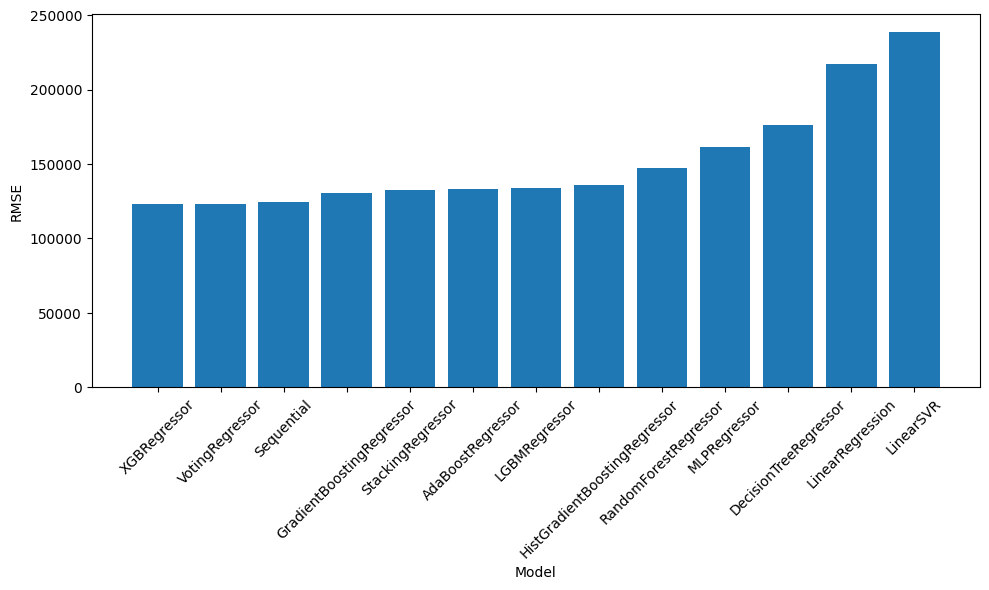

In [140]:
plt.figure(figsize=(10, 6))
plt.bar(all_model_evaluation['Model'], all_model_evaluation['RMSE'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

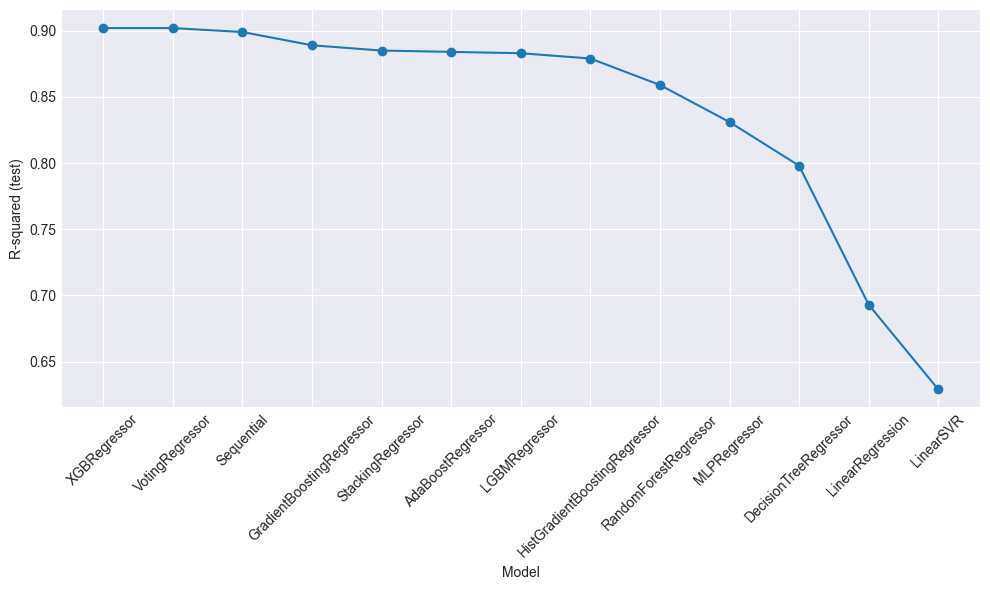

In [143]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(all_model_evaluation['Model'], all_model_evaluation['R-squared (test)'], marker='o')
plt.xlabel('Model')
plt.ylabel('R-squared (test)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Plot model's score with different number of features**

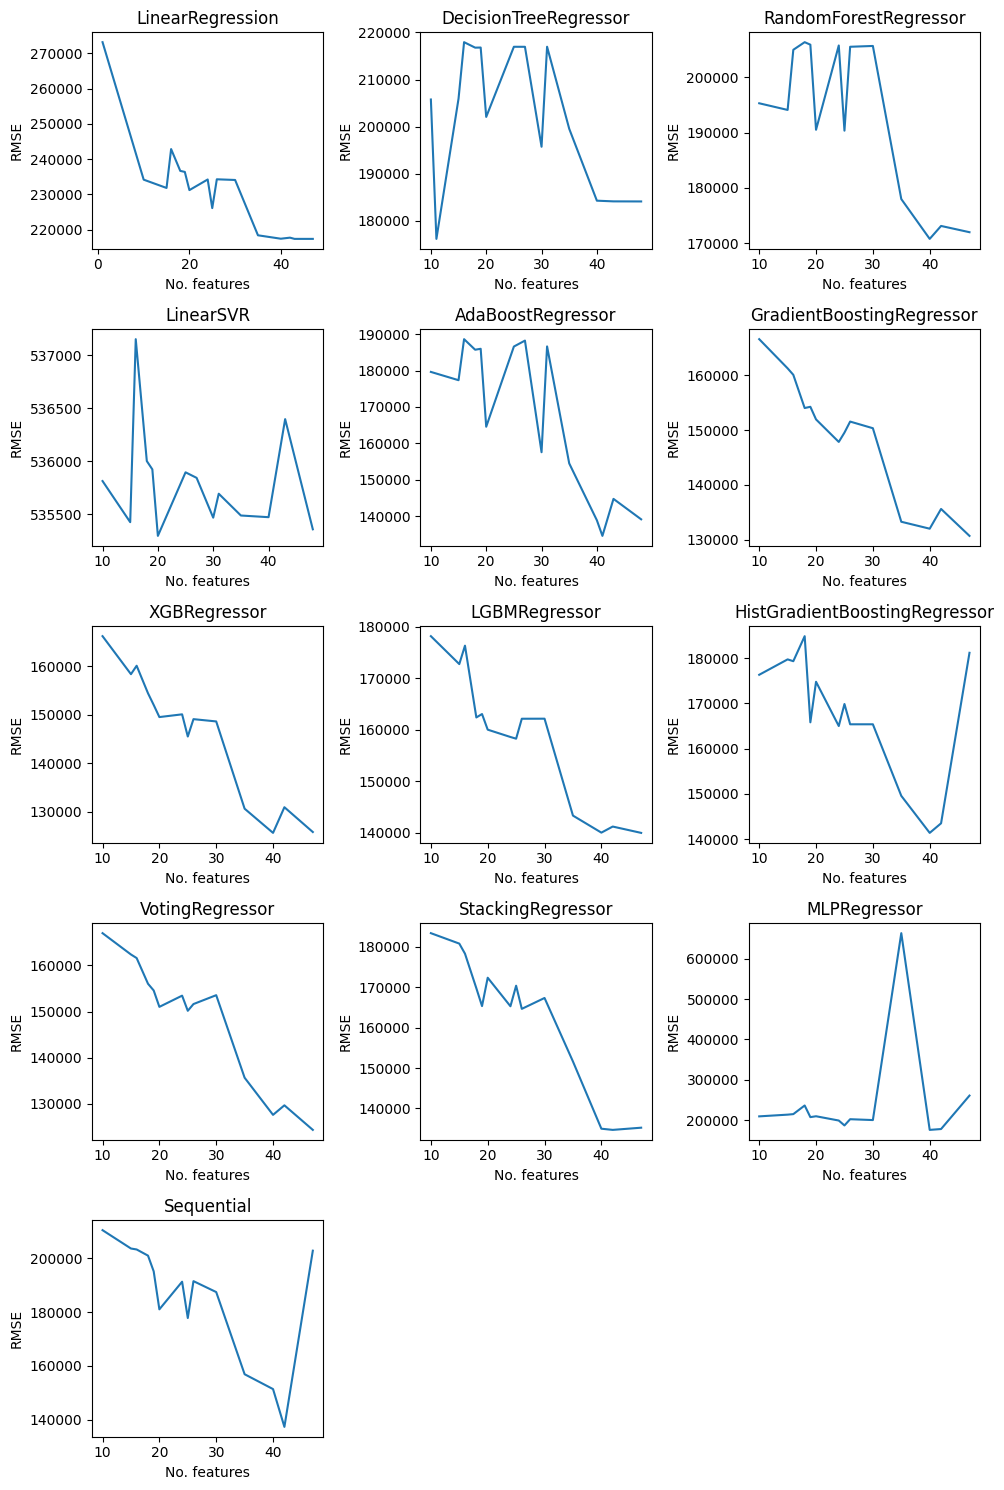

In [6]:
list_eval = [evaluation_linear_regression, 
             evaluation_decision_tree, 
             evaluation_random_forest , 
             evaluation_svr , 
             evaluation_ada ,
             evaluation_grad ,
             evaluation_xgboost ,
             evaluation_lightgbm ,
             evaluation_hist_grad , 
             evaluation_voting , 
             evaluation_stacking , 
             evaluation_mlp , 
             evaluation_nn]

fig, ax = plt.subplots(5,3,figsize=(10,15))
i=0
for e in list_eval:
    tmp_eval = e.groupby('No. features')['RMSE'].max().reset_index()
    sns.lineplot(x='No. features', y='RMSE', data=tmp_eval, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_title(e['Model'][1]) 
    i+=1
    
for j in range(i, 5 * 3):
    fig.delaxes(ax[j // 3, j % 3])
    
plt.tight_layout()
plt.show()

In [7]:
result_df = pd.DataFrame()
for e in list_eval:
    tmp_eval = e.groupby('No. features')['R-squared (test)'].max().reset_index()
    tmp_eval['Model'] = e['Model'][1]
    result_df = pd.concat([result_df, tmp_eval], ignore_index=True)

result_df = result_df[result_df['No. features'] != 1]

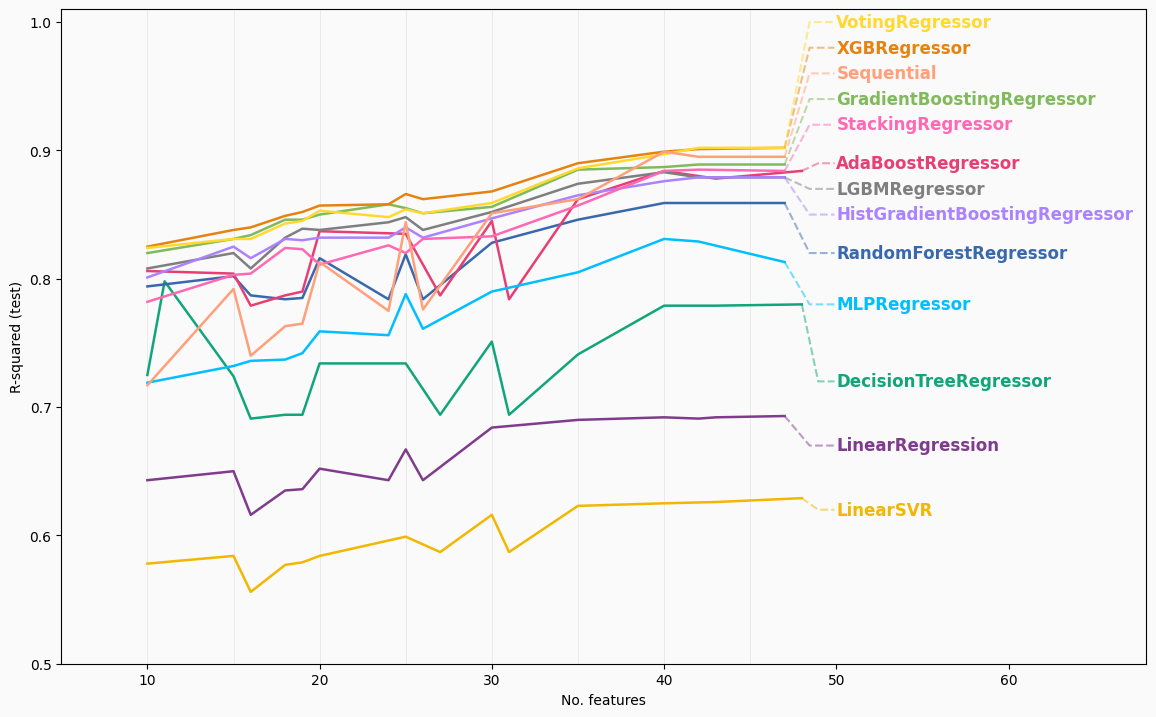

In [8]:
# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # LinearRegression
    "#11A579", # DecisionTreeRegressor
    "#3969AC", # RandomForestRegressor
    "#F2B701", # LinearSVR
    "#E73F74", # AdaBoostRegressor
    "#80BA5A", # GradientBoostingRegressor
    "#E68310", # XGBRegressor
    GREY50,     # LGBMRegressor
    "#AB82FF", # HistGradientBoostingRegressor
    "#FFD92F", # VotingRegressor
    "#FF69B4", # StackingRegressor
    "#00BFFF", # MLPRegressor
    "#FFA07A" # Sequential
]

# Vertical lines every 5 features
VLINES = np.arange(0, 47, 5)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (14, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)
# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(0.5, 1), xmin=0, xmax=50, color=GREY91, lw=0.6)

# Add lines ------------------------------------------------------

for idx, group in enumerate(result_df["Model"].unique()):
    data = result_df[result_df["Model"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("No. features", "R-squared (test)", color=color, lw=1.8, data=data)
    
plt.xlabel('No. features')
plt.ylabel('R-squared (test)')

ax.set_xlim(5, 68)
ax.set_ylim(0.5, 1.01)

# Positions
LABEL_Y = [
    0.67,  # LinearRegression
    0.72,  # DecisionTreeRegressor
    0.82,    # RandomForestRegressor
    0.62,   # LinearSVR
    0.89,  # AdaBoostRegressor
    0.94,   # GradientBoostingRegressor
    0.98,  # XGBRegressor
    0.87,     # LGBMRegressor
    0.85, # HistGradient
    1, #VotingRegressor
    0.92, #StackingRegressor
    0.78, # MLPRegressor
    0.96 #Sequential
]

x_end = 50
PAD = 0.1

for idx, group in enumerate(result_df["Model"].unique()):
    data = result_df[(result_df["Model"] == group)]
    color = COLOR_SCALE[idx]
    
    # Model name
    text = data["Model"].values[0]
    x_start = data['No. features'].max()
    
    # Vertical start of line
    n = data["R-squared (test)"].shape[0]
    y_start = data["R-squared (test)"].values[n-1]
    # Vertical end of line
    y_end = LABEL_Y[idx]
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
    # Add text
    ax.text(
        x_end, 
        y_end, 
        text, 
        color=color, 
        fontsize=12, 
        weight="bold",
        va="center"
    )